In [2]:
import catboost as cb
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
distinct = pd.read_pickle("/home/filip/Desktop/Ruđer/FinalData/distinct_features.pkl")
distinct = distinct.tail(100000).reset_index(drop=True)
distinct = distinct.drop(columns="Timestamp")

distinct = distinct.drop(columns=["Open","Close"])
distinct.head()

Median_exchanges  Std_exchanges  Price_exchanges  High_exchanges  \
0       6396.366667      91.460960      6440.146367     6639.740000   
1       6395.850833      85.869650      6433.274709     6638.389125   
2       6396.838421     104.621163      6458.569677     6635.599000   
3       6401.106667      95.320549      6458.410452     6635.599000   
4       6400.005000     100.078878      6463.259498     6635.597000   

   Low_exchanges  High_trades  Low_trades  Trades_trades  Std_trades  \
0    6389.800000     6639.740     6389.80           45.0   51.632411   
1    6389.203333     6639.740     6388.93           59.0   84.118855   
2    6389.083333     6635.599     6388.34           38.0   58.792895   
3    6388.455000     6635.599     6387.92           41.0   44.215194   
4    6389.310000     6635.597     6388.74           41.0   47.453634   

   Price_trades  ...  Price_Change_Median_exchanges  \
0   6407.687111  ...                      -0.000221   
1   6429.890051  ...                      -0.000081   
2   6410.543105  ...                       0.000154   
3   6405.760951  ...                       0.000667   
4   6408.015293  ...                      -0.000172   

   Denoised_Price_Change_Median_exchanges  Denoised_Price_1_Price  \
0                               -0.000368             6393.995791   
1                                0.000000             6393.995791   
2                                0.000448             6393.996671   
3                                0.000000             6393.996671   
4                               -0.000308             6393.994658   

   Denoised_Price_2_Price  Price_Change_Price  Denoised_Price_Change_Price  \
0             6393.997057       -4.220932e-07                -3.962841e-07   
1             6393.997057       -1.792690e-07                 0.000000e+00   
2             6393.995664        2.541000e-07                 1.377134e-07   
3             6393.995664       -5.350413e-08                 0.000000e+00   
4             6393.995664       -5.278389e-07                -3.148758e-07   

   Denoised_Price_1_Price_exchanges  Denoised_Price_2_Price_exchanges  \
0                       6436.710538                       6440.323709   
1                       6436.710538                       6440.323709   
2                       6458.490065                       6443.513102   
3                       6458.490065                       6443.513102   
4                       6438.364399                       6443.513102   

   Price_Change_Price_exchanges  Denoised_Price_Change_Price_exchanges  
0                     -0.000823                              -0.001121  
1                     -0.001067                               0.000000  
2                      0.003932                               0.003384  
3                     -0.000025                               0.000000  
4                      0.000751                              -0.003116  

[5 rows x 32 columns]

In [4]:
train = distinct.iloc[:int(distinct.shape[0]*0.9)]
train_x = train.drop(columns=["Median_exchanges"])[:-1]
train_y = train["Median_exchanges"][1:]
val = distinct.iloc[int(distinct.shape[0]*0.90):int(distinct.shape[0]*0.95)]
val_x = val.drop(columns=["Median_exchanges"])[:-1]
val_y = val["Median_exchanges"][1:]
test = distinct.iloc[int(distinct.shape[0]*0.95):]
test_x = test.drop(columns=["Median_exchanges"])[:-1]
test_y = test["Median_exchanges"][1:]

In [5]:
print(train_y.shape)
train_y.tail()

(89999,)


89995    3823.539405
89996    3814.836800
89997    3813.494579
89998    3817.775040
89999    3822.075667
Name: Median_exchanges, dtype: float64

In [6]:
print(train_x.shape)
train_x["Price"].tail()

(89999, 31)


89994    3821.519697
89995    3823.371667
89996    3813.799643
89997    3813.841321
89998    3817.971818
Name: Price, dtype: float64

In [7]:
train_x.tail()

Std_exchanges  Price_exchanges  High_exchanges  Low_exchanges  \
89994      57.312873      3858.538962     3973.677556    3817.272000   
89995      56.366508      3850.735563     3975.385583    3820.029091   
89996      60.168225      3856.350157     3969.337875    3810.074000   
89997      57.030159      3841.958906     3967.197364    3808.633333   
89998      55.976638      3848.534641     3970.050286    3813.351250   

       High_trades  Low_trades  Trades_trades  Std_trades  Price_trades  \
89994     3979.400     3811.58          142.0   41.415956   3836.100127   
89995     3977.683     3817.31          149.0   45.010051   3841.652597   
89996     3971.522     3805.00          184.0   38.319985   3827.282951   
89997     3969.300     3802.60          164.0   43.935828   3832.245860   
89998     3971.522     3809.64          112.0   41.186723   3832.879929   

        Var_trades  ...  Price_Change_Median_exchanges  \
89994  1715.281404  ...                      -0.000745   
89995  2025.904713  ...                       0.000272   
89996  1468.421232  ...                      -0.002276   
89997  1930.356982  ...                      -0.000352   
89998  1696.346136  ...                       0.001122   

       Denoised_Price_Change_Median_exchanges  Denoised_Price_1_Price  \
89994                               -0.000707             3822.445682   
89995                                0.000000             3822.445682   
89996                               -0.002316             3813.820482   
89997                                0.000000             3813.820482   
89998                                0.001510             3818.789605   

       Denoised_Price_2_Price  Price_Change_Price  \
89994             3818.133082           -0.001071   
89995             3818.133082            0.000485   
89996             3818.133082           -0.002504   
89997             3818.133082            0.000011   
89998             3820.803351            0.001083   

       Denoised_Price_Change_Price  Denoised_Price_1_Price_exchanges  \
89994                    -0.000828                       3854.637262   
89995                     0.000000                       3854.637262   
89996                    -0.002256                       3849.154531   
89997                     0.000000                       3849.154531   
89998                     0.001303                       3855.190826   

       Denoised_Price_2_Price_exchanges  Price_Change_Price_exchanges  \
89994                       3851.895897                      0.000391   
89995                       3851.895897                     -0.002022   
89996                       3851.895897                      0.001458   
89997                       3851.895897                     -0.003732   
89998                       3854.946876                      0.001712   

       Denoised_Price_Change_Price_exchanges  
89994                              -0.001922  
89995                               0.000000  
89996                              -0.001422  
89997                               0.000000  
89998                               0.001568  

[5 rows x 31 columns]

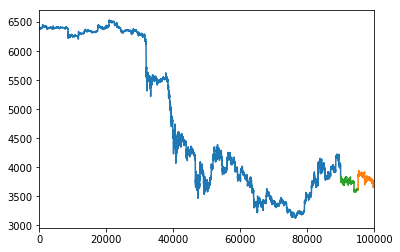

In [8]:
train_x["Denoised_Price_1_Price"].plot()
test_x["Denoised_Price_1_Price"].plot()
val_x["Denoised_Price_1_Price"].plot()

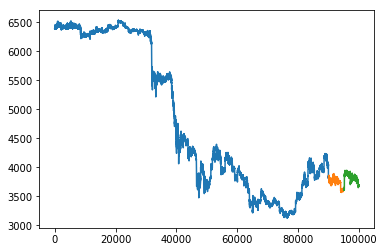

In [9]:
plt.plot(train_y)
plt.plot(val_y)
plt.plot(test_y)

In [10]:
model = cb.CatBoostRegressor(learning_rate=0.01,
                             iterations=70000,
                             l2_leaf_reg=3,
                             random_seed=42,
                             depth=4,
                             early_stopping_rounds=1500,
                             has_time= True 
                          )

In [11]:
model.fit(train_x, train_y,verbose=True,eval_set=(val_x,val_y),)

0:	learn: 4959.5958390	test: 3697.1412346	best: 3697.1412346 (0)	total: 70.4ms	remaining: 1h 22m 6s
1:	learn: 4910.3310482	test: 3659.0413654	best: 3659.0413654 (1)	total: 93.1ms	remaining: 54m 19s
2:	learn: 4861.3531440	test: 3623.6260148	best: 3623.6260148 (2)	total: 116ms	remaining: 45m 9s
3:	learn: 4812.9440273	test: 3587.1780607	best: 3587.1780607 (3)	total: 139ms	remaining: 40m 39s
4:	learn: 4764.9536512	test: 3551.5320198	best: 3551.5320198 (4)	total: 159ms	remaining: 37m 7s
5:	learn: 4717.5443546	test: 3518.0052007	best: 3518.0052007 (5)	total: 173ms	remaining: 33m 43s
6:	learn: 4670.5466559	test: 3482.9118210	best: 3482.9118210 (6)	total: 188ms	remaining: 31m 15s
7:	learn: 4623.9790903	test: 3447.5826176	best: 3447.5826176 (7)	total: 205ms	remaining: 29m 55s
8:	learn: 4577.9146356	test: 3414.7403393	best: 3414.7403393 (8)	total: 219ms	remaining: 28m 22s
9:	learn: 4532.2584831	test: 3381.8647399	best: 3381.8647399 (9)	total: 233ms	remaining: 27m 12s
10:	learn: 4487.0924355	test

94:	learn: 1936.1263080	test: 1426.0544665	best: 1426.0544665 (94)	total: 1.55s	remaining: 19m 4s
95:	learn: 1916.8331315	test: 1412.6587455	best: 1412.6587455 (95)	total: 1.57s	remaining: 19m 7s
96:	learn: 1897.7909795	test: 1397.6456186	best: 1397.6456186 (96)	total: 1.6s	remaining: 19m 12s
97:	learn: 1878.8623539	test: 1382.4073362	best: 1382.4073362 (97)	total: 1.61s	remaining: 19m 11s
98:	learn: 1860.1969158	test: 1366.4402884	best: 1366.4402884 (98)	total: 1.63s	remaining: 19m 10s
99:	learn: 1841.6436113	test: 1352.3626603	best: 1352.3626603 (99)	total: 1.64s	remaining: 19m 9s
100:	learn: 1823.3589010	test: 1340.0213048	best: 1340.0213048 (100)	total: 1.66s	remaining: 19m 7s
101:	learn: 1805.2394150	test: 1327.5131992	best: 1327.5131992 (101)	total: 1.67s	remaining: 19m 6s
102:	learn: 1787.2963235	test: 1315.3887299	best: 1315.3887299 (102)	total: 1.69s	remaining: 19m 5s
103:	learn: 1769.5383444	test: 1302.8826311	best: 1302.8826311 (103)	total: 1.7s	remaining: 19m 3s
104:	learn:

190:	learn: 742.6143891	test: 546.6200413	best: 546.6200413 (190)	total: 3.02s	remaining: 18m 22s
191:	learn: 735.2555552	test: 540.3166369	best: 540.3166369 (191)	total: 3.03s	remaining: 18m 22s
192:	learn: 727.9579637	test: 534.7253907	best: 534.7253907 (192)	total: 3.05s	remaining: 18m 22s
193:	learn: 720.7524921	test: 529.9279535	best: 529.9279535 (193)	total: 3.06s	remaining: 18m 21s
194:	learn: 713.6139544	test: 524.7543209	best: 524.7543209 (194)	total: 3.08s	remaining: 18m 21s
195:	learn: 706.5456166	test: 518.7785740	best: 518.7785740 (195)	total: 3.09s	remaining: 18m 20s
196:	learn: 699.5371923	test: 513.1610682	best: 513.1610682 (196)	total: 3.1s	remaining: 18m 20s
197:	learn: 692.6428247	test: 507.5446864	best: 507.5446864 (197)	total: 3.12s	remaining: 18m 19s
198:	learn: 685.7870810	test: 502.7321824	best: 502.7321824 (198)	total: 3.13s	remaining: 18m 18s
199:	learn: 679.0045472	test: 498.0165641	best: 498.0165641 (199)	total: 3.15s	remaining: 18m 18s
200:	learn: 672.28861

287:	learn: 284.5190759	test: 202.2985044	best: 202.2985044 (287)	total: 4.47s	remaining: 18m 1s
288:	learn: 281.7626939	test: 200.5263703	best: 200.5263703 (288)	total: 4.49s	remaining: 18m 2s
289:	learn: 279.0174131	test: 198.2661695	best: 198.2661695 (289)	total: 4.5s	remaining: 18m 1s
290:	learn: 276.2971935	test: 196.2103679	best: 196.2103679 (290)	total: 4.51s	remaining: 18m 1s
291:	learn: 273.6213491	test: 194.1420319	best: 194.1420319 (291)	total: 4.53s	remaining: 18m 1s
292:	learn: 270.9677534	test: 192.1624968	best: 192.1624968 (292)	total: 4.54s	remaining: 18m
293:	learn: 268.3605275	test: 190.2318005	best: 190.2318005 (293)	total: 4.56s	remaining: 18m
294:	learn: 265.7559538	test: 188.3352022	best: 188.3352022 (294)	total: 4.57s	remaining: 17m 59s
295:	learn: 263.1722413	test: 186.4677735	best: 186.4677735 (295)	total: 4.58s	remaining: 17m 59s
296:	learn: 260.6209524	test: 184.5072943	best: 184.5072943 (296)	total: 4.6s	remaining: 17m 58s
297:	learn: 258.0879986	test: 182.4

373:	learn: 125.5694181	test: 81.5814403	best: 81.5814403 (373)	total: 5.74s	remaining: 17m 49s
374:	learn: 124.4236499	test: 80.7151471	best: 80.7151471 (374)	total: 5.76s	remaining: 17m 49s
375:	learn: 123.2896321	test: 79.8723032	best: 79.8723032 (375)	total: 5.77s	remaining: 17m 49s
376:	learn: 122.1891614	test: 79.0044252	best: 79.0044252 (376)	total: 5.79s	remaining: 17m 48s
377:	learn: 121.0930075	test: 78.1768934	best: 78.1768934 (377)	total: 5.8s	remaining: 17m 48s
378:	learn: 119.9933794	test: 77.3529307	best: 77.3529307 (378)	total: 5.81s	remaining: 17m 47s
379:	learn: 118.8999148	test: 76.4984656	best: 76.4984656 (379)	total: 5.83s	remaining: 17m 47s
380:	learn: 117.8441350	test: 75.7117153	best: 75.7117153 (380)	total: 5.84s	remaining: 17m 47s
381:	learn: 116.7929952	test: 74.9435394	best: 74.9435394 (381)	total: 5.85s	remaining: 17m 46s
382:	learn: 115.7575036	test: 74.2540797	best: 74.2540797 (382)	total: 5.87s	remaining: 17m 46s
383:	learn: 114.6939776	test: 73.4236125	

460:	learn: 60.9466762	test: 31.7559048	best: 31.7559048 (460)	total: 6.97s	remaining: 17m 32s
461:	learn: 60.5254696	test: 31.4332398	best: 31.4332398 (461)	total: 6.99s	remaining: 17m 32s
462:	learn: 60.0959072	test: 31.0617855	best: 31.0617855 (462)	total: 7.01s	remaining: 17m 32s
463:	learn: 59.6837805	test: 30.7583107	best: 30.7583107 (463)	total: 7.02s	remaining: 17m 32s
464:	learn: 59.2775293	test: 30.4438188	best: 30.4438188 (464)	total: 7.04s	remaining: 17m 32s
465:	learn: 58.8762934	test: 30.1345415	best: 30.1345415 (465)	total: 7.05s	remaining: 17m 31s
466:	learn: 58.4818919	test: 29.8268051	best: 29.8268051 (466)	total: 7.06s	remaining: 17m 31s
467:	learn: 58.0884850	test: 29.5582566	best: 29.5582566 (467)	total: 7.07s	remaining: 17m 30s
468:	learn: 57.6475302	test: 29.2600444	best: 29.2600444 (468)	total: 7.09s	remaining: 17m 30s
469:	learn: 57.2284027	test: 28.9681625	best: 28.9681625 (469)	total: 7.1s	remaining: 17m 30s
470:	learn: 56.8527474	test: 28.6826950	best: 28.68

550:	learn: 36.6694070	test: 13.8250562	best: 13.8250562 (550)	total: 8.22s	remaining: 17m 16s
551:	learn: 36.5405476	test: 13.7437862	best: 13.7437862 (551)	total: 8.24s	remaining: 17m 16s
552:	learn: 36.3495558	test: 13.6667213	best: 13.6667213 (552)	total: 8.26s	remaining: 17m 17s
553:	learn: 36.2269915	test: 13.5849264	best: 13.5849264 (553)	total: 8.27s	remaining: 17m 16s
554:	learn: 36.0960796	test: 13.4867511	best: 13.4867511 (554)	total: 8.28s	remaining: 17m 16s
555:	learn: 35.9649105	test: 13.3983730	best: 13.3983730 (555)	total: 8.29s	remaining: 17m 16s
556:	learn: 35.8374706	test: 13.3116665	best: 13.3116665 (556)	total: 8.31s	remaining: 17m 15s
557:	learn: 35.7160874	test: 13.2053812	best: 13.2053812 (557)	total: 8.32s	remaining: 17m 15s
558:	learn: 35.5394132	test: 13.1378544	best: 13.1378544 (558)	total: 8.34s	remaining: 17m 15s
559:	learn: 35.3714701	test: 13.0722295	best: 13.0722295 (559)	total: 8.35s	remaining: 17m 15s
560:	learn: 35.2570269	test: 12.9975404	best: 12.9

645:	learn: 28.1195040	test: 10.6255783	best: 10.6120718 (636)	total: 9.49s	remaining: 16m 59s
646:	learn: 28.0791427	test: 10.6184205	best: 10.6120718 (636)	total: 9.51s	remaining: 16m 59s
647:	learn: 28.0374698	test: 10.6224693	best: 10.6120718 (636)	total: 9.52s	remaining: 16m 58s
648:	learn: 28.0001284	test: 10.6258143	best: 10.6120718 (636)	total: 9.53s	remaining: 16m 58s
649:	learn: 27.9589487	test: 10.6374392	best: 10.6120718 (636)	total: 9.54s	remaining: 16m 58s
650:	learn: 27.9187458	test: 10.6421324	best: 10.6120718 (636)	total: 9.55s	remaining: 16m 57s
651:	learn: 27.8857216	test: 10.6198545	best: 10.6120718 (636)	total: 9.57s	remaining: 16m 57s
652:	learn: 27.8143787	test: 10.6252446	best: 10.6120718 (636)	total: 9.58s	remaining: 16m 57s
653:	learn: 27.7549235	test: 10.6297398	best: 10.6120718 (636)	total: 9.59s	remaining: 16m 57s
654:	learn: 27.7220709	test: 10.6345631	best: 10.6120718 (636)	total: 9.6s	remaining: 16m 56s
655:	learn: 27.6878446	test: 10.6248634	best: 10.61

739:	learn: 24.5481376	test: 10.7719126	best: 10.6120718 (636)	total: 10.7s	remaining: 16m 44s
740:	learn: 24.4995689	test: 10.7723327	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 45s
741:	learn: 24.4857828	test: 10.7744408	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 45s
742:	learn: 24.4509296	test: 10.7721620	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 45s
743:	learn: 24.3956279	test: 10.7781830	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 45s
744:	learn: 24.3800817	test: 10.7845097	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 44s
745:	learn: 24.3597825	test: 10.7921090	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 44s
746:	learn: 24.3195655	test: 10.7992975	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 44s
747:	learn: 24.2984320	test: 10.8056435	best: 10.6120718 (636)	total: 10.8s	remaining: 16m 44s
748:	learn: 24.2804087	test: 10.7920366	best: 10.6120718 (636)	total: 10.9s	remaining: 16m 44s
749:	learn: 24.2424520	test: 10.8012359	best: 10.6

829:	learn: 22.1656626	test: 10.5177682	best: 10.5177682 (829)	total: 12s	remaining: 16m 39s
830:	learn: 22.1540119	test: 10.5202823	best: 10.5177682 (829)	total: 12s	remaining: 16m 39s
831:	learn: 22.1227110	test: 10.5221297	best: 10.5177682 (829)	total: 12s	remaining: 16m 39s
832:	learn: 22.0869169	test: 10.5189065	best: 10.5177682 (829)	total: 12s	remaining: 16m 39s
833:	learn: 22.0424177	test: 10.5211901	best: 10.5177682 (829)	total: 12.1s	remaining: 16m 39s
834:	learn: 22.0172191	test: 10.5259476	best: 10.5177682 (829)	total: 12.1s	remaining: 16m 39s
835:	learn: 21.9766153	test: 10.5303442	best: 10.5177682 (829)	total: 12.1s	remaining: 16m 39s
836:	learn: 21.9331327	test: 10.5324909	best: 10.5177682 (829)	total: 12.1s	remaining: 16m 39s
837:	learn: 21.8927583	test: 10.5373256	best: 10.5177682 (829)	total: 12.1s	remaining: 16m 39s
838:	learn: 21.8751921	test: 10.5358196	best: 10.5177682 (829)	total: 12.1s	remaining: 16m 39s
839:	learn: 21.8508081	test: 10.5407806	best: 10.5177682 (

917:	learn: 20.1499900	test: 10.2609383	best: 10.2587587 (916)	total: 13.2s	remaining: 16m 35s
918:	learn: 20.1327617	test: 10.2607991	best: 10.2587587 (916)	total: 13.2s	remaining: 16m 35s
919:	learn: 20.1033453	test: 10.2632670	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
920:	learn: 20.0958381	test: 10.2644579	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
921:	learn: 20.0769945	test: 10.2670845	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
922:	learn: 20.0600778	test: 10.2689388	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
923:	learn: 20.0317255	test: 10.2713645	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
924:	learn: 20.0075611	test: 10.2668526	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
925:	learn: 19.9805160	test: 10.2622657	best: 10.2587587 (916)	total: 13.3s	remaining: 16m 35s
926:	learn: 19.9648881	test: 10.2573818	best: 10.2573818 (926)	total: 13.4s	remaining: 16m 35s
927:	learn: 19.9590239	test: 10.2539613	best: 10.2

1006:	learn: 18.8109460	test: 9.8939581	best: 9.8939581 (1006)	total: 14.5s	remaining: 16m 30s
1007:	learn: 18.7878811	test: 9.8946733	best: 9.8939581 (1006)	total: 14.5s	remaining: 16m 30s
1008:	learn: 18.7818080	test: 9.8830776	best: 9.8830776 (1008)	total: 14.5s	remaining: 16m 30s
1009:	learn: 18.7770418	test: 9.8790283	best: 9.8790283 (1009)	total: 14.5s	remaining: 16m 30s
1010:	learn: 18.7704718	test: 9.8540908	best: 9.8540908 (1010)	total: 14.5s	remaining: 16m 30s
1011:	learn: 18.7467668	test: 9.8534008	best: 9.8534008 (1011)	total: 14.5s	remaining: 16m 30s
1012:	learn: 18.7374721	test: 9.8529045	best: 9.8529045 (1012)	total: 14.5s	remaining: 16m 30s
1013:	learn: 18.7239425	test: 9.8515134	best: 9.8515134 (1013)	total: 14.6s	remaining: 16m 30s
1014:	learn: 18.7114820	test: 9.8512012	best: 9.8512012 (1014)	total: 14.6s	remaining: 16m 30s
1015:	learn: 18.7015755	test: 9.8464665	best: 9.8464665 (1015)	total: 14.6s	remaining: 16m 29s
1016:	learn: 18.6974451	test: 9.8423762	best: 9.84

1094:	learn: 17.8145780	test: 9.5549665	best: 9.5549665 (1094)	total: 15.7s	remaining: 16m 27s
1095:	learn: 17.8065559	test: 9.5510786	best: 9.5510786 (1095)	total: 15.7s	remaining: 16m 27s
1096:	learn: 17.7976879	test: 9.5474470	best: 9.5474470 (1096)	total: 15.7s	remaining: 16m 27s
1097:	learn: 17.7856273	test: 9.5454970	best: 9.5454970 (1097)	total: 15.7s	remaining: 16m 27s
1098:	learn: 17.7749761	test: 9.5443859	best: 9.5443859 (1098)	total: 15.8s	remaining: 16m 27s
1099:	learn: 17.7664355	test: 9.5375715	best: 9.5375715 (1099)	total: 15.8s	remaining: 16m 27s
1100:	learn: 17.7628775	test: 9.5293770	best: 9.5293770 (1100)	total: 15.8s	remaining: 16m 27s
1101:	learn: 17.7435454	test: 9.5292338	best: 9.5292338 (1101)	total: 15.8s	remaining: 16m 27s
1102:	learn: 17.7298691	test: 9.5251240	best: 9.5251240 (1102)	total: 15.8s	remaining: 16m 27s
1103:	learn: 17.7245603	test: 9.5110372	best: 9.5110372 (1103)	total: 15.8s	remaining: 16m 27s
1104:	learn: 17.7191129	test: 9.5000343	best: 9.50

1181:	learn: 16.9773837	test: 9.2952048	best: 9.2950687 (1180)	total: 16.9s	remaining: 16m 25s
1182:	learn: 16.9723224	test: 9.2941736	best: 9.2941736 (1182)	total: 16.9s	remaining: 16m 25s
1183:	learn: 16.9665357	test: 9.2896472	best: 9.2896472 (1183)	total: 17s	remaining: 16m 25s
1184:	learn: 16.9637625	test: 9.2849971	best: 9.2849971 (1184)	total: 17s	remaining: 16m 25s
1185:	learn: 16.9575758	test: 9.2799005	best: 9.2799005 (1185)	total: 17s	remaining: 16m 25s
1186:	learn: 16.9449066	test: 9.2786436	best: 9.2786436 (1186)	total: 17s	remaining: 16m 25s
1187:	learn: 16.9385732	test: 9.2776496	best: 9.2776496 (1187)	total: 17s	remaining: 16m 25s
1188:	learn: 16.9317731	test: 9.2749139	best: 9.2749139 (1188)	total: 17s	remaining: 16m 25s
1189:	learn: 16.9182385	test: 9.2752733	best: 9.2749139 (1188)	total: 17s	remaining: 16m 25s
1190:	learn: 16.9120967	test: 9.2726939	best: 9.2726939 (1190)	total: 17s	remaining: 16m 24s
1191:	learn: 16.9077676	test: 9.2662819	best: 9.2662819 (1191)	tot

1271:	learn: 16.2267270	test: 9.1243909	best: 9.1243909 (1271)	total: 18.2s	remaining: 16m 21s
1272:	learn: 16.2157542	test: 9.1244197	best: 9.1243909 (1271)	total: 18.2s	remaining: 16m 21s
1273:	learn: 16.2116406	test: 9.1219728	best: 9.1219728 (1273)	total: 18.2s	remaining: 16m 21s
1274:	learn: 16.2021205	test: 9.1221587	best: 9.1219728 (1273)	total: 18.2s	remaining: 16m 21s
1275:	learn: 16.1867329	test: 9.1230062	best: 9.1219728 (1273)	total: 18.2s	remaining: 16m 21s
1276:	learn: 16.1814434	test: 9.1242077	best: 9.1219728 (1273)	total: 18.2s	remaining: 16m 21s
1277:	learn: 16.1759473	test: 9.1144046	best: 9.1144046 (1277)	total: 18.3s	remaining: 16m 21s
1278:	learn: 16.1665364	test: 9.1142285	best: 9.1142285 (1278)	total: 18.3s	remaining: 16m 21s
1279:	learn: 16.1600568	test: 9.1104670	best: 9.1104670 (1279)	total: 18.3s	remaining: 16m 21s
1280:	learn: 16.1541307	test: 9.1083577	best: 9.1083577 (1280)	total: 18.3s	remaining: 16m 21s
1281:	learn: 16.1508956	test: 9.1083036	best: 9.10

1360:	learn: 15.5806394	test: 8.9544387	best: 8.9544387 (1360)	total: 19.4s	remaining: 16m 18s
1361:	learn: 15.5728500	test: 8.9545995	best: 8.9544387 (1360)	total: 19.4s	remaining: 16m 19s
1362:	learn: 15.5690697	test: 8.9524084	best: 8.9524084 (1362)	total: 19.4s	remaining: 16m 19s
1363:	learn: 15.5629836	test: 8.9475731	best: 8.9475731 (1363)	total: 19.5s	remaining: 16m 19s
1364:	learn: 15.5538839	test: 8.9475653	best: 8.9475653 (1364)	total: 19.5s	remaining: 16m 18s
1365:	learn: 15.5463552	test: 8.9475009	best: 8.9475009 (1365)	total: 19.5s	remaining: 16m 18s
1366:	learn: 15.5340224	test: 8.9478977	best: 8.9475009 (1365)	total: 19.5s	remaining: 16m 18s
1367:	learn: 15.5314952	test: 8.9447404	best: 8.9447404 (1367)	total: 19.5s	remaining: 16m 18s
1368:	learn: 15.5233319	test: 8.9417904	best: 8.9417904 (1368)	total: 19.5s	remaining: 16m 18s
1369:	learn: 15.5203242	test: 8.9441129	best: 8.9417904 (1368)	total: 19.5s	remaining: 16m 18s
1370:	learn: 15.5096501	test: 8.9406847	best: 8.94

1449:	learn: 15.0653016	test: 8.8390076	best: 8.8390076 (1449)	total: 20.6s	remaining: 16m 15s
1450:	learn: 15.0609219	test: 8.8362831	best: 8.8362831 (1450)	total: 20.7s	remaining: 16m 15s
1451:	learn: 15.0585684	test: 8.8323366	best: 8.8323366 (1451)	total: 20.7s	remaining: 16m 15s
1452:	learn: 15.0510855	test: 8.8318614	best: 8.8318614 (1452)	total: 20.7s	remaining: 16m 15s
1453:	learn: 15.0457570	test: 8.8313495	best: 8.8313495 (1453)	total: 20.7s	remaining: 16m 15s
1454:	learn: 15.0374565	test: 8.8314826	best: 8.8313495 (1453)	total: 20.7s	remaining: 16m 15s
1455:	learn: 15.0318537	test: 8.8307534	best: 8.8307534 (1455)	total: 20.7s	remaining: 16m 15s
1456:	learn: 15.0287846	test: 8.8303071	best: 8.8303071 (1456)	total: 20.7s	remaining: 16m 15s
1457:	learn: 15.0196770	test: 8.8270808	best: 8.8270808 (1457)	total: 20.7s	remaining: 16m 15s
1458:	learn: 15.0178466	test: 8.8246124	best: 8.8246124 (1458)	total: 20.8s	remaining: 16m 15s
1459:	learn: 15.0136783	test: 8.8146126	best: 8.81

1539:	learn: 14.6094416	test: 8.7003964	best: 8.7003155 (1537)	total: 21.9s	remaining: 16m 12s
1540:	learn: 14.6028776	test: 8.7011885	best: 8.7003155 (1537)	total: 21.9s	remaining: 16m 12s
1541:	learn: 14.5986015	test: 8.6979421	best: 8.6979421 (1541)	total: 21.9s	remaining: 16m 12s
1542:	learn: 14.5933628	test: 8.6950694	best: 8.6950694 (1542)	total: 21.9s	remaining: 16m 12s
1543:	learn: 14.5915184	test: 8.6941499	best: 8.6941499 (1543)	total: 21.9s	remaining: 16m 12s
1544:	learn: 14.5876078	test: 8.6934869	best: 8.6934869 (1544)	total: 21.9s	remaining: 16m 12s
1545:	learn: 14.5857961	test: 8.6926442	best: 8.6926442 (1545)	total: 22s	remaining: 16m 11s
1546:	learn: 14.5819610	test: 8.6940141	best: 8.6926442 (1545)	total: 22s	remaining: 16m 11s
1547:	learn: 14.5749249	test: 8.6938951	best: 8.6926442 (1545)	total: 22s	remaining: 16m 11s
1548:	learn: 14.5683952	test: 8.6937591	best: 8.6926442 (1545)	total: 22s	remaining: 16m 11s
1549:	learn: 14.5614995	test: 8.6911759	best: 8.6911759 (1

1629:	learn: 14.2240166	test: 8.6232450	best: 8.6209865 (1627)	total: 23.1s	remaining: 16m 9s
1630:	learn: 14.2192828	test: 8.6210967	best: 8.6209865 (1627)	total: 23.1s	remaining: 16m 9s
1631:	learn: 14.2143037	test: 8.6151943	best: 8.6151943 (1631)	total: 23.1s	remaining: 16m 9s
1632:	learn: 14.2107169	test: 8.6140424	best: 8.6140424 (1632)	total: 23.2s	remaining: 16m 9s
1633:	learn: 14.2096950	test: 8.6131963	best: 8.6131963 (1633)	total: 23.2s	remaining: 16m 9s
1634:	learn: 14.2063346	test: 8.6125008	best: 8.6125008 (1634)	total: 23.2s	remaining: 16m 9s
1635:	learn: 14.2015656	test: 8.6127666	best: 8.6125008 (1634)	total: 23.2s	remaining: 16m 9s
1636:	learn: 14.1964011	test: 8.6058141	best: 8.6058141 (1636)	total: 23.2s	remaining: 16m 9s
1637:	learn: 14.1930903	test: 8.6056980	best: 8.6056980 (1637)	total: 23.2s	remaining: 16m 9s
1638:	learn: 14.1898668	test: 8.6050005	best: 8.6050005 (1638)	total: 23.2s	remaining: 16m 9s
1639:	learn: 14.1841834	test: 8.6045918	best: 8.6045918 (163

1719:	learn: 13.9165849	test: 8.5295931	best: 8.5295931 (1719)	total: 24.4s	remaining: 16m 7s
1720:	learn: 13.9120984	test: 8.5296301	best: 8.5295931 (1719)	total: 24.4s	remaining: 16m 7s
1721:	learn: 13.9044430	test: 8.5289204	best: 8.5289204 (1721)	total: 24.4s	remaining: 16m 7s
1722:	learn: 13.9015535	test: 8.5274614	best: 8.5274614 (1722)	total: 24.4s	remaining: 16m 7s
1723:	learn: 13.8980886	test: 8.5261119	best: 8.5261119 (1723)	total: 24.4s	remaining: 16m 7s
1724:	learn: 13.8959097	test: 8.5287661	best: 8.5261119 (1723)	total: 24.4s	remaining: 16m 7s
1725:	learn: 13.8922521	test: 8.5170334	best: 8.5170334 (1725)	total: 24.5s	remaining: 16m 7s
1726:	learn: 13.8875651	test: 8.5167460	best: 8.5167460 (1726)	total: 24.5s	remaining: 16m 7s
1727:	learn: 13.8824370	test: 8.5164625	best: 8.5164625 (1727)	total: 24.5s	remaining: 16m 7s
1728:	learn: 13.8796308	test: 8.5160120	best: 8.5160120 (1728)	total: 24.5s	remaining: 16m 7s
1729:	learn: 13.8768346	test: 8.5148289	best: 8.5148289 (172

1809:	learn: 13.6069139	test: 8.4075248	best: 8.4075248 (1809)	total: 25.6s	remaining: 16m 4s
1810:	learn: 13.6002564	test: 8.4070324	best: 8.4070324 (1810)	total: 25.6s	remaining: 16m 5s
1811:	learn: 13.5989881	test: 8.4053739	best: 8.4053739 (1811)	total: 25.6s	remaining: 16m 4s
1812:	learn: 13.5941511	test: 8.4056587	best: 8.4053739 (1811)	total: 25.7s	remaining: 16m 4s
1813:	learn: 13.5896129	test: 8.4055424	best: 8.4053739 (1811)	total: 25.7s	remaining: 16m 4s
1814:	learn: 13.5888285	test: 8.4054216	best: 8.4053739 (1811)	total: 25.7s	remaining: 16m 4s
1815:	learn: 13.5851417	test: 8.4052473	best: 8.4052473 (1815)	total: 25.7s	remaining: 16m 4s
1816:	learn: 13.5799319	test: 8.4055755	best: 8.4052473 (1815)	total: 25.7s	remaining: 16m 4s
1817:	learn: 13.5761835	test: 8.4054583	best: 8.4052473 (1815)	total: 25.7s	remaining: 16m 4s
1818:	learn: 13.5736509	test: 8.4067318	best: 8.4052473 (1815)	total: 25.7s	remaining: 16m 4s
1819:	learn: 13.5723607	test: 8.4061844	best: 8.4052473 (181

1899:	learn: 13.3580178	test: 8.3450886	best: 8.3446976 (1898)	total: 26.8s	remaining: 16m 1s
1900:	learn: 13.3534935	test: 8.3453449	best: 8.3446976 (1898)	total: 26.9s	remaining: 16m 1s
1901:	learn: 13.3525465	test: 8.3444319	best: 8.3444319 (1901)	total: 26.9s	remaining: 16m 1s
1902:	learn: 13.3500852	test: 8.3444298	best: 8.3444298 (1902)	total: 26.9s	remaining: 16m 1s
1903:	learn: 13.3457422	test: 8.3443305	best: 8.3443305 (1903)	total: 26.9s	remaining: 16m 1s
1904:	learn: 13.3435178	test: 8.3442359	best: 8.3442359 (1904)	total: 26.9s	remaining: 16m 1s
1905:	learn: 13.3419812	test: 8.3437340	best: 8.3437340 (1905)	total: 26.9s	remaining: 16m 1s
1906:	learn: 13.3385453	test: 8.3440918	best: 8.3437340 (1905)	total: 26.9s	remaining: 16m 1s
1907:	learn: 13.3343812	test: 8.3437114	best: 8.3437114 (1907)	total: 26.9s	remaining: 16m 1s
1908:	learn: 13.3301429	test: 8.3431745	best: 8.3431745 (1908)	total: 27s	remaining: 16m 1s
1909:	learn: 13.3271365	test: 8.3436863	best: 8.3431745 (1908)

1989:	learn: 13.1266172	test: 8.3110944	best: 8.3110196 (1987)	total: 28.1s	remaining: 15m 58s
1990:	learn: 13.1243065	test: 8.3101484	best: 8.3101484 (1990)	total: 28.1s	remaining: 15m 58s
1991:	learn: 13.1232885	test: 8.3098397	best: 8.3098397 (1991)	total: 28.1s	remaining: 15m 58s
1992:	learn: 13.1219472	test: 8.3105799	best: 8.3098397 (1991)	total: 28.1s	remaining: 15m 58s
1993:	learn: 13.1179670	test: 8.3105774	best: 8.3098397 (1991)	total: 28.1s	remaining: 15m 58s
1994:	learn: 13.1170433	test: 8.3110437	best: 8.3098397 (1991)	total: 28.1s	remaining: 15m 58s
1995:	learn: 13.1141251	test: 8.3105933	best: 8.3098397 (1991)	total: 28.1s	remaining: 15m 58s
1996:	learn: 13.1114940	test: 8.3094294	best: 8.3094294 (1996)	total: 28.1s	remaining: 15m 58s
1997:	learn: 13.1084743	test: 8.3093314	best: 8.3093314 (1997)	total: 28.2s	remaining: 15m 58s
1998:	learn: 13.1048180	test: 8.3098634	best: 8.3093314 (1997)	total: 28.2s	remaining: 15m 58s
1999:	learn: 13.1003930	test: 8.3095871	best: 8.30

2081:	learn: 12.9100471	test: 8.2736905	best: 8.2736298 (2080)	total: 29.3s	remaining: 15m 55s
2082:	learn: 12.9059844	test: 8.2734160	best: 8.2734160 (2082)	total: 29.3s	remaining: 15m 56s
2083:	learn: 12.9044246	test: 8.2724931	best: 8.2724931 (2083)	total: 29.3s	remaining: 15m 55s
2084:	learn: 12.9015924	test: 8.2712783	best: 8.2712783 (2084)	total: 29.3s	remaining: 15m 55s
2085:	learn: 12.8988031	test: 8.2711877	best: 8.2711877 (2085)	total: 29.4s	remaining: 15m 55s
2086:	learn: 12.8951661	test: 8.2711358	best: 8.2711358 (2086)	total: 29.4s	remaining: 15m 55s
2087:	learn: 12.8911228	test: 8.2712433	best: 8.2711358 (2086)	total: 29.4s	remaining: 15m 55s
2088:	learn: 12.8877221	test: 8.2714413	best: 8.2711358 (2086)	total: 29.4s	remaining: 15m 55s
2089:	learn: 12.8871678	test: 8.2718133	best: 8.2711358 (2086)	total: 29.4s	remaining: 15m 55s
2090:	learn: 12.8863630	test: 8.2710412	best: 8.2710412 (2090)	total: 29.4s	remaining: 15m 55s
2091:	learn: 12.8846298	test: 8.2709697	best: 8.27

2171:	learn: 12.7178709	test: 8.2160875	best: 8.2160875 (2171)	total: 30.6s	remaining: 15m 54s
2172:	learn: 12.7169186	test: 8.2146303	best: 8.2146303 (2172)	total: 30.6s	remaining: 15m 54s
2173:	learn: 12.7160773	test: 8.2145746	best: 8.2145746 (2173)	total: 30.6s	remaining: 15m 54s
2174:	learn: 12.7137344	test: 8.2147649	best: 8.2145746 (2173)	total: 30.6s	remaining: 15m 54s
2175:	learn: 12.7108661	test: 8.2140339	best: 8.2140339 (2175)	total: 30.6s	remaining: 15m 54s
2176:	learn: 12.7102168	test: 8.2140262	best: 8.2140262 (2176)	total: 30.6s	remaining: 15m 54s
2177:	learn: 12.7099088	test: 8.2138865	best: 8.2138865 (2177)	total: 30.6s	remaining: 15m 54s
2178:	learn: 12.7081566	test: 8.2138467	best: 8.2138467 (2178)	total: 30.7s	remaining: 15m 54s
2179:	learn: 12.7047793	test: 8.2138647	best: 8.2138467 (2178)	total: 30.7s	remaining: 15m 54s
2180:	learn: 12.7001852	test: 8.2134788	best: 8.2134788 (2180)	total: 30.7s	remaining: 15m 54s
2181:	learn: 12.6988755	test: 8.2141996	best: 8.21

2259:	learn: 12.5279876	test: 8.1648816	best: 8.1648816 (2259)	total: 31.8s	remaining: 15m 53s
2260:	learn: 12.5249413	test: 8.1653085	best: 8.1648816 (2259)	total: 31.8s	remaining: 15m 53s
2261:	learn: 12.5215294	test: 8.1650985	best: 8.1648816 (2259)	total: 31.9s	remaining: 15m 53s
2262:	learn: 12.5210079	test: 8.1652303	best: 8.1648816 (2259)	total: 31.9s	remaining: 15m 53s
2263:	learn: 12.5199034	test: 8.1647149	best: 8.1647149 (2263)	total: 31.9s	remaining: 15m 53s
2264:	learn: 12.5180463	test: 8.1638166	best: 8.1638166 (2264)	total: 31.9s	remaining: 15m 53s
2265:	learn: 12.5152308	test: 8.1639909	best: 8.1638166 (2264)	total: 31.9s	remaining: 15m 53s
2266:	learn: 12.5136746	test: 8.1639499	best: 8.1638166 (2264)	total: 31.9s	remaining: 15m 53s
2267:	learn: 12.5118636	test: 8.1633609	best: 8.1633609 (2267)	total: 31.9s	remaining: 15m 53s
2268:	learn: 12.5091909	test: 8.1604119	best: 8.1604119 (2268)	total: 31.9s	remaining: 15m 53s
2269:	learn: 12.5062970	test: 8.1602936	best: 8.16

2350:	learn: 12.3707846	test: 8.1285897	best: 8.1285897 (2350)	total: 33.1s	remaining: 15m 51s
2351:	learn: 12.3692097	test: 8.1286939	best: 8.1285897 (2350)	total: 33.1s	remaining: 15m 51s
2352:	learn: 12.3686250	test: 8.1279201	best: 8.1279201 (2352)	total: 33.1s	remaining: 15m 51s
2353:	learn: 12.3668383	test: 8.1279645	best: 8.1279201 (2352)	total: 33.1s	remaining: 15m 51s
2354:	learn: 12.3651414	test: 8.1280839	best: 8.1279201 (2352)	total: 33.1s	remaining: 15m 51s
2355:	learn: 12.3644360	test: 8.1272030	best: 8.1272030 (2355)	total: 33.1s	remaining: 15m 51s
2356:	learn: 12.3618776	test: 8.1266479	best: 8.1266479 (2356)	total: 33.1s	remaining: 15m 51s
2357:	learn: 12.3611838	test: 8.1263708	best: 8.1263708 (2357)	total: 33.1s	remaining: 15m 50s
2358:	learn: 12.3602682	test: 8.1263593	best: 8.1263593 (2358)	total: 33.2s	remaining: 15m 50s
2359:	learn: 12.3597953	test: 8.1239268	best: 8.1239268 (2359)	total: 33.2s	remaining: 15m 50s
2360:	learn: 12.3574635	test: 8.1239178	best: 8.12

2439:	learn: 12.2319494	test: 8.0972454	best: 8.0972454 (2439)	total: 34.3s	remaining: 15m 48s
2440:	learn: 12.2312092	test: 8.0970993	best: 8.0970993 (2440)	total: 34.3s	remaining: 15m 48s
2441:	learn: 12.2308907	test: 8.0968728	best: 8.0968728 (2441)	total: 34.3s	remaining: 15m 48s
2442:	learn: 12.2302607	test: 8.0959062	best: 8.0959062 (2442)	total: 34.3s	remaining: 15m 48s
2443:	learn: 12.2285669	test: 8.0961816	best: 8.0959062 (2442)	total: 34.3s	remaining: 15m 48s
2444:	learn: 12.2280953	test: 8.0959720	best: 8.0959062 (2442)	total: 34.3s	remaining: 15m 48s
2445:	learn: 12.2264450	test: 8.0948530	best: 8.0948530 (2445)	total: 34.3s	remaining: 15m 48s
2446:	learn: 12.2247475	test: 8.0952134	best: 8.0948530 (2445)	total: 34.4s	remaining: 15m 48s
2447:	learn: 12.2225501	test: 8.0933853	best: 8.0933853 (2447)	total: 34.4s	remaining: 15m 48s
2448:	learn: 12.2221642	test: 8.0937547	best: 8.0933853 (2447)	total: 34.4s	remaining: 15m 48s
2449:	learn: 12.2199163	test: 8.0901305	best: 8.09

2529:	learn: 12.0910299	test: 8.0475226	best: 8.0475226 (2529)	total: 35.5s	remaining: 15m 46s
2530:	learn: 12.0892028	test: 8.0468707	best: 8.0468707 (2530)	total: 35.5s	remaining: 15m 46s
2531:	learn: 12.0869690	test: 8.0470217	best: 8.0468707 (2530)	total: 35.5s	remaining: 15m 46s
2532:	learn: 12.0846260	test: 8.0470110	best: 8.0468707 (2530)	total: 35.5s	remaining: 15m 46s
2533:	learn: 12.0842692	test: 8.0458660	best: 8.0458660 (2533)	total: 35.5s	remaining: 15m 46s
2534:	learn: 12.0837557	test: 8.0460805	best: 8.0458660 (2533)	total: 35.6s	remaining: 15m 46s
2535:	learn: 12.0814512	test: 8.0462374	best: 8.0458660 (2533)	total: 35.6s	remaining: 15m 46s
2536:	learn: 12.0788067	test: 8.0462896	best: 8.0458660 (2533)	total: 35.6s	remaining: 15m 46s
2537:	learn: 12.0762585	test: 8.0460658	best: 8.0458660 (2533)	total: 35.6s	remaining: 15m 46s
2538:	learn: 12.0744368	test: 8.0460478	best: 8.0458660 (2533)	total: 35.6s	remaining: 15m 46s
2539:	learn: 12.0725190	test: 8.0458347	best: 8.04

2620:	learn: 11.9626166	test: 8.0089469	best: 8.0089469 (2620)	total: 36.7s	remaining: 15m 43s
2621:	learn: 11.9610485	test: 8.0054363	best: 8.0054363 (2621)	total: 36.7s	remaining: 15m 43s
2622:	learn: 11.9602753	test: 8.0050770	best: 8.0050770 (2622)	total: 36.7s	remaining: 15m 43s
2623:	learn: 11.9596265	test: 8.0050755	best: 8.0050755 (2623)	total: 36.8s	remaining: 15m 43s
2624:	learn: 11.9581489	test: 8.0049903	best: 8.0049903 (2624)	total: 36.8s	remaining: 15m 43s
2625:	learn: 11.9566013	test: 8.0015201	best: 8.0015201 (2625)	total: 36.8s	remaining: 15m 43s
2626:	learn: 11.9559040	test: 8.0010885	best: 8.0010885 (2626)	total: 36.8s	remaining: 15m 43s
2627:	learn: 11.9546211	test: 8.0009689	best: 8.0009689 (2627)	total: 36.8s	remaining: 15m 43s
2628:	learn: 11.9534467	test: 8.0010243	best: 8.0009689 (2627)	total: 36.8s	remaining: 15m 43s
2629:	learn: 11.9521478	test: 8.0004340	best: 8.0004340 (2629)	total: 36.8s	remaining: 15m 43s
2630:	learn: 11.9515985	test: 7.9996497	best: 7.99

2711:	learn: 11.8486358	test: 7.9747765	best: 7.9747129 (2710)	total: 37.9s	remaining: 15m 41s
2712:	learn: 11.8470564	test: 7.9746722	best: 7.9746722 (2712)	total: 38s	remaining: 15m 41s
2713:	learn: 11.8449640	test: 7.9742339	best: 7.9742339 (2713)	total: 38s	remaining: 15m 41s
2714:	learn: 11.8417941	test: 7.9740552	best: 7.9740552 (2714)	total: 38s	remaining: 15m 41s
2715:	learn: 11.8403897	test: 7.9745188	best: 7.9740552 (2714)	total: 38s	remaining: 15m 41s
2716:	learn: 11.8383972	test: 7.9746714	best: 7.9740552 (2714)	total: 38s	remaining: 15m 41s
2717:	learn: 11.8380080	test: 7.9745872	best: 7.9740552 (2714)	total: 38s	remaining: 15m 41s
2718:	learn: 11.8370792	test: 7.9756485	best: 7.9740552 (2714)	total: 38s	remaining: 15m 41s
2719:	learn: 11.8350860	test: 7.9756627	best: 7.9740552 (2714)	total: 38.1s	remaining: 15m 41s
2720:	learn: 11.8333150	test: 7.9754976	best: 7.9740552 (2714)	total: 38.1s	remaining: 15m 41s
2721:	learn: 11.8320251	test: 7.9755928	best: 7.9740552 (2714)	t

2800:	learn: 11.7411485	test: 7.9452845	best: 7.9452298 (2798)	total: 39.6s	remaining: 15m 50s
2801:	learn: 11.7393437	test: 7.9438800	best: 7.9438800 (2801)	total: 39.6s	remaining: 15m 50s
2802:	learn: 11.7382371	test: 7.9439000	best: 7.9438800 (2801)	total: 39.7s	remaining: 15m 50s
2803:	learn: 11.7376957	test: 7.9439530	best: 7.9438800 (2801)	total: 39.7s	remaining: 15m 51s
2804:	learn: 11.7366365	test: 7.9432895	best: 7.9432895 (2804)	total: 39.7s	remaining: 15m 51s
2805:	learn: 11.7360217	test: 7.9425082	best: 7.9425082 (2805)	total: 39.8s	remaining: 15m 51s
2806:	learn: 11.7342719	test: 7.9420862	best: 7.9420862 (2806)	total: 39.8s	remaining: 15m 51s
2807:	learn: 11.7325233	test: 7.9422263	best: 7.9420862 (2806)	total: 39.8s	remaining: 15m 51s
2808:	learn: 11.7321691	test: 7.9425549	best: 7.9420862 (2806)	total: 39.8s	remaining: 15m 51s
2809:	learn: 11.7317965	test: 7.9393962	best: 7.9393962 (2809)	total: 39.8s	remaining: 15m 51s
2810:	learn: 11.7311805	test: 7.9386267	best: 7.93

2895:	learn: 11.6354401	test: 7.8400982	best: 7.8400982 (2895)	total: 41s	remaining: 15m 50s
2896:	learn: 11.6337505	test: 7.8401149	best: 7.8400982 (2895)	total: 41.1s	remaining: 15m 51s
2897:	learn: 11.6327647	test: 7.8405145	best: 7.8400982 (2895)	total: 41.1s	remaining: 15m 51s
2898:	learn: 11.6322206	test: 7.8401657	best: 7.8400982 (2895)	total: 41.1s	remaining: 15m 51s
2899:	learn: 11.6317137	test: 7.8400495	best: 7.8400495 (2899)	total: 41.1s	remaining: 15m 50s
2900:	learn: 11.6307023	test: 7.8399906	best: 7.8399906 (2900)	total: 41.1s	remaining: 15m 50s
2901:	learn: 11.6290057	test: 7.8405058	best: 7.8399906 (2900)	total: 41.1s	remaining: 15m 50s
2902:	learn: 11.6284005	test: 7.8405043	best: 7.8399906 (2900)	total: 41.1s	remaining: 15m 50s
2903:	learn: 11.6274345	test: 7.8414040	best: 7.8399906 (2900)	total: 41.2s	remaining: 15m 50s
2904:	learn: 11.6258737	test: 7.8412194	best: 7.8399906 (2900)	total: 41.2s	remaining: 15m 50s
2905:	learn: 11.6251196	test: 7.8408850	best: 7.8399

2989:	learn: 11.5395500	test: 7.7954578	best: 7.7953202 (2988)	total: 42.9s	remaining: 16m 1s
2990:	learn: 11.5379261	test: 7.7816803	best: 7.7816803 (2990)	total: 42.9s	remaining: 16m 1s
2991:	learn: 11.5372311	test: 7.7813994	best: 7.7813994 (2991)	total: 42.9s	remaining: 16m 1s
2992:	learn: 11.5369097	test: 7.7814659	best: 7.7813994 (2991)	total: 43s	remaining: 16m 2s
2993:	learn: 11.5365385	test: 7.7811866	best: 7.7811866 (2993)	total: 43s	remaining: 16m 2s
2994:	learn: 11.5358823	test: 7.7797559	best: 7.7797559 (2994)	total: 43s	remaining: 16m 2s
2995:	learn: 11.5341882	test: 7.7798086	best: 7.7797559 (2994)	total: 43.1s	remaining: 16m 3s
2996:	learn: 11.5328275	test: 7.7801582	best: 7.7797559 (2994)	total: 43.1s	remaining: 16m 3s
2997:	learn: 11.5323858	test: 7.7800048	best: 7.7797559 (2994)	total: 43.1s	remaining: 16m 3s
2998:	learn: 11.5317416	test: 7.7785957	best: 7.7785957 (2998)	total: 43.2s	remaining: 16m 4s
2999:	learn: 11.5303279	test: 7.7786542	best: 7.7785957 (2998)	tot

3082:	learn: 11.4486656	test: 7.7099681	best: 7.7099681 (3082)	total: 45.2s	remaining: 16m 21s
3083:	learn: 11.4473492	test: 7.7099490	best: 7.7099490 (3083)	total: 45.3s	remaining: 16m 22s
3084:	learn: 11.4456555	test: 7.7097966	best: 7.7097966 (3084)	total: 45.3s	remaining: 16m 22s
3085:	learn: 11.4440478	test: 7.7099403	best: 7.7097966 (3084)	total: 45.3s	remaining: 16m 23s
3086:	learn: 11.4434468	test: 7.7097684	best: 7.7097684 (3086)	total: 45.4s	remaining: 16m 23s
3087:	learn: 11.4431125	test: 7.7098509	best: 7.7097684 (3086)	total: 45.4s	remaining: 16m 23s
3088:	learn: 11.4415845	test: 7.7100335	best: 7.7097684 (3086)	total: 45.4s	remaining: 16m 24s
3089:	learn: 11.4413353	test: 7.7101016	best: 7.7097684 (3086)	total: 45.5s	remaining: 16m 24s
3090:	learn: 11.4410711	test: 7.7096370	best: 7.7096370 (3090)	total: 45.5s	remaining: 16m 24s
3091:	learn: 11.4397831	test: 7.7095370	best: 7.7095370 (3091)	total: 45.5s	remaining: 16m 25s
3092:	learn: 11.4392934	test: 7.7095829	best: 7.70

3177:	learn: 11.3626457	test: 7.6523642	best: 7.6523642 (3177)	total: 47.1s	remaining: 16m 30s
3178:	learn: 11.3611941	test: 7.6522995	best: 7.6522995 (3178)	total: 47.1s	remaining: 16m 30s
3179:	learn: 11.3606457	test: 7.6519992	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3180:	learn: 11.3599421	test: 7.6536758	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3181:	learn: 11.3579697	test: 7.6539690	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3182:	learn: 11.3567434	test: 7.6539972	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3183:	learn: 11.3555546	test: 7.6540516	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3184:	learn: 11.3550665	test: 7.6539466	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3185:	learn: 11.3533287	test: 7.6541425	best: 7.6519992 (3179)	total: 47.2s	remaining: 16m 30s
3186:	learn: 11.3526426	test: 7.6539871	best: 7.6519992 (3179)	total: 47.3s	remaining: 16m 30s
3187:	learn: 11.3506023	test: 7.6543845	best: 7.65

3276:	learn: 11.2665089	test: 7.6276491	best: 7.6276491 (3276)	total: 48.6s	remaining: 16m 29s
3277:	learn: 11.2661496	test: 7.6276522	best: 7.6276491 (3276)	total: 48.6s	remaining: 16m 29s
3278:	learn: 11.2649165	test: 7.6275220	best: 7.6275220 (3278)	total: 48.6s	remaining: 16m 29s
3279:	learn: 11.2635976	test: 7.6273927	best: 7.6273927 (3279)	total: 48.6s	remaining: 16m 29s
3280:	learn: 11.2629706	test: 7.6274474	best: 7.6273927 (3279)	total: 48.7s	remaining: 16m 29s
3281:	learn: 11.2617439	test: 7.6273170	best: 7.6273170 (3281)	total: 48.7s	remaining: 16m 29s
3282:	learn: 11.2606945	test: 7.6278489	best: 7.6273170 (3281)	total: 48.7s	remaining: 16m 29s
3283:	learn: 11.2603883	test: 7.6280221	best: 7.6273170 (3281)	total: 48.7s	remaining: 16m 29s
3284:	learn: 11.2593752	test: 7.6281661	best: 7.6273170 (3281)	total: 48.7s	remaining: 16m 29s
3285:	learn: 11.2589069	test: 7.6277217	best: 7.6273170 (3281)	total: 48.7s	remaining: 16m 29s
3286:	learn: 11.2578641	test: 7.6279105	best: 7.62

3374:	learn: 11.1749570	test: 7.6093848	best: 7.6087346 (3364)	total: 50.1s	remaining: 16m 28s
3375:	learn: 11.1739162	test: 7.6087641	best: 7.6087346 (3364)	total: 50.1s	remaining: 16m 28s
3376:	learn: 11.1728977	test: 7.6055423	best: 7.6055423 (3376)	total: 50.1s	remaining: 16m 28s
3377:	learn: 11.1726223	test: 7.6052999	best: 7.6052999 (3377)	total: 50.1s	remaining: 16m 28s
3378:	learn: 11.1723471	test: 7.6049811	best: 7.6049811 (3378)	total: 50.1s	remaining: 16m 28s
3379:	learn: 11.1712795	test: 7.6049533	best: 7.6049533 (3379)	total: 50.1s	remaining: 16m 28s
3380:	learn: 11.1707602	test: 7.6049418	best: 7.6049418 (3380)	total: 50.2s	remaining: 16m 28s
3381:	learn: 11.1690229	test: 7.6051998	best: 7.6049418 (3380)	total: 50.2s	remaining: 16m 28s
3382:	learn: 11.1683687	test: 7.6038101	best: 7.6038101 (3382)	total: 50.2s	remaining: 16m 28s
3383:	learn: 11.1665254	test: 7.6037702	best: 7.6037702 (3383)	total: 50.2s	remaining: 16m 28s
3384:	learn: 11.1662765	test: 7.6039015	best: 7.60

3465:	learn: 11.0929637	test: 7.5848907	best: 7.5842012 (3463)	total: 51.5s	remaining: 16m 28s
3466:	learn: 11.0919894	test: 7.5845194	best: 7.5842012 (3463)	total: 51.5s	remaining: 16m 28s
3467:	learn: 11.0906313	test: 7.5728859	best: 7.5728859 (3467)	total: 51.5s	remaining: 16m 28s
3468:	learn: 11.0902591	test: 7.5724549	best: 7.5724549 (3468)	total: 51.6s	remaining: 16m 28s
3469:	learn: 11.0891268	test: 7.5724163	best: 7.5724163 (3469)	total: 51.6s	remaining: 16m 28s
3470:	learn: 11.0887700	test: 7.5719664	best: 7.5719664 (3470)	total: 51.6s	remaining: 16m 28s
3471:	learn: 11.0884298	test: 7.5719685	best: 7.5719664 (3470)	total: 51.6s	remaining: 16m 28s
3472:	learn: 11.0882419	test: 7.5719918	best: 7.5719664 (3470)	total: 51.6s	remaining: 16m 28s
3473:	learn: 11.0879214	test: 7.5719306	best: 7.5719306 (3473)	total: 51.6s	remaining: 16m 28s
3474:	learn: 11.0877061	test: 7.5716896	best: 7.5716896 (3474)	total: 51.6s	remaining: 16m 28s
3475:	learn: 11.0869169	test: 7.5718639	best: 7.57

3557:	learn: 11.0254121	test: 7.5145279	best: 7.5145279 (3557)	total: 52.9s	remaining: 16m 28s
3558:	learn: 11.0252275	test: 7.5138052	best: 7.5138052 (3558)	total: 52.9s	remaining: 16m 28s
3559:	learn: 11.0250469	test: 7.5136324	best: 7.5136324 (3559)	total: 53s	remaining: 16m 28s
3560:	learn: 11.0247622	test: 7.5137334	best: 7.5136324 (3559)	total: 53s	remaining: 16m 28s
3561:	learn: 11.0245273	test: 7.5135211	best: 7.5135211 (3561)	total: 53s	remaining: 16m 28s
3562:	learn: 11.0241165	test: 7.5133245	best: 7.5133245 (3562)	total: 53s	remaining: 16m 28s
3563:	learn: 11.0235448	test: 7.5132252	best: 7.5132252 (3563)	total: 53s	remaining: 16m 28s
3564:	learn: 11.0230637	test: 7.5130975	best: 7.5130975 (3564)	total: 53s	remaining: 16m 28s
3565:	learn: 11.0229004	test: 7.5131559	best: 7.5130975 (3564)	total: 53s	remaining: 16m 28s
3566:	learn: 11.0211954	test: 7.5134305	best: 7.5130975 (3564)	total: 53.1s	remaining: 16m 28s
3567:	learn: 11.0202443	test: 7.5136415	best: 7.5130975 (3564)	t

3649:	learn: 10.9533158	test: 7.4899873	best: 7.4899873 (3649)	total: 54.4s	remaining: 16m 28s
3650:	learn: 10.9527074	test: 7.4900359	best: 7.4899873 (3649)	total: 54.4s	remaining: 16m 28s
3651:	learn: 10.9523307	test: 7.4880893	best: 7.4880893 (3651)	total: 54.4s	remaining: 16m 28s
3652:	learn: 10.9519406	test: 7.4876999	best: 7.4876999 (3652)	total: 54.4s	remaining: 16m 28s
3653:	learn: 10.9502387	test: 7.4878310	best: 7.4876999 (3652)	total: 54.4s	remaining: 16m 28s
3654:	learn: 10.9494376	test: 7.4878441	best: 7.4876999 (3652)	total: 54.4s	remaining: 16m 28s
3655:	learn: 10.9492530	test: 7.4878140	best: 7.4876999 (3652)	total: 54.5s	remaining: 16m 28s
3656:	learn: 10.9482445	test: 7.4880725	best: 7.4876999 (3652)	total: 54.5s	remaining: 16m 28s
3657:	learn: 10.9475915	test: 7.4879416	best: 7.4876999 (3652)	total: 54.5s	remaining: 16m 28s
3658:	learn: 10.9472902	test: 7.4879689	best: 7.4876999 (3652)	total: 54.5s	remaining: 16m 28s
3659:	learn: 10.9459448	test: 7.4884692	best: 7.48

3741:	learn: 10.8872364	test: 7.4550290	best: 7.4550290 (3741)	total: 55.8s	remaining: 16m 27s
3742:	learn: 10.8862555	test: 7.4542748	best: 7.4542748 (3742)	total: 55.8s	remaining: 16m 27s
3743:	learn: 10.8855083	test: 7.4540589	best: 7.4540589 (3743)	total: 55.8s	remaining: 16m 27s
3744:	learn: 10.8850389	test: 7.4527516	best: 7.4527516 (3744)	total: 55.8s	remaining: 16m 27s
3745:	learn: 10.8846184	test: 7.4526692	best: 7.4526692 (3745)	total: 55.9s	remaining: 16m 27s
3746:	learn: 10.8841643	test: 7.4527018	best: 7.4526692 (3745)	total: 55.9s	remaining: 16m 27s
3747:	learn: 10.8829458	test: 7.4365878	best: 7.4365878 (3747)	total: 55.9s	remaining: 16m 27s
3748:	learn: 10.8821372	test: 7.4302677	best: 7.4302677 (3748)	total: 55.9s	remaining: 16m 27s
3749:	learn: 10.8812106	test: 7.4306817	best: 7.4302677 (3748)	total: 55.9s	remaining: 16m 27s
3750:	learn: 10.8786423	test: 7.4314174	best: 7.4302677 (3748)	total: 55.9s	remaining: 16m 27s
3751:	learn: 10.8780841	test: 7.4317453	best: 7.43

3840:	learn: 10.8112603	test: 7.4003892	best: 7.4002679 (3839)	total: 57.4s	remaining: 16m 28s
3841:	learn: 10.8100595	test: 7.3999065	best: 7.3999065 (3841)	total: 57.4s	remaining: 16m 28s
3842:	learn: 10.8089907	test: 7.3979061	best: 7.3979061 (3842)	total: 57.4s	remaining: 16m 28s
3843:	learn: 10.8073632	test: 7.3980259	best: 7.3979061 (3842)	total: 57.5s	remaining: 16m 28s
3844:	learn: 10.8064875	test: 7.3979279	best: 7.3979061 (3842)	total: 57.5s	remaining: 16m 28s
3845:	learn: 10.8059442	test: 7.3979597	best: 7.3979061 (3842)	total: 57.5s	remaining: 16m 28s
3846:	learn: 10.8053535	test: 7.3979992	best: 7.3979061 (3842)	total: 57.5s	remaining: 16m 28s
3847:	learn: 10.8041549	test: 7.3978770	best: 7.3978770 (3847)	total: 57.5s	remaining: 16m 28s
3848:	learn: 10.8039720	test: 7.3977583	best: 7.3977583 (3848)	total: 57.5s	remaining: 16m 28s
3849:	learn: 10.8024801	test: 7.3966444	best: 7.3966444 (3849)	total: 57.5s	remaining: 16m 28s
3850:	learn: 10.8023213	test: 7.3966541	best: 7.39

3932:	learn: 10.7473624	test: 7.3674581	best: 7.3674062 (3931)	total: 59s	remaining: 16m 31s
3933:	learn: 10.7462839	test: 7.3665203	best: 7.3665203 (3933)	total: 59s	remaining: 16m 31s
3934:	learn: 10.7460276	test: 7.3665392	best: 7.3665203 (3933)	total: 59.1s	remaining: 16m 31s
3935:	learn: 10.7456793	test: 7.3665561	best: 7.3665203 (3933)	total: 59.1s	remaining: 16m 31s
3936:	learn: 10.7449805	test: 7.3655616	best: 7.3655616 (3936)	total: 59.1s	remaining: 16m 31s
3937:	learn: 10.7444741	test: 7.3651459	best: 7.3651459 (3937)	total: 59.1s	remaining: 16m 31s
3938:	learn: 10.7436670	test: 7.3656334	best: 7.3651459 (3937)	total: 59.1s	remaining: 16m 31s
3939:	learn: 10.7427570	test: 7.3584988	best: 7.3584988 (3939)	total: 59.1s	remaining: 16m 31s
3940:	learn: 10.7426441	test: 7.3584982	best: 7.3584982 (3940)	total: 59.2s	remaining: 16m 31s
3941:	learn: 10.7412063	test: 7.3569410	best: 7.3569410 (3941)	total: 59.2s	remaining: 16m 31s
3942:	learn: 10.7410150	test: 7.3571584	best: 7.356941

4025:	learn: 10.6901889	test: 7.3322056	best: 7.3322056 (4025)	total: 1m	remaining: 16m 30s
4026:	learn: 10.6888454	test: 7.3326580	best: 7.3322056 (4025)	total: 1m	remaining: 16m 30s
4027:	learn: 10.6874592	test: 7.3220420	best: 7.3220420 (4027)	total: 1m	remaining: 16m 30s
4028:	learn: 10.6873325	test: 7.3220950	best: 7.3220420 (4027)	total: 1m	remaining: 16m 30s
4029:	learn: 10.6866664	test: 7.3216554	best: 7.3216554 (4029)	total: 1m	remaining: 16m 30s
4030:	learn: 10.6861071	test: 7.3218783	best: 7.3216554 (4029)	total: 1m	remaining: 16m 30s
4031:	learn: 10.6855073	test: 7.3219400	best: 7.3216554 (4029)	total: 1m	remaining: 16m 30s
4032:	learn: 10.6847945	test: 7.3202871	best: 7.3202871 (4032)	total: 1m	remaining: 16m 30s
4033:	learn: 10.6838696	test: 7.3205847	best: 7.3202871 (4032)	total: 1m	remaining: 16m 30s
4034:	learn: 10.6835081	test: 7.3196770	best: 7.3196770 (4034)	total: 1m	remaining: 16m 30s
4035:	learn: 10.6823662	test: 7.3197393	best: 7.3196770 (4034)	total: 1m	remaini

4124:	learn: 10.6271431	test: 7.3047466	best: 7.3042396 (4109)	total: 1m 1s	remaining: 16m 28s
4125:	learn: 10.6265111	test: 7.3037549	best: 7.3037549 (4125)	total: 1m 1s	remaining: 16m 28s
4126:	learn: 10.6259749	test: 7.3039077	best: 7.3037549 (4125)	total: 1m 1s	remaining: 16m 28s
4127:	learn: 10.6253690	test: 7.3037990	best: 7.3037549 (4125)	total: 1m 1s	remaining: 16m 28s
4128:	learn: 10.6244111	test: 7.3036807	best: 7.3036807 (4128)	total: 1m 1s	remaining: 16m 27s
4129:	learn: 10.6240557	test: 7.3036052	best: 7.3036052 (4129)	total: 1m 1s	remaining: 16m 27s
4130:	learn: 10.6227888	test: 7.3036534	best: 7.3036052 (4129)	total: 1m 1s	remaining: 16m 27s
4131:	learn: 10.6217740	test: 7.3036894	best: 7.3036052 (4129)	total: 1m 1s	remaining: 16m 27s
4132:	learn: 10.6212651	test: 7.3037385	best: 7.3036052 (4129)	total: 1m 1s	remaining: 16m 27s
4133:	learn: 10.6206072	test: 7.3038285	best: 7.3036052 (4129)	total: 1m 1s	remaining: 16m 27s
4134:	learn: 10.6203644	test: 7.3036215	best: 7.30

4212:	learn: 10.5724606	test: 7.3008709	best: 7.3007041 (4211)	total: 1m 3s	remaining: 16m 25s
4213:	learn: 10.5712314	test: 7.3008173	best: 7.3007041 (4211)	total: 1m 3s	remaining: 16m 25s
4214:	learn: 10.5706652	test: 7.3009381	best: 7.3007041 (4211)	total: 1m 3s	remaining: 16m 25s
4215:	learn: 10.5703496	test: 7.3008646	best: 7.3007041 (4211)	total: 1m 3s	remaining: 16m 25s
4216:	learn: 10.5701888	test: 7.3009309	best: 7.3007041 (4211)	total: 1m 3s	remaining: 16m 25s
4217:	learn: 10.5700186	test: 7.3008108	best: 7.3007041 (4211)	total: 1m 3s	remaining: 16m 25s
4218:	learn: 10.5690337	test: 7.3002316	best: 7.3002316 (4218)	total: 1m 3s	remaining: 16m 25s
4219:	learn: 10.5651362	test: 7.3008928	best: 7.3002316 (4218)	total: 1m 3s	remaining: 16m 25s
4220:	learn: 10.5645884	test: 7.3002435	best: 7.3002316 (4218)	total: 1m 3s	remaining: 16m 25s
4221:	learn: 10.5638891	test: 7.2998292	best: 7.2998292 (4221)	total: 1m 3s	remaining: 16m 25s
4222:	learn: 10.5634816	test: 7.2997215	best: 7.29

4311:	learn: 10.5139487	test: 7.2770436	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4312:	learn: 10.5132049	test: 7.2771670	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 27s
4313:	learn: 10.5126459	test: 7.2774560	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 27s
4314:	learn: 10.5123245	test: 7.2773615	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4315:	learn: 10.5116135	test: 7.2776066	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4316:	learn: 10.5093356	test: 7.2782930	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4317:	learn: 10.5091458	test: 7.2781805	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4318:	learn: 10.5087029	test: 7.2781880	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4319:	learn: 10.5080289	test: 7.2780907	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4320:	learn: 10.5077905	test: 7.2775282	best: 7.2768031 (4301)	total: 1m 4s	remaining: 16m 26s
4321:	learn: 10.5075347	test: 7.2775455	best: 7.27

4402:	learn: 10.4587784	test: 7.2524007	best: 7.2520600 (4399)	total: 1m 6s	remaining: 16m 26s
4403:	learn: 10.4578979	test: 7.2523499	best: 7.2520600 (4399)	total: 1m 6s	remaining: 16m 26s
4404:	learn: 10.4576843	test: 7.2522394	best: 7.2520600 (4399)	total: 1m 6s	remaining: 16m 26s
4405:	learn: 10.4573146	test: 7.2521234	best: 7.2520600 (4399)	total: 1m 6s	remaining: 16m 26s
4406:	learn: 10.4571718	test: 7.2518232	best: 7.2518232 (4406)	total: 1m 6s	remaining: 16m 26s
4407:	learn: 10.4566908	test: 7.2502789	best: 7.2502789 (4407)	total: 1m 6s	remaining: 16m 26s
4408:	learn: 10.4557446	test: 7.2505123	best: 7.2502789 (4407)	total: 1m 6s	remaining: 16m 26s
4409:	learn: 10.4553773	test: 7.2504904	best: 7.2502789 (4407)	total: 1m 6s	remaining: 16m 26s
4410:	learn: 10.4540529	test: 7.2506737	best: 7.2502789 (4407)	total: 1m 6s	remaining: 16m 26s
4411:	learn: 10.4534036	test: 7.2505444	best: 7.2502789 (4407)	total: 1m 6s	remaining: 16m 26s
4412:	learn: 10.4526187	test: 7.2504703	best: 7.25

4498:	learn: 10.4067779	test: 7.2298534	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4499:	learn: 10.4062305	test: 7.2299549	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4500:	learn: 10.4054661	test: 7.2297003	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4501:	learn: 10.4051889	test: 7.2297474	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4502:	learn: 10.4042183	test: 7.2299569	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4503:	learn: 10.4040104	test: 7.2298443	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4504:	learn: 10.4036091	test: 7.2297256	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4505:	learn: 10.4033793	test: 7.2296814	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4506:	learn: 10.4027209	test: 7.2293074	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4507:	learn: 10.4018937	test: 7.2294030	best: 7.2288133 (4495)	total: 1m 7s	remaining: 16m 24s
4508:	learn: 10.4008534	test: 7.2291902	best: 7.22

4586:	learn: 10.3650909	test: 7.2138045	best: 7.2132214 (4575)	total: 1m 8s	remaining: 16m 22s
4587:	learn: 10.3648388	test: 7.2132751	best: 7.2132214 (4575)	total: 1m 8s	remaining: 16m 22s
4588:	learn: 10.3638205	test: 7.2126609	best: 7.2126609 (4588)	total: 1m 8s	remaining: 16m 22s
4589:	learn: 10.3630210	test: 7.2126414	best: 7.2126414 (4589)	total: 1m 8s	remaining: 16m 22s
4590:	learn: 10.3619864	test: 7.2120920	best: 7.2120920 (4590)	total: 1m 8s	remaining: 16m 22s
4591:	learn: 10.3613045	test: 7.2119771	best: 7.2119771 (4591)	total: 1m 8s	remaining: 16m 22s
4592:	learn: 10.3606769	test: 7.2120052	best: 7.2119771 (4591)	total: 1m 8s	remaining: 16m 22s
4593:	learn: 10.3603941	test: 7.2117719	best: 7.2117719 (4593)	total: 1m 8s	remaining: 16m 22s
4594:	learn: 10.3602829	test: 7.2118333	best: 7.2117719 (4593)	total: 1m 8s	remaining: 16m 21s
4595:	learn: 10.3601934	test: 7.2116604	best: 7.2116604 (4595)	total: 1m 9s	remaining: 16m 21s
4596:	learn: 10.3595936	test: 7.2118569	best: 7.21

4674:	learn: 10.3218000	test: 7.1862600	best: 7.1859571 (4672)	total: 1m 10s	remaining: 16m 19s
4675:	learn: 10.3215533	test: 7.1860682	best: 7.1859571 (4672)	total: 1m 10s	remaining: 16m 19s
4676:	learn: 10.3204743	test: 7.1862782	best: 7.1859571 (4672)	total: 1m 10s	remaining: 16m 19s
4677:	learn: 10.3194059	test: 7.1861646	best: 7.1859571 (4672)	total: 1m 10s	remaining: 16m 19s
4678:	learn: 10.3182572	test: 7.1861035	best: 7.1859571 (4672)	total: 1m 10s	remaining: 16m 19s
4679:	learn: 10.3180297	test: 7.1854469	best: 7.1854469 (4679)	total: 1m 10s	remaining: 16m 19s
4680:	learn: 10.3174113	test: 7.1854613	best: 7.1854469 (4679)	total: 1m 10s	remaining: 16m 19s
4681:	learn: 10.3165908	test: 7.1846958	best: 7.1846958 (4681)	total: 1m 10s	remaining: 16m 19s
4682:	learn: 10.3164324	test: 7.1845775	best: 7.1845775 (4682)	total: 1m 10s	remaining: 16m 19s
4683:	learn: 10.3157003	test: 7.1849971	best: 7.1845775 (4682)	total: 1m 10s	remaining: 16m 19s
4684:	learn: 10.3148869	test: 7.1844986	

4767:	learn: 10.2730068	test: 7.1719815	best: 7.1719815 (4767)	total: 1m 11s	remaining: 16m 18s
4768:	learn: 10.2728119	test: 7.1718568	best: 7.1718568 (4768)	total: 1m 11s	remaining: 16m 18s
4769:	learn: 10.2724348	test: 7.1717580	best: 7.1717580 (4769)	total: 1m 11s	remaining: 16m 18s
4770:	learn: 10.2721062	test: 7.1717819	best: 7.1717580 (4769)	total: 1m 11s	remaining: 16m 18s
4771:	learn: 10.2714534	test: 7.1717446	best: 7.1717446 (4771)	total: 1m 11s	remaining: 16m 18s
4772:	learn: 10.2710570	test: 7.1701228	best: 7.1701228 (4772)	total: 1m 11s	remaining: 16m 18s
4773:	learn: 10.2704230	test: 7.1706569	best: 7.1701228 (4772)	total: 1m 11s	remaining: 16m 18s
4774:	learn: 10.2700515	test: 7.1707333	best: 7.1701228 (4772)	total: 1m 11s	remaining: 16m 18s
4775:	learn: 10.2692196	test: 7.1713427	best: 7.1701228 (4772)	total: 1m 11s	remaining: 16m 18s
4776:	learn: 10.2690137	test: 7.1713894	best: 7.1701228 (4772)	total: 1m 11s	remaining: 16m 18s
4777:	learn: 10.2684706	test: 7.1715148	

4863:	learn: 10.2267774	test: 7.1625005	best: 7.1622902 (4856)	total: 1m 13s	remaining: 16m 19s
4864:	learn: 10.2266252	test: 7.1623382	best: 7.1622902 (4856)	total: 1m 13s	remaining: 16m 19s
4865:	learn: 10.2261149	test: 7.1622944	best: 7.1622902 (4856)	total: 1m 13s	remaining: 16m 19s
4866:	learn: 10.2259934	test: 7.1622103	best: 7.1622103 (4866)	total: 1m 13s	remaining: 16m 19s
4867:	learn: 10.2256802	test: 7.1622315	best: 7.1622103 (4866)	total: 1m 13s	remaining: 16m 19s
4868:	learn: 10.2251545	test: 7.1619019	best: 7.1619019 (4868)	total: 1m 13s	remaining: 16m 19s
4869:	learn: 10.2246354	test: 7.1616136	best: 7.1616136 (4869)	total: 1m 13s	remaining: 16m 19s
4870:	learn: 10.2240651	test: 7.1618964	best: 7.1616136 (4869)	total: 1m 13s	remaining: 16m 19s
4871:	learn: 10.2237633	test: 7.1618517	best: 7.1616136 (4869)	total: 1m 13s	remaining: 16m 19s
4872:	learn: 10.2237036	test: 7.1618839	best: 7.1616136 (4869)	total: 1m 13s	remaining: 16m 19s
4873:	learn: 10.2231054	test: 7.1619267	

4951:	learn: 10.1868706	test: 7.1442277	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4952:	learn: 10.1864640	test: 7.1449193	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4953:	learn: 10.1864018	test: 7.1448783	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4954:	learn: 10.1862105	test: 7.1449956	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4955:	learn: 10.1855534	test: 7.1450356	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4956:	learn: 10.1854030	test: 7.1449303	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4957:	learn: 10.1851624	test: 7.1448984	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4958:	learn: 10.1845740	test: 7.1449543	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4959:	learn: 10.1842917	test: 7.1449313	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4960:	learn: 10.1835225	test: 7.1450605	best: 7.1442277 (4951)	total: 1m 14s	remaining: 16m 19s
4961:	learn: 10.1834082	test: 7.1451119	

5042:	learn: 10.1510021	test: 7.1089406	best: 7.1089406 (5042)	total: 1m 15s	remaining: 16m 15s
5043:	learn: 10.1508407	test: 7.1089597	best: 7.1089406 (5042)	total: 1m 15s	remaining: 16m 16s
5044:	learn: 10.1506904	test: 7.1088937	best: 7.1088937 (5044)	total: 1m 15s	remaining: 16m 15s
5045:	learn: 10.1501862	test: 7.1088742	best: 7.1088742 (5045)	total: 1m 15s	remaining: 16m 15s
5046:	learn: 10.1496875	test: 7.1084345	best: 7.1084345 (5046)	total: 1m 15s	remaining: 16m 15s
5047:	learn: 10.1492077	test: 7.1077846	best: 7.1077846 (5047)	total: 1m 15s	remaining: 16m 15s
5048:	learn: 10.1490471	test: 7.1076627	best: 7.1076627 (5048)	total: 1m 15s	remaining: 16m 15s
5049:	learn: 10.1487874	test: 7.1076390	best: 7.1076390 (5049)	total: 1m 15s	remaining: 16m 15s
5050:	learn: 10.1485926	test: 7.1076729	best: 7.1076390 (5049)	total: 1m 15s	remaining: 16m 15s
5051:	learn: 10.1478228	test: 7.1080412	best: 7.1076390 (5049)	total: 1m 15s	remaining: 16m 15s
5052:	learn: 10.1475369	test: 7.1081116	

5141:	learn: 10.1111753	test: 7.0881547	best: 7.0880379 (5139)	total: 1m 17s	remaining: 16m 13s
5142:	learn: 10.1109402	test: 7.0879118	best: 7.0879118 (5142)	total: 1m 17s	remaining: 16m 13s
5143:	learn: 10.1107642	test: 7.0877701	best: 7.0877701 (5143)	total: 1m 17s	remaining: 16m 13s
5144:	learn: 10.1102218	test: 7.0877754	best: 7.0877701 (5143)	total: 1m 17s	remaining: 16m 13s
5145:	learn: 10.1095224	test: 7.0871025	best: 7.0871025 (5145)	total: 1m 17s	remaining: 16m 13s
5146:	learn: 10.1091924	test: 7.0871693	best: 7.0871025 (5145)	total: 1m 17s	remaining: 16m 13s
5147:	learn: 10.1086619	test: 7.0872750	best: 7.0871025 (5145)	total: 1m 17s	remaining: 16m 13s
5148:	learn: 10.1083543	test: 7.0871507	best: 7.0871025 (5145)	total: 1m 17s	remaining: 16m 13s
5149:	learn: 10.1079390	test: 7.0870485	best: 7.0870485 (5149)	total: 1m 17s	remaining: 16m 13s
5150:	learn: 10.1075152	test: 7.0869552	best: 7.0869552 (5150)	total: 1m 17s	remaining: 16m 13s
5151:	learn: 10.1072707	test: 7.0869488	

5227:	learn: 10.0810540	test: 7.0711887	best: 7.0711887 (5227)	total: 1m 18s	remaining: 16m 10s
5228:	learn: 10.0801233	test: 7.0712898	best: 7.0711887 (5227)	total: 1m 18s	remaining: 16m 11s
5229:	learn: 10.0795030	test: 7.0712647	best: 7.0711887 (5227)	total: 1m 18s	remaining: 16m 11s
5230:	learn: 10.0791145	test: 7.0642663	best: 7.0642663 (5230)	total: 1m 18s	remaining: 16m 10s
5231:	learn: 10.0783514	test: 7.0644310	best: 7.0642663 (5230)	total: 1m 18s	remaining: 16m 10s
5232:	learn: 10.0778064	test: 7.0642024	best: 7.0642024 (5232)	total: 1m 18s	remaining: 16m 10s
5233:	learn: 10.0772529	test: 7.0642515	best: 7.0642024 (5232)	total: 1m 18s	remaining: 16m 10s
5234:	learn: 10.0768700	test: 7.0635870	best: 7.0635870 (5234)	total: 1m 18s	remaining: 16m 10s
5235:	learn: 10.0767451	test: 7.0634588	best: 7.0634588 (5235)	total: 1m 18s	remaining: 16m 10s
5236:	learn: 10.0766496	test: 7.0634766	best: 7.0634588 (5235)	total: 1m 18s	remaining: 16m 10s
5237:	learn: 10.0765008	test: 7.0632340	

5327:	learn: 10.0402533	test: 7.0425011	best: 7.0425011 (5327)	total: 1m 19s	remaining: 16m 8s
5328:	learn: 10.0399886	test: 7.0419151	best: 7.0419151 (5328)	total: 1m 19s	remaining: 16m 8s
5329:	learn: 10.0398376	test: 7.0418937	best: 7.0418937 (5329)	total: 1m 19s	remaining: 16m 8s
5330:	learn: 10.0389664	test: 7.0419887	best: 7.0418937 (5329)	total: 1m 19s	remaining: 16m 8s
5331:	learn: 10.0382667	test: 7.0421347	best: 7.0418937 (5329)	total: 1m 19s	remaining: 16m 8s
5332:	learn: 10.0378674	test: 7.0420852	best: 7.0418937 (5329)	total: 1m 19s	remaining: 16m 8s
5333:	learn: 10.0370961	test: 7.0422741	best: 7.0418937 (5329)	total: 1m 19s	remaining: 16m 8s
5334:	learn: 10.0368748	test: 7.0422727	best: 7.0418937 (5329)	total: 1m 19s	remaining: 16m 8s
5335:	learn: 10.0362697	test: 7.0341638	best: 7.0341638 (5335)	total: 1m 19s	remaining: 16m 8s
5336:	learn: 10.0361089	test: 7.0341718	best: 7.0341638 (5335)	total: 1m 19s	remaining: 16m 8s
5337:	learn: 10.0356965	test: 7.0338863	best: 7.03

5426:	learn: 10.0026880	test: 7.0279141	best: 7.0279141 (5426)	total: 1m 21s	remaining: 16m 6s
5427:	learn: 10.0025458	test: 7.0277911	best: 7.0277911 (5427)	total: 1m 21s	remaining: 16m 6s
5428:	learn: 10.0020264	test: 7.0277073	best: 7.0277073 (5428)	total: 1m 21s	remaining: 16m 6s
5429:	learn: 10.0018396	test: 7.0277194	best: 7.0277073 (5428)	total: 1m 21s	remaining: 16m 6s
5430:	learn: 10.0014406	test: 7.0276724	best: 7.0276724 (5430)	total: 1m 21s	remaining: 16m 6s
5431:	learn: 10.0012863	test: 7.0276034	best: 7.0276034 (5431)	total: 1m 21s	remaining: 16m 5s
5432:	learn: 10.0008696	test: 7.0275700	best: 7.0275700 (5432)	total: 1m 21s	remaining: 16m 5s
5433:	learn: 10.0002299	test: 7.0276486	best: 7.0275700 (5432)	total: 1m 21s	remaining: 16m 5s
5434:	learn: 10.0000853	test: 7.0276467	best: 7.0275700 (5432)	total: 1m 21s	remaining: 16m 5s
5435:	learn: 9.9998839	test: 7.0275793	best: 7.0275700 (5432)	total: 1m 21s	remaining: 16m 5s
5436:	learn: 9.9996780	test: 7.0275860	best: 7.0275

5526:	learn: 9.9677350	test: 7.0016573	best: 7.0013313 (5521)	total: 1m 22s	remaining: 16m 3s
5527:	learn: 9.9674662	test: 7.0016856	best: 7.0013313 (5521)	total: 1m 22s	remaining: 16m 3s
5528:	learn: 9.9670950	test: 7.0018184	best: 7.0013313 (5521)	total: 1m 22s	remaining: 16m 3s
5529:	learn: 9.9663722	test: 7.0018301	best: 7.0013313 (5521)	total: 1m 22s	remaining: 16m 3s
5530:	learn: 9.9661829	test: 7.0016105	best: 7.0013313 (5521)	total: 1m 22s	remaining: 16m 3s
5531:	learn: 9.9658334	test: 7.0016319	best: 7.0013313 (5521)	total: 1m 22s	remaining: 16m 3s
5532:	learn: 9.9656475	test: 7.0012238	best: 7.0012238 (5532)	total: 1m 22s	remaining: 16m 3s
5533:	learn: 9.9654698	test: 7.0010648	best: 7.0010648 (5533)	total: 1m 22s	remaining: 16m 3s
5534:	learn: 9.9652708	test: 7.0011054	best: 7.0010648 (5533)	total: 1m 22s	remaining: 16m 3s
5535:	learn: 9.9651139	test: 7.0008000	best: 7.0008000 (5535)	total: 1m 22s	remaining: 16m 3s
5536:	learn: 9.9634627	test: 7.0013282	best: 7.0008000 (5535

5621:	learn: 9.9315806	test: 6.9902552	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5622:	learn: 9.9313245	test: 6.9908020	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5623:	learn: 9.9311373	test: 6.9908162	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5624:	learn: 9.9308749	test: 6.9902174	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5625:	learn: 9.9308235	test: 6.9902407	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5626:	learn: 9.9306663	test: 6.9903209	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5627:	learn: 9.9304842	test: 6.9902581	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5628:	learn: 9.9302571	test: 6.9901700	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 2s
5629:	learn: 9.9297902	test: 6.9903106	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 1s
5630:	learn: 9.9289899	test: 6.9901035	best: 6.9897704 (5615)	total: 1m 24s	remaining: 16m 1s
5631:	learn: 9.9287766	test: 6.9900860	best: 6.9897704 (5615

5720:	learn: 9.8942578	test: 6.9676474	best: 6.9676474 (5720)	total: 1m 25s	remaining: 15m 59s
5721:	learn: 9.8940953	test: 6.9674025	best: 6.9674025 (5721)	total: 1m 25s	remaining: 15m 59s
5722:	learn: 9.8936297	test: 6.9675240	best: 6.9674025 (5721)	total: 1m 25s	remaining: 15m 59s
5723:	learn: 9.8931696	test: 6.9676692	best: 6.9674025 (5721)	total: 1m 25s	remaining: 15m 59s
5724:	learn: 9.8926139	test: 6.9676686	best: 6.9674025 (5721)	total: 1m 25s	remaining: 15m 59s
5725:	learn: 9.8925036	test: 6.9676062	best: 6.9674025 (5721)	total: 1m 25s	remaining: 15m 59s
5726:	learn: 9.8923896	test: 6.9674604	best: 6.9674025 (5721)	total: 1m 25s	remaining: 15m 59s
5727:	learn: 9.8922837	test: 6.9672845	best: 6.9672845 (5727)	total: 1m 25s	remaining: 15m 59s
5728:	learn: 9.8920895	test: 6.9672753	best: 6.9672753 (5728)	total: 1m 25s	remaining: 15m 59s
5729:	learn: 9.8919647	test: 6.9672689	best: 6.9672689 (5729)	total: 1m 25s	remaining: 15m 59s
5730:	learn: 9.8918941	test: 6.9673342	best: 6.967

5807:	learn: 9.8687832	test: 6.9437616	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5808:	learn: 9.8683022	test: 6.9441323	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5809:	learn: 9.8681110	test: 6.9442674	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5810:	learn: 9.8678172	test: 6.9442307	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5811:	learn: 9.8673811	test: 6.9441211	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5812:	learn: 9.8673236	test: 6.9441565	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5813:	learn: 9.8668792	test: 6.9442586	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5814:	learn: 9.8662913	test: 6.9445081	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5815:	learn: 9.8660204	test: 6.9444817	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 57s
5816:	learn: 9.8655783	test: 6.9445239	best: 6.9437616 (5807)	total: 1m 26s	remaining: 15m 56s
5817:	learn: 9.8651845	test: 6.9445380	best: 6.943

5895:	learn: 9.8350012	test: 6.9219967	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5896:	learn: 9.8345164	test: 6.9220184	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5897:	learn: 9.8341292	test: 6.9221044	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5898:	learn: 9.8340223	test: 6.9221826	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5899:	learn: 9.8338770	test: 6.9223192	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5900:	learn: 9.8336880	test: 6.9224593	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5901:	learn: 9.8335738	test: 6.9224798	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5902:	learn: 9.8333247	test: 6.9224618	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5903:	learn: 9.8331055	test: 6.9222270	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5904:	learn: 9.8329369	test: 6.9221753	best: 6.9217385 (5889)	total: 1m 27s	remaining: 15m 54s
5905:	learn: 9.8322924	test: 6.9071841	best: 6.907

5984:	learn: 9.8049272	test: 6.8967722	best: 6.8962716 (5965)	total: 1m 29s	remaining: 15m 52s
5985:	learn: 9.8044654	test: 6.8958001	best: 6.8958001 (5985)	total: 1m 29s	remaining: 15m 52s
5986:	learn: 9.8041223	test: 6.8949982	best: 6.8949982 (5986)	total: 1m 29s	remaining: 15m 52s
5987:	learn: 9.8040384	test: 6.8949127	best: 6.8949127 (5987)	total: 1m 29s	remaining: 15m 52s
5988:	learn: 9.8035925	test: 6.8943161	best: 6.8943161 (5988)	total: 1m 29s	remaining: 15m 52s
5989:	learn: 9.8035346	test: 6.8943326	best: 6.8943161 (5988)	total: 1m 29s	remaining: 15m 52s
5990:	learn: 9.8034433	test: 6.8943356	best: 6.8943161 (5988)	total: 1m 29s	remaining: 15m 52s
5991:	learn: 9.8029519	test: 6.8943901	best: 6.8943161 (5988)	total: 1m 29s	remaining: 15m 51s
5992:	learn: 9.8027407	test: 6.8942840	best: 6.8942840 (5992)	total: 1m 29s	remaining: 15m 51s
5993:	learn: 9.8026209	test: 6.8943189	best: 6.8942840 (5992)	total: 1m 29s	remaining: 15m 51s
5994:	learn: 9.8023563	test: 6.8942584	best: 6.894

6074:	learn: 9.7747658	test: 6.8820014	best: 6.8820014 (6074)	total: 1m 30s	remaining: 15m 49s
6075:	learn: 9.7745133	test: 6.8820271	best: 6.8820014 (6074)	total: 1m 30s	remaining: 15m 49s
6076:	learn: 9.7737611	test: 6.8819241	best: 6.8819241 (6076)	total: 1m 30s	remaining: 15m 49s
6077:	learn: 9.7734195	test: 6.8818714	best: 6.8818714 (6077)	total: 1m 30s	remaining: 15m 49s
6078:	learn: 9.7727183	test: 6.8818827	best: 6.8818714 (6077)	total: 1m 30s	remaining: 15m 49s
6079:	learn: 9.7720989	test: 6.8819034	best: 6.8818714 (6077)	total: 1m 30s	remaining: 15m 49s
6080:	learn: 9.7719374	test: 6.8816449	best: 6.8816449 (6080)	total: 1m 30s	remaining: 15m 49s
6081:	learn: 9.7716974	test: 6.8809683	best: 6.8809683 (6081)	total: 1m 30s	remaining: 15m 49s
6082:	learn: 9.7715179	test: 6.8804564	best: 6.8804564 (6082)	total: 1m 30s	remaining: 15m 49s
6083:	learn: 9.7713608	test: 6.8805525	best: 6.8804564 (6082)	total: 1m 30s	remaining: 15m 49s
6084:	learn: 9.7710901	test: 6.8804991	best: 6.880

6170:	learn: 9.7463934	test: 6.8618475	best: 6.8618475 (6170)	total: 1m 31s	remaining: 15m 47s
6171:	learn: 9.7462935	test: 6.8618781	best: 6.8618475 (6170)	total: 1m 31s	remaining: 15m 48s
6172:	learn: 9.7459670	test: 6.8619000	best: 6.8618475 (6170)	total: 1m 31s	remaining: 15m 47s
6173:	learn: 9.7458205	test: 6.8618632	best: 6.8618475 (6170)	total: 1m 31s	remaining: 15m 47s
6174:	learn: 9.7453152	test: 6.8543423	best: 6.8543423 (6174)	total: 1m 31s	remaining: 15m 47s
6175:	learn: 9.7452176	test: 6.8543285	best: 6.8543285 (6175)	total: 1m 31s	remaining: 15m 47s
6176:	learn: 9.7447740	test: 6.8475669	best: 6.8475669 (6176)	total: 1m 31s	remaining: 15m 47s
6177:	learn: 9.7446287	test: 6.8475649	best: 6.8475649 (6177)	total: 1m 31s	remaining: 15m 47s
6178:	learn: 9.7443321	test: 6.8475552	best: 6.8475552 (6178)	total: 1m 31s	remaining: 15m 47s
6179:	learn: 9.7441274	test: 6.8474344	best: 6.8474344 (6179)	total: 1m 31s	remaining: 15m 47s
6180:	learn: 9.7439240	test: 6.8472530	best: 6.847

6268:	learn: 9.7155895	test: 6.8329565	best: 6.8328360 (6266)	total: 1m 33s	remaining: 15m 45s
6269:	learn: 9.7154228	test: 6.8329063	best: 6.8328360 (6266)	total: 1m 33s	remaining: 15m 45s
6270:	learn: 9.7153347	test: 6.8328754	best: 6.8328360 (6266)	total: 1m 33s	remaining: 15m 45s
6271:	learn: 9.7152738	test: 6.8328867	best: 6.8328360 (6266)	total: 1m 33s	remaining: 15m 45s
6272:	learn: 9.7150252	test: 6.8330053	best: 6.8328360 (6266)	total: 1m 33s	remaining: 15m 45s
6273:	learn: 9.7145612	test: 6.8327507	best: 6.8327507 (6273)	total: 1m 33s	remaining: 15m 45s
6274:	learn: 9.7143080	test: 6.8327855	best: 6.8327507 (6273)	total: 1m 33s	remaining: 15m 45s
6275:	learn: 9.7141509	test: 6.8327453	best: 6.8327453 (6275)	total: 1m 33s	remaining: 15m 45s
6276:	learn: 9.7137208	test: 6.8268767	best: 6.8268767 (6276)	total: 1m 33s	remaining: 15m 45s
6277:	learn: 9.7136027	test: 6.8268544	best: 6.8268544 (6277)	total: 1m 33s	remaining: 15m 45s
6278:	learn: 9.7126836	test: 6.8270487	best: 6.826

6356:	learn: 9.6908879	test: 6.7983905	best: 6.7979409 (6349)	total: 1m 34s	remaining: 15m 43s
6357:	learn: 9.6907827	test: 6.7983230	best: 6.7979409 (6349)	total: 1m 34s	remaining: 15m 43s
6358:	learn: 9.6906792	test: 6.7983215	best: 6.7979409 (6349)	total: 1m 34s	remaining: 15m 43s
6359:	learn: 9.6899033	test: 6.7983255	best: 6.7979409 (6349)	total: 1m 34s	remaining: 15m 43s
6360:	learn: 9.6892784	test: 6.7982489	best: 6.7979409 (6349)	total: 1m 34s	remaining: 15m 43s
6361:	learn: 9.6887745	test: 6.7979583	best: 6.7979409 (6349)	total: 1m 34s	remaining: 15m 43s
6362:	learn: 9.6886308	test: 6.7975619	best: 6.7975619 (6362)	total: 1m 34s	remaining: 15m 43s
6363:	learn: 9.6879671	test: 6.7978366	best: 6.7975619 (6362)	total: 1m 34s	remaining: 15m 43s
6364:	learn: 9.6874400	test: 6.7979174	best: 6.7975619 (6362)	total: 1m 34s	remaining: 15m 43s
6365:	learn: 9.6873276	test: 6.7979268	best: 6.7975619 (6362)	total: 1m 34s	remaining: 15m 43s
6366:	learn: 9.6872623	test: 6.7978266	best: 6.797

6444:	learn: 9.6641657	test: 6.7785973	best: 6.7783197 (6441)	total: 1m 35s	remaining: 15m 41s
6445:	learn: 9.6631157	test: 6.7791869	best: 6.7783197 (6441)	total: 1m 35s	remaining: 15m 41s
6446:	learn: 9.6629465	test: 6.7792828	best: 6.7783197 (6441)	total: 1m 35s	remaining: 15m 41s
6447:	learn: 9.6616574	test: 6.7797606	best: 6.7783197 (6441)	total: 1m 35s	remaining: 15m 41s
6448:	learn: 9.6608270	test: 6.7649339	best: 6.7649339 (6448)	total: 1m 35s	remaining: 15m 41s
6449:	learn: 9.6607616	test: 6.7649515	best: 6.7649339 (6448)	total: 1m 35s	remaining: 15m 40s
6450:	learn: 9.6605163	test: 6.7649909	best: 6.7649339 (6448)	total: 1m 35s	remaining: 15m 40s
6451:	learn: 9.6600484	test: 6.7649836	best: 6.7649339 (6448)	total: 1m 35s	remaining: 15m 40s
6452:	learn: 9.6599550	test: 6.7649453	best: 6.7649339 (6448)	total: 1m 35s	remaining: 15m 40s
6453:	learn: 9.6597667	test: 6.7649110	best: 6.7649110 (6453)	total: 1m 35s	remaining: 15m 40s
6454:	learn: 9.6592134	test: 6.7648126	best: 6.764

6531:	learn: 9.6335617	test: 6.7530987	best: 6.7530233 (6518)	total: 1m 36s	remaining: 15m 38s
6532:	learn: 9.6334376	test: 6.7530513	best: 6.7530233 (6518)	total: 1m 36s	remaining: 15m 38s
6533:	learn: 9.6330206	test: 6.7529427	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6534:	learn: 9.6328840	test: 6.7530177	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6535:	learn: 9.6327426	test: 6.7533958	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6536:	learn: 9.6326952	test: 6.7533729	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6537:	learn: 9.6323040	test: 6.7533699	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6538:	learn: 9.6318485	test: 6.7532632	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6539:	learn: 9.6317004	test: 6.7533442	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6540:	learn: 9.6316192	test: 6.7533811	best: 6.7529427 (6533)	total: 1m 36s	remaining: 15m 38s
6541:	learn: 9.6308132	test: 6.7389110	best: 6.738

6618:	learn: 9.6100366	test: 6.7352114	best: 6.7352114 (6618)	total: 1m 37s	remaining: 15m 36s
6619:	learn: 9.6098008	test: 6.7352363	best: 6.7352114 (6618)	total: 1m 37s	remaining: 15m 36s
6620:	learn: 9.6092955	test: 6.7352926	best: 6.7352114 (6618)	total: 1m 37s	remaining: 15m 36s
6621:	learn: 9.6092412	test: 6.7352629	best: 6.7352114 (6618)	total: 1m 37s	remaining: 15m 36s
6622:	learn: 9.6091873	test: 6.7349509	best: 6.7349509 (6622)	total: 1m 37s	remaining: 15m 36s
6623:	learn: 9.6090546	test: 6.7350411	best: 6.7349509 (6622)	total: 1m 37s	remaining: 15m 36s
6624:	learn: 9.6085366	test: 6.7349988	best: 6.7349509 (6622)	total: 1m 37s	remaining: 15m 36s
6625:	learn: 9.6084307	test: 6.7349007	best: 6.7349007 (6625)	total: 1m 37s	remaining: 15m 36s
6626:	learn: 9.6081212	test: 6.7349533	best: 6.7349007 (6625)	total: 1m 37s	remaining: 15m 36s
6627:	learn: 9.6080435	test: 6.7349658	best: 6.7349007 (6625)	total: 1m 37s	remaining: 15m 36s
6628:	learn: 9.6075263	test: 6.7350562	best: 6.734

6706:	learn: 9.5806896	test: 6.7081135	best: 6.7079637 (6705)	total: 1m 39s	remaining: 15m 34s
6707:	learn: 9.5801625	test: 6.7082093	best: 6.7079637 (6705)	total: 1m 39s	remaining: 15m 34s
6708:	learn: 9.5795600	test: 6.7080600	best: 6.7079637 (6705)	total: 1m 39s	remaining: 15m 34s
6709:	learn: 9.5794250	test: 6.7079830	best: 6.7079637 (6705)	total: 1m 39s	remaining: 15m 34s
6710:	learn: 9.5791933	test: 6.7079042	best: 6.7079042 (6710)	total: 1m 39s	remaining: 15m 34s
6711:	learn: 9.5785137	test: 6.7029874	best: 6.7029874 (6711)	total: 1m 39s	remaining: 15m 34s
6712:	learn: 9.5779278	test: 6.7030836	best: 6.7029874 (6711)	total: 1m 39s	remaining: 15m 34s
6713:	learn: 9.5776439	test: 6.7031209	best: 6.7029874 (6711)	total: 1m 39s	remaining: 15m 34s
6714:	learn: 9.5773836	test: 6.7030777	best: 6.7029874 (6711)	total: 1m 39s	remaining: 15m 34s
6715:	learn: 9.5773076	test: 6.7026549	best: 6.7026549 (6715)	total: 1m 39s	remaining: 15m 34s
6716:	learn: 9.5771299	test: 6.7026643	best: 6.702

6794:	learn: 9.5538337	test: 6.6961453	best: 6.6957176 (6786)	total: 1m 40s	remaining: 15m 32s
6795:	learn: 9.5535877	test: 6.6960526	best: 6.6957176 (6786)	total: 1m 40s	remaining: 15m 32s
6796:	learn: 9.5534966	test: 6.6959849	best: 6.6957176 (6786)	total: 1m 40s	remaining: 15m 32s
6797:	learn: 9.5533740	test: 6.6959836	best: 6.6957176 (6786)	total: 1m 40s	remaining: 15m 32s
6798:	learn: 9.5529751	test: 6.6955296	best: 6.6955296 (6798)	total: 1m 40s	remaining: 15m 32s
6799:	learn: 9.5527868	test: 6.6954728	best: 6.6954728 (6799)	total: 1m 40s	remaining: 15m 32s
6800:	learn: 9.5526918	test: 6.6952072	best: 6.6952072 (6800)	total: 1m 40s	remaining: 15m 32s
6801:	learn: 9.5526482	test: 6.6952301	best: 6.6952072 (6800)	total: 1m 40s	remaining: 15m 32s
6802:	learn: 9.5525197	test: 6.6952130	best: 6.6952072 (6800)	total: 1m 40s	remaining: 15m 32s
6803:	learn: 9.5523525	test: 6.6953202	best: 6.6952072 (6800)	total: 1m 40s	remaining: 15m 32s
6804:	learn: 9.5522635	test: 6.6952791	best: 6.695

6883:	learn: 9.5306056	test: 6.6788039	best: 6.6788039 (6883)	total: 1m 41s	remaining: 15m 29s
6884:	learn: 9.5302619	test: 6.6789087	best: 6.6788039 (6883)	total: 1m 41s	remaining: 15m 29s
6885:	learn: 9.5295251	test: 6.6789226	best: 6.6788039 (6883)	total: 1m 41s	remaining: 15m 29s
6886:	learn: 9.5291946	test: 6.6782833	best: 6.6782833 (6886)	total: 1m 41s	remaining: 15m 30s
6887:	learn: 9.5289539	test: 6.6783033	best: 6.6782833 (6886)	total: 1m 41s	remaining: 15m 29s
6888:	learn: 9.5287654	test: 6.6782649	best: 6.6782649 (6888)	total: 1m 41s	remaining: 15m 29s
6889:	learn: 9.5285460	test: 6.6778259	best: 6.6778259 (6889)	total: 1m 41s	remaining: 15m 29s
6890:	learn: 9.5283342	test: 6.6778596	best: 6.6778259 (6889)	total: 1m 41s	remaining: 15m 29s
6891:	learn: 9.5281529	test: 6.6776358	best: 6.6776358 (6891)	total: 1m 41s	remaining: 15m 29s
6892:	learn: 9.5280194	test: 6.6775982	best: 6.6775982 (6892)	total: 1m 41s	remaining: 15m 29s
6893:	learn: 9.5279227	test: 6.6774889	best: 6.677

6972:	learn: 9.5047855	test: 6.6756931	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6973:	learn: 9.5045964	test: 6.6756476	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6974:	learn: 9.5039593	test: 6.6757023	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6975:	learn: 9.5037947	test: 6.6756123	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6976:	learn: 9.5033948	test: 6.6757880	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6977:	learn: 9.5032737	test: 6.6756362	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6978:	learn: 9.5032128	test: 6.6756278	best: 6.6756101 (6971)	total: 1m 42s	remaining: 15m 27s
6979:	learn: 9.5031215	test: 6.6755795	best: 6.6755795 (6979)	total: 1m 42s	remaining: 15m 27s
6980:	learn: 9.5027061	test: 6.6755959	best: 6.6755795 (6979)	total: 1m 42s	remaining: 15m 27s
6981:	learn: 9.5026490	test: 6.6754324	best: 6.6754324 (6981)	total: 1m 42s	remaining: 15m 27s
6982:	learn: 9.5024432	test: 6.6755207	best: 6.675

7061:	learn: 9.4794405	test: 6.6607574	best: 6.6606241 (7058)	total: 1m 43s	remaining: 15m 25s
7062:	learn: 9.4791924	test: 6.6603221	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7063:	learn: 9.4790425	test: 6.6604673	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7064:	learn: 9.4785992	test: 6.6607114	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7065:	learn: 9.4784519	test: 6.6607795	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7066:	learn: 9.4781619	test: 6.6608007	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7067:	learn: 9.4781286	test: 6.6608029	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7068:	learn: 9.4780771	test: 6.6607593	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7069:	learn: 9.4780017	test: 6.6607995	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7070:	learn: 9.4778588	test: 6.6607151	best: 6.6603221 (7062)	total: 1m 43s	remaining: 15m 25s
7071:	learn: 9.4775662	test: 6.6607763	best: 6.660

7150:	learn: 9.4527624	test: 6.6581897	best: 6.6581897 (7150)	total: 1m 45s	remaining: 15m 23s
7151:	learn: 9.4524454	test: 6.6515580	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7152:	learn: 9.4520702	test: 6.6518051	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7153:	learn: 9.4517864	test: 6.6517474	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7154:	learn: 9.4516925	test: 6.6517535	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7155:	learn: 9.4515395	test: 6.6516606	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7156:	learn: 9.4512972	test: 6.6517288	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7157:	learn: 9.4511891	test: 6.6516927	best: 6.6515580 (7151)	total: 1m 45s	remaining: 15m 23s
7158:	learn: 9.4510779	test: 6.6511762	best: 6.6511762 (7158)	total: 1m 45s	remaining: 15m 23s
7159:	learn: 9.4509197	test: 6.6511466	best: 6.6511466 (7159)	total: 1m 45s	remaining: 15m 23s
7160:	learn: 9.4507982	test: 6.6509813	best: 6.650

7238:	learn: 9.4289971	test: 6.6168803	best: 6.6162924 (7234)	total: 1m 46s	remaining: 15m 21s
7239:	learn: 9.4288337	test: 6.6161804	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7240:	learn: 9.4287147	test: 6.6162227	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7241:	learn: 9.4281446	test: 6.6163312	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7242:	learn: 9.4279472	test: 6.6163414	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7243:	learn: 9.4278539	test: 6.6166093	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7244:	learn: 9.4277349	test: 6.6166898	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7245:	learn: 9.4273738	test: 6.6165846	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7246:	learn: 9.4270746	test: 6.6174060	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7247:	learn: 9.4269975	test: 6.6172758	best: 6.6161804 (7239)	total: 1m 46s	remaining: 15m 21s
7248:	learn: 9.4266952	test: 6.6171770	best: 6.616

7337:	learn: 9.4043103	test: 6.6043017	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7338:	learn: 9.4041678	test: 6.6044061	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7339:	learn: 9.4039537	test: 6.6046744	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7340:	learn: 9.4036654	test: 6.6050315	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7341:	learn: 9.4030157	test: 6.6050705	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7342:	learn: 9.4029067	test: 6.6050573	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7343:	learn: 9.4028398	test: 6.6051190	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7344:	learn: 9.4026861	test: 6.6050321	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7345:	learn: 9.4025323	test: 6.6050516	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7346:	learn: 9.4021641	test: 6.6052320	best: 6.6042015 (7335)	total: 1m 47s	remaining: 15m 18s
7347:	learn: 9.4019052	test: 6.6052257	best: 6.604

7432:	learn: 9.3841881	test: 6.5840522	best: 6.5840522 (7432)	total: 1m 49s	remaining: 15m 17s
7433:	learn: 9.3840538	test: 6.5840983	best: 6.5840522 (7432)	total: 1m 49s	remaining: 15m 17s
7434:	learn: 9.3838953	test: 6.5839865	best: 6.5839865 (7434)	total: 1m 49s	remaining: 15m 17s
7435:	learn: 9.3837155	test: 6.5840134	best: 6.5839865 (7434)	total: 1m 49s	remaining: 15m 17s
7436:	learn: 9.3836721	test: 6.5839649	best: 6.5839649 (7436)	total: 1m 49s	remaining: 15m 17s
7437:	learn: 9.3835552	test: 6.5840265	best: 6.5839649 (7436)	total: 1m 49s	remaining: 15m 17s
7438:	learn: 9.3833556	test: 6.5837322	best: 6.5837322 (7438)	total: 1m 49s	remaining: 15m 17s
7439:	learn: 9.3830675	test: 6.5835848	best: 6.5835848 (7439)	total: 1m 49s	remaining: 15m 17s
7440:	learn: 9.3827045	test: 6.5832063	best: 6.5832063 (7440)	total: 1m 49s	remaining: 15m 17s
7441:	learn: 9.3822487	test: 6.5833158	best: 6.5832063 (7440)	total: 1m 49s	remaining: 15m 17s
7442:	learn: 9.3819714	test: 6.5833378	best: 6.583

7532:	learn: 9.3598080	test: 6.5733866	best: 6.5733866 (7532)	total: 1m 50s	remaining: 15m 15s
7533:	learn: 9.3597237	test: 6.5733321	best: 6.5733321 (7533)	total: 1m 50s	remaining: 15m 15s
7534:	learn: 9.3596224	test: 6.5732431	best: 6.5732431 (7534)	total: 1m 50s	remaining: 15m 15s
7535:	learn: 9.3595291	test: 6.5732527	best: 6.5732431 (7534)	total: 1m 50s	remaining: 15m 15s
7536:	learn: 9.3590191	test: 6.5726760	best: 6.5726760 (7536)	total: 1m 50s	remaining: 15m 15s
7537:	learn: 9.3587927	test: 6.5727352	best: 6.5726760 (7536)	total: 1m 50s	remaining: 15m 15s
7538:	learn: 9.3586159	test: 6.5727624	best: 6.5726760 (7536)	total: 1m 50s	remaining: 15m 15s
7539:	learn: 9.3585148	test: 6.5727825	best: 6.5726760 (7536)	total: 1m 50s	remaining: 15m 15s
7540:	learn: 9.3584405	test: 6.5727055	best: 6.5726760 (7536)	total: 1m 50s	remaining: 15m 15s
7541:	learn: 9.3583365	test: 6.5727182	best: 6.5726760 (7536)	total: 1m 50s	remaining: 15m 15s
7542:	learn: 9.3582711	test: 6.5727350	best: 6.572

7619:	learn: 9.3402027	test: 6.5616426	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7620:	learn: 9.3399173	test: 6.5616089	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7621:	learn: 9.3397715	test: 6.5616308	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7622:	learn: 9.3396071	test: 6.5616721	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7623:	learn: 9.3394369	test: 6.5617397	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7624:	learn: 9.3392658	test: 6.5616687	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7625:	learn: 9.3391916	test: 6.5615784	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7626:	learn: 9.3391528	test: 6.5615895	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7627:	learn: 9.3389980	test: 6.5615956	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7628:	learn: 9.3387549	test: 6.5616040	best: 6.5609203 (7610)	total: 1m 51s	remaining: 15m 13s
7629:	learn: 9.3384695	test: 6.5614776	best: 6.560

7709:	learn: 9.3203784	test: 6.5535028	best: 6.5535028 (7709)	total: 1m 52s	remaining: 15m 11s
7710:	learn: 9.3200309	test: 6.5528977	best: 6.5528977 (7710)	total: 1m 52s	remaining: 15m 11s
7711:	learn: 9.3199267	test: 6.5528529	best: 6.5528529 (7711)	total: 1m 52s	remaining: 15m 10s
7712:	learn: 9.3197946	test: 6.5527507	best: 6.5527507 (7712)	total: 1m 52s	remaining: 15m 10s
7713:	learn: 9.3194840	test: 6.5529871	best: 6.5527507 (7712)	total: 1m 52s	remaining: 15m 10s
7714:	learn: 9.3192173	test: 6.5529380	best: 6.5527507 (7712)	total: 1m 52s	remaining: 15m 10s
7715:	learn: 9.3191216	test: 6.5529619	best: 6.5527507 (7712)	total: 1m 52s	remaining: 15m 10s
7716:	learn: 9.3190171	test: 6.5530327	best: 6.5527507 (7712)	total: 1m 52s	remaining: 15m 10s
7717:	learn: 9.3189577	test: 6.5530257	best: 6.5527507 (7712)	total: 1m 52s	remaining: 15m 10s
7718:	learn: 9.3187964	test: 6.5526859	best: 6.5526859 (7718)	total: 1m 52s	remaining: 15m 10s
7719:	learn: 9.3182962	test: 6.5527290	best: 6.552

7797:	learn: 9.2989898	test: 6.5531156	best: 6.5522921 (7751)	total: 1m 53s	remaining: 15m 9s
7798:	learn: 9.2985626	test: 6.5527313	best: 6.5522921 (7751)	total: 1m 53s	remaining: 15m 9s
7799:	learn: 9.2981224	test: 6.5524725	best: 6.5522921 (7751)	total: 1m 54s	remaining: 15m 9s
7800:	learn: 9.2979914	test: 6.5524309	best: 6.5522921 (7751)	total: 1m 54s	remaining: 15m 9s
7801:	learn: 9.2977332	test: 6.5523467	best: 6.5522921 (7751)	total: 1m 54s	remaining: 15m 9s
7802:	learn: 9.2976505	test: 6.5523330	best: 6.5522921 (7751)	total: 1m 54s	remaining: 15m 9s
7803:	learn: 9.2973635	test: 6.5522626	best: 6.5522626 (7803)	total: 1m 54s	remaining: 15m 8s
7804:	learn: 9.2970660	test: 6.5521637	best: 6.5521637 (7804)	total: 1m 54s	remaining: 15m 8s
7805:	learn: 9.2969846	test: 6.5521531	best: 6.5521531 (7805)	total: 1m 54s	remaining: 15m 8s
7806:	learn: 9.2968868	test: 6.5520805	best: 6.5520805 (7806)	total: 1m 54s	remaining: 15m 8s
7807:	learn: 9.2968338	test: 6.5520121	best: 6.5520121 (7807

7885:	learn: 9.2787177	test: 6.5447746	best: 6.5447250 (7883)	total: 1m 55s	remaining: 15m 7s
7886:	learn: 9.2783920	test: 6.5440130	best: 6.5440130 (7886)	total: 1m 55s	remaining: 15m 7s
7887:	learn: 9.2782698	test: 6.5440605	best: 6.5440130 (7886)	total: 1m 55s	remaining: 15m 7s
7888:	learn: 9.2779165	test: 6.5370653	best: 6.5370653 (7888)	total: 1m 55s	remaining: 15m 7s
7889:	learn: 9.2777090	test: 6.5370448	best: 6.5370448 (7889)	total: 1m 55s	remaining: 15m 7s
7890:	learn: 9.2773767	test: 6.5371822	best: 6.5370448 (7889)	total: 1m 55s	remaining: 15m 7s
7891:	learn: 9.2769568	test: 6.5368822	best: 6.5368822 (7891)	total: 1m 55s	remaining: 15m 7s
7892:	learn: 9.2766481	test: 6.5309958	best: 6.5309958 (7892)	total: 1m 55s	remaining: 15m 7s
7893:	learn: 9.2764486	test: 6.5309584	best: 6.5309584 (7893)	total: 1m 55s	remaining: 15m 6s
7894:	learn: 9.2762718	test: 6.5309716	best: 6.5309584 (7893)	total: 1m 55s	remaining: 15m 6s
7895:	learn: 9.2759384	test: 6.5243512	best: 6.5243512 (7895

7987:	learn: 9.2564352	test: 6.5112588	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7988:	learn: 9.2563033	test: 6.5113883	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7989:	learn: 9.2560814	test: 6.5112551	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7990:	learn: 9.2557330	test: 6.5112740	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7991:	learn: 9.2556841	test: 6.5111821	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7992:	learn: 9.2555775	test: 6.5111550	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7993:	learn: 9.2555009	test: 6.5111411	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7994:	learn: 9.2554510	test: 6.5111841	best: 6.5111219 (7975)	total: 1m 56s	remaining: 15m 4s
7995:	learn: 9.2551565	test: 6.5108110	best: 6.5108110 (7995)	total: 1m 56s	remaining: 15m 4s
7996:	learn: 9.2550897	test: 6.5108524	best: 6.5108110 (7995)	total: 1m 56s	remaining: 15m 4s
7997:	learn: 9.2548960	test: 6.5109031	best: 6.5108110 (7995

8076:	learn: 9.2389671	test: 6.4948750	best: 6.4948750 (8076)	total: 1m 57s	remaining: 15m 2s
8077:	learn: 9.2387652	test: 6.4948506	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8078:	learn: 9.2386407	test: 6.4949685	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8079:	learn: 9.2383310	test: 6.4949834	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8080:	learn: 9.2379846	test: 6.4951727	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8081:	learn: 9.2378943	test: 6.4952826	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8082:	learn: 9.2377026	test: 6.4953358	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8083:	learn: 9.2370690	test: 6.4955223	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8084:	learn: 9.2370349	test: 6.4956211	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8085:	learn: 9.2368834	test: 6.4952891	best: 6.4948506 (8077)	total: 1m 57s	remaining: 15m 2s
8086:	learn: 9.2367229	test: 6.4952950	best: 6.4948506 (8077

8176:	learn: 9.2154677	test: 6.4771464	best: 6.4771030 (8173)	total: 1m 59s	remaining: 15m
8177:	learn: 9.2152029	test: 6.4770569	best: 6.4770569 (8177)	total: 1m 59s	remaining: 15m
8178:	learn: 9.2151368	test: 6.4770327	best: 6.4770327 (8178)	total: 1m 59s	remaining: 15m
8179:	learn: 9.2150275	test: 6.4770084	best: 6.4770084 (8179)	total: 1m 59s	remaining: 15m
8180:	learn: 9.2148611	test: 6.4770622	best: 6.4770084 (8179)	total: 1m 59s	remaining: 15m
8181:	learn: 9.2147321	test: 6.4769935	best: 6.4769935 (8181)	total: 1m 59s	remaining: 15m
8182:	learn: 9.2146719	test: 6.4769790	best: 6.4769790 (8182)	total: 1m 59s	remaining: 15m
8183:	learn: 9.2142625	test: 6.4769812	best: 6.4769790 (8182)	total: 1m 59s	remaining: 15m
8184:	learn: 9.2139173	test: 6.4770305	best: 6.4769790 (8182)	total: 1m 59s	remaining: 15m
8185:	learn: 9.2136476	test: 6.4765003	best: 6.4765003 (8185)	total: 1m 59s	remaining: 15m
8186:	learn: 9.2135777	test: 6.4764327	best: 6.4764327 (8186)	total: 1m 59s	remaining: 15m

8278:	learn: 9.1949934	test: 6.4635215	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8279:	learn: 9.1948161	test: 6.4635320	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8280:	learn: 9.1947687	test: 6.4635381	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8281:	learn: 9.1946779	test: 6.4635835	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8282:	learn: 9.1945517	test: 6.4634627	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8283:	learn: 9.1944646	test: 6.4636132	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8284:	learn: 9.1943229	test: 6.4635914	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8285:	learn: 9.1941139	test: 6.4635647	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8286:	learn: 9.1938480	test: 6.4636719	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8287:	learn: 9.1937506	test: 6.4637273	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s
8288:	learn: 9.1936956	test: 6.4637314	best: 6.4622483 (8254)	total: 2m	remaining: 14m 58s

8377:	learn: 9.1759183	test: 6.4447214	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8378:	learn: 9.1758649	test: 6.4446842	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8379:	learn: 9.1757553	test: 6.4447415	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8380:	learn: 9.1755719	test: 6.4449738	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8381:	learn: 9.1749742	test: 6.4449971	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8382:	learn: 9.1748590	test: 6.4448687	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8383:	learn: 9.1743427	test: 6.4447923	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8384:	learn: 9.1742770	test: 6.4448949	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8385:	learn: 9.1738676	test: 6.4448369	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8386:	learn: 9.1737160	test: 6.4447862	best: 6.4444202 (8369)	total: 2m 1s	remaining: 14m 56s
8387:	learn: 9.1735799	test: 6.4447863	best: 6.4444202 (8369

8477:	learn: 9.1557892	test: 6.4206640	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8478:	learn: 9.1555058	test: 6.4206695	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8479:	learn: 9.1553682	test: 6.4206887	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8480:	learn: 9.1546040	test: 6.4207325	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8481:	learn: 9.1544147	test: 6.4207283	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8482:	learn: 9.1542311	test: 6.4206997	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8483:	learn: 9.1541742	test: 6.4206414	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8484:	learn: 9.1532116	test: 6.4206442	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8485:	learn: 9.1528718	test: 6.4205619	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8486:	learn: 9.1518626	test: 6.4207402	best: 6.4204119 (8466)	total: 2m 3s	remaining: 14m 54s
8487:	learn: 9.1517783	test: 6.4206914	best: 6.4204119 (8466

8567:	learn: 9.1366784	test: 6.4171792	best: 6.4171792 (8567)	total: 2m 4s	remaining: 14m 53s
8568:	learn: 9.1366378	test: 6.4171192	best: 6.4171192 (8568)	total: 2m 4s	remaining: 14m 53s
8569:	learn: 9.1365782	test: 6.4170731	best: 6.4170731 (8569)	total: 2m 4s	remaining: 14m 53s
8570:	learn: 9.1361384	test: 6.4170101	best: 6.4170101 (8570)	total: 2m 4s	remaining: 14m 53s
8571:	learn: 9.1359910	test: 6.4170335	best: 6.4170101 (8570)	total: 2m 4s	remaining: 14m 53s
8572:	learn: 9.1356030	test: 6.4169697	best: 6.4169697 (8572)	total: 2m 4s	remaining: 14m 53s
8573:	learn: 9.1352627	test: 6.4169569	best: 6.4169569 (8573)	total: 2m 4s	remaining: 14m 53s
8574:	learn: 9.1351919	test: 6.4169820	best: 6.4169569 (8573)	total: 2m 4s	remaining: 14m 52s
8575:	learn: 9.1350677	test: 6.4170137	best: 6.4169569 (8573)	total: 2m 4s	remaining: 14m 52s
8576:	learn: 9.1347481	test: 6.4170666	best: 6.4169569 (8573)	total: 2m 4s	remaining: 14m 52s
8577:	learn: 9.1345995	test: 6.4174880	best: 6.4169569 (8573

8668:	learn: 9.1195412	test: 6.4138861	best: 6.4137931 (8661)	total: 2m 5s	remaining: 14m 50s
8669:	learn: 9.1191934	test: 6.4138756	best: 6.4137931 (8661)	total: 2m 5s	remaining: 14m 50s
8670:	learn: 9.1190826	test: 6.4139669	best: 6.4137931 (8661)	total: 2m 5s	remaining: 14m 50s
8671:	learn: 9.1188917	test: 6.4142363	best: 6.4137931 (8661)	total: 2m 5s	remaining: 14m 50s
8672:	learn: 9.1187533	test: 6.4142662	best: 6.4137931 (8661)	total: 2m 5s	remaining: 14m 50s
8673:	learn: 9.1187060	test: 6.4142367	best: 6.4137931 (8661)	total: 2m 5s	remaining: 14m 50s
8674:	learn: 9.1186678	test: 6.4141458	best: 6.4137931 (8661)	total: 2m 6s	remaining: 14m 50s
8675:	learn: 9.1185210	test: 6.4141763	best: 6.4137931 (8661)	total: 2m 6s	remaining: 14m 50s
8676:	learn: 9.1183708	test: 6.4141047	best: 6.4137931 (8661)	total: 2m 6s	remaining: 14m 50s
8677:	learn: 9.1183106	test: 6.4141007	best: 6.4137931 (8661)	total: 2m 6s	remaining: 14m 50s
8678:	learn: 9.1182616	test: 6.4141079	best: 6.4137931 (8661

8767:	learn: 9.1032113	test: 6.4106538	best: 6.4106538 (8767)	total: 2m 7s	remaining: 14m 48s
8768:	learn: 9.1030972	test: 6.4104693	best: 6.4104693 (8768)	total: 2m 7s	remaining: 14m 48s
8769:	learn: 9.1029690	test: 6.4103902	best: 6.4103902 (8769)	total: 2m 7s	remaining: 14m 48s
8770:	learn: 9.1028229	test: 6.4103843	best: 6.4103843 (8770)	total: 2m 7s	remaining: 14m 48s
8771:	learn: 9.1025383	test: 6.4103910	best: 6.4103843 (8770)	total: 2m 7s	remaining: 14m 48s
8772:	learn: 9.1023473	test: 6.4103716	best: 6.4103716 (8772)	total: 2m 7s	remaining: 14m 48s
8773:	learn: 9.1022359	test: 6.4102940	best: 6.4102940 (8773)	total: 2m 7s	remaining: 14m 48s
8774:	learn: 9.1021490	test: 6.4101262	best: 6.4101262 (8774)	total: 2m 7s	remaining: 14m 48s
8775:	learn: 9.1019599	test: 6.4101480	best: 6.4101262 (8774)	total: 2m 7s	remaining: 14m 48s
8776:	learn: 9.1018725	test: 6.4101222	best: 6.4101222 (8776)	total: 2m 7s	remaining: 14m 48s
8777:	learn: 9.1017694	test: 6.4101340	best: 6.4101222 (8776

8867:	learn: 9.0856164	test: 6.3986797	best: 6.3985707 (8864)	total: 2m 8s	remaining: 14m 46s
8868:	learn: 9.0855361	test: 6.3986698	best: 6.3985707 (8864)	total: 2m 8s	remaining: 14m 46s
8869:	learn: 9.0852586	test: 6.3986648	best: 6.3985707 (8864)	total: 2m 8s	remaining: 14m 46s
8870:	learn: 9.0851755	test: 6.3985820	best: 6.3985707 (8864)	total: 2m 8s	remaining: 14m 46s
8871:	learn: 9.0848505	test: 6.3985560	best: 6.3985560 (8871)	total: 2m 8s	remaining: 14m 46s
8872:	learn: 9.0845766	test: 6.3984976	best: 6.3984976 (8872)	total: 2m 8s	remaining: 14m 46s
8873:	learn: 9.0844860	test: 6.3984539	best: 6.3984539 (8873)	total: 2m 8s	remaining: 14m 46s
8874:	learn: 9.0839788	test: 6.3984100	best: 6.3984100 (8874)	total: 2m 8s	remaining: 14m 46s
8875:	learn: 9.0839123	test: 6.3983771	best: 6.3983771 (8875)	total: 2m 8s	remaining: 14m 46s
8876:	learn: 9.0836287	test: 6.3982405	best: 6.3982405 (8876)	total: 2m 8s	remaining: 14m 46s
8877:	learn: 9.0835441	test: 6.3980371	best: 6.3980371 (8877

8955:	learn: 9.0703657	test: 6.3929206	best: 6.3928556 (8950)	total: 2m 9s	remaining: 14m 44s
8956:	learn: 9.0702233	test: 6.3928929	best: 6.3928556 (8950)	total: 2m 9s	remaining: 14m 44s
8957:	learn: 9.0701560	test: 6.3928803	best: 6.3928556 (8950)	total: 2m 9s	remaining: 14m 44s
8958:	learn: 9.0698980	test: 6.3928874	best: 6.3928556 (8950)	total: 2m 9s	remaining: 14m 44s
8959:	learn: 9.0698160	test: 6.3927683	best: 6.3927683 (8959)	total: 2m 9s	remaining: 14m 44s
8960:	learn: 9.0694910	test: 6.3927895	best: 6.3927683 (8959)	total: 2m 9s	remaining: 14m 44s
8961:	learn: 9.0692194	test: 6.3928074	best: 6.3927683 (8959)	total: 2m 9s	remaining: 14m 44s
8962:	learn: 9.0688281	test: 6.3928942	best: 6.3927683 (8959)	total: 2m 9s	remaining: 14m 44s
8963:	learn: 9.0683265	test: 6.3928676	best: 6.3927683 (8959)	total: 2m 9s	remaining: 14m 44s
8964:	learn: 9.0682394	test: 6.3927537	best: 6.3927537 (8964)	total: 2m 9s	remaining: 14m 44s
8965:	learn: 9.0680718	test: 6.3929069	best: 6.3927537 (8964

9056:	learn: 9.0510083	test: 6.3794233	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9057:	learn: 9.0509314	test: 6.3794642	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9058:	learn: 9.0508904	test: 6.3794204	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9059:	learn: 9.0507695	test: 6.3794433	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9060:	learn: 9.0506604	test: 6.3793888	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9061:	learn: 9.0506024	test: 6.3794089	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9062:	learn: 9.0500616	test: 6.3794147	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9063:	learn: 9.0500194	test: 6.3793849	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9064:	learn: 9.0499055	test: 6.3793760	best: 6.3793673 (9055)	total: 2m 11s	remaining: 14m 42s
9065:	learn: 9.0496689	test: 6.3792557	best: 6.3792557 (9065)	total: 2m 11s	remaining: 14m 42s
9066:	learn: 9.0496194	test: 6.3792922	best: 6.379

9154:	learn: 9.0326731	test: 6.3542465	best: 6.3539627 (9150)	total: 2m 12s	remaining: 14m 40s
9155:	learn: 9.0324329	test: 6.3549802	best: 6.3539627 (9150)	total: 2m 12s	remaining: 14m 40s
9156:	learn: 9.0321630	test: 6.3543130	best: 6.3539627 (9150)	total: 2m 12s	remaining: 14m 40s
9157:	learn: 9.0318928	test: 6.3537015	best: 6.3537015 (9157)	total: 2m 12s	remaining: 14m 40s
9158:	learn: 9.0317605	test: 6.3537073	best: 6.3537015 (9157)	total: 2m 12s	remaining: 14m 40s
9159:	learn: 9.0314676	test: 6.3536248	best: 6.3536248 (9159)	total: 2m 12s	remaining: 14m 40s
9160:	learn: 9.0313643	test: 6.3536384	best: 6.3536248 (9159)	total: 2m 12s	remaining: 14m 40s
9161:	learn: 9.0312266	test: 6.3538045	best: 6.3536248 (9159)	total: 2m 12s	remaining: 14m 40s
9162:	learn: 9.0311209	test: 6.3537365	best: 6.3536248 (9159)	total: 2m 12s	remaining: 14m 40s
9163:	learn: 9.0308411	test: 6.3538119	best: 6.3536248 (9159)	total: 2m 12s	remaining: 14m 40s
9164:	learn: 9.0307102	test: 6.3536946	best: 6.353

9250:	learn: 9.0149344	test: 6.3324276	best: 6.3322285 (9242)	total: 2m 13s	remaining: 14m 38s
9251:	learn: 9.0146831	test: 6.3324444	best: 6.3322285 (9242)	total: 2m 13s	remaining: 14m 38s
9252:	learn: 9.0145066	test: 6.3325434	best: 6.3322285 (9242)	total: 2m 13s	remaining: 14m 38s
9253:	learn: 9.0143346	test: 6.3325589	best: 6.3322285 (9242)	total: 2m 13s	remaining: 14m 38s
9254:	learn: 9.0141622	test: 6.3322257	best: 6.3322257 (9254)	total: 2m 13s	remaining: 14m 38s
9255:	learn: 9.0139902	test: 6.3322392	best: 6.3322257 (9254)	total: 2m 13s	remaining: 14m 38s
9256:	learn: 9.0138868	test: 6.3322514	best: 6.3322257 (9254)	total: 2m 13s	remaining: 14m 39s
9257:	learn: 9.0135563	test: 6.3321781	best: 6.3321781 (9257)	total: 2m 13s	remaining: 14m 39s
9258:	learn: 9.0134963	test: 6.3321627	best: 6.3321627 (9258)	total: 2m 14s	remaining: 14m 39s
9259:	learn: 9.0133715	test: 6.3321685	best: 6.3321627 (9258)	total: 2m 14s	remaining: 14m 39s
9260:	learn: 9.0130825	test: 6.3321104	best: 6.332

9340:	learn: 8.9958684	test: 6.3100161	best: 6.3100102 (9339)	total: 2m 15s	remaining: 14m 40s
9341:	learn: 8.9957814	test: 6.3099990	best: 6.3099990 (9341)	total: 2m 15s	remaining: 14m 40s
9342:	learn: 8.9957274	test: 6.3100168	best: 6.3099990 (9341)	total: 2m 15s	remaining: 14m 41s
9343:	learn: 8.9952527	test: 6.3019040	best: 6.3019040 (9343)	total: 2m 15s	remaining: 14m 41s
9344:	learn: 8.9951409	test: 6.3018809	best: 6.3018809 (9344)	total: 2m 15s	remaining: 14m 40s
9345:	learn: 8.9949810	test: 6.3018405	best: 6.3018405 (9345)	total: 2m 15s	remaining: 14m 40s
9346:	learn: 8.9948555	test: 6.3018458	best: 6.3018405 (9345)	total: 2m 15s	remaining: 14m 40s
9347:	learn: 8.9947226	test: 6.3017961	best: 6.3017961 (9347)	total: 2m 15s	remaining: 14m 40s
9348:	learn: 8.9946431	test: 6.3017443	best: 6.3017443 (9348)	total: 2m 15s	remaining: 14m 40s
9349:	learn: 8.9945801	test: 6.3016666	best: 6.3016666 (9349)	total: 2m 15s	remaining: 14m 40s
9350:	learn: 8.9943701	test: 6.3016624	best: 6.301

9434:	learn: 8.9801972	test: 6.2919316	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9435:	learn: 8.9801394	test: 6.2919351	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9436:	learn: 8.9800839	test: 6.2919663	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9437:	learn: 8.9796085	test: 6.2919646	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9438:	learn: 8.9794441	test: 6.2919990	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9439:	learn: 8.9793701	test: 6.2919465	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9440:	learn: 8.9784717	test: 6.2920775	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9441:	learn: 8.9784324	test: 6.2920134	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9442:	learn: 8.9780918	test: 6.2919894	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9443:	learn: 8.9774512	test: 6.2920247	best: 6.2919316 (9434)	total: 2m 17s	remaining: 14m 39s
9444:	learn: 8.9774020	test: 6.2921031	best: 6.291

9530:	learn: 8.9636339	test: 6.2832097	best: 6.2831967 (9529)	total: 2m 18s	remaining: 14m 38s
9531:	learn: 8.9635912	test: 6.2831589	best: 6.2831589 (9531)	total: 2m 18s	remaining: 14m 38s
9532:	learn: 8.9634172	test: 6.2830193	best: 6.2830193 (9532)	total: 2m 18s	remaining: 14m 38s
9533:	learn: 8.9631390	test: 6.2830417	best: 6.2830193 (9532)	total: 2m 18s	remaining: 14m 38s
9534:	learn: 8.9630921	test: 6.2830578	best: 6.2830193 (9532)	total: 2m 18s	remaining: 14m 38s
9535:	learn: 8.9630345	test: 6.2830890	best: 6.2830193 (9532)	total: 2m 18s	remaining: 14m 38s
9536:	learn: 8.9626961	test: 6.2830682	best: 6.2830193 (9532)	total: 2m 18s	remaining: 14m 38s
9537:	learn: 8.9621258	test: 6.2830180	best: 6.2830180 (9537)	total: 2m 18s	remaining: 14m 38s
9538:	learn: 8.9619986	test: 6.2830210	best: 6.2830180 (9537)	total: 2m 18s	remaining: 14m 38s
9539:	learn: 8.9619230	test: 6.2830105	best: 6.2830105 (9539)	total: 2m 18s	remaining: 14m 38s
9540:	learn: 8.9618679	test: 6.2829609	best: 6.282

9624:	learn: 8.9486800	test: 6.2822398	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 36s
9625:	learn: 8.9485593	test: 6.2822428	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 37s
9626:	learn: 8.9485320	test: 6.2821942	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 37s
9627:	learn: 8.9482846	test: 6.2822412	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 37s
9628:	learn: 8.9481886	test: 6.2821939	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 37s
9629:	learn: 8.9479861	test: 6.2821642	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 37s
9630:	learn: 8.9479346	test: 6.2821972	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 36s
9631:	learn: 8.9477066	test: 6.2822425	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 36s
9632:	learn: 8.9476707	test: 6.2822400	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 36s
9633:	learn: 8.9475679	test: 6.2822186	best: 6.2817851 (9597)	total: 2m 19s	remaining: 14m 36s
9634:	learn: 8.9475100	test: 6.2822217	best: 6.281

9720:	learn: 8.9323672	test: 6.2823430	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9721:	learn: 8.9320900	test: 6.2823707	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9722:	learn: 8.9317497	test: 6.2824630	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9723:	learn: 8.9317109	test: 6.2825231	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9724:	learn: 8.9316260	test: 6.2825486	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9725:	learn: 8.9312145	test: 6.2824832	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9726:	learn: 8.9311283	test: 6.2824678	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9727:	learn: 8.9310386	test: 6.2826259	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9728:	learn: 8.9309353	test: 6.2826327	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9729:	learn: 8.9306288	test: 6.2825911	best: 6.2817851 (9597)	total: 2m 21s	remaining: 14m 35s
9730:	learn: 8.9304464	test: 6.2826463	best: 6.281

9807:	learn: 8.9168608	test: 6.2815231	best: 6.2815231 (9807)	total: 2m 22s	remaining: 14m 33s
9808:	learn: 8.9167208	test: 6.2815190	best: 6.2815190 (9808)	total: 2m 22s	remaining: 14m 33s
9809:	learn: 8.9166263	test: 6.2815015	best: 6.2815015 (9809)	total: 2m 22s	remaining: 14m 33s
9810:	learn: 8.9165406	test: 6.2815196	best: 6.2815015 (9809)	total: 2m 22s	remaining: 14m 33s
9811:	learn: 8.9164004	test: 6.2815643	best: 6.2815015 (9809)	total: 2m 22s	remaining: 14m 33s
9812:	learn: 8.9162939	test: 6.2815958	best: 6.2815015 (9809)	total: 2m 22s	remaining: 14m 33s
9813:	learn: 8.9162272	test: 6.2815332	best: 6.2815015 (9809)	total: 2m 22s	remaining: 14m 33s
9814:	learn: 8.9157928	test: 6.2779079	best: 6.2779079 (9814)	total: 2m 22s	remaining: 14m 33s
9815:	learn: 8.9157296	test: 6.2779647	best: 6.2779079 (9814)	total: 2m 22s	remaining: 14m 33s
9816:	learn: 8.9152980	test: 6.2780137	best: 6.2779079 (9814)	total: 2m 22s	remaining: 14m 33s
9817:	learn: 8.9152544	test: 6.2780165	best: 6.277

9907:	learn: 8.9000829	test: 6.2770731	best: 6.2770731 (9907)	total: 2m 23s	remaining: 14m 31s
9908:	learn: 8.8999554	test: 6.2770788	best: 6.2770731 (9907)	total: 2m 23s	remaining: 14m 31s
9909:	learn: 8.8998786	test: 6.2770253	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9910:	learn: 8.8998436	test: 6.2770299	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9911:	learn: 8.8997893	test: 6.2770420	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9912:	learn: 8.8997177	test: 6.2770772	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9913:	learn: 8.8995688	test: 6.2771099	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9914:	learn: 8.8994820	test: 6.2771116	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9915:	learn: 8.8993480	test: 6.2771726	best: 6.2770253 (9909)	total: 2m 23s	remaining: 14m 31s
9916:	learn: 8.8990310	test: 6.2767781	best: 6.2767781 (9916)	total: 2m 23s	remaining: 14m 31s
9917:	learn: 8.8989712	test: 6.2767736	best: 6.276

9995:	learn: 8.8869027	test: 6.2755051	best: 6.2755051 (9995)	total: 2m 24s	remaining: 14m 29s
9996:	learn: 8.8868676	test: 6.2755441	best: 6.2755051 (9995)	total: 2m 24s	remaining: 14m 29s
9997:	learn: 8.8867436	test: 6.2755027	best: 6.2755027 (9997)	total: 2m 24s	remaining: 14m 29s
9998:	learn: 8.8865688	test: 6.2753565	best: 6.2753565 (9998)	total: 2m 24s	remaining: 14m 29s
9999:	learn: 8.8863667	test: 6.2754308	best: 6.2753565 (9998)	total: 2m 24s	remaining: 14m 29s
10000:	learn: 8.8862355	test: 6.2754037	best: 6.2753565 (9998)	total: 2m 24s	remaining: 14m 29s
10001:	learn: 8.8856423	test: 6.2754011	best: 6.2753565 (9998)	total: 2m 24s	remaining: 14m 29s
10002:	learn: 8.8855489	test: 6.2752932	best: 6.2752932 (10002)	total: 2m 24s	remaining: 14m 29s
10003:	learn: 8.8853743	test: 6.2751958	best: 6.2751958 (10003)	total: 2m 24s	remaining: 14m 29s
10004:	learn: 8.8853136	test: 6.2752336	best: 6.2751958 (10003)	total: 2m 24s	remaining: 14m 29s
10005:	learn: 8.8852660	test: 6.2752809	be

10083:	learn: 8.8734052	test: 6.2743158	best: 6.2743158 (10083)	total: 2m 26s	remaining: 14m 27s
10084:	learn: 8.8733185	test: 6.2743031	best: 6.2743031 (10084)	total: 2m 26s	remaining: 14m 27s
10085:	learn: 8.8732004	test: 6.2743254	best: 6.2743031 (10084)	total: 2m 26s	remaining: 14m 27s
10086:	learn: 8.8731309	test: 6.2743591	best: 6.2743031 (10084)	total: 2m 26s	remaining: 14m 27s
10087:	learn: 8.8730702	test: 6.2743137	best: 6.2743031 (10084)	total: 2m 26s	remaining: 14m 27s
10088:	learn: 8.8730226	test: 6.2743236	best: 6.2743031 (10084)	total: 2m 26s	remaining: 14m 27s
10089:	learn: 8.8727046	test: 6.2740039	best: 6.2740039 (10089)	total: 2m 26s	remaining: 14m 27s
10090:	learn: 8.8717142	test: 6.2740508	best: 6.2740039 (10089)	total: 2m 26s	remaining: 14m 27s
10091:	learn: 8.8715912	test: 6.2739340	best: 6.2739340 (10091)	total: 2m 26s	remaining: 14m 27s
10092:	learn: 8.8714357	test: 6.2739500	best: 6.2739340 (10091)	total: 2m 26s	remaining: 14m 27s
10093:	learn: 8.8711568	test: 

10170:	learn: 8.8586820	test: 6.2696958	best: 6.2695732 (10160)	total: 2m 27s	remaining: 14m 26s
10171:	learn: 8.8584449	test: 6.2697525	best: 6.2695732 (10160)	total: 2m 27s	remaining: 14m 26s
10172:	learn: 8.8583812	test: 6.2697045	best: 6.2695732 (10160)	total: 2m 27s	remaining: 14m 26s
10173:	learn: 8.8583257	test: 6.2696145	best: 6.2695732 (10160)	total: 2m 27s	remaining: 14m 26s
10174:	learn: 8.8581619	test: 6.2696204	best: 6.2695732 (10160)	total: 2m 27s	remaining: 14m 25s
10175:	learn: 8.8580966	test: 6.2695459	best: 6.2695459 (10175)	total: 2m 27s	remaining: 14m 25s
10176:	learn: 8.8579830	test: 6.2694927	best: 6.2694927 (10176)	total: 2m 27s	remaining: 14m 25s
10177:	learn: 8.8578287	test: 6.2695361	best: 6.2694927 (10176)	total: 2m 27s	remaining: 14m 25s
10178:	learn: 8.8575245	test: 6.2697790	best: 6.2694927 (10176)	total: 2m 27s	remaining: 14m 25s
10179:	learn: 8.8574304	test: 6.2698347	best: 6.2694927 (10176)	total: 2m 27s	remaining: 14m 25s
10180:	learn: 8.8572561	test: 

10255:	learn: 8.8435572	test: 6.2514136	best: 6.2514136 (10255)	total: 2m 28s	remaining: 14m 24s
10256:	learn: 8.8434695	test: 6.2514078	best: 6.2514078 (10256)	total: 2m 28s	remaining: 14m 24s
10257:	learn: 8.8433632	test: 6.2514113	best: 6.2514078 (10256)	total: 2m 28s	remaining: 14m 24s
10258:	learn: 8.8431377	test: 6.2513611	best: 6.2513611 (10258)	total: 2m 28s	remaining: 14m 24s
10259:	learn: 8.8429903	test: 6.2513108	best: 6.2513108 (10259)	total: 2m 28s	remaining: 14m 24s
10260:	learn: 8.8423580	test: 6.2513075	best: 6.2513075 (10260)	total: 2m 28s	remaining: 14m 24s
10261:	learn: 8.8422387	test: 6.2513226	best: 6.2513075 (10260)	total: 2m 28s	remaining: 14m 24s
10262:	learn: 8.8421907	test: 6.2512729	best: 6.2512729 (10262)	total: 2m 28s	remaining: 14m 24s
10263:	learn: 8.8421393	test: 6.2512525	best: 6.2512525 (10263)	total: 2m 28s	remaining: 14m 24s
10264:	learn: 8.8420992	test: 6.2512107	best: 6.2512107 (10264)	total: 2m 28s	remaining: 14m 24s
10265:	learn: 8.8415843	test: 

10341:	learn: 8.8298805	test: 6.2494579	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10342:	learn: 8.8297578	test: 6.2493216	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10343:	learn: 8.8296345	test: 6.2492961	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10344:	learn: 8.8295684	test: 6.2493592	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10345:	learn: 8.8294366	test: 6.2493221	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10346:	learn: 8.8293720	test: 6.2492802	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10347:	learn: 8.8290280	test: 6.2494235	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10348:	learn: 8.8289981	test: 6.2494543	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10349:	learn: 8.8289361	test: 6.2494918	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10350:	learn: 8.8288723	test: 6.2494087	best: 6.2492245 (10322)	total: 2m 29s	remaining: 14m 22s
10351:	learn: 8.8287854	test: 

10427:	learn: 8.8157465	test: 6.2494174	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10428:	learn: 8.8156346	test: 6.2493847	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10429:	learn: 8.8155175	test: 6.2493728	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10430:	learn: 8.8150624	test: 6.2493336	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10431:	learn: 8.8149674	test: 6.2492690	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10432:	learn: 8.8146315	test: 6.2492180	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10433:	learn: 8.8143678	test: 6.2492266	best: 6.2492161 (10372)	total: 2m 30s	remaining: 14m 20s
10434:	learn: 8.8140483	test: 6.2491948	best: 6.2491948 (10434)	total: 2m 30s	remaining: 14m 20s
10435:	learn: 8.8139263	test: 6.2491885	best: 6.2491885 (10435)	total: 2m 30s	remaining: 14m 20s
10436:	learn: 8.8138634	test: 6.2491773	best: 6.2491773 (10436)	total: 2m 30s	remaining: 14m 20s
10437:	learn: 8.8132582	test: 

10512:	learn: 8.8014191	test: 6.2370085	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10513:	learn: 8.8013612	test: 6.2370169	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10514:	learn: 8.8011682	test: 6.2369758	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10515:	learn: 8.8011013	test: 6.2370097	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10516:	learn: 8.8007219	test: 6.2369929	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10517:	learn: 8.8006224	test: 6.2369852	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10518:	learn: 8.8005616	test: 6.2369306	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10519:	learn: 8.8005127	test: 6.2369512	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 19s
10520:	learn: 8.8004356	test: 6.2369880	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 18s
10521:	learn: 8.8003910	test: 6.2370550	best: 6.2368128 (10498)	total: 2m 31s	remaining: 14m 18s
10522:	learn: 8.8002860	test: 

10598:	learn: 8.7907866	test: 6.2308998	best: 6.2308998 (10598)	total: 2m 32s	remaining: 14m 17s
10599:	learn: 8.7906817	test: 6.2308267	best: 6.2308267 (10599)	total: 2m 32s	remaining: 14m 17s
10600:	learn: 8.7905294	test: 6.2305886	best: 6.2305886 (10600)	total: 2m 33s	remaining: 14m 17s
10601:	learn: 8.7904844	test: 6.2305675	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10602:	learn: 8.7904141	test: 6.2307646	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10603:	learn: 8.7903606	test: 6.2307191	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10604:	learn: 8.7903140	test: 6.2307847	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10605:	learn: 8.7900587	test: 6.2308205	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10606:	learn: 8.7898741	test: 6.2309010	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10607:	learn: 8.7896894	test: 6.2308488	best: 6.2305675 (10601)	total: 2m 33s	remaining: 14m 17s
10608:	learn: 8.7894679	test: 

10685:	learn: 8.7779888	test: 6.2248530	best: 6.2248134 (10658)	total: 2m 34s	remaining: 14m 15s
10686:	learn: 8.7778392	test: 6.2248095	best: 6.2248095 (10686)	total: 2m 34s	remaining: 14m 15s
10687:	learn: 8.7777522	test: 6.2247251	best: 6.2247251 (10687)	total: 2m 34s	remaining: 14m 15s
10688:	learn: 8.7776535	test: 6.2247388	best: 6.2247251 (10687)	total: 2m 34s	remaining: 14m 15s
10689:	learn: 8.7775648	test: 6.2247477	best: 6.2247251 (10687)	total: 2m 34s	remaining: 14m 15s
10690:	learn: 8.7774922	test: 6.2244991	best: 6.2244991 (10690)	total: 2m 34s	remaining: 14m 15s
10691:	learn: 8.7772612	test: 6.2244109	best: 6.2244109 (10691)	total: 2m 34s	remaining: 14m 15s
10692:	learn: 8.7768741	test: 6.2246035	best: 6.2244109 (10691)	total: 2m 34s	remaining: 14m 15s
10693:	learn: 8.7768313	test: 6.2246592	best: 6.2244109 (10691)	total: 2m 34s	remaining: 14m 15s
10694:	learn: 8.7767601	test: 6.2245200	best: 6.2244109 (10691)	total: 2m 34s	remaining: 14m 15s
10695:	learn: 8.7766363	test: 

10773:	learn: 8.7634484	test: 6.2152035	best: 6.2151369 (10772)	total: 2m 35s	remaining: 14m 13s
10774:	learn: 8.7632387	test: 6.2150389	best: 6.2150389 (10774)	total: 2m 35s	remaining: 14m 13s
10775:	learn: 8.7630807	test: 6.2150567	best: 6.2150389 (10774)	total: 2m 35s	remaining: 14m 13s
10776:	learn: 8.7628973	test: 6.2150577	best: 6.2150389 (10774)	total: 2m 35s	remaining: 14m 13s
10777:	learn: 8.7627874	test: 6.2149850	best: 6.2149850 (10777)	total: 2m 35s	remaining: 14m 13s
10778:	learn: 8.7626185	test: 6.2150282	best: 6.2149850 (10777)	total: 2m 35s	remaining: 14m 13s
10779:	learn: 8.7624643	test: 6.2150028	best: 6.2149850 (10777)	total: 2m 35s	remaining: 14m 13s
10780:	learn: 8.7621487	test: 6.2150065	best: 6.2149850 (10777)	total: 2m 35s	remaining: 14m 13s
10781:	learn: 8.7613686	test: 6.2151229	best: 6.2149850 (10777)	total: 2m 35s	remaining: 14m 13s
10782:	learn: 8.7613064	test: 6.2150554	best: 6.2149850 (10777)	total: 2m 35s	remaining: 14m 13s
10783:	learn: 8.7611047	test: 

10858:	learn: 8.7501072	test: 6.1979311	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10859:	learn: 8.7498668	test: 6.1979298	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10860:	learn: 8.7498094	test: 6.1979718	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10861:	learn: 8.7496742	test: 6.1980040	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10862:	learn: 8.7495972	test: 6.1980310	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10863:	learn: 8.7493980	test: 6.1980367	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10864:	learn: 8.7492071	test: 6.1979826	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10865:	learn: 8.7491308	test: 6.1980014	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10866:	learn: 8.7488709	test: 6.1980059	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10867:	learn: 8.7487039	test: 6.1980212	best: 6.1976848 (10834)	total: 2m 36s	remaining: 14m 12s
10868:	learn: 8.7482820	test: 

10944:	learn: 8.7377204	test: 6.1934096	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10945:	learn: 8.7376298	test: 6.1934812	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10946:	learn: 8.7375142	test: 6.1934569	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10947:	learn: 8.7374554	test: 6.1934993	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10948:	learn: 8.7374273	test: 6.1935053	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10949:	learn: 8.7371903	test: 6.1934367	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10950:	learn: 8.7371492	test: 6.1934046	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10951:	learn: 8.7371208	test: 6.1934004	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10952:	learn: 8.7370840	test: 6.1934008	best: 6.1933320 (10940)	total: 2m 37s	remaining: 14m 10s
10953:	learn: 8.7370488	test: 6.1932985	best: 6.1932985 (10953)	total: 2m 37s	remaining: 14m 10s
10954:	learn: 8.7369633	test: 

11043:	learn: 8.7222530	test: 6.1867075	best: 6.1866906 (11042)	total: 2m 38s	remaining: 14m 8s
11044:	learn: 8.7221851	test: 6.1867069	best: 6.1866906 (11042)	total: 2m 39s	remaining: 14m 8s
11045:	learn: 8.7218190	test: 6.1867445	best: 6.1866906 (11042)	total: 2m 39s	remaining: 14m 8s
11046:	learn: 8.7217717	test: 6.1867111	best: 6.1866906 (11042)	total: 2m 39s	remaining: 14m 8s
11047:	learn: 8.7217128	test: 6.1867247	best: 6.1866906 (11042)	total: 2m 39s	remaining: 14m 8s
11048:	learn: 8.7214549	test: 6.1867140	best: 6.1866906 (11042)	total: 2m 39s	remaining: 14m 8s
11049:	learn: 8.7211814	test: 6.1866886	best: 6.1866886 (11049)	total: 2m 39s	remaining: 14m 8s
11050:	learn: 8.7209590	test: 6.1867245	best: 6.1866886 (11049)	total: 2m 39s	remaining: 14m 8s
11051:	learn: 8.7208416	test: 6.1867897	best: 6.1866886 (11049)	total: 2m 39s	remaining: 14m 8s
11052:	learn: 8.7207568	test: 6.1868132	best: 6.1866886 (11049)	total: 2m 39s	remaining: 14m 8s
11053:	learn: 8.7193737	test: 6.1870441	

11142:	learn: 8.7066122	test: 6.1848807	best: 6.1841137 (11140)	total: 2m 40s	remaining: 14m 6s
11143:	learn: 8.7065858	test: 6.1848497	best: 6.1841137 (11140)	total: 2m 40s	remaining: 14m 6s
11144:	learn: 8.7065158	test: 6.1848506	best: 6.1841137 (11140)	total: 2m 40s	remaining: 14m 6s
11145:	learn: 8.7064630	test: 6.1848581	best: 6.1841137 (11140)	total: 2m 40s	remaining: 14m 6s
11146:	learn: 8.7063613	test: 6.1849144	best: 6.1841137 (11140)	total: 2m 40s	remaining: 14m 6s
11147:	learn: 8.7061010	test: 6.1848461	best: 6.1841137 (11140)	total: 2m 40s	remaining: 14m 6s
11148:	learn: 8.7057313	test: 6.1768914	best: 6.1768914 (11148)	total: 2m 40s	remaining: 14m 6s
11149:	learn: 8.7056357	test: 6.1769169	best: 6.1768914 (11148)	total: 2m 40s	remaining: 14m 6s
11150:	learn: 8.7055724	test: 6.1768800	best: 6.1768800 (11150)	total: 2m 40s	remaining: 14m 6s
11151:	learn: 8.7051822	test: 6.1768186	best: 6.1768186 (11151)	total: 2m 40s	remaining: 14m 6s
11152:	learn: 8.7051095	test: 6.1768748	

11239:	learn: 8.6945641	test: 6.1758134	best: 6.1757961 (11219)	total: 2m 41s	remaining: 14m 4s
11240:	learn: 8.6945258	test: 6.1758596	best: 6.1757961 (11219)	total: 2m 41s	remaining: 14m 4s
11241:	learn: 8.6944728	test: 6.1758181	best: 6.1757961 (11219)	total: 2m 41s	remaining: 14m 4s
11242:	learn: 8.6944381	test: 6.1758011	best: 6.1757961 (11219)	total: 2m 41s	remaining: 14m 4s
11243:	learn: 8.6943889	test: 6.1757386	best: 6.1757386 (11243)	total: 2m 41s	remaining: 14m 4s
11244:	learn: 8.6940076	test: 6.1757002	best: 6.1757002 (11244)	total: 2m 41s	remaining: 14m 4s
11245:	learn: 8.6939582	test: 6.1756922	best: 6.1756922 (11245)	total: 2m 41s	remaining: 14m 4s
11246:	learn: 8.6938562	test: 6.1756724	best: 6.1756724 (11246)	total: 2m 41s	remaining: 14m 4s
11247:	learn: 8.6937598	test: 6.1756636	best: 6.1756636 (11247)	total: 2m 41s	remaining: 14m 4s
11248:	learn: 8.6935028	test: 6.1754149	best: 6.1754149 (11248)	total: 2m 41s	remaining: 14m 4s
11249:	learn: 8.6934761	test: 6.1753893	

11325:	learn: 8.6842534	test: 6.1754565	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11326:	learn: 8.6841693	test: 6.1754585	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11327:	learn: 8.6839184	test: 6.1755007	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11328:	learn: 8.6838500	test: 6.1755278	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11329:	learn: 8.6837132	test: 6.1755033	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11330:	learn: 8.6836322	test: 6.1755001	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11331:	learn: 8.6835843	test: 6.1754811	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11332:	learn: 8.6834679	test: 6.1754718	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11333:	learn: 8.6834125	test: 6.1754745	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11334:	learn: 8.6833920	test: 6.1754454	best: 6.1749317 (11311)	total: 2m 42s	remaining: 14m 3s
11335:	learn: 8.6830052	test: 6.1754100	

11424:	learn: 8.6714922	test: 6.1720648	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11425:	learn: 8.6712892	test: 6.1721709	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11426:	learn: 8.6712410	test: 6.1721283	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11427:	learn: 8.6711794	test: 6.1721655	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11428:	learn: 8.6711147	test: 6.1721864	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11429:	learn: 8.6710771	test: 6.1721535	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11430:	learn: 8.6709697	test: 6.1721084	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11431:	learn: 8.6708178	test: 6.1720626	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11432:	learn: 8.6707015	test: 6.1720565	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11433:	learn: 8.6706580	test: 6.1720361	best: 6.1719840 (11422)	total: 2m 44s	remaining: 14m 1s
11434:	learn: 8.6704851	test: 6.1720520	

11523:	learn: 8.6594644	test: 6.1669861	best: 6.1669832 (11522)	total: 2m 45s	remaining: 13m 59s
11524:	learn: 8.6593885	test: 6.1669454	best: 6.1669454 (11524)	total: 2m 45s	remaining: 13m 59s
11525:	learn: 8.6592959	test: 6.1669510	best: 6.1669454 (11524)	total: 2m 45s	remaining: 13m 59s
11526:	learn: 8.6591091	test: 6.1668844	best: 6.1668844 (11526)	total: 2m 45s	remaining: 13m 59s
11527:	learn: 8.6590196	test: 6.1669006	best: 6.1668844 (11526)	total: 2m 45s	remaining: 13m 59s
11528:	learn: 8.6589712	test: 6.1668641	best: 6.1668641 (11528)	total: 2m 45s	remaining: 13m 59s
11529:	learn: 8.6589547	test: 6.1668416	best: 6.1668416 (11529)	total: 2m 45s	remaining: 13m 59s
11530:	learn: 8.6581694	test: 6.1671108	best: 6.1668416 (11529)	total: 2m 45s	remaining: 13m 59s
11531:	learn: 8.6579674	test: 6.1670472	best: 6.1668416 (11529)	total: 2m 45s	remaining: 13m 59s
11532:	learn: 8.6579155	test: 6.1669638	best: 6.1668416 (11529)	total: 2m 45s	remaining: 13m 59s
11533:	learn: 8.6572496	test: 

11621:	learn: 8.6462759	test: 6.1578293	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11622:	learn: 8.6458192	test: 6.1578885	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11623:	learn: 8.6457867	test: 6.1578773	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11624:	learn: 8.6457615	test: 6.1578968	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11625:	learn: 8.6456591	test: 6.1578687	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11626:	learn: 8.6454145	test: 6.1578098	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11627:	learn: 8.6452782	test: 6.1579343	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11628:	learn: 8.6450032	test: 6.1578787	best: 6.1577838 (11618)	total: 2m 46s	remaining: 13m 57s
11629:	learn: 8.6449329	test: 6.1577298	best: 6.1577298 (11629)	total: 2m 46s	remaining: 13m 57s
11630:	learn: 8.6448029	test: 6.1577030	best: 6.1577030 (11630)	total: 2m 46s	remaining: 13m 57s
11631:	learn: 8.6446621	test: 

11717:	learn: 8.6314127	test: 6.1449892	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11718:	learn: 8.6313482	test: 6.1450084	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11719:	learn: 8.6312359	test: 6.1450454	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11720:	learn: 8.6309806	test: 6.1450615	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11721:	learn: 8.6309142	test: 6.1449502	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11722:	learn: 8.6307006	test: 6.1449306	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11723:	learn: 8.6306452	test: 6.1449466	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11724:	learn: 8.6304627	test: 6.1449320	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11725:	learn: 8.6302122	test: 6.1449372	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11726:	learn: 8.6301044	test: 6.1449500	best: 6.1449032 (11707)	total: 2m 48s	remaining: 13m 56s
11727:	learn: 8.6300217	test: 

11813:	learn: 8.6159673	test: 6.1309957	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11814:	learn: 8.6158703	test: 6.1309554	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11815:	learn: 8.6157700	test: 6.1309227	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11816:	learn: 8.6156243	test: 6.1309180	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11817:	learn: 8.6153247	test: 6.1309544	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11818:	learn: 8.6152262	test: 6.1309405	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11819:	learn: 8.6150526	test: 6.1309466	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11820:	learn: 8.6147023	test: 6.1308568	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11821:	learn: 8.6146585	test: 6.1308501	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11822:	learn: 8.6145619	test: 6.1309102	best: 6.1305914 (11799)	total: 2m 49s	remaining: 13m 54s
11823:	learn: 8.6145248	test: 

11911:	learn: 8.6034392	test: 6.1291159	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11912:	learn: 8.6033955	test: 6.1291763	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11913:	learn: 8.6033337	test: 6.1291798	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11914:	learn: 8.6031612	test: 6.1292118	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11915:	learn: 8.6030762	test: 6.1291804	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11916:	learn: 8.6029777	test: 6.1291250	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11917:	learn: 8.6028100	test: 6.1290825	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11918:	learn: 8.6027460	test: 6.1291151	best: 6.1290800 (11908)	total: 2m 50s	remaining: 13m 52s
11919:	learn: 8.6026105	test: 6.1289903	best: 6.1289903 (11919)	total: 2m 50s	remaining: 13m 52s
11920:	learn: 8.6023072	test: 6.1291934	best: 6.1289903 (11919)	total: 2m 50s	remaining: 13m 52s
11921:	learn: 8.6022646	test: 

11996:	learn: 8.5935929	test: 6.1209231	best: 6.1208439 (11987)	total: 2m 51s	remaining: 13m 51s
11997:	learn: 8.5934123	test: 6.1210639	best: 6.1208439 (11987)	total: 2m 51s	remaining: 13m 51s
11998:	learn: 8.5933155	test: 6.1208695	best: 6.1208439 (11987)	total: 2m 51s	remaining: 13m 51s
11999:	learn: 8.5931675	test: 6.1208619	best: 6.1208439 (11987)	total: 2m 51s	remaining: 13m 51s
12000:	learn: 8.5931012	test: 6.1208403	best: 6.1208403 (12000)	total: 2m 52s	remaining: 13m 51s
12001:	learn: 8.5929407	test: 6.1207579	best: 6.1207579 (12001)	total: 2m 52s	remaining: 13m 51s
12002:	learn: 8.5928647	test: 6.1207188	best: 6.1207188 (12002)	total: 2m 52s	remaining: 13m 51s
12003:	learn: 8.5926505	test: 6.1206480	best: 6.1206480 (12003)	total: 2m 52s	remaining: 13m 51s
12004:	learn: 8.5925329	test: 6.1206803	best: 6.1206480 (12003)	total: 2m 52s	remaining: 13m 51s
12005:	learn: 8.5924245	test: 6.1206891	best: 6.1206480 (12003)	total: 2m 52s	remaining: 13m 51s
12006:	learn: 8.5923374	test: 

12081:	learn: 8.5842608	test: 6.1135436	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12082:	learn: 8.5839672	test: 6.1135103	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12083:	learn: 8.5839210	test: 6.1134617	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12084:	learn: 8.5838321	test: 6.1134191	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12085:	learn: 8.5837923	test: 6.1134466	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12086:	learn: 8.5837076	test: 6.1134458	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12087:	learn: 8.5836548	test: 6.1134719	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12088:	learn: 8.5833740	test: 6.1135635	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12089:	learn: 8.5831155	test: 6.1135572	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12090:	learn: 8.5830779	test: 6.1135393	best: 6.1130435 (12067)	total: 2m 53s	remaining: 13m 49s
12091:	learn: 8.5826095	test: 

12179:	learn: 8.5723751	test: 6.1074235	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12180:	learn: 8.5722499	test: 6.1074548	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12181:	learn: 8.5720689	test: 6.1073696	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12182:	learn: 8.5716977	test: 6.1074667	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12183:	learn: 8.5716407	test: 6.1074304	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12184:	learn: 8.5716040	test: 6.1072997	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12185:	learn: 8.5713120	test: 6.1073108	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 48s
12186:	learn: 8.5711778	test: 6.1073120	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 47s
12187:	learn: 8.5710022	test: 6.1073399	best: 6.1071175 (12152)	total: 2m 54s	remaining: 13m 47s
12188:	learn: 8.5708056	test: 6.1068452	best: 6.1068452 (12188)	total: 2m 54s	remaining: 13m 47s
12189:	learn: 8.5706494	test: 

12276:	learn: 8.5599422	test: 6.1000957	best: 6.1000840 (12274)	total: 2m 55s	remaining: 13m 46s
12277:	learn: 8.5598826	test: 6.1001008	best: 6.1000840 (12274)	total: 2m 55s	remaining: 13m 46s
12278:	learn: 8.5597231	test: 6.0999338	best: 6.0999338 (12278)	total: 2m 55s	remaining: 13m 46s
12279:	learn: 8.5595544	test: 6.0971488	best: 6.0971488 (12279)	total: 2m 55s	remaining: 13m 46s
12280:	learn: 8.5594882	test: 6.0971180	best: 6.0971180 (12280)	total: 2m 55s	remaining: 13m 46s
12281:	learn: 8.5593444	test: 6.0971089	best: 6.0971089 (12281)	total: 2m 55s	remaining: 13m 46s
12282:	learn: 8.5592849	test: 6.0971292	best: 6.0971089 (12281)	total: 2m 55s	remaining: 13m 46s
12283:	learn: 8.5592388	test: 6.0971681	best: 6.0971089 (12281)	total: 2m 55s	remaining: 13m 46s
12284:	learn: 8.5591084	test: 6.0969885	best: 6.0969885 (12284)	total: 2m 55s	remaining: 13m 46s
12285:	learn: 8.5590429	test: 6.0970454	best: 6.0969885 (12284)	total: 2m 55s	remaining: 13m 46s
12286:	learn: 8.5589606	test: 

12361:	learn: 8.5503373	test: 6.0914934	best: 6.0914592 (12359)	total: 2m 56s	remaining: 13m 44s
12362:	learn: 8.5501902	test: 6.0913960	best: 6.0913960 (12362)	total: 2m 56s	remaining: 13m 44s
12363:	learn: 8.5500894	test: 6.0913492	best: 6.0913492 (12363)	total: 2m 56s	remaining: 13m 44s
12364:	learn: 8.5499664	test: 6.0913245	best: 6.0913245 (12364)	total: 2m 56s	remaining: 13m 44s
12365:	learn: 8.5498912	test: 6.0912286	best: 6.0912286 (12365)	total: 2m 56s	remaining: 13m 44s
12366:	learn: 8.5498460	test: 6.0911738	best: 6.0911738 (12366)	total: 2m 56s	remaining: 13m 44s
12367:	learn: 8.5497150	test: 6.0912249	best: 6.0911738 (12366)	total: 2m 57s	remaining: 13m 44s
12368:	learn: 8.5496884	test: 6.0911030	best: 6.0911030 (12368)	total: 2m 57s	remaining: 13m 44s
12369:	learn: 8.5496413	test: 6.0911343	best: 6.0911030 (12368)	total: 2m 57s	remaining: 13m 44s
12370:	learn: 8.5495773	test: 6.0911103	best: 6.0911030 (12368)	total: 2m 57s	remaining: 13m 44s
12371:	learn: 8.5494186	test: 

12458:	learn: 8.5383585	test: 6.0902764	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12459:	learn: 8.5383113	test: 6.0902504	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12460:	learn: 8.5380231	test: 6.0902667	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12461:	learn: 8.5379715	test: 6.0902774	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12462:	learn: 8.5379353	test: 6.0902789	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12463:	learn: 8.5379027	test: 6.0902967	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12464:	learn: 8.5377741	test: 6.0902674	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12465:	learn: 8.5377382	test: 6.0902930	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12466:	learn: 8.5375778	test: 6.0903431	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12467:	learn: 8.5375232	test: 6.0903258	best: 6.0898868 (12446)	total: 2m 58s	remaining: 13m 43s
12468:	learn: 8.5373244	test: 

12543:	learn: 8.5292464	test: 6.0898085	best: 6.0896495 (12510)	total: 2m 59s	remaining: 13m 41s
12544:	learn: 8.5291821	test: 6.0896975	best: 6.0896495 (12510)	total: 2m 59s	remaining: 13m 41s
12545:	learn: 8.5291393	test: 6.0897086	best: 6.0896495 (12510)	total: 2m 59s	remaining: 13m 41s
12546:	learn: 8.5290789	test: 6.0896628	best: 6.0896495 (12510)	total: 2m 59s	remaining: 13m 41s
12547:	learn: 8.5290454	test: 6.0895956	best: 6.0895956 (12547)	total: 2m 59s	remaining: 13m 41s
12548:	learn: 8.5289691	test: 6.0895602	best: 6.0895602 (12548)	total: 2m 59s	remaining: 13m 41s
12549:	learn: 8.5288862	test: 6.0895900	best: 6.0895602 (12548)	total: 2m 59s	remaining: 13m 41s
12550:	learn: 8.5286037	test: 6.0863482	best: 6.0863482 (12550)	total: 2m 59s	remaining: 13m 41s
12551:	learn: 8.5284173	test: 6.0858864	best: 6.0858864 (12551)	total: 2m 59s	remaining: 13m 41s
12552:	learn: 8.5282183	test: 6.0858840	best: 6.0858840 (12552)	total: 2m 59s	remaining: 13m 41s
12553:	learn: 8.5281096	test: 

12638:	learn: 8.5177706	test: 6.0842001	best: 6.0841191 (12578)	total: 3m	remaining: 13m 40s
12639:	learn: 8.5176779	test: 6.0841517	best: 6.0841191 (12578)	total: 3m	remaining: 13m 40s
12640:	learn: 8.5175368	test: 6.0840770	best: 6.0840770 (12640)	total: 3m	remaining: 13m 40s
12641:	learn: 8.5174513	test: 6.0840786	best: 6.0840770 (12640)	total: 3m	remaining: 13m 40s
12642:	learn: 8.5173812	test: 6.0840524	best: 6.0840524 (12642)	total: 3m	remaining: 13m 40s
12643:	learn: 8.5173291	test: 6.0840487	best: 6.0840487 (12643)	total: 3m	remaining: 13m 40s
12644:	learn: 8.5173079	test: 6.0840260	best: 6.0840260 (12644)	total: 3m	remaining: 13m 40s
12645:	learn: 8.5172662	test: 6.0839961	best: 6.0839961 (12645)	total: 3m	remaining: 13m 40s
12646:	learn: 8.5171787	test: 6.0840069	best: 6.0839961 (12645)	total: 3m	remaining: 13m 39s
12647:	learn: 8.5171000	test: 6.0840112	best: 6.0839961 (12645)	total: 3m	remaining: 13m 39s
12648:	learn: 8.5169128	test: 6.0840295	best: 6.0839961 (12645)	total:

12735:	learn: 8.5068603	test: 6.0762925	best: 6.0762925 (12735)	total: 3m 2s	remaining: 13m 38s
12736:	learn: 8.5067213	test: 6.0762368	best: 6.0762368 (12736)	total: 3m 2s	remaining: 13m 38s
12737:	learn: 8.5066540	test: 6.0762162	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12738:	learn: 8.5064719	test: 6.0762273	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12739:	learn: 8.5064381	test: 6.0762283	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12740:	learn: 8.5063080	test: 6.0763255	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12741:	learn: 8.5061050	test: 6.0763433	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12742:	learn: 8.5060462	test: 6.0763224	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12743:	learn: 8.5059217	test: 6.0763051	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12744:	learn: 8.5057639	test: 6.0763435	best: 6.0762162 (12737)	total: 3m 2s	remaining: 13m 38s
12745:	learn: 8.5056756	test: 6.0763327	

12833:	learn: 8.4956142	test: 6.0676460	best: 6.0676460 (12833)	total: 3m 3s	remaining: 13m 36s
12834:	learn: 8.4955730	test: 6.0676082	best: 6.0676082 (12834)	total: 3m 3s	remaining: 13m 36s
12835:	learn: 8.4954562	test: 6.0675978	best: 6.0675978 (12835)	total: 3m 3s	remaining: 13m 36s
12836:	learn: 8.4954118	test: 6.0676023	best: 6.0675978 (12835)	total: 3m 3s	remaining: 13m 36s
12837:	learn: 8.4953164	test: 6.0675838	best: 6.0675838 (12837)	total: 3m 3s	remaining: 13m 36s
12838:	learn: 8.4952833	test: 6.0675522	best: 6.0675522 (12838)	total: 3m 3s	remaining: 13m 36s
12839:	learn: 8.4951010	test: 6.0675602	best: 6.0675522 (12838)	total: 3m 3s	remaining: 13m 36s
12840:	learn: 8.4950111	test: 6.0675370	best: 6.0675370 (12840)	total: 3m 3s	remaining: 13m 36s
12841:	learn: 8.4949629	test: 6.0673464	best: 6.0673464 (12841)	total: 3m 3s	remaining: 13m 36s
12842:	learn: 8.4949070	test: 6.0673639	best: 6.0673464 (12841)	total: 3m 3s	remaining: 13m 36s
12843:	learn: 8.4948044	test: 6.0674090	

12931:	learn: 8.4849778	test: 6.0674227	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12932:	learn: 8.4849269	test: 6.0674235	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12933:	learn: 8.4849098	test: 6.0674183	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12934:	learn: 8.4848136	test: 6.0674705	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12935:	learn: 8.4847535	test: 6.0674569	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12936:	learn: 8.4846059	test: 6.0675051	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12937:	learn: 8.4845298	test: 6.0673816	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12938:	learn: 8.4841233	test: 6.0674157	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12939:	learn: 8.4838927	test: 6.0673932	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12940:	learn: 8.4838277	test: 6.0673771	best: 6.0672669 (12920)	total: 3m 4s	remaining: 13m 34s
12941:	learn: 8.4837611	test: 6.0673829	

13029:	learn: 8.4736231	test: 6.0673179	best: 6.0671629 (12945)	total: 3m 5s	remaining: 13m 33s
13030:	learn: 8.4733958	test: 6.0673512	best: 6.0671629 (12945)	total: 3m 6s	remaining: 13m 33s
13031:	learn: 8.4731698	test: 6.0672030	best: 6.0671629 (12945)	total: 3m 6s	remaining: 13m 33s
13032:	learn: 8.4731010	test: 6.0672189	best: 6.0671629 (12945)	total: 3m 6s	remaining: 13m 33s
13033:	learn: 8.4730222	test: 6.0671084	best: 6.0671084 (13033)	total: 3m 6s	remaining: 13m 33s
13034:	learn: 8.4728467	test: 6.0670869	best: 6.0670869 (13034)	total: 3m 6s	remaining: 13m 33s
13035:	learn: 8.4727922	test: 6.0670642	best: 6.0670642 (13035)	total: 3m 6s	remaining: 13m 33s
13036:	learn: 8.4727528	test: 6.0670365	best: 6.0670365 (13036)	total: 3m 6s	remaining: 13m 33s
13037:	learn: 8.4727247	test: 6.0670425	best: 6.0670365 (13036)	total: 3m 6s	remaining: 13m 33s
13038:	learn: 8.4726993	test: 6.0670760	best: 6.0670365 (13036)	total: 3m 6s	remaining: 13m 33s
13039:	learn: 8.4726732	test: 6.0670870	

13123:	learn: 8.4621004	test: 6.0614552	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13124:	learn: 8.4620198	test: 6.0615164	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13125:	learn: 8.4618983	test: 6.0616254	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13126:	learn: 8.4614023	test: 6.0616077	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13127:	learn: 8.4613702	test: 6.0617299	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13128:	learn: 8.4611914	test: 6.0616956	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13129:	learn: 8.4611400	test: 6.0616150	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13130:	learn: 8.4609706	test: 6.0616187	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13131:	learn: 8.4609194	test: 6.0616644	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13132:	learn: 8.4604952	test: 6.0617025	best: 6.0611560 (13097)	total: 3m 7s	remaining: 13m 31s
13133:	learn: 8.4604694	test: 6.0617211	

13219:	learn: 8.4507581	test: 6.0550689	best: 6.0550611 (13218)	total: 3m 8s	remaining: 13m 30s
13220:	learn: 8.4506403	test: 6.0550734	best: 6.0550611 (13218)	total: 3m 8s	remaining: 13m 30s
13221:	learn: 8.4504367	test: 6.0545881	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13222:	learn: 8.4487517	test: 6.0548028	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13223:	learn: 8.4487393	test: 6.0547796	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13224:	learn: 8.4486748	test: 6.0548110	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13225:	learn: 8.4486184	test: 6.0548176	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13226:	learn: 8.4483006	test: 6.0548437	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13227:	learn: 8.4479783	test: 6.0549284	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13228:	learn: 8.4478779	test: 6.0548595	best: 6.0545881 (13221)	total: 3m 8s	remaining: 13m 30s
13229:	learn: 8.4478033	test: 6.0548491	

13315:	learn: 8.4373579	test: 6.0498758	best: 6.0496620 (13293)	total: 3m 9s	remaining: 13m 28s
13316:	learn: 8.4373118	test: 6.0498009	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13317:	learn: 8.4372714	test: 6.0497828	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13318:	learn: 8.4371536	test: 6.0497296	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13319:	learn: 8.4362022	test: 6.0497760	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13320:	learn: 8.4360994	test: 6.0498159	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13321:	learn: 8.4360422	test: 6.0497731	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13322:	learn: 8.4359987	test: 6.0498791	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13323:	learn: 8.4357914	test: 6.0498472	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13324:	learn: 8.4357334	test: 6.0498995	best: 6.0496620 (13293)	total: 3m 10s	remaining: 13m 28s
13325:	learn: 8.4355615	test: 6

13411:	learn: 8.4258002	test: 6.0504314	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13412:	learn: 8.4257605	test: 6.0504251	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13413:	learn: 8.4256936	test: 6.0504192	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13414:	learn: 8.4254384	test: 6.0503368	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13415:	learn: 8.4251907	test: 6.0503451	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13416:	learn: 8.4249945	test: 6.0503707	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13417:	learn: 8.4249783	test: 6.0503815	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13418:	learn: 8.4249551	test: 6.0503843	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13419:	learn: 8.4248357	test: 6.0504317	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13420:	learn: 8.4247949	test: 6.0504190	best: 6.0492979 (13351)	total: 3m 11s	remaining: 13m 27s
13421:	learn: 8.4247472	test: 

13508:	learn: 8.4142559	test: 6.0435588	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13509:	learn: 8.4141209	test: 6.0435112	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13510:	learn: 8.4138838	test: 6.0436857	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13511:	learn: 8.4136320	test: 6.0436597	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13512:	learn: 8.4136100	test: 6.0436940	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13513:	learn: 8.4131808	test: 6.0436602	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13514:	learn: 8.4131287	test: 6.0436234	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13515:	learn: 8.4130444	test: 6.0436145	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13516:	learn: 8.4126227	test: 6.0436069	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13517:	learn: 8.4125537	test: 6.0435781	best: 6.0426688 (13503)	total: 3m 12s	remaining: 13m 25s
13518:	learn: 8.4125290	test: 

13606:	learn: 8.4029113	test: 6.0368843	best: 6.0368314 (13595)	total: 3m 14s	remaining: 13m 24s
13607:	learn: 8.4027911	test: 6.0368514	best: 6.0368314 (13595)	total: 3m 14s	remaining: 13m 24s
13608:	learn: 8.4026757	test: 6.0367193	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 24s
13609:	learn: 8.4026480	test: 6.0367435	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 24s
13610:	learn: 8.4024563	test: 6.0368027	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 23s
13611:	learn: 8.4023875	test: 6.0367943	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 23s
13612:	learn: 8.4023339	test: 6.0368186	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 23s
13613:	learn: 8.4023040	test: 6.0368184	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 23s
13614:	learn: 8.4021730	test: 6.0368056	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 23s
13615:	learn: 8.4020683	test: 6.0367491	best: 6.0367193 (13608)	total: 3m 14s	remaining: 13m 23s
13616:	learn: 8.4020205	test: 

13704:	learn: 8.3929997	test: 6.0335204	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13705:	learn: 8.3929253	test: 6.0335979	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13706:	learn: 8.3928865	test: 6.0336037	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13707:	learn: 8.3928154	test: 6.0335654	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13708:	learn: 8.3927289	test: 6.0335903	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13709:	learn: 8.3926689	test: 6.0335926	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13710:	learn: 8.3926465	test: 6.0336066	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13711:	learn: 8.3922844	test: 6.0336398	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13712:	learn: 8.3921218	test: 6.0335890	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13713:	learn: 8.3920003	test: 6.0335847	best: 6.0334852 (13691)	total: 3m 15s	remaining: 13m 22s
13714:	learn: 8.3918588	test: 

13799:	learn: 8.3820460	test: 6.0326938	best: 6.0325972 (13795)	total: 3m 16s	remaining: 13m 20s
13800:	learn: 8.3819638	test: 6.0326790	best: 6.0325972 (13795)	total: 3m 16s	remaining: 13m 20s
13801:	learn: 8.3817420	test: 6.0327084	best: 6.0325972 (13795)	total: 3m 16s	remaining: 13m 20s
13802:	learn: 8.3817079	test: 6.0327183	best: 6.0325972 (13795)	total: 3m 16s	remaining: 13m 20s
13803:	learn: 8.3816312	test: 6.0326607	best: 6.0325972 (13795)	total: 3m 16s	remaining: 13m 20s
13804:	learn: 8.3815858	test: 6.0324541	best: 6.0324541 (13804)	total: 3m 16s	remaining: 13m 20s
13805:	learn: 8.3814113	test: 6.0324648	best: 6.0324541 (13804)	total: 3m 16s	remaining: 13m 20s
13806:	learn: 8.3813737	test: 6.0324760	best: 6.0324541 (13804)	total: 3m 16s	remaining: 13m 20s
13807:	learn: 8.3813438	test: 6.0324804	best: 6.0324541 (13804)	total: 3m 16s	remaining: 13m 20s
13808:	learn: 8.3813027	test: 6.0324623	best: 6.0324541 (13804)	total: 3m 16s	remaining: 13m 20s
13809:	learn: 8.3812095	test: 

13896:	learn: 8.3711417	test: 6.0243192	best: 6.0241534 (13887)	total: 3m 17s	remaining: 13m 19s
13897:	learn: 8.3710709	test: 6.0243037	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13898:	learn: 8.3707987	test: 6.0242975	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13899:	learn: 8.3707563	test: 6.0242842	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13900:	learn: 8.3707183	test: 6.0243654	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13901:	learn: 8.3706626	test: 6.0243409	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13902:	learn: 8.3706408	test: 6.0243421	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13903:	learn: 8.3706136	test: 6.0243333	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13904:	learn: 8.3704854	test: 6.0243314	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13905:	learn: 8.3703830	test: 6.0242878	best: 6.0241534 (13887)	total: 3m 18s	remaining: 13m 19s
13906:	learn: 8.3702033	test: 

13993:	learn: 8.3600411	test: 6.0189921	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
13994:	learn: 8.3599372	test: 6.0190233	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
13995:	learn: 8.3599060	test: 6.0190129	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
13996:	learn: 8.3597806	test: 6.0190346	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
13997:	learn: 8.3597276	test: 6.0190393	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
13998:	learn: 8.3597076	test: 6.0190235	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
13999:	learn: 8.3596896	test: 6.0190572	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
14000:	learn: 8.3596137	test: 6.0190289	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
14001:	learn: 8.3594187	test: 6.0190390	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
14002:	learn: 8.3592914	test: 6.0191297	best: 6.0188103 (13987)	total: 3m 19s	remaining: 13m 17s
14003:	learn: 8.3592444	test: 

14088:	learn: 8.3474266	test: 6.0195451	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14089:	learn: 8.3473214	test: 6.0195597	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14090:	learn: 8.3472962	test: 6.0195730	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14091:	learn: 8.3470693	test: 6.0195933	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14092:	learn: 8.3469303	test: 6.0196146	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14093:	learn: 8.3468664	test: 6.0195715	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14094:	learn: 8.3467410	test: 6.0196026	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14095:	learn: 8.3466168	test: 6.0192534	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14096:	learn: 8.3465739	test: 6.0192445	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14097:	learn: 8.3465057	test: 6.0192520	best: 6.0188103 (13987)	total: 3m 20s	remaining: 13m 16s
14098:	learn: 8.3464257	test: 

14185:	learn: 8.3386404	test: 6.0134660	best: 6.0133803 (14178)	total: 3m 21s	remaining: 13m 14s
14186:	learn: 8.3385477	test: 6.0134563	best: 6.0133803 (14178)	total: 3m 21s	remaining: 13m 14s
14187:	learn: 8.3384402	test: 6.0134649	best: 6.0133803 (14178)	total: 3m 21s	remaining: 13m 14s
14188:	learn: 8.3383699	test: 6.0134551	best: 6.0133803 (14178)	total: 3m 22s	remaining: 13m 14s
14189:	learn: 8.3383315	test: 6.0134161	best: 6.0133803 (14178)	total: 3m 22s	remaining: 13m 14s
14190:	learn: 8.3382673	test: 6.0134442	best: 6.0133803 (14178)	total: 3m 22s	remaining: 13m 14s
14191:	learn: 8.3381274	test: 6.0101827	best: 6.0101827 (14191)	total: 3m 22s	remaining: 13m 14s
14192:	learn: 8.3379494	test: 6.0101368	best: 6.0101368 (14192)	total: 3m 22s	remaining: 13m 14s
14193:	learn: 8.3378553	test: 6.0101274	best: 6.0101274 (14193)	total: 3m 22s	remaining: 13m 14s
14194:	learn: 8.3377100	test: 6.0101544	best: 6.0101274 (14193)	total: 3m 22s	remaining: 13m 14s
14195:	learn: 8.3376322	test: 

14276:	learn: 8.3287571	test: 6.0043016	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14277:	learn: 8.3286945	test: 6.0043176	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14278:	learn: 8.3285826	test: 6.0043683	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14279:	learn: 8.3285501	test: 6.0042963	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14280:	learn: 8.3282610	test: 6.0042571	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14281:	learn: 8.3281559	test: 6.0042788	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14282:	learn: 8.3280544	test: 6.0042066	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14283:	learn: 8.3279575	test: 6.0041847	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14284:	learn: 8.3277568	test: 6.0041893	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14285:	learn: 8.3277271	test: 6.0041826	best: 6.0038239 (14265)	total: 3m 23s	remaining: 13m 13s
14286:	learn: 8.3275089	test: 

14369:	learn: 8.3177274	test: 6.0028278	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 12s
14370:	learn: 8.3174749	test: 6.0028230	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 12s
14371:	learn: 8.3174055	test: 6.0027977	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 12s
14372:	learn: 8.3173666	test: 6.0028223	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 12s
14373:	learn: 8.3172738	test: 6.0027917	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 12s
14374:	learn: 8.3172216	test: 6.0028171	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 12s
14375:	learn: 8.3171799	test: 6.0028543	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 11s
14376:	learn: 8.3171193	test: 6.0028331	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 11s
14377:	learn: 8.3170644	test: 6.0027338	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 11s
14378:	learn: 8.3169588	test: 6.0027268	best: 6.0025237 (14309)	total: 3m 24s	remaining: 13m 11s
14379:	learn: 8.3168952	test: 

14455:	learn: 8.3068777	test: 5.9940158	best: 5.9940158 (14455)	total: 3m 26s	remaining: 13m 13s
14456:	learn: 8.3067949	test: 5.9939988	best: 5.9939988 (14456)	total: 3m 26s	remaining: 13m 13s
14457:	learn: 8.3065957	test: 5.9940354	best: 5.9939988 (14456)	total: 3m 26s	remaining: 13m 13s
14458:	learn: 8.3065302	test: 5.9940294	best: 5.9939988 (14456)	total: 3m 26s	remaining: 13m 13s
14459:	learn: 8.3064390	test: 5.9940198	best: 5.9939988 (14456)	total: 3m 26s	remaining: 13m 13s
14460:	learn: 8.3063644	test: 5.9940022	best: 5.9939988 (14456)	total: 3m 26s	remaining: 13m 13s
14461:	learn: 8.3062276	test: 5.9939878	best: 5.9939878 (14461)	total: 3m 26s	remaining: 13m 13s
14462:	learn: 8.3061458	test: 5.9939867	best: 5.9939867 (14462)	total: 3m 26s	remaining: 13m 12s
14463:	learn: 8.3061171	test: 5.9940100	best: 5.9939867 (14462)	total: 3m 26s	remaining: 13m 12s
14464:	learn: 8.3060093	test: 5.9940391	best: 5.9939867 (14462)	total: 3m 26s	remaining: 13m 12s
14465:	learn: 8.3059583	test: 

14546:	learn: 8.2977697	test: 5.9911286	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14547:	learn: 8.2975679	test: 5.9911194	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14548:	learn: 8.2974154	test: 5.9911520	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14549:	learn: 8.2973523	test: 5.9911471	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14550:	learn: 8.2972542	test: 5.9911060	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14551:	learn: 8.2972260	test: 5.9909832	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14552:	learn: 8.2971491	test: 5.9909997	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14553:	learn: 8.2971082	test: 5.9909827	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14554:	learn: 8.2969724	test: 5.9909750	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14555:	learn: 8.2969248	test: 5.9909573	best: 5.9909134 (14539)	total: 3m 27s	remaining: 13m 11s
14556:	learn: 8.2968336	test: 

14635:	learn: 8.2879097	test: 5.9905806	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14636:	learn: 8.2878720	test: 5.9905988	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14637:	learn: 8.2877306	test: 5.9905795	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14638:	learn: 8.2876968	test: 5.9906126	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14639:	learn: 8.2876600	test: 5.9906294	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14640:	learn: 8.2876142	test: 5.9906056	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14641:	learn: 8.2875322	test: 5.9906234	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14642:	learn: 8.2874761	test: 5.9906080	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14643:	learn: 8.2874113	test: 5.9906040	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14644:	learn: 8.2871227	test: 5.9907715	best: 5.9905225 (14572)	total: 3m 29s	remaining: 13m 10s
14645:	learn: 8.2870426	test: 

14727:	learn: 8.2781940	test: 5.9894518	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14728:	learn: 8.2769881	test: 5.9895974	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14729:	learn: 8.2768851	test: 5.9895724	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14730:	learn: 8.2768337	test: 5.9895858	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14731:	learn: 8.2766099	test: 5.9896215	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14732:	learn: 8.2764962	test: 5.9896612	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14733:	learn: 8.2764050	test: 5.9896541	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14734:	learn: 8.2763094	test: 5.9897411	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14735:	learn: 8.2762387	test: 5.9897604	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14736:	learn: 8.2760447	test: 5.9897252	best: 5.9890982 (14676)	total: 3m 30s	remaining: 13m 9s
14737:	learn: 8.2759488	test: 5.9896941	

14815:	learn: 8.2682459	test: 5.9801783	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14816:	learn: 8.2682017	test: 5.9804045	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14817:	learn: 8.2681226	test: 5.9803764	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14818:	learn: 8.2680620	test: 5.9804233	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14819:	learn: 8.2680005	test: 5.9804094	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14820:	learn: 8.2679578	test: 5.9804192	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14821:	learn: 8.2679077	test: 5.9803079	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14822:	learn: 8.2677872	test: 5.9802858	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14823:	learn: 8.2675579	test: 5.9803368	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14824:	learn: 8.2674384	test: 5.9802911	best: 5.9799170 (14772)	total: 3m 31s	remaining: 13m 8s
14825:	learn: 8.2673952	test: 5.9802951	

14906:	learn: 8.2594752	test: 5.9773149	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14907:	learn: 8.2593316	test: 5.9773122	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14908:	learn: 8.2590760	test: 5.9773676	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14909:	learn: 8.2590158	test: 5.9774816	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14910:	learn: 8.2589667	test: 5.9774920	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14911:	learn: 8.2588667	test: 5.9774535	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14912:	learn: 8.2587737	test: 5.9774514	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14913:	learn: 8.2587321	test: 5.9774243	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14914:	learn: 8.2586733	test: 5.9773918	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14915:	learn: 8.2586348	test: 5.9773966	best: 5.9773088 (14905)	total: 3m 33s	remaining: 13m 7s
14916:	learn: 8.2586093	test: 5.9773913	

14992:	learn: 8.2503959	test: 5.9751152	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14993:	learn: 8.2503503	test: 5.9750825	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14994:	learn: 8.2502855	test: 5.9750496	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14995:	learn: 8.2502353	test: 5.9749822	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14996:	learn: 8.2501461	test: 5.9750230	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14997:	learn: 8.2500608	test: 5.9750196	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14998:	learn: 8.2499791	test: 5.9749730	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
14999:	learn: 8.2499570	test: 5.9749943	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
15000:	learn: 8.2498769	test: 5.9749788	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
15001:	learn: 8.2498092	test: 5.9749273	best: 5.9748903 (14980)	total: 3m 34s	remaining: 13m 6s
15002:	learn: 8.2496375	test: 5.9749313	

15080:	learn: 8.2420233	test: 5.9768075	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15081:	learn: 8.2418743	test: 5.9767518	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15082:	learn: 8.2417709	test: 5.9767630	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15083:	learn: 8.2416759	test: 5.9767537	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15084:	learn: 8.2415344	test: 5.9767205	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15085:	learn: 8.2414868	test: 5.9767382	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15086:	learn: 8.2411928	test: 5.9767035	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15087:	learn: 8.2410443	test: 5.9767056	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15088:	learn: 8.2407995	test: 5.9766882	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15089:	learn: 8.2407409	test: 5.9766888	best: 5.9748903 (14980)	total: 3m 35s	remaining: 13m 5s
15090:	learn: 8.2406858	test: 5.9767302	

15173:	learn: 8.2319549	test: 5.9764571	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15174:	learn: 8.2319001	test: 5.9764533	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15175:	learn: 8.2318580	test: 5.9764314	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15176:	learn: 8.2317899	test: 5.9764363	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15177:	learn: 8.2315993	test: 5.9763655	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15178:	learn: 8.2315313	test: 5.9763929	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15179:	learn: 8.2314683	test: 5.9764162	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15180:	learn: 8.2313622	test: 5.9764287	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15181:	learn: 8.2313105	test: 5.9763928	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15182:	learn: 8.2312817	test: 5.9763893	best: 5.9748903 (14980)	total: 3m 37s	remaining: 13m 4s
15183:	learn: 8.2311816	test: 5.9763888	

15262:	learn: 8.2245880	test: 5.9750810	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15263:	learn: 8.2244802	test: 5.9749610	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15264:	learn: 8.2243845	test: 5.9749541	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15265:	learn: 8.2243327	test: 5.9749414	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15266:	learn: 8.2242966	test: 5.9749332	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15267:	learn: 8.2242789	test: 5.9749708	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15268:	learn: 8.2242114	test: 5.9749706	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15269:	learn: 8.2241894	test: 5.9749485	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15270:	learn: 8.2240758	test: 5.9749430	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15271:	learn: 8.2240329	test: 5.9749213	best: 5.9748903 (14980)	total: 3m 38s	remaining: 13m 3s
15272:	learn: 8.2239835	test: 5.9749418	

15351:	learn: 8.2170144	test: 5.9751118	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15352:	learn: 8.2169489	test: 5.9751104	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15353:	learn: 8.2168752	test: 5.9751207	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15354:	learn: 8.2168443	test: 5.9751160	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15355:	learn: 8.2167874	test: 5.9751247	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15356:	learn: 8.2166506	test: 5.9751687	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15357:	learn: 8.2164000	test: 5.9751769	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15358:	learn: 8.2163097	test: 5.9752304	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15359:	learn: 8.2162627	test: 5.9752410	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15360:	learn: 8.2161975	test: 5.9749706	best: 5.9746528 (15315)	total: 3m 39s	remaining: 13m 2s
15361:	learn: 8.2161735	test: 5.9749479	

15444:	learn: 8.2068477	test: 5.9730069	best: 5.9730069 (15444)	total: 3m 41s	remaining: 13m 1s
15445:	learn: 8.2065862	test: 5.9729690	best: 5.9729690 (15445)	total: 3m 41s	remaining: 13m 1s
15446:	learn: 8.2064766	test: 5.9730237	best: 5.9729690 (15445)	total: 3m 41s	remaining: 13m 1s
15447:	learn: 8.2062736	test: 5.9729753	best: 5.9729690 (15445)	total: 3m 41s	remaining: 13m 1s
15448:	learn: 8.2060811	test: 5.9730220	best: 5.9729690 (15445)	total: 3m 41s	remaining: 13m 1s
15449:	learn: 8.2060577	test: 5.9729453	best: 5.9729453 (15449)	total: 3m 41s	remaining: 13m 1s
15450:	learn: 8.2059026	test: 5.9729707	best: 5.9729453 (15449)	total: 3m 41s	remaining: 13m 1s
15451:	learn: 8.2058789	test: 5.9729507	best: 5.9729453 (15449)	total: 3m 41s	remaining: 13m 1s
15452:	learn: 8.2057652	test: 5.9729321	best: 5.9729321 (15452)	total: 3m 41s	remaining: 13m 1s
15453:	learn: 8.2056872	test: 5.9729382	best: 5.9729321 (15452)	total: 3m 41s	remaining: 13m 1s
15454:	learn: 8.2056524	test: 5.9729533	

15542:	learn: 8.1986600	test: 5.9648205	best: 5.9647417 (15530)	total: 3m 42s	remaining: 12m 59s
15543:	learn: 8.1986032	test: 5.9648546	best: 5.9647417 (15530)	total: 3m 42s	remaining: 12m 59s
15544:	learn: 8.1985808	test: 5.9649069	best: 5.9647417 (15530)	total: 3m 42s	remaining: 12m 59s
15545:	learn: 8.1984210	test: 5.9648879	best: 5.9647417 (15530)	total: 3m 42s	remaining: 12m 59s
15546:	learn: 8.1982839	test: 5.9648868	best: 5.9647417 (15530)	total: 3m 42s	remaining: 12m 59s
15547:	learn: 8.1981683	test: 5.9619056	best: 5.9619056 (15547)	total: 3m 42s	remaining: 12m 59s
15548:	learn: 8.1981300	test: 5.9619043	best: 5.9619043 (15548)	total: 3m 42s	remaining: 12m 59s
15549:	learn: 8.1980800	test: 5.9615726	best: 5.9615726 (15549)	total: 3m 42s	remaining: 12m 59s
15550:	learn: 8.1979927	test: 5.9616147	best: 5.9615726 (15549)	total: 3m 42s	remaining: 12m 59s
15551:	learn: 8.1979388	test: 5.9615973	best: 5.9615726 (15549)	total: 3m 42s	remaining: 12m 59s
15552:	learn: 8.1979202	test: 

15639:	learn: 8.1890171	test: 5.9568967	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15640:	learn: 8.1886018	test: 5.9569976	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15641:	learn: 8.1885495	test: 5.9570115	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15642:	learn: 8.1884888	test: 5.9570146	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15643:	learn: 8.1883917	test: 5.9569983	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15644:	learn: 8.1882915	test: 5.9570133	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15645:	learn: 8.1881830	test: 5.9570462	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15646:	learn: 8.1880959	test: 5.9570477	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15647:	learn: 8.1880613	test: 5.9570726	best: 5.9566279 (15627)	total: 3m 43s	remaining: 12m 57s
15648:	learn: 8.1879635	test: 5.9541380	best: 5.9541380 (15648)	total: 3m 43s	remaining: 12m 57s
15649:	learn: 8.1879480	test: 

15731:	learn: 8.1804320	test: 5.9459922	best: 5.9459540 (15728)	total: 3m 45s	remaining: 12m 56s
15732:	learn: 8.1802723	test: 5.9459168	best: 5.9459168 (15732)	total: 3m 45s	remaining: 12m 56s
15733:	learn: 8.1802050	test: 5.9459220	best: 5.9459168 (15732)	total: 3m 45s	remaining: 12m 56s
15734:	learn: 8.1800931	test: 5.9459193	best: 5.9459168 (15732)	total: 3m 45s	remaining: 12m 56s
15735:	learn: 8.1800646	test: 5.9459139	best: 5.9459139 (15735)	total: 3m 45s	remaining: 12m 56s
15736:	learn: 8.1800326	test: 5.9458996	best: 5.9458996 (15736)	total: 3m 45s	remaining: 12m 56s
15737:	learn: 8.1800102	test: 5.9459007	best: 5.9458996 (15736)	total: 3m 45s	remaining: 12m 56s
15738:	learn: 8.1799158	test: 5.9458478	best: 5.9458478 (15738)	total: 3m 45s	remaining: 12m 56s
15739:	learn: 8.1797729	test: 5.9458761	best: 5.9458478 (15738)	total: 3m 45s	remaining: 12m 56s
15740:	learn: 8.1797094	test: 5.9458885	best: 5.9458478 (15738)	total: 3m 45s	remaining: 12m 56s
15741:	learn: 8.1794937	test: 

15828:	learn: 8.1708622	test: 5.9454046	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15829:	learn: 8.1708091	test: 5.9454251	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15830:	learn: 8.1706463	test: 5.9454214	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15831:	learn: 8.1706216	test: 5.9454182	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15832:	learn: 8.1705367	test: 5.9454009	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15833:	learn: 8.1704489	test: 5.9454403	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15834:	learn: 8.1703033	test: 5.9454983	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15835:	learn: 8.1701123	test: 5.9454460	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15836:	learn: 8.1699921	test: 5.9453799	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15837:	learn: 8.1697081	test: 5.9454059	best: 5.9453382 (15825)	total: 3m 46s	remaining: 12m 54s
15838:	learn: 8.1695754	test: 

15923:	learn: 8.1611132	test: 5.9453597	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15924:	learn: 8.1610891	test: 5.9453121	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15925:	learn: 8.1609440	test: 5.9452670	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15926:	learn: 8.1608804	test: 5.9451746	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15927:	learn: 8.1606691	test: 5.9451937	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15928:	learn: 8.1606305	test: 5.9451877	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15929:	learn: 8.1604504	test: 5.9451352	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15930:	learn: 8.1604277	test: 5.9451386	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15931:	learn: 8.1603854	test: 5.9452110	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15932:	learn: 8.1601954	test: 5.9452622	best: 5.9450340 (15848)	total: 3m 47s	remaining: 12m 53s
15933:	learn: 8.1601712	test: 

16016:	learn: 8.1534000	test: 5.9444460	best: 5.9444460 (16016)	total: 3m 48s	remaining: 12m 51s
16017:	learn: 8.1531322	test: 5.9413859	best: 5.9413859 (16017)	total: 3m 48s	remaining: 12m 51s
16018:	learn: 8.1530899	test: 5.9413087	best: 5.9413087 (16018)	total: 3m 49s	remaining: 12m 51s
16019:	learn: 8.1530747	test: 5.9413237	best: 5.9413087 (16018)	total: 3m 49s	remaining: 12m 51s
16020:	learn: 8.1530469	test: 5.9413490	best: 5.9413087 (16018)	total: 3m 49s	remaining: 12m 51s
16021:	learn: 8.1530264	test: 5.9413723	best: 5.9413087 (16018)	total: 3m 49s	remaining: 12m 51s
16022:	learn: 8.1529994	test: 5.9414148	best: 5.9413087 (16018)	total: 3m 49s	remaining: 12m 51s
16023:	learn: 8.1528230	test: 5.9413260	best: 5.9413087 (16018)	total: 3m 49s	remaining: 12m 51s
16024:	learn: 8.1526582	test: 5.9412911	best: 5.9412911 (16024)	total: 3m 49s	remaining: 12m 51s
16025:	learn: 8.1522483	test: 5.9414823	best: 5.9412911 (16024)	total: 3m 49s	remaining: 12m 51s
16026:	learn: 8.1522119	test: 

16112:	learn: 8.1444933	test: 5.9322967	best: 5.9322940 (16111)	total: 3m 50s	remaining: 12m 50s
16113:	learn: 8.1443496	test: 5.9323177	best: 5.9322940 (16111)	total: 3m 50s	remaining: 12m 50s
16114:	learn: 8.1441942	test: 5.9323137	best: 5.9322940 (16111)	total: 3m 50s	remaining: 12m 50s
16115:	learn: 8.1440000	test: 5.9319401	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 50s
16116:	learn: 8.1439730	test: 5.9320276	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 50s
16117:	learn: 8.1438524	test: 5.9320524	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 50s
16118:	learn: 8.1436941	test: 5.9320281	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 50s
16119:	learn: 8.1436665	test: 5.9320745	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 49s
16120:	learn: 8.1436355	test: 5.9320928	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 49s
16121:	learn: 8.1435185	test: 5.9320920	best: 5.9319401 (16115)	total: 3m 50s	remaining: 12m 49s
16122:	learn: 8.1433886	test: 

16206:	learn: 8.1361233	test: 5.9302567	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16207:	learn: 8.1360204	test: 5.9303133	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16208:	learn: 8.1359993	test: 5.9303169	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16209:	learn: 8.1359557	test: 5.9302294	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16210:	learn: 8.1358184	test: 5.9302352	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16211:	learn: 8.1357661	test: 5.9302317	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16212:	learn: 8.1356953	test: 5.9302308	best: 5.9302222 (16189)	total: 3m 51s	remaining: 12m 48s
16213:	learn: 8.1356575	test: 5.9300884	best: 5.9300884 (16213)	total: 3m 51s	remaining: 12m 48s
16214:	learn: 8.1356418	test: 5.9300791	best: 5.9300791 (16214)	total: 3m 51s	remaining: 12m 48s
16215:	learn: 8.1353658	test: 5.9301348	best: 5.9300791 (16214)	total: 3m 51s	remaining: 12m 48s
16216:	learn: 8.1353059	test: 

16302:	learn: 8.1290276	test: 5.9238247	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16303:	learn: 8.1289023	test: 5.9238604	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16304:	learn: 8.1286088	test: 5.9238307	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16305:	learn: 8.1285666	test: 5.9238307	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16306:	learn: 8.1285297	test: 5.9238562	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16307:	learn: 8.1284988	test: 5.9238619	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16308:	learn: 8.1283767	test: 5.9238574	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16309:	learn: 8.1283110	test: 5.9238528	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16310:	learn: 8.1282839	test: 5.9238784	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16311:	learn: 8.1282362	test: 5.9240066	best: 5.9237892 (16298)	total: 3m 52s	remaining: 12m 46s
16312:	learn: 8.1280678	test: 

16396:	learn: 8.1207177	test: 5.9215303	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16397:	learn: 8.1206807	test: 5.9215327	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16398:	learn: 8.1206087	test: 5.9215436	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16399:	learn: 8.1205806	test: 5.9215365	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16400:	learn: 8.1205200	test: 5.9215362	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16401:	learn: 8.1204559	test: 5.9215780	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16402:	learn: 8.1204069	test: 5.9215752	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16403:	learn: 8.1203802	test: 5.9215551	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16404:	learn: 8.1203677	test: 5.9215641	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16405:	learn: 8.1203082	test: 5.9215789	best: 5.9215303 (16396)	total: 3m 54s	remaining: 12m 45s
16406:	learn: 8.1202972	test: 

16492:	learn: 8.1127456	test: 5.9168748	best: 5.9168748 (16492)	total: 3m 55s	remaining: 12m 43s
16493:	learn: 8.1126621	test: 5.9168849	best: 5.9168748 (16492)	total: 3m 55s	remaining: 12m 43s
16494:	learn: 8.1125376	test: 5.9169210	best: 5.9168748 (16492)	total: 3m 55s	remaining: 12m 43s
16495:	learn: 8.1124819	test: 5.9169047	best: 5.9168748 (16492)	total: 3m 55s	remaining: 12m 43s
16496:	learn: 8.1124336	test: 5.9168923	best: 5.9168748 (16492)	total: 3m 55s	remaining: 12m 43s
16497:	learn: 8.1123962	test: 5.9168355	best: 5.9168355 (16497)	total: 3m 55s	remaining: 12m 43s
16498:	learn: 8.1123622	test: 5.9168129	best: 5.9168129 (16498)	total: 3m 55s	remaining: 12m 43s
16499:	learn: 8.1123120	test: 5.9168354	best: 5.9168129 (16498)	total: 3m 55s	remaining: 12m 43s
16500:	learn: 8.1122354	test: 5.9168015	best: 5.9168015 (16500)	total: 3m 55s	remaining: 12m 43s
16501:	learn: 8.1121999	test: 5.9167262	best: 5.9167262 (16501)	total: 3m 55s	remaining: 12m 43s
16502:	learn: 8.1121746	test: 

16589:	learn: 8.1039414	test: 5.9096734	best: 5.9096734 (16589)	total: 3m 56s	remaining: 12m 42s
16590:	learn: 8.1038792	test: 5.9096215	best: 5.9096215 (16590)	total: 3m 56s	remaining: 12m 42s
16591:	learn: 8.1037909	test: 5.9096288	best: 5.9096215 (16590)	total: 3m 56s	remaining: 12m 42s
16592:	learn: 8.1036765	test: 5.9096201	best: 5.9096201 (16592)	total: 3m 56s	remaining: 12m 42s
16593:	learn: 8.1035783	test: 5.9096150	best: 5.9096150 (16593)	total: 3m 56s	remaining: 12m 42s
16594:	learn: 8.1034291	test: 5.9096350	best: 5.9096150 (16593)	total: 3m 56s	remaining: 12m 42s
16595:	learn: 8.1033667	test: 5.9096385	best: 5.9096150 (16593)	total: 3m 56s	remaining: 12m 42s
16596:	learn: 8.1032349	test: 5.9096496	best: 5.9096150 (16593)	total: 3m 56s	remaining: 12m 42s
16597:	learn: 8.1031269	test: 5.9096839	best: 5.9096150 (16593)	total: 3m 56s	remaining: 12m 42s
16598:	learn: 8.1031012	test: 5.9097059	best: 5.9096150 (16593)	total: 3m 56s	remaining: 12m 42s
16599:	learn: 8.1030779	test: 

16684:	learn: 8.0959079	test: 5.9043491	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16685:	learn: 8.0958687	test: 5.9043005	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16686:	learn: 8.0957527	test: 5.9042892	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16687:	learn: 8.0957039	test: 5.9042637	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16688:	learn: 8.0956784	test: 5.9042254	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16689:	learn: 8.0951474	test: 5.9042614	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16690:	learn: 8.0951013	test: 5.9042425	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16691:	learn: 8.0950621	test: 5.9042386	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16692:	learn: 8.0949020	test: 5.9042610	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16693:	learn: 8.0947864	test: 5.9042672	best: 5.9041985 (16650)	total: 3m 58s	remaining: 12m 40s
16694:	learn: 8.0947546	test: 

16777:	learn: 8.0878546	test: 5.9041166	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 39s
16778:	learn: 8.0875993	test: 5.9042482	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 39s
16779:	learn: 8.0875723	test: 5.9042643	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 39s
16780:	learn: 8.0874909	test: 5.9042897	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 39s
16781:	learn: 8.0874661	test: 5.9043010	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 39s
16782:	learn: 8.0874433	test: 5.9043197	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 38s
16783:	learn: 8.0874161	test: 5.9043193	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 38s
16784:	learn: 8.0873501	test: 5.9043213	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 38s
16785:	learn: 8.0873131	test: 5.9043669	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 38s
16786:	learn: 8.0872687	test: 5.9044059	best: 5.9041120 (16747)	total: 3m 59s	remaining: 12m 38s
16787:	learn: 8.0872174	test: 

16872:	learn: 8.0805943	test: 5.8951640	best: 5.8951640 (16872)	total: 4m	remaining: 12m 37s
16873:	learn: 8.0804440	test: 5.8951819	best: 5.8951640 (16872)	total: 4m	remaining: 12m 37s
16874:	learn: 8.0803845	test: 5.8950956	best: 5.8950956 (16874)	total: 4m	remaining: 12m 37s
16875:	learn: 8.0803570	test: 5.8951330	best: 5.8950956 (16874)	total: 4m	remaining: 12m 37s
16876:	learn: 8.0802654	test: 5.8951018	best: 5.8950956 (16874)	total: 4m	remaining: 12m 37s
16877:	learn: 8.0802209	test: 5.8951289	best: 5.8950956 (16874)	total: 4m	remaining: 12m 37s
16878:	learn: 8.0801924	test: 5.8951232	best: 5.8950956 (16874)	total: 4m	remaining: 12m 37s
16879:	learn: 8.0799120	test: 5.8951273	best: 5.8950956 (16874)	total: 4m	remaining: 12m 37s
16880:	learn: 8.0798391	test: 5.8950548	best: 5.8950548 (16880)	total: 4m	remaining: 12m 37s
16881:	learn: 8.0798040	test: 5.8950726	best: 5.8950548 (16880)	total: 4m	remaining: 12m 37s
16882:	learn: 8.0797692	test: 5.8950586	best: 5.8950548 (16880)	total:

16965:	learn: 8.0719669	test: 5.8912419	best: 5.8912371 (16964)	total: 4m 1s	remaining: 12m 36s
16966:	learn: 8.0719491	test: 5.8912627	best: 5.8912371 (16964)	total: 4m 1s	remaining: 12m 36s
16967:	learn: 8.0718589	test: 5.8912553	best: 5.8912371 (16964)	total: 4m 1s	remaining: 12m 35s
16968:	learn: 8.0717825	test: 5.8912467	best: 5.8912371 (16964)	total: 4m 1s	remaining: 12m 35s
16969:	learn: 8.0716462	test: 5.8912423	best: 5.8912371 (16964)	total: 4m 1s	remaining: 12m 35s
16970:	learn: 8.0711245	test: 5.8912226	best: 5.8912226 (16970)	total: 4m 1s	remaining: 12m 35s
16971:	learn: 8.0711056	test: 5.8912720	best: 5.8912226 (16970)	total: 4m 1s	remaining: 12m 35s
16972:	learn: 8.0710528	test: 5.8912421	best: 5.8912226 (16970)	total: 4m 1s	remaining: 12m 35s
16973:	learn: 8.0709918	test: 5.8912429	best: 5.8912226 (16970)	total: 4m 1s	remaining: 12m 35s
16974:	learn: 8.0708506	test: 5.8912426	best: 5.8912226 (16970)	total: 4m 1s	remaining: 12m 35s
16975:	learn: 8.0707013	test: 5.8897385	

17060:	learn: 8.0608160	test: 5.8879873	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17061:	learn: 8.0606920	test: 5.8879926	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17062:	learn: 8.0606751	test: 5.8880027	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17063:	learn: 8.0606418	test: 5.8879977	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17064:	learn: 8.0605478	test: 5.8879826	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17065:	learn: 8.0605211	test: 5.8879305	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17066:	learn: 8.0604932	test: 5.8879614	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17067:	learn: 8.0604739	test: 5.8879634	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17068:	learn: 8.0604201	test: 5.8879884	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17069:	learn: 8.0603683	test: 5.8880267	best: 5.8877579 (17035)	total: 4m 3s	remaining: 12m 34s
17070:	learn: 8.0603357	test: 5.8880060	

17153:	learn: 8.0538502	test: 5.8863006	best: 5.8863006 (17153)	total: 4m 4s	remaining: 12m 33s
17154:	learn: 8.0538224	test: 5.8862977	best: 5.8862977 (17154)	total: 4m 4s	remaining: 12m 33s
17155:	learn: 8.0537606	test: 5.8862395	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 33s
17156:	learn: 8.0535934	test: 5.8862501	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 33s
17157:	learn: 8.0534950	test: 5.8862476	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 33s
17158:	learn: 8.0533853	test: 5.8863447	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 32s
17159:	learn: 8.0533600	test: 5.8863985	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 32s
17160:	learn: 8.0533173	test: 5.8864016	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 32s
17161:	learn: 8.0532882	test: 5.8864008	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 32s
17162:	learn: 8.0531936	test: 5.8863582	best: 5.8862395 (17155)	total: 4m 4s	remaining: 12m 32s
17163:	learn: 8.0531310	test: 5.8862754	

17245:	learn: 8.0456256	test: 5.8855829	best: 5.8849071 (17174)	total: 4m 5s	remaining: 12m 31s
17246:	learn: 8.0454573	test: 5.8843473	best: 5.8843473 (17246)	total: 4m 5s	remaining: 12m 31s
17247:	learn: 8.0452226	test: 5.8795039	best: 5.8795039 (17247)	total: 4m 5s	remaining: 12m 31s
17248:	learn: 8.0452117	test: 5.8795086	best: 5.8795039 (17247)	total: 4m 5s	remaining: 12m 31s
17249:	learn: 8.0451636	test: 5.8793975	best: 5.8793975 (17249)	total: 4m 5s	remaining: 12m 31s
17250:	learn: 8.0450005	test: 5.8794103	best: 5.8793975 (17249)	total: 4m 5s	remaining: 12m 31s
17251:	learn: 8.0449855	test: 5.8794111	best: 5.8793975 (17249)	total: 4m 5s	remaining: 12m 31s
17252:	learn: 8.0449564	test: 5.8794159	best: 5.8793975 (17249)	total: 4m 5s	remaining: 12m 31s
17253:	learn: 8.0448617	test: 5.8793976	best: 5.8793975 (17249)	total: 4m 5s	remaining: 12m 31s
17254:	learn: 8.0448031	test: 5.8793794	best: 5.8793794 (17254)	total: 4m 5s	remaining: 12m 31s
17255:	learn: 8.0447628	test: 5.8793568	

17341:	learn: 8.0378407	test: 5.8790744	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 30s
17342:	learn: 8.0378205	test: 5.8790454	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 30s
17343:	learn: 8.0377904	test: 5.8790483	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 30s
17344:	learn: 8.0377459	test: 5.8790642	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 30s
17345:	learn: 8.0377029	test: 5.8790605	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 30s
17346:	learn: 8.0376380	test: 5.8790767	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 30s
17347:	learn: 8.0374895	test: 5.8790705	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 29s
17348:	learn: 8.0374474	test: 5.8790565	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 29s
17349:	learn: 8.0373948	test: 5.8790652	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 29s
17350:	learn: 8.0373702	test: 5.8790520	best: 5.8782186 (17316)	total: 4m 7s	remaining: 12m 29s
17351:	learn: 8.0372205	test: 5.8790715	

17433:	learn: 8.0293269	test: 5.8694378	best: 5.8694378 (17433)	total: 4m 8s	remaining: 12m 28s
17434:	learn: 8.0292229	test: 5.8694396	best: 5.8694378 (17433)	total: 4m 8s	remaining: 12m 28s
17435:	learn: 8.0291529	test: 5.8694440	best: 5.8694378 (17433)	total: 4m 8s	remaining: 12m 28s
17436:	learn: 8.0291412	test: 5.8694296	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17437:	learn: 8.0290998	test: 5.8694309	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17438:	learn: 8.0290415	test: 5.8694612	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17439:	learn: 8.0288737	test: 5.8694389	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17440:	learn: 8.0287147	test: 5.8694373	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17441:	learn: 8.0286681	test: 5.8694942	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17442:	learn: 8.0286376	test: 5.8694491	best: 5.8694296 (17436)	total: 4m 8s	remaining: 12m 28s
17443:	learn: 8.0286025	test: 5.8694549	

17529:	learn: 8.0215499	test: 5.8641259	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17530:	learn: 8.0215261	test: 5.8641392	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17531:	learn: 8.0214707	test: 5.8641297	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17532:	learn: 8.0213769	test: 5.8641126	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17533:	learn: 8.0213388	test: 5.8640972	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17534:	learn: 8.0200853	test: 5.8642315	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17535:	learn: 8.0200594	test: 5.8642436	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17536:	learn: 8.0199761	test: 5.8642641	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17537:	learn: 8.0199129	test: 5.8642782	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17538:	learn: 8.0198639	test: 5.8642676	best: 5.8639483 (17517)	total: 4m 9s	remaining: 12m 27s
17539:	learn: 8.0197875	test: 5.8642689	

17625:	learn: 8.0128560	test: 5.8617093	best: 5.8617093 (17625)	total: 4m 11s	remaining: 12m 26s
17626:	learn: 8.0127832	test: 5.8617305	best: 5.8617093 (17625)	total: 4m 11s	remaining: 12m 26s
17627:	learn: 8.0126111	test: 5.8617062	best: 5.8617062 (17627)	total: 4m 11s	remaining: 12m 26s
17628:	learn: 8.0124434	test: 5.8617155	best: 5.8617062 (17627)	total: 4m 11s	remaining: 12m 26s
17629:	learn: 8.0124168	test: 5.8617031	best: 5.8617031 (17629)	total: 4m 11s	remaining: 12m 26s
17630:	learn: 8.0123931	test: 5.8617381	best: 5.8617031 (17629)	total: 4m 11s	remaining: 12m 26s
17631:	learn: 8.0123632	test: 5.8616437	best: 5.8616437 (17631)	total: 4m 11s	remaining: 12m 26s
17632:	learn: 8.0123418	test: 5.8616367	best: 5.8616367 (17632)	total: 4m 11s	remaining: 12m 26s
17633:	learn: 8.0122993	test: 5.8616106	best: 5.8616106 (17633)	total: 4m 11s	remaining: 12m 26s
17634:	learn: 8.0122462	test: 5.8616068	best: 5.8616068 (17634)	total: 4m 11s	remaining: 12m 26s
17635:	learn: 8.0121681	test: 

17716:	learn: 8.0054460	test: 5.8523326	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17717:	learn: 8.0054332	test: 5.8523197	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17718:	learn: 8.0053440	test: 5.8523177	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17719:	learn: 8.0053065	test: 5.8523299	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17720:	learn: 8.0052731	test: 5.8523084	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17721:	learn: 8.0052389	test: 5.8523291	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17722:	learn: 8.0051546	test: 5.8522378	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17723:	learn: 8.0051223	test: 5.8522019	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17724:	learn: 8.0050510	test: 5.8521880	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17725:	learn: 8.0049845	test: 5.8521861	best: 5.8521818 (17707)	total: 4m 12s	remaining: 12m 25s
17726:	learn: 8.0049529	test: 

17811:	learn: 7.9963342	test: 5.8489651	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17812:	learn: 7.9962621	test: 5.8489306	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17813:	learn: 7.9960757	test: 5.8489191	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17814:	learn: 7.9959539	test: 5.8489084	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17815:	learn: 7.9959326	test: 5.8489041	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17816:	learn: 7.9958587	test: 5.8497587	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17817:	learn: 7.9957874	test: 5.8497080	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17818:	learn: 7.9957429	test: 5.8496603	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17819:	learn: 7.9956995	test: 5.8496380	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17820:	learn: 7.9956529	test: 5.8496551	best: 5.8487525 (17798)	total: 4m 13s	remaining: 12m 23s
17821:	learn: 7.9955552	test: 

17903:	learn: 7.9900901	test: 5.8494670	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17904:	learn: 7.9899374	test: 5.8494355	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17905:	learn: 7.9898273	test: 5.8494158	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17906:	learn: 7.9898111	test: 5.8494000	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17907:	learn: 7.9897161	test: 5.8493933	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17908:	learn: 7.9896679	test: 5.8493542	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17909:	learn: 7.9896394	test: 5.8493713	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17910:	learn: 7.9896113	test: 5.8493149	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17911:	learn: 7.9895655	test: 5.8490805	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17912:	learn: 7.9895389	test: 5.8490770	best: 5.8487525 (17798)	total: 4m 15s	remaining: 12m 22s
17913:	learn: 7.9895177	test: 

17988:	learn: 7.9825716	test: 5.8438412	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17989:	learn: 7.9825268	test: 5.8438693	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17990:	learn: 7.9824917	test: 5.8438367	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17991:	learn: 7.9823954	test: 5.8438403	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17992:	learn: 7.9823027	test: 5.8438282	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17993:	learn: 7.9822565	test: 5.8440096	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17994:	learn: 7.9821043	test: 5.8440274	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17995:	learn: 7.9820113	test: 5.8439786	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17996:	learn: 7.9818598	test: 5.8439389	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17997:	learn: 7.9815589	test: 5.8439577	best: 5.8435678 (17965)	total: 4m 16s	remaining: 12m 21s
17998:	learn: 7.9815082	test: 

18084:	learn: 7.9745987	test: 5.8400206	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18085:	learn: 7.9745545	test: 5.8400133	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18086:	learn: 7.9744356	test: 5.8400104	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18087:	learn: 7.9743931	test: 5.8399740	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18088:	learn: 7.9743638	test: 5.8399943	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18089:	learn: 7.9742834	test: 5.8399994	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18090:	learn: 7.9741693	test: 5.8399696	best: 5.8398759 (18077)	total: 4m 17s	remaining: 12m 20s
18091:	learn: 7.9740067	test: 5.8400534	best: 5.8398759 (18077)	total: 4m 18s	remaining: 12m 20s
18092:	learn: 7.9739710	test: 5.8400430	best: 5.8398759 (18077)	total: 4m 18s	remaining: 12m 20s
18093:	learn: 7.9739438	test: 5.8400553	best: 5.8398759 (18077)	total: 4m 18s	remaining: 12m 20s
18094:	learn: 7.9739179	test: 

18172:	learn: 7.9666323	test: 5.8377063	best: 5.8377063 (18172)	total: 4m 19s	remaining: 12m 19s
18173:	learn: 7.9665853	test: 5.8376998	best: 5.8376998 (18173)	total: 4m 19s	remaining: 12m 19s
18174:	learn: 7.9665468	test: 5.8376816	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18175:	learn: 7.9664151	test: 5.8377032	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18176:	learn: 7.9663597	test: 5.8377063	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18177:	learn: 7.9662378	test: 5.8377107	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18178:	learn: 7.9658522	test: 5.8378276	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18179:	learn: 7.9657497	test: 5.8378194	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18180:	learn: 7.9656656	test: 5.8377815	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18181:	learn: 7.9654745	test: 5.8377844	best: 5.8376816 (18174)	total: 4m 19s	remaining: 12m 19s
18182:	learn: 7.9654333	test: 

18264:	learn: 7.9600515	test: 5.8373545	best: 5.8373545 (18264)	total: 4m 20s	remaining: 12m 17s
18265:	learn: 7.9598840	test: 5.8373490	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18266:	learn: 7.9598406	test: 5.8374062	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18267:	learn: 7.9598030	test: 5.8374070	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18268:	learn: 7.9597295	test: 5.8373929	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18269:	learn: 7.9596590	test: 5.8373943	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18270:	learn: 7.9595488	test: 5.8374636	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18271:	learn: 7.9594688	test: 5.8374188	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18272:	learn: 7.9594420	test: 5.8374027	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18273:	learn: 7.9594042	test: 5.8373937	best: 5.8373490 (18265)	total: 4m 20s	remaining: 12m 17s
18274:	learn: 7.9593790	test: 

18357:	learn: 7.9533744	test: 5.8369082	best: 5.8369082 (18357)	total: 4m 21s	remaining: 12m 16s
18358:	learn: 7.9532018	test: 5.8369235	best: 5.8369082 (18357)	total: 4m 21s	remaining: 12m 16s
18359:	learn: 7.9531712	test: 5.8368752	best: 5.8368752 (18359)	total: 4m 21s	remaining: 12m 16s
18360:	learn: 7.9531192	test: 5.8367874	best: 5.8367874 (18360)	total: 4m 21s	remaining: 12m 16s
18361:	learn: 7.9530821	test: 5.8367747	best: 5.8367747 (18361)	total: 4m 21s	remaining: 12m 16s
18362:	learn: 7.9528981	test: 5.8369450	best: 5.8367747 (18361)	total: 4m 21s	remaining: 12m 16s
18363:	learn: 7.9528607	test: 5.8369514	best: 5.8367747 (18361)	total: 4m 21s	remaining: 12m 16s
18364:	learn: 7.9528247	test: 5.8369249	best: 5.8367747 (18361)	total: 4m 21s	remaining: 12m 16s
18365:	learn: 7.9527822	test: 5.8369082	best: 5.8367747 (18361)	total: 4m 21s	remaining: 12m 16s
18366:	learn: 7.9527520	test: 5.8369120	best: 5.8367747 (18361)	total: 4m 21s	remaining: 12m 16s
18367:	learn: 7.9527361	test: 

18448:	learn: 7.9467514	test: 5.8362485	best: 5.8362485 (18448)	total: 4m 22s	remaining: 12m 14s
18449:	learn: 7.9467112	test: 5.8363050	best: 5.8362485 (18448)	total: 4m 23s	remaining: 12m 14s
18450:	learn: 7.9465324	test: 5.8362697	best: 5.8362485 (18448)	total: 4m 23s	remaining: 12m 14s
18451:	learn: 7.9464836	test: 5.8362466	best: 5.8362466 (18451)	total: 4m 23s	remaining: 12m 14s
18452:	learn: 7.9464335	test: 5.8362055	best: 5.8362055 (18452)	total: 4m 23s	remaining: 12m 14s
18453:	learn: 7.9463197	test: 5.8344207	best: 5.8344207 (18453)	total: 4m 23s	remaining: 12m 14s
18454:	learn: 7.9462064	test: 5.8344177	best: 5.8344177 (18454)	total: 4m 23s	remaining: 12m 14s
18455:	learn: 7.9461474	test: 5.8344196	best: 5.8344177 (18454)	total: 4m 23s	remaining: 12m 14s
18456:	learn: 7.9460803	test: 5.8344304	best: 5.8344177 (18454)	total: 4m 23s	remaining: 12m 14s
18457:	learn: 7.9460685	test: 5.8343963	best: 5.8343963 (18457)	total: 4m 23s	remaining: 12m 14s
18458:	learn: 7.9460166	test: 

18538:	learn: 7.9395906	test: 5.8334866	best: 5.8333942 (18531)	total: 4m 24s	remaining: 12m 13s
18539:	learn: 7.9394897	test: 5.8333014	best: 5.8333014 (18539)	total: 4m 24s	remaining: 12m 13s
18540:	learn: 7.9391733	test: 5.8333002	best: 5.8333002 (18540)	total: 4m 24s	remaining: 12m 13s
18541:	learn: 7.9391094	test: 5.8332940	best: 5.8332940 (18541)	total: 4m 24s	remaining: 12m 13s
18542:	learn: 7.9390749	test: 5.8332513	best: 5.8332513 (18542)	total: 4m 24s	remaining: 12m 13s
18543:	learn: 7.9390309	test: 5.8332768	best: 5.8332513 (18542)	total: 4m 24s	remaining: 12m 13s
18544:	learn: 7.9389865	test: 5.8332694	best: 5.8332513 (18542)	total: 4m 24s	remaining: 12m 13s
18545:	learn: 7.9389299	test: 5.8332767	best: 5.8332513 (18542)	total: 4m 24s	remaining: 12m 13s
18546:	learn: 7.9389017	test: 5.8332662	best: 5.8332513 (18542)	total: 4m 24s	remaining: 12m 13s
18547:	learn: 7.9388677	test: 5.8332766	best: 5.8332513 (18542)	total: 4m 24s	remaining: 12m 13s
18548:	learn: 7.9387207	test: 

18628:	learn: 7.9325707	test: 5.8325820	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18629:	learn: 7.9325389	test: 5.8325668	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18630:	learn: 7.9325020	test: 5.8325641	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18631:	learn: 7.9324180	test: 5.8325592	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18632:	learn: 7.9324032	test: 5.8325452	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18633:	learn: 7.9323525	test: 5.8325580	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18634:	learn: 7.9322416	test: 5.8325504	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18635:	learn: 7.9322169	test: 5.8324632	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18636:	learn: 7.9321738	test: 5.8324582	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18637:	learn: 7.9320939	test: 5.8324609	best: 5.8324426 (18574)	total: 4m 25s	remaining: 12m 12s
18638:	learn: 7.9320588	test: 

18720:	learn: 7.9260731	test: 5.8309111	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18721:	learn: 7.9260047	test: 5.8309121	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18722:	learn: 7.9259796	test: 5.8309280	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18723:	learn: 7.9258614	test: 5.8309264	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18724:	learn: 7.9258267	test: 5.8309368	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18725:	learn: 7.9257603	test: 5.8309338	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18726:	learn: 7.9257165	test: 5.8309182	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18727:	learn: 7.9256771	test: 5.8309072	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18728:	learn: 7.9255345	test: 5.8309589	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18729:	learn: 7.9254939	test: 5.8309040	best: 5.8307733 (18717)	total: 4m 26s	remaining: 12m 10s
18730:	learn: 7.9254764	test: 

18811:	learn: 7.9170795	test: 5.8305115	best: 5.8305115 (18811)	total: 4m 28s	remaining: 12m 9s
18812:	learn: 7.9170478	test: 5.8304269	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18813:	learn: 7.9169520	test: 5.8304399	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18814:	learn: 7.9168435	test: 5.8304939	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18815:	learn: 7.9168065	test: 5.8304938	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18816:	learn: 7.9164477	test: 5.8306038	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18817:	learn: 7.9164317	test: 5.8306159	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18818:	learn: 7.9163871	test: 5.8306094	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18819:	learn: 7.9163288	test: 5.8305964	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18820:	learn: 7.9162569	test: 5.8305994	best: 5.8304269 (18812)	total: 4m 28s	remaining: 12m 9s
18821:	learn: 7.9161682	test: 5.8305822	

18907:	learn: 7.9103147	test: 5.8240537	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18908:	learn: 7.9101037	test: 5.8240275	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18909:	learn: 7.9100778	test: 5.8240276	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18910:	learn: 7.9100387	test: 5.8240115	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18911:	learn: 7.9099748	test: 5.8240249	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18912:	learn: 7.9099341	test: 5.8240591	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18913:	learn: 7.9097202	test: 5.8241209	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18914:	learn: 7.9096910	test: 5.8240889	best: 5.8240037 (18901)	total: 4m 29s	remaining: 12m 7s
18915:	learn: 7.9096600	test: 5.8239488	best: 5.8239488 (18915)	total: 4m 29s	remaining: 12m 7s
18916:	learn: 7.9096263	test: 5.8239638	best: 5.8239488 (18915)	total: 4m 29s	remaining: 12m 7s
18917:	learn: 7.9094187	test: 5.8239498	

18998:	learn: 7.9041659	test: 5.8234681	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
18999:	learn: 7.9041168	test: 5.8234718	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19000:	learn: 7.9040745	test: 5.8234600	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19001:	learn: 7.9040063	test: 5.8233542	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19002:	learn: 7.9039900	test: 5.8233486	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19003:	learn: 7.9039447	test: 5.8233355	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19004:	learn: 7.9038741	test: 5.8233391	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19005:	learn: 7.9036623	test: 5.8233446	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19006:	learn: 7.9036317	test: 5.8232973	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19007:	learn: 7.9036090	test: 5.8232891	best: 5.8232051 (18978)	total: 4m 30s	remaining: 12m 6s
19008:	learn: 7.9035704	test: 5.8232532	

19089:	learn: 7.8963446	test: 5.8173821	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19090:	learn: 7.8961753	test: 5.8173784	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19091:	learn: 7.8960854	test: 5.8173399	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19092:	learn: 7.8959525	test: 5.8173084	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19093:	learn: 7.8958691	test: 5.8173353	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19094:	learn: 7.8957886	test: 5.8173347	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19095:	learn: 7.8956988	test: 5.8173381	best: 5.8171225 (19062)	total: 4m 31s	remaining: 12m 5s
19096:	learn: 7.8956463	test: 5.8173905	best: 5.8171225 (19062)	total: 4m 32s	remaining: 12m 5s
19097:	learn: 7.8955530	test: 5.8173900	best: 5.8171225 (19062)	total: 4m 32s	remaining: 12m 5s
19098:	learn: 7.8954735	test: 5.8174192	best: 5.8171225 (19062)	total: 4m 32s	remaining: 12m 5s
19099:	learn: 7.8953818	test: 5.8174330	

19179:	learn: 7.8892113	test: 5.8174826	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19180:	learn: 7.8891847	test: 5.8174548	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19181:	learn: 7.8890811	test: 5.8174295	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19182:	learn: 7.8889723	test: 5.8174660	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19183:	learn: 7.8886553	test: 5.8174787	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19184:	learn: 7.8886120	test: 5.8174469	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19185:	learn: 7.8885993	test: 5.8174328	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19186:	learn: 7.8885236	test: 5.8174263	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19187:	learn: 7.8883836	test: 5.8174278	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19188:	learn: 7.8883624	test: 5.8174381	best: 5.8171225 (19062)	total: 4m 33s	remaining: 12m 3s
19189:	learn: 7.8883118	test: 5.8173916	

19270:	learn: 7.8818295	test: 5.8054258	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19271:	learn: 7.8817976	test: 5.8053692	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19272:	learn: 7.8817675	test: 5.8053515	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19273:	learn: 7.8817283	test: 5.8053574	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19274:	learn: 7.8816766	test: 5.8053716	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19275:	learn: 7.8815989	test: 5.8054331	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19276:	learn: 7.8815190	test: 5.8054462	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19277:	learn: 7.8814950	test: 5.8054727	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19278:	learn: 7.8814764	test: 5.8054793	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19279:	learn: 7.8814513	test: 5.8054719	best: 5.8053185 (19253)	total: 4m 34s	remaining: 12m 2s
19280:	learn: 7.8813945	test: 5.8054502	

19360:	learn: 7.8762787	test: 5.8039164	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19361:	learn: 7.8761642	test: 5.8038889	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19362:	learn: 7.8760672	test: 5.8039014	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19363:	learn: 7.8760482	test: 5.8039419	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19364:	learn: 7.8759873	test: 5.8039627	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19365:	learn: 7.8759497	test: 5.8039240	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19366:	learn: 7.8759055	test: 5.8039403	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m 1s
19367:	learn: 7.8758867	test: 5.8039475	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m
19368:	learn: 7.8758354	test: 5.8039480	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m
19369:	learn: 7.8758161	test: 5.8039811	best: 5.8037672 (19309)	total: 4m 35s	remaining: 12m
19370:	learn: 7.8757719	test: 5.8039756	best: 5.8

19451:	learn: 7.8687953	test: 5.8025886	best: 5.8015967 (19431)	total: 4m 36s	remaining: 11m 59s
19452:	learn: 7.8687507	test: 5.8025735	best: 5.8015967 (19431)	total: 4m 36s	remaining: 11m 59s
19453:	learn: 7.8686326	test: 5.8025587	best: 5.8015967 (19431)	total: 4m 36s	remaining: 11m 59s
19454:	learn: 7.8685951	test: 5.8025050	best: 5.8015967 (19431)	total: 4m 36s	remaining: 11m 59s
19455:	learn: 7.8685038	test: 5.8024976	best: 5.8015967 (19431)	total: 4m 36s	remaining: 11m 59s
19456:	learn: 7.8684557	test: 5.8024924	best: 5.8015967 (19431)	total: 4m 37s	remaining: 11m 59s
19457:	learn: 7.8684366	test: 5.8024901	best: 5.8015967 (19431)	total: 4m 37s	remaining: 11m 59s
19458:	learn: 7.8683355	test: 5.8024456	best: 5.8015967 (19431)	total: 4m 37s	remaining: 11m 59s
19459:	learn: 7.8683113	test: 5.8024466	best: 5.8015967 (19431)	total: 4m 37s	remaining: 11m 59s
19460:	learn: 7.8682906	test: 5.8023998	best: 5.8015967 (19431)	total: 4m 37s	remaining: 11m 59s
19461:	learn: 7.8682407	test: 

19543:	learn: 7.8619762	test: 5.7909983	best: 5.7909983 (19543)	total: 4m 38s	remaining: 11m 58s
19544:	learn: 7.8619337	test: 5.7910040	best: 5.7909983 (19543)	total: 4m 38s	remaining: 11m 58s
19545:	learn: 7.8619091	test: 5.7909691	best: 5.7909691 (19545)	total: 4m 38s	remaining: 11m 58s
19546:	learn: 7.8618928	test: 5.7909247	best: 5.7909247 (19546)	total: 4m 38s	remaining: 11m 58s
19547:	learn: 7.8618600	test: 5.7908023	best: 5.7908023 (19547)	total: 4m 38s	remaining: 11m 58s
19548:	learn: 7.8617025	test: 5.7907998	best: 5.7907998 (19548)	total: 4m 38s	remaining: 11m 58s
19549:	learn: 7.8616483	test: 5.7907943	best: 5.7907943 (19549)	total: 4m 38s	remaining: 11m 58s
19550:	learn: 7.8615868	test: 5.7908063	best: 5.7907943 (19549)	total: 4m 38s	remaining: 11m 58s
19551:	learn: 7.8615402	test: 5.7908061	best: 5.7907943 (19549)	total: 4m 38s	remaining: 11m 58s
19552:	learn: 7.8615160	test: 5.7908136	best: 5.7907943 (19549)	total: 4m 38s	remaining: 11m 58s
19553:	learn: 7.8614816	test: 

19636:	learn: 7.8565813	test: 5.7901948	best: 5.7901845 (19629)	total: 4m 39s	remaining: 11m 56s
19637:	learn: 7.8565254	test: 5.7901654	best: 5.7901654 (19637)	total: 4m 39s	remaining: 11m 56s
19638:	learn: 7.8564040	test: 5.7901749	best: 5.7901654 (19637)	total: 4m 39s	remaining: 11m 56s
19639:	learn: 7.8563676	test: 5.7901601	best: 5.7901601 (19639)	total: 4m 39s	remaining: 11m 56s
19640:	learn: 7.8563372	test: 5.7901659	best: 5.7901601 (19639)	total: 4m 39s	remaining: 11m 56s
19641:	learn: 7.8562953	test: 5.7901414	best: 5.7901414 (19641)	total: 4m 39s	remaining: 11m 56s
19642:	learn: 7.8562737	test: 5.7900997	best: 5.7900997 (19642)	total: 4m 39s	remaining: 11m 56s
19643:	learn: 7.8562363	test: 5.7901175	best: 5.7900997 (19642)	total: 4m 39s	remaining: 11m 56s
19644:	learn: 7.8561780	test: 5.7901304	best: 5.7900997 (19642)	total: 4m 39s	remaining: 11m 56s
19645:	learn: 7.8560215	test: 5.7901360	best: 5.7900997 (19642)	total: 4m 39s	remaining: 11m 56s
19646:	learn: 7.8560048	test: 

19726:	learn: 7.8500667	test: 5.7874000	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19727:	learn: 7.8500401	test: 5.7874298	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19728:	learn: 7.8500197	test: 5.7873983	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19729:	learn: 7.8499943	test: 5.7874201	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19730:	learn: 7.8499331	test: 5.7874308	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19731:	learn: 7.8499242	test: 5.7874330	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19732:	learn: 7.8498849	test: 5.7874051	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19733:	learn: 7.8498372	test: 5.7873130	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19734:	learn: 7.8498022	test: 5.7873168	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19735:	learn: 7.8496805	test: 5.7873177	best: 5.7873059 (19701)	total: 4m 40s	remaining: 11m 55s
19736:	learn: 7.8496688	test: 

19819:	learn: 7.8438893	test: 5.7860463	best: 5.7858773 (19803)	total: 4m 41s	remaining: 11m 53s
19820:	learn: 7.8437993	test: 5.7859899	best: 5.7858773 (19803)	total: 4m 41s	remaining: 11m 53s
19821:	learn: 7.8437609	test: 5.7859613	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19822:	learn: 7.8436400	test: 5.7859492	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19823:	learn: 7.8435097	test: 5.7859769	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19824:	learn: 7.8434697	test: 5.7859119	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19825:	learn: 7.8434261	test: 5.7859030	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19826:	learn: 7.8432275	test: 5.7859042	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19827:	learn: 7.8431973	test: 5.7859248	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19828:	learn: 7.8431488	test: 5.7859238	best: 5.7858773 (19803)	total: 4m 42s	remaining: 11m 53s
19829:	learn: 7.8430935	test: 

19912:	learn: 7.8377105	test: 5.7842545	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19913:	learn: 7.8376872	test: 5.7842571	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19914:	learn: 7.8376568	test: 5.7842610	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19915:	learn: 7.8374740	test: 5.7842735	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19916:	learn: 7.8374449	test: 5.7842705	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19917:	learn: 7.8374305	test: 5.7842764	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19918:	learn: 7.8373725	test: 5.7842798	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19919:	learn: 7.8373132	test: 5.7842535	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19920:	learn: 7.8372949	test: 5.7842798	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19921:	learn: 7.8372560	test: 5.7842464	best: 5.7841331 (19898)	total: 4m 43s	remaining: 11m 52s
19922:	learn: 7.8371598	test: 

20003:	learn: 7.8321807	test: 5.7795939	best: 5.7795939 (20003)	total: 4m 44s	remaining: 11m 51s
20004:	learn: 7.8321288	test: 5.7796047	best: 5.7795939 (20003)	total: 4m 44s	remaining: 11m 51s
20005:	learn: 7.8321145	test: 5.7795852	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20006:	learn: 7.8320837	test: 5.7796063	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20007:	learn: 7.8320618	test: 5.7796063	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20008:	learn: 7.8320348	test: 5.7796841	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20009:	learn: 7.8319843	test: 5.7796902	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20010:	learn: 7.8318740	test: 5.7796965	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20011:	learn: 7.8318366	test: 5.7796991	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20012:	learn: 7.8317766	test: 5.7797189	best: 5.7795852 (20005)	total: 4m 44s	remaining: 11m 50s
20013:	learn: 7.8316782	test: 

20095:	learn: 7.8261960	test: 5.7773143	best: 5.7773085 (20081)	total: 4m 45s	remaining: 11m 49s
20096:	learn: 7.8260785	test: 5.7772834	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20097:	learn: 7.8259920	test: 5.7772865	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20098:	learn: 7.8259590	test: 5.7772857	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20099:	learn: 7.8258439	test: 5.7772973	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20100:	learn: 7.8256484	test: 5.7773131	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20101:	learn: 7.8256299	test: 5.7773307	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20102:	learn: 7.8256110	test: 5.7773217	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20103:	learn: 7.8255779	test: 5.7772920	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20104:	learn: 7.8254845	test: 5.7772955	best: 5.7772834 (20096)	total: 4m 45s	remaining: 11m 49s
20105:	learn: 7.8251067	test: 

20188:	learn: 7.8198643	test: 5.7769402	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20189:	learn: 7.8195979	test: 5.7769707	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20190:	learn: 7.8195667	test: 5.7769808	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20191:	learn: 7.8195336	test: 5.7769937	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20192:	learn: 7.8195138	test: 5.7769953	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20193:	learn: 7.8194550	test: 5.7770033	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20194:	learn: 7.8194340	test: 5.7770306	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20195:	learn: 7.8192997	test: 5.7770095	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 48s
20196:	learn: 7.8192316	test: 5.7769737	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 47s
20197:	learn: 7.8191675	test: 5.7769713	best: 5.7767712 (20147)	total: 4m 47s	remaining: 11m 47s
20198:	learn: 7.8190823	test: 

20279:	learn: 7.8138886	test: 5.7771665	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20280:	learn: 7.8138601	test: 5.7771457	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20281:	learn: 7.8136914	test: 5.7772851	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20282:	learn: 7.8136279	test: 5.7772767	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20283:	learn: 7.8135820	test: 5.7772710	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20284:	learn: 7.8134876	test: 5.7772817	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20285:	learn: 7.8133835	test: 5.7773070	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20286:	learn: 7.8133625	test: 5.7773149	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20287:	learn: 7.8133099	test: 5.7773177	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20288:	learn: 7.8132794	test: 5.7773249	best: 5.7767253 (20220)	total: 4m 48s	remaining: 11m 46s
20289:	learn: 7.8132615	test: 

20371:	learn: 7.8079122	test: 5.7750324	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20372:	learn: 7.8078700	test: 5.7750515	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20373:	learn: 7.8078252	test: 5.7750139	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20374:	learn: 7.8076559	test: 5.7749988	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20375:	learn: 7.8075615	test: 5.7749959	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20376:	learn: 7.8075142	test: 5.7750283	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20377:	learn: 7.8074352	test: 5.7750262	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20378:	learn: 7.8071786	test: 5.7750275	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20379:	learn: 7.8071581	test: 5.7750182	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20380:	learn: 7.8071507	test: 5.7750057	best: 5.7747381 (20351)	total: 4m 49s	remaining: 11m 45s
20381:	learn: 7.8071222	test: 

20462:	learn: 7.8019003	test: 5.7749959	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20463:	learn: 7.8018065	test: 5.7750273	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20464:	learn: 7.8017650	test: 5.7750749	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20465:	learn: 7.8017425	test: 5.7750976	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20466:	learn: 7.8016436	test: 5.7750966	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20467:	learn: 7.8016309	test: 5.7751115	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20468:	learn: 7.8015826	test: 5.7751026	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20469:	learn: 7.8015596	test: 5.7751246	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20470:	learn: 7.8014960	test: 5.7751138	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20471:	learn: 7.8014541	test: 5.7751130	best: 5.7746781 (20452)	total: 4m 50s	remaining: 11m 43s
20472:	learn: 7.8013178	test: 

20554:	learn: 7.7950569	test: 5.7710643	best: 5.7710587 (20547)	total: 4m 51s	remaining: 11m 42s
20555:	learn: 7.7949653	test: 5.7710910	best: 5.7710587 (20547)	total: 4m 52s	remaining: 11m 42s
20556:	learn: 7.7949159	test: 5.7710444	best: 5.7710444 (20556)	total: 4m 52s	remaining: 11m 42s
20557:	learn: 7.7946991	test: 5.7710812	best: 5.7710444 (20556)	total: 4m 52s	remaining: 11m 42s
20558:	learn: 7.7946582	test: 5.7710727	best: 5.7710444 (20556)	total: 4m 52s	remaining: 11m 42s
20559:	learn: 7.7946029	test: 5.7710761	best: 5.7710444 (20556)	total: 4m 52s	remaining: 11m 42s
20560:	learn: 7.7944827	test: 5.7707067	best: 5.7707067 (20560)	total: 4m 52s	remaining: 11m 42s
20561:	learn: 7.7942825	test: 5.7707301	best: 5.7707067 (20560)	total: 4m 52s	remaining: 11m 42s
20562:	learn: 7.7942207	test: 5.7707302	best: 5.7707067 (20560)	total: 4m 52s	remaining: 11m 42s
20563:	learn: 7.7941951	test: 5.7707206	best: 5.7707067 (20560)	total: 4m 52s	remaining: 11m 42s
20564:	learn: 7.7941589	test: 

20644:	learn: 7.7885613	test: 5.7705210	best: 5.7705029 (20570)	total: 4m 53s	remaining: 11m 41s
20645:	learn: 7.7884922	test: 5.7705109	best: 5.7705029 (20570)	total: 4m 53s	remaining: 11m 41s
20646:	learn: 7.7883804	test: 5.7704849	best: 5.7704849 (20646)	total: 4m 53s	remaining: 11m 40s
20647:	learn: 7.7882364	test: 5.7703342	best: 5.7703342 (20647)	total: 4m 53s	remaining: 11m 40s
20648:	learn: 7.7882005	test: 5.7702842	best: 5.7702842 (20648)	total: 4m 53s	remaining: 11m 40s
20649:	learn: 7.7877174	test: 5.7703155	best: 5.7702842 (20648)	total: 4m 53s	remaining: 11m 40s
20650:	learn: 7.7876822	test: 5.7703007	best: 5.7702842 (20648)	total: 4m 53s	remaining: 11m 40s
20651:	learn: 7.7876430	test: 5.7703765	best: 5.7702842 (20648)	total: 4m 53s	remaining: 11m 40s
20652:	learn: 7.7875725	test: 5.7703202	best: 5.7702842 (20648)	total: 4m 53s	remaining: 11m 40s
20653:	learn: 7.7875566	test: 5.7702851	best: 5.7702842 (20648)	total: 4m 53s	remaining: 11m 40s
20654:	learn: 7.7874959	test: 

20735:	learn: 7.7811569	test: 5.7698304	best: 5.7698142 (20723)	total: 4m 54s	remaining: 11m 39s
20736:	learn: 7.7810040	test: 5.7698248	best: 5.7698142 (20723)	total: 4m 54s	remaining: 11m 39s
20737:	learn: 7.7809329	test: 5.7698425	best: 5.7698142 (20723)	total: 4m 54s	remaining: 11m 39s
20738:	learn: 7.7809086	test: 5.7698614	best: 5.7698142 (20723)	total: 4m 54s	remaining: 11m 39s
20739:	learn: 7.7808720	test: 5.7698764	best: 5.7698142 (20723)	total: 4m 54s	remaining: 11m 39s
20740:	learn: 7.7808307	test: 5.7698647	best: 5.7698142 (20723)	total: 4m 54s	remaining: 11m 39s
20741:	learn: 7.7807279	test: 5.7697917	best: 5.7697917 (20741)	total: 4m 54s	remaining: 11m 39s
20742:	learn: 7.7807096	test: 5.7697726	best: 5.7697726 (20742)	total: 4m 54s	remaining: 11m 39s
20743:	learn: 7.7806750	test: 5.7697592	best: 5.7697592 (20743)	total: 4m 54s	remaining: 11m 39s
20744:	learn: 7.7806437	test: 5.7697521	best: 5.7697521 (20744)	total: 4m 54s	remaining: 11m 39s
20745:	learn: 7.7805821	test: 

20826:	learn: 7.7741287	test: 5.7696079	best: 5.7695033 (20803)	total: 4m 55s	remaining: 11m 38s
20827:	learn: 7.7740386	test: 5.7695943	best: 5.7695033 (20803)	total: 4m 55s	remaining: 11m 38s
20828:	learn: 7.7739559	test: 5.7695896	best: 5.7695033 (20803)	total: 4m 55s	remaining: 11m 38s
20829:	learn: 7.7738003	test: 5.7695873	best: 5.7695033 (20803)	total: 4m 55s	remaining: 11m 38s
20830:	learn: 7.7736907	test: 5.7665976	best: 5.7665976 (20830)	total: 4m 55s	remaining: 11m 38s
20831:	learn: 7.7736630	test: 5.7666114	best: 5.7665976 (20830)	total: 4m 55s	remaining: 11m 38s
20832:	learn: 7.7735731	test: 5.7665984	best: 5.7665976 (20830)	total: 4m 55s	remaining: 11m 38s
20833:	learn: 7.7735558	test: 5.7666352	best: 5.7665976 (20830)	total: 4m 55s	remaining: 11m 38s
20834:	learn: 7.7735463	test: 5.7666399	best: 5.7665976 (20830)	total: 4m 55s	remaining: 11m 38s
20835:	learn: 7.7735327	test: 5.7666436	best: 5.7665976 (20830)	total: 4m 55s	remaining: 11m 38s
20836:	learn: 7.7734810	test: 

20918:	learn: 7.7673314	test: 5.7652545	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20919:	learn: 7.7672774	test: 5.7652723	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20920:	learn: 7.7672513	test: 5.7652762	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20921:	learn: 7.7671931	test: 5.7652601	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20922:	learn: 7.7671552	test: 5.7652564	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20923:	learn: 7.7671247	test: 5.7652509	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20924:	learn: 7.7670857	test: 5.7652861	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20925:	learn: 7.7670517	test: 5.7652340	best: 5.7652232 (20913)	total: 4m 57s	remaining: 11m 36s
20926:	learn: 7.7668889	test: 5.7652146	best: 5.7652146 (20926)	total: 4m 57s	remaining: 11m 36s
20927:	learn: 7.7668631	test: 5.7652243	best: 5.7652146 (20926)	total: 4m 57s	remaining: 11m 36s
20928:	learn: 7.7668111	test: 

21008:	learn: 7.7613149	test: 5.7604901	best: 5.7604901 (21008)	total: 4m 58s	remaining: 11m 35s
21009:	learn: 7.7612435	test: 5.7604911	best: 5.7604901 (21008)	total: 4m 58s	remaining: 11m 35s
21010:	learn: 7.7612172	test: 5.7605197	best: 5.7604901 (21008)	total: 4m 58s	remaining: 11m 35s
21011:	learn: 7.7611425	test: 5.7605091	best: 5.7604901 (21008)	total: 4m 58s	remaining: 11m 35s
21012:	learn: 7.7609496	test: 5.7570462	best: 5.7570462 (21012)	total: 4m 58s	remaining: 11m 35s
21013:	learn: 7.7609019	test: 5.7571076	best: 5.7570462 (21012)	total: 4m 58s	remaining: 11m 35s
21014:	learn: 7.7608313	test: 5.7570961	best: 5.7570462 (21012)	total: 4m 58s	remaining: 11m 35s
21015:	learn: 7.7607232	test: 5.7570987	best: 5.7570462 (21012)	total: 4m 58s	remaining: 11m 35s
21016:	learn: 7.7606072	test: 5.7567259	best: 5.7567259 (21016)	total: 4m 58s	remaining: 11m 35s
21017:	learn: 7.7605571	test: 5.7568746	best: 5.7567259 (21016)	total: 4m 58s	remaining: 11m 35s
21018:	learn: 7.7605172	test: 

21099:	learn: 7.7548418	test: 5.7561592	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21100:	learn: 7.7548134	test: 5.7561570	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21101:	learn: 7.7547831	test: 5.7561654	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21102:	learn: 7.7547379	test: 5.7562094	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21103:	learn: 7.7546435	test: 5.7561969	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21104:	learn: 7.7546229	test: 5.7561733	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21105:	learn: 7.7545530	test: 5.7562047	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 34s
21106:	learn: 7.7545383	test: 5.7562233	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 33s
21107:	learn: 7.7545042	test: 5.7562112	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 33s
21108:	learn: 7.7543298	test: 5.7562318	best: 5.7561375 (21096)	total: 4m 59s	remaining: 11m 33s
21109:	learn: 7.7542759	test: 

21190:	learn: 7.7496928	test: 5.7515895	best: 5.7515895 (21190)	total: 5m	remaining: 11m 32s
21191:	learn: 7.7496394	test: 5.7515823	best: 5.7515823 (21191)	total: 5m	remaining: 11m 32s
21192:	learn: 7.7494416	test: 5.7515557	best: 5.7515557 (21192)	total: 5m	remaining: 11m 32s
21193:	learn: 7.7492999	test: 5.7515660	best: 5.7515557 (21192)	total: 5m	remaining: 11m 32s
21194:	learn: 7.7492563	test: 5.7515571	best: 5.7515557 (21192)	total: 5m	remaining: 11m 32s
21195:	learn: 7.7492275	test: 5.7515489	best: 5.7515489 (21195)	total: 5m	remaining: 11m 32s
21196:	learn: 7.7491812	test: 5.7515412	best: 5.7515412 (21196)	total: 5m	remaining: 11m 32s
21197:	learn: 7.7490440	test: 5.7515458	best: 5.7515412 (21196)	total: 5m	remaining: 11m 32s
21198:	learn: 7.7489933	test: 5.7514806	best: 5.7514806 (21198)	total: 5m	remaining: 11m 32s
21199:	learn: 7.7489204	test: 5.7514686	best: 5.7514686 (21199)	total: 5m	remaining: 11m 32s
21200:	learn: 7.7488802	test: 5.7514792	best: 5.7514686 (21199)	total:

21281:	learn: 7.7433509	test: 5.7512365	best: 5.7512077 (21278)	total: 5m 1s	remaining: 11m 31s
21282:	learn: 7.7432760	test: 5.7512221	best: 5.7512077 (21278)	total: 5m 2s	remaining: 11m 31s
21283:	learn: 7.7432599	test: 5.7512258	best: 5.7512077 (21278)	total: 5m 2s	remaining: 11m 31s
21284:	learn: 7.7432269	test: 5.7511768	best: 5.7511768 (21284)	total: 5m 2s	remaining: 11m 31s
21285:	learn: 7.7431872	test: 5.7510016	best: 5.7510016 (21285)	total: 5m 2s	remaining: 11m 31s
21286:	learn: 7.7429056	test: 5.7510258	best: 5.7510016 (21285)	total: 5m 2s	remaining: 11m 31s
21287:	learn: 7.7428305	test: 5.7510257	best: 5.7510016 (21285)	total: 5m 2s	remaining: 11m 31s
21288:	learn: 7.7427504	test: 5.7510236	best: 5.7510016 (21285)	total: 5m 2s	remaining: 11m 31s
21289:	learn: 7.7427372	test: 5.7510651	best: 5.7510016 (21285)	total: 5m 2s	remaining: 11m 31s
21290:	learn: 7.7426699	test: 5.7510772	best: 5.7510016 (21285)	total: 5m 2s	remaining: 11m 31s
21291:	learn: 7.7426347	test: 5.7510876	

21371:	learn: 7.7378606	test: 5.7473066	best: 5.7473066 (21371)	total: 5m 3s	remaining: 11m 29s
21372:	learn: 7.7378161	test: 5.7473473	best: 5.7473066 (21371)	total: 5m 3s	remaining: 11m 29s
21373:	learn: 7.7378035	test: 5.7473238	best: 5.7473066 (21371)	total: 5m 3s	remaining: 11m 29s
21374:	learn: 7.7377793	test: 5.7473020	best: 5.7473020 (21374)	total: 5m 3s	remaining: 11m 29s
21375:	learn: 7.7377543	test: 5.7471889	best: 5.7471889 (21375)	total: 5m 3s	remaining: 11m 29s
21376:	learn: 7.7377217	test: 5.7471899	best: 5.7471889 (21375)	total: 5m 3s	remaining: 11m 29s
21377:	learn: 7.7376929	test: 5.7471252	best: 5.7471252 (21377)	total: 5m 3s	remaining: 11m 29s
21378:	learn: 7.7376620	test: 5.7471669	best: 5.7471252 (21377)	total: 5m 3s	remaining: 11m 29s
21379:	learn: 7.7376214	test: 5.7471930	best: 5.7471252 (21377)	total: 5m 3s	remaining: 11m 29s
21380:	learn: 7.7375839	test: 5.7471996	best: 5.7471252 (21377)	total: 5m 3s	remaining: 11m 29s
21381:	learn: 7.7375311	test: 5.7472039	

21463:	learn: 7.7328751	test: 5.7458111	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21464:	learn: 7.7327608	test: 5.7458178	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21465:	learn: 7.7326902	test: 5.7457930	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21466:	learn: 7.7325648	test: 5.7457648	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21467:	learn: 7.7325329	test: 5.7457748	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21468:	learn: 7.7324950	test: 5.7457812	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21469:	learn: 7.7324543	test: 5.7457908	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21470:	learn: 7.7323664	test: 5.7458155	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21471:	learn: 7.7323300	test: 5.7458252	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21472:	learn: 7.7322493	test: 5.7457997	best: 5.7456667 (21456)	total: 5m 4s	remaining: 11m 28s
21473:	learn: 7.7321980	test: 5.7458037	

21553:	learn: 7.7265924	test: 5.7456466	best: 5.7456443 (21552)	total: 5m 5s	remaining: 11m 27s
21554:	learn: 7.7265805	test: 5.7456451	best: 5.7456443 (21552)	total: 5m 5s	remaining: 11m 27s
21555:	learn: 7.7265291	test: 5.7456509	best: 5.7456443 (21552)	total: 5m 5s	remaining: 11m 27s
21556:	learn: 7.7265091	test: 5.7456452	best: 5.7456443 (21552)	total: 5m 5s	remaining: 11m 27s
21557:	learn: 7.7264793	test: 5.7456373	best: 5.7456373 (21557)	total: 5m 5s	remaining: 11m 27s
21558:	learn: 7.7264730	test: 5.7456527	best: 5.7456373 (21557)	total: 5m 5s	remaining: 11m 26s
21559:	learn: 7.7264315	test: 5.7456612	best: 5.7456373 (21557)	total: 5m 5s	remaining: 11m 26s
21560:	learn: 7.7264208	test: 5.7456551	best: 5.7456373 (21557)	total: 5m 5s	remaining: 11m 26s
21561:	learn: 7.7263976	test: 5.7457055	best: 5.7456373 (21557)	total: 5m 5s	remaining: 11m 26s
21562:	learn: 7.7263788	test: 5.7457197	best: 5.7456373 (21557)	total: 5m 5s	remaining: 11m 26s
21563:	learn: 7.7263491	test: 5.7457185	

21644:	learn: 7.7209353	test: 5.7440204	best: 5.7431319 (21599)	total: 5m 6s	remaining: 11m 25s
21645:	learn: 7.7208887	test: 5.7440379	best: 5.7431319 (21599)	total: 5m 6s	remaining: 11m 25s
21646:	learn: 7.7208712	test: 5.7440519	best: 5.7431319 (21599)	total: 5m 6s	remaining: 11m 25s
21647:	learn: 7.7208582	test: 5.7440560	best: 5.7431319 (21599)	total: 5m 6s	remaining: 11m 25s
21648:	learn: 7.7208230	test: 5.7439262	best: 5.7431319 (21599)	total: 5m 6s	remaining: 11m 25s
21649:	learn: 7.7206697	test: 5.7438998	best: 5.7431319 (21599)	total: 5m 6s	remaining: 11m 25s
21650:	learn: 7.7206121	test: 5.7439207	best: 5.7431319 (21599)	total: 5m 7s	remaining: 11m 25s
21651:	learn: 7.7205676	test: 5.7439300	best: 5.7431319 (21599)	total: 5m 7s	remaining: 11m 25s
21652:	learn: 7.7205339	test: 5.7440395	best: 5.7431319 (21599)	total: 5m 7s	remaining: 11m 25s
21653:	learn: 7.7205025	test: 5.7440246	best: 5.7431319 (21599)	total: 5m 7s	remaining: 11m 25s
21654:	learn: 7.7204819	test: 5.7439659	

21735:	learn: 7.7157532	test: 5.7392460	best: 5.7392460 (21735)	total: 5m 8s	remaining: 11m 24s
21736:	learn: 7.7156225	test: 5.7392456	best: 5.7392456 (21736)	total: 5m 8s	remaining: 11m 24s
21737:	learn: 7.7154250	test: 5.7392431	best: 5.7392431 (21737)	total: 5m 8s	remaining: 11m 24s
21738:	learn: 7.7153172	test: 5.7392591	best: 5.7392431 (21737)	total: 5m 8s	remaining: 11m 24s
21739:	learn: 7.7152571	test: 5.7392598	best: 5.7392431 (21737)	total: 5m 8s	remaining: 11m 24s
21740:	learn: 7.7152292	test: 5.7392493	best: 5.7392431 (21737)	total: 5m 8s	remaining: 11m 24s
21741:	learn: 7.7151290	test: 5.7392314	best: 5.7392314 (21741)	total: 5m 8s	remaining: 11m 24s
21742:	learn: 7.7151026	test: 5.7392860	best: 5.7392314 (21741)	total: 5m 8s	remaining: 11m 24s
21743:	learn: 7.7149476	test: 5.7392514	best: 5.7392314 (21741)	total: 5m 8s	remaining: 11m 24s
21744:	learn: 7.7148610	test: 5.7392543	best: 5.7392314 (21741)	total: 5m 8s	remaining: 11m 24s
21745:	learn: 7.7147967	test: 5.7392622	

21826:	learn: 7.7102654	test: 5.7377537	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21827:	learn: 7.7100845	test: 5.7377544	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21828:	learn: 7.7099732	test: 5.7377454	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21829:	learn: 7.7099344	test: 5.7377779	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21830:	learn: 7.7098932	test: 5.7377803	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21831:	learn: 7.7098486	test: 5.7377662	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21832:	learn: 7.7097261	test: 5.7377369	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21833:	learn: 7.7096762	test: 5.7377406	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21834:	learn: 7.7095477	test: 5.7377260	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21835:	learn: 7.7095012	test: 5.7377266	best: 5.7376721 (21814)	total: 5m 9s	remaining: 11m 22s
21836:	learn: 7.7094654	test: 5.7377261	

21917:	learn: 7.7044446	test: 5.7378508	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21918:	learn: 7.7044178	test: 5.7378695	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21919:	learn: 7.7044030	test: 5.7378543	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21920:	learn: 7.7043695	test: 5.7378609	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21921:	learn: 7.7043248	test: 5.7378463	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21922:	learn: 7.7042836	test: 5.7378592	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21923:	learn: 7.7042339	test: 5.7379289	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21924:	learn: 7.7038459	test: 5.7379536	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21925:	learn: 7.7038134	test: 5.7379700	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21926:	learn: 7.7037924	test: 5.7379288	best: 5.7371955 (21891)	total: 5m 10s	remaining: 11m 21s
21927:	learn: 7.7036165	test: 

22008:	learn: 7.6979773	test: 5.7347328	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22009:	learn: 7.6979448	test: 5.7347112	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22010:	learn: 7.6978363	test: 5.7347412	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22011:	learn: 7.6977672	test: 5.7347436	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22012:	learn: 7.6976451	test: 5.7347534	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22013:	learn: 7.6976084	test: 5.7347612	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22014:	learn: 7.6975653	test: 5.7347431	best: 5.7346131 (21965)	total: 5m 11s	remaining: 11m 20s
22015:	learn: 7.6975363	test: 5.7347452	best: 5.7346131 (21965)	total: 5m 12s	remaining: 11m 20s
22016:	learn: 7.6974820	test: 5.7347727	best: 5.7346131 (21965)	total: 5m 12s	remaining: 11m 19s
22017:	learn: 7.6974592	test: 5.7348500	best: 5.7346131 (21965)	total: 5m 12s	remaining: 11m 19s
22018:	learn: 7.6973642	test: 

22100:	learn: 7.6917327	test: 5.7348819	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22101:	learn: 7.6915896	test: 5.7348679	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22102:	learn: 7.6915062	test: 5.7348629	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22103:	learn: 7.6914822	test: 5.7348701	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22104:	learn: 7.6914563	test: 5.7348652	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22105:	learn: 7.6914193	test: 5.7348521	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22106:	learn: 7.6913048	test: 5.7348690	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22107:	learn: 7.6912722	test: 5.7348770	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22108:	learn: 7.6912596	test: 5.7348811	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22109:	learn: 7.6912380	test: 5.7348984	best: 5.7343957 (22054)	total: 5m 13s	remaining: 11m 18s
22110:	learn: 7.6911942	test: 

22191:	learn: 7.6871315	test: 5.7339352	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22192:	learn: 7.6870276	test: 5.7339310	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22193:	learn: 7.6870086	test: 5.7339332	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22194:	learn: 7.6869991	test: 5.7339562	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22195:	learn: 7.6869391	test: 5.7339465	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22196:	learn: 7.6868914	test: 5.7339409	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22197:	learn: 7.6867954	test: 5.7338916	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22198:	learn: 7.6867584	test: 5.7338887	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22199:	learn: 7.6867279	test: 5.7338712	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22200:	learn: 7.6867187	test: 5.7338786	best: 5.7336144 (22129)	total: 5m 14s	remaining: 11m 17s
22201:	learn: 7.6866874	test: 

22281:	learn: 7.6815341	test: 5.7336113	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22282:	learn: 7.6815271	test: 5.7336205	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22283:	learn: 7.6815133	test: 5.7335956	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22284:	learn: 7.6813551	test: 5.7336075	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22285:	learn: 7.6813412	test: 5.7336158	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22286:	learn: 7.6811651	test: 5.7336418	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22287:	learn: 7.6811050	test: 5.7336900	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22288:	learn: 7.6810362	test: 5.7336927	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22289:	learn: 7.6810084	test: 5.7336858	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22290:	learn: 7.6809967	test: 5.7336800	best: 5.7334749 (22270)	total: 5m 15s	remaining: 11m 15s
22291:	learn: 7.6809524	test: 

22372:	learn: 7.6765707	test: 5.7289401	best: 5.7289277 (22371)	total: 5m 16s	remaining: 11m 14s
22373:	learn: 7.6765308	test: 5.7289239	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22374:	learn: 7.6764840	test: 5.7289284	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22375:	learn: 7.6761357	test: 5.7290078	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22376:	learn: 7.6760843	test: 5.7290222	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22377:	learn: 7.6760574	test: 5.7290489	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22378:	learn: 7.6760131	test: 5.7290487	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22379:	learn: 7.6759865	test: 5.7290494	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22380:	learn: 7.6759413	test: 5.7290291	best: 5.7289239 (22373)	total: 5m 16s	remaining: 11m 14s
22381:	learn: 7.6759041	test: 5.7290122	best: 5.7289239 (22373)	total: 5m 17s	remaining: 11m 14s
22382:	learn: 7.6758517	test: 

22463:	learn: 7.6710297	test: 5.7245573	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22464:	learn: 7.6709352	test: 5.7245550	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22465:	learn: 7.6708355	test: 5.7245511	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22466:	learn: 7.6707831	test: 5.7245594	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22467:	learn: 7.6707087	test: 5.7245451	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22468:	learn: 7.6706957	test: 5.7245683	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22469:	learn: 7.6706574	test: 5.7245545	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22470:	learn: 7.6705634	test: 5.7245494	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22471:	learn: 7.6705200	test: 5.7245510	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22472:	learn: 7.6704090	test: 5.7245757	best: 5.7245116 (22457)	total: 5m 18s	remaining: 11m 13s
22473:	learn: 7.6703691	test: 

22549:	learn: 7.6658997	test: 5.7219851	best: 5.7218669 (22539)	total: 5m 19s	remaining: 11m 12s
22550:	learn: 7.6658844	test: 5.7220205	best: 5.7218669 (22539)	total: 5m 19s	remaining: 11m 12s
22551:	learn: 7.6657991	test: 5.7205123	best: 5.7205123 (22551)	total: 5m 19s	remaining: 11m 12s
22552:	learn: 7.6657558	test: 5.7204630	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 12s
22553:	learn: 7.6656757	test: 5.7204938	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 12s
22554:	learn: 7.6656569	test: 5.7205127	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 12s
22555:	learn: 7.6656060	test: 5.7205004	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 12s
22556:	learn: 7.6655702	test: 5.7204696	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 11s
22557:	learn: 7.6655171	test: 5.7211640	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 11s
22558:	learn: 7.6654612	test: 5.7211786	best: 5.7204630 (22552)	total: 5m 19s	remaining: 11m 11s
22559:	learn: 7.6654000	test: 

22646:	learn: 7.6604300	test: 5.7210105	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22647:	learn: 7.6604125	test: 5.7210130	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22648:	learn: 7.6603012	test: 5.7210096	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22649:	learn: 7.6602659	test: 5.7210107	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22650:	learn: 7.6602525	test: 5.7209729	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22651:	learn: 7.6602088	test: 5.7209891	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22652:	learn: 7.6601851	test: 5.7209608	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22653:	learn: 7.6601331	test: 5.7209359	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22654:	learn: 7.6598507	test: 5.7209659	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22655:	learn: 7.6598282	test: 5.7209267	best: 5.7204630 (22552)	total: 5m 20s	remaining: 11m 10s
22656:	learn: 7.6596811	test: 

22735:	learn: 7.6547300	test: 5.7207290	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22736:	learn: 7.6547214	test: 5.7207156	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22737:	learn: 7.6546673	test: 5.7206983	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22738:	learn: 7.6546301	test: 5.7207283	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22739:	learn: 7.6545824	test: 5.7207318	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22740:	learn: 7.6545295	test: 5.7207095	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22741:	learn: 7.6544949	test: 5.7207007	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22742:	learn: 7.6544304	test: 5.7206913	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22743:	learn: 7.6543825	test: 5.7206866	best: 5.7204630 (22552)	total: 5m 22s	remaining: 11m 9s
22744:	learn: 7.6542998	test: 5.7195470	best: 5.7195470 (22744)	total: 5m 22s	remaining: 11m 9s
22745:	learn: 7.6542464	test: 5.7195556	

22827:	learn: 7.6495246	test: 5.7183042	best: 5.7182433 (22813)	total: 5m 23s	remaining: 11m 8s
22828:	learn: 7.6494925	test: 5.7183033	best: 5.7182433 (22813)	total: 5m 23s	remaining: 11m 8s
22829:	learn: 7.6494808	test: 5.7182786	best: 5.7182433 (22813)	total: 5m 23s	remaining: 11m 8s
22830:	learn: 7.6494452	test: 5.7182280	best: 5.7182280 (22830)	total: 5m 23s	remaining: 11m 8s
22831:	learn: 7.6493834	test: 5.7182187	best: 5.7182187 (22831)	total: 5m 23s	remaining: 11m 8s
22832:	learn: 7.6493414	test: 5.7181784	best: 5.7181784 (22832)	total: 5m 23s	remaining: 11m 8s
22833:	learn: 7.6493291	test: 5.7181638	best: 5.7181638 (22833)	total: 5m 23s	remaining: 11m 8s
22834:	learn: 7.6493062	test: 5.7182118	best: 5.7181638 (22833)	total: 5m 23s	remaining: 11m 8s
22835:	learn: 7.6492841	test: 5.7181833	best: 5.7181638 (22833)	total: 5m 23s	remaining: 11m 7s
22836:	learn: 7.6491716	test: 5.7181534	best: 5.7181534 (22836)	total: 5m 23s	remaining: 11m 7s
22837:	learn: 7.6491599	test: 5.7181162	

22917:	learn: 7.6440674	test: 5.7132500	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22918:	learn: 7.6440357	test: 5.7132321	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22919:	learn: 7.6439579	test: 5.7131863	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22920:	learn: 7.6439249	test: 5.7131622	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22921:	learn: 7.6439154	test: 5.7131585	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22922:	learn: 7.6438620	test: 5.7131778	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22923:	learn: 7.6438380	test: 5.7131679	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22924:	learn: 7.6437293	test: 5.7131425	best: 5.7131147 (22891)	total: 5m 24s	remaining: 11m 6s
22925:	learn: 7.6436976	test: 5.7131094	best: 5.7131094 (22925)	total: 5m 24s	remaining: 11m 6s
22926:	learn: 7.6436161	test: 5.7131005	best: 5.7131005 (22926)	total: 5m 24s	remaining: 11m 6s
22927:	learn: 7.6435727	test: 5.7130988	

23008:	learn: 7.6391535	test: 5.7114266	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23009:	learn: 7.6390579	test: 5.7114503	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23010:	learn: 7.6390061	test: 5.7114983	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23011:	learn: 7.6389834	test: 5.7115353	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23012:	learn: 7.6388859	test: 5.7115355	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23013:	learn: 7.6388593	test: 5.7115075	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23014:	learn: 7.6388207	test: 5.7114855	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23015:	learn: 7.6387830	test: 5.7114767	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23016:	learn: 7.6387513	test: 5.7114877	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23017:	learn: 7.6387002	test: 5.7114912	best: 5.7114179 (23007)	total: 5m 25s	remaining: 11m 5s
23018:	learn: 7.6386805	test: 5.7114932	

23098:	learn: 7.6345833	test: 5.7099679	best: 5.7099679 (23098)	total: 5m 27s	remaining: 11m 4s
23099:	learn: 7.6344955	test: 5.7099234	best: 5.7099234 (23099)	total: 5m 27s	remaining: 11m 3s
23100:	learn: 7.6344013	test: 5.7099149	best: 5.7099149 (23100)	total: 5m 27s	remaining: 11m 3s
23101:	learn: 7.6340545	test: 5.7098945	best: 5.7098945 (23101)	total: 5m 27s	remaining: 11m 3s
23102:	learn: 7.6339925	test: 5.7098830	best: 5.7098830 (23102)	total: 5m 27s	remaining: 11m 3s
23103:	learn: 7.6339659	test: 5.7098607	best: 5.7098607 (23103)	total: 5m 27s	remaining: 11m 3s
23104:	learn: 7.6339397	test: 5.7098261	best: 5.7098261 (23104)	total: 5m 27s	remaining: 11m 3s
23105:	learn: 7.6339092	test: 5.7098434	best: 5.7098261 (23104)	total: 5m 27s	remaining: 11m 3s
23106:	learn: 7.6338618	test: 5.7097888	best: 5.7097888 (23106)	total: 5m 27s	remaining: 11m 3s
23107:	learn: 7.6338550	test: 5.7097818	best: 5.7097818 (23107)	total: 5m 27s	remaining: 11m 3s
23108:	learn: 7.6337665	test: 5.7097341	

23189:	learn: 7.6293987	test: 5.7051053	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23190:	learn: 7.6293398	test: 5.7051079	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23191:	learn: 7.6293120	test: 5.7050909	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23192:	learn: 7.6292448	test: 5.7050834	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23193:	learn: 7.6292026	test: 5.7050462	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23194:	learn: 7.6291280	test: 5.7050257	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23195:	learn: 7.6290630	test: 5.7050323	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23196:	learn: 7.6289661	test: 5.7049905	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23197:	learn: 7.6289250	test: 5.7049716	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23198:	learn: 7.6289114	test: 5.7049712	best: 5.7048429 (23177)	total: 5m 28s	remaining: 11m 2s
23199:	learn: 7.6288673	test: 5.7049902	

23280:	learn: 7.6248549	test: 5.7012039	best: 5.7011918 (23278)	total: 5m 29s	remaining: 11m 1s
23281:	learn: 7.6248207	test: 5.7011632	best: 5.7011632 (23281)	total: 5m 29s	remaining: 11m 1s
23282:	learn: 7.6246499	test: 5.7011838	best: 5.7011632 (23281)	total: 5m 29s	remaining: 11m 1s
23283:	learn: 7.6246183	test: 5.7011249	best: 5.7011249 (23283)	total: 5m 29s	remaining: 11m 1s
23284:	learn: 7.6246043	test: 5.7011294	best: 5.7011249 (23283)	total: 5m 29s	remaining: 11m 1s
23285:	learn: 7.6245895	test: 5.7011227	best: 5.7011227 (23285)	total: 5m 29s	remaining: 11m 1s
23286:	learn: 7.6245693	test: 5.7010886	best: 5.7010886 (23286)	total: 5m 29s	remaining: 11m 1s
23287:	learn: 7.6244370	test: 5.7010927	best: 5.7010886 (23286)	total: 5m 29s	remaining: 11m 1s
23288:	learn: 7.6243861	test: 5.7010562	best: 5.7010562 (23288)	total: 5m 29s	remaining: 11m 1s
23289:	learn: 7.6243670	test: 5.7010529	best: 5.7010529 (23289)	total: 5m 29s	remaining: 11m 1s
23290:	learn: 7.6243370	test: 5.7010535	

23371:	learn: 7.6197654	test: 5.7010101	best: 5.7009258 (23300)	total: 5m 30s	remaining: 10m 59s
23372:	learn: 7.6197493	test: 5.7010116	best: 5.7009258 (23300)	total: 5m 30s	remaining: 10m 59s
23373:	learn: 7.6197273	test: 5.7009922	best: 5.7009258 (23300)	total: 5m 30s	remaining: 10m 59s
23374:	learn: 7.6196458	test: 5.7009878	best: 5.7009258 (23300)	total: 5m 30s	remaining: 10m 59s
23375:	learn: 7.6196097	test: 5.7009944	best: 5.7009258 (23300)	total: 5m 30s	remaining: 10m 59s
23376:	learn: 7.6195726	test: 5.7009704	best: 5.7009258 (23300)	total: 5m 30s	remaining: 10m 59s
23377:	learn: 7.6195621	test: 5.7009069	best: 5.7009069 (23377)	total: 5m 30s	remaining: 10m 59s
23378:	learn: 7.6194760	test: 5.7009047	best: 5.7009047 (23378)	total: 5m 30s	remaining: 10m 59s
23379:	learn: 7.6194431	test: 5.7009269	best: 5.7009047 (23378)	total: 5m 30s	remaining: 10m 59s
23380:	learn: 7.6194056	test: 5.7009360	best: 5.7009047 (23378)	total: 5m 30s	remaining: 10m 59s
23381:	learn: 7.6193514	test: 

23461:	learn: 7.6149350	test: 5.6961507	best: 5.6959410 (23447)	total: 5m 31s	remaining: 10m 58s
23462:	learn: 7.6147990	test: 5.6961572	best: 5.6959410 (23447)	total: 5m 31s	remaining: 10m 58s
23463:	learn: 7.6147600	test: 5.6961182	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23464:	learn: 7.6146580	test: 5.6961021	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23465:	learn: 7.6146178	test: 5.6960682	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23466:	learn: 7.6145706	test: 5.6960638	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23467:	learn: 7.6144877	test: 5.6960274	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23468:	learn: 7.6143826	test: 5.6960258	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23469:	learn: 7.6141201	test: 5.6960090	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23470:	learn: 7.6140836	test: 5.6959975	best: 5.6959410 (23447)	total: 5m 32s	remaining: 10m 58s
23471:	learn: 7.6140415	test: 

23551:	learn: 7.6096467	test: 5.6956867	best: 5.6956867 (23551)	total: 5m 33s	remaining: 10m 57s
23552:	learn: 7.6095410	test: 5.6956992	best: 5.6956867 (23551)	total: 5m 33s	remaining: 10m 57s
23553:	learn: 7.6094257	test: 5.6956762	best: 5.6956762 (23553)	total: 5m 33s	remaining: 10m 57s
23554:	learn: 7.6093892	test: 5.6956321	best: 5.6956321 (23554)	total: 5m 33s	remaining: 10m 57s
23555:	learn: 7.6092680	test: 5.6955988	best: 5.6955988 (23555)	total: 5m 33s	remaining: 10m 57s
23556:	learn: 7.6092305	test: 5.6956015	best: 5.6955988 (23555)	total: 5m 33s	remaining: 10m 57s
23557:	learn: 7.6092106	test: 5.6956053	best: 5.6955988 (23555)	total: 5m 33s	remaining: 10m 57s
23558:	learn: 7.6091545	test: 5.6955992	best: 5.6955988 (23555)	total: 5m 33s	remaining: 10m 57s
23559:	learn: 7.6088296	test: 5.6956321	best: 5.6955988 (23555)	total: 5m 33s	remaining: 10m 57s
23560:	learn: 7.6087912	test: 5.6956392	best: 5.6955988 (23555)	total: 5m 33s	remaining: 10m 57s
23561:	learn: 7.6087588	test: 

23641:	learn: 7.6042720	test: 5.6942175	best: 5.6942175 (23641)	total: 5m 34s	remaining: 10m 55s
23642:	learn: 7.6042444	test: 5.6942398	best: 5.6942175 (23641)	total: 5m 34s	remaining: 10m 55s
23643:	learn: 7.6041999	test: 5.6941936	best: 5.6941936 (23643)	total: 5m 34s	remaining: 10m 55s
23644:	learn: 7.6041164	test: 5.6941806	best: 5.6941806 (23644)	total: 5m 34s	remaining: 10m 55s
23645:	learn: 7.6040823	test: 5.6941892	best: 5.6941806 (23644)	total: 5m 34s	remaining: 10m 55s
23646:	learn: 7.6040592	test: 5.6941794	best: 5.6941794 (23646)	total: 5m 34s	remaining: 10m 55s
23647:	learn: 7.6040465	test: 5.6941836	best: 5.6941794 (23646)	total: 5m 34s	remaining: 10m 55s
23648:	learn: 7.6039549	test: 5.6941568	best: 5.6941568 (23648)	total: 5m 34s	remaining: 10m 55s
23649:	learn: 7.6039419	test: 5.6942231	best: 5.6941568 (23648)	total: 5m 34s	remaining: 10m 55s
23650:	learn: 7.6038438	test: 5.6942028	best: 5.6941568 (23648)	total: 5m 34s	remaining: 10m 55s
23651:	learn: 7.6038038	test: 

23732:	learn: 7.5985741	test: 5.6897714	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23733:	learn: 7.5985580	test: 5.6897565	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23734:	learn: 7.5985282	test: 5.6897541	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23735:	learn: 7.5985152	test: 5.6897558	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23736:	learn: 7.5984820	test: 5.6897330	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23737:	learn: 7.5984647	test: 5.6897359	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23738:	learn: 7.5984180	test: 5.6897334	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23739:	learn: 7.5983191	test: 5.6897483	best: 5.6897032 (23696)	total: 5m 35s	remaining: 10m 54s
23740:	learn: 7.5982633	test: 5.6896996	best: 5.6896996 (23740)	total: 5m 35s	remaining: 10m 54s
23741:	learn: 7.5981577	test: 5.6905705	best: 5.6896996 (23740)	total: 5m 35s	remaining: 10m 54s
23742:	learn: 7.5981245	test: 

23822:	learn: 7.5927215	test: 5.6887144	best: 5.6887121 (23793)	total: 5m 36s	remaining: 10m 53s
23823:	learn: 7.5926252	test: 5.6872409	best: 5.6872409 (23823)	total: 5m 36s	remaining: 10m 53s
23824:	learn: 7.5925040	test: 5.6872156	best: 5.6872156 (23824)	total: 5m 36s	remaining: 10m 53s
23825:	learn: 7.5924330	test: 5.6872131	best: 5.6872131 (23825)	total: 5m 36s	remaining: 10m 53s
23826:	learn: 7.5921956	test: 5.6871906	best: 5.6871906 (23826)	total: 5m 36s	remaining: 10m 53s
23827:	learn: 7.5921549	test: 5.6871940	best: 5.6871906 (23826)	total: 5m 37s	remaining: 10m 53s
23828:	learn: 7.5920502	test: 5.6871500	best: 5.6871500 (23828)	total: 5m 37s	remaining: 10m 53s
23829:	learn: 7.5919054	test: 5.6871661	best: 5.6871500 (23828)	total: 5m 37s	remaining: 10m 53s
23830:	learn: 7.5917811	test: 5.6872206	best: 5.6871500 (23828)	total: 5m 37s	remaining: 10m 52s
23831:	learn: 7.5917452	test: 5.6872187	best: 5.6871500 (23828)	total: 5m 37s	remaining: 10m 52s
23832:	learn: 7.5916661	test: 

23912:	learn: 7.5859415	test: 5.6817444	best: 5.6817444 (23912)	total: 5m 38s	remaining: 10m 51s
23913:	learn: 7.5859103	test: 5.6817349	best: 5.6817349 (23913)	total: 5m 38s	remaining: 10m 51s
23914:	learn: 7.5858765	test: 5.6817281	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23915:	learn: 7.5858220	test: 5.6817449	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23916:	learn: 7.5857897	test: 5.6817566	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23917:	learn: 7.5857524	test: 5.6817580	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23918:	learn: 7.5856527	test: 5.6817526	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23919:	learn: 7.5856426	test: 5.6817508	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23920:	learn: 7.5856021	test: 5.6817319	best: 5.6817281 (23914)	total: 5m 38s	remaining: 10m 51s
23921:	learn: 7.5855877	test: 5.6817220	best: 5.6817220 (23921)	total: 5m 38s	remaining: 10m 51s
23922:	learn: 7.5855713	test: 

24002:	learn: 7.5810292	test: 5.6750925	best: 5.6750925 (24002)	total: 5m 39s	remaining: 10m 50s
24003:	learn: 7.5810027	test: 5.6751633	best: 5.6750925 (24002)	total: 5m 39s	remaining: 10m 50s
24004:	learn: 7.5809418	test: 5.6751167	best: 5.6750925 (24002)	total: 5m 39s	remaining: 10m 50s
24005:	learn: 7.5809200	test: 5.6750929	best: 5.6750925 (24002)	total: 5m 39s	remaining: 10m 50s
24006:	learn: 7.5808968	test: 5.6750928	best: 5.6750925 (24002)	total: 5m 39s	remaining: 10m 50s
24007:	learn: 7.5808746	test: 5.6749773	best: 5.6749773 (24007)	total: 5m 39s	remaining: 10m 50s
24008:	learn: 7.5808331	test: 5.6749712	best: 5.6749712 (24008)	total: 5m 39s	remaining: 10m 50s
24009:	learn: 7.5807958	test: 5.6749610	best: 5.6749610 (24009)	total: 5m 39s	remaining: 10m 50s
24010:	learn: 7.5806885	test: 5.6749642	best: 5.6749610 (24009)	total: 5m 39s	remaining: 10m 50s
24011:	learn: 7.5806033	test: 5.6752708	best: 5.6749610 (24009)	total: 5m 39s	remaining: 10m 50s
24012:	learn: 7.5805859	test: 

24093:	learn: 7.5755480	test: 5.6691548	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 49s
24094:	learn: 7.5754929	test: 5.6691620	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 49s
24095:	learn: 7.5753795	test: 5.6691732	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 49s
24096:	learn: 7.5753567	test: 5.6691669	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 49s
24097:	learn: 7.5752917	test: 5.6691602	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 49s
24098:	learn: 7.5752503	test: 5.6691433	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 49s
24099:	learn: 7.5752183	test: 5.6691552	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 48s
24100:	learn: 7.5751267	test: 5.6691287	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 48s
24101:	learn: 7.5750869	test: 5.6691258	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 48s
24102:	learn: 7.5750679	test: 5.6691422	best: 5.6691246 (24062)	total: 5m 40s	remaining: 10m 48s
24103:	learn: 7.5750095	test: 

24184:	learn: 7.5708464	test: 5.6687831	best: 5.6687067 (24183)	total: 5m 41s	remaining: 10m 47s
24185:	learn: 7.5708186	test: 5.6687662	best: 5.6687067 (24183)	total: 5m 41s	remaining: 10m 47s
24186:	learn: 7.5707700	test: 5.6687751	best: 5.6687067 (24183)	total: 5m 41s	remaining: 10m 47s
24187:	learn: 7.5707118	test: 5.6687835	best: 5.6687067 (24183)	total: 5m 41s	remaining: 10m 47s
24188:	learn: 7.5705952	test: 5.6687957	best: 5.6687067 (24183)	total: 5m 41s	remaining: 10m 47s
24189:	learn: 7.5705332	test: 5.6687923	best: 5.6687067 (24183)	total: 5m 41s	remaining: 10m 47s
24190:	learn: 7.5705000	test: 5.6688243	best: 5.6687067 (24183)	total: 5m 42s	remaining: 10m 47s
24191:	learn: 7.5704511	test: 5.6687442	best: 5.6687067 (24183)	total: 5m 42s	remaining: 10m 47s
24192:	learn: 7.5704247	test: 5.6687668	best: 5.6687067 (24183)	total: 5m 42s	remaining: 10m 47s
24193:	learn: 7.5703965	test: 5.6687795	best: 5.6687067 (24183)	total: 5m 42s	remaining: 10m 47s
24194:	learn: 7.5702978	test: 

24275:	learn: 7.5654700	test: 5.6643087	best: 5.6642735 (24262)	total: 5m 43s	remaining: 10m 46s
24276:	learn: 7.5654490	test: 5.6643137	best: 5.6642735 (24262)	total: 5m 43s	remaining: 10m 46s
24277:	learn: 7.5654238	test: 5.6642992	best: 5.6642735 (24262)	total: 5m 43s	remaining: 10m 46s
24278:	learn: 7.5654071	test: 5.6642856	best: 5.6642735 (24262)	total: 5m 43s	remaining: 10m 46s
24279:	learn: 7.5653797	test: 5.6642057	best: 5.6642057 (24279)	total: 5m 43s	remaining: 10m 46s
24280:	learn: 7.5653500	test: 5.6642777	best: 5.6642057 (24279)	total: 5m 43s	remaining: 10m 46s
24281:	learn: 7.5652696	test: 5.6642765	best: 5.6642057 (24279)	total: 5m 43s	remaining: 10m 46s
24282:	learn: 7.5652275	test: 5.6642797	best: 5.6642057 (24279)	total: 5m 43s	remaining: 10m 46s
24283:	learn: 7.5652015	test: 5.6642762	best: 5.6642057 (24279)	total: 5m 43s	remaining: 10m 46s
24284:	learn: 7.5651627	test: 5.6642741	best: 5.6642057 (24279)	total: 5m 43s	remaining: 10m 46s
24285:	learn: 7.5651254	test: 

24364:	learn: 7.5606935	test: 5.6613532	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 45s
24365:	learn: 7.5606790	test: 5.6613526	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 45s
24366:	learn: 7.5606129	test: 5.6613517	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24367:	learn: 7.5605948	test: 5.6613283	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24368:	learn: 7.5605653	test: 5.6613335	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24369:	learn: 7.5605421	test: 5.6613678	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24370:	learn: 7.5604843	test: 5.6613607	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24371:	learn: 7.5603873	test: 5.6613781	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24372:	learn: 7.5602547	test: 5.6613771	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24373:	learn: 7.5602100	test: 5.6613858	best: 5.6613244 (24363)	total: 5m 44s	remaining: 10m 44s
24374:	learn: 7.5601736	test: 

24452:	learn: 7.5558450	test: 5.6616408	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24453:	learn: 7.5558141	test: 5.6616178	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24454:	learn: 7.5557937	test: 5.6616515	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24455:	learn: 7.5557719	test: 5.6616627	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24456:	learn: 7.5557481	test: 5.6616750	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24457:	learn: 7.5556561	test: 5.6616772	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24458:	learn: 7.5556397	test: 5.6616587	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24459:	learn: 7.5556210	test: 5.6616762	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24460:	learn: 7.5555771	test: 5.6616902	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24461:	learn: 7.5555233	test: 5.6616716	best: 5.6613244 (24363)	total: 5m 45s	remaining: 10m 43s
24462:	learn: 7.5554538	test: 

24541:	learn: 7.5516505	test: 5.6602685	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24542:	learn: 7.5515847	test: 5.6602857	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24543:	learn: 7.5515017	test: 5.6602873	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24544:	learn: 7.5514696	test: 5.6603008	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24545:	learn: 7.5514373	test: 5.6602943	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24546:	learn: 7.5512165	test: 5.6603083	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24547:	learn: 7.5510425	test: 5.6603204	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24548:	learn: 7.5510244	test: 5.6603420	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24549:	learn: 7.5509916	test: 5.6603715	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24550:	learn: 7.5508631	test: 5.6603792	best: 5.6602095 (24522)	total: 5m 46s	remaining: 10m 42s
24551:	learn: 7.5508100	test: 

24632:	learn: 7.5465361	test: 5.6597022	best: 5.6597022 (24632)	total: 5m 48s	remaining: 10m 40s
24633:	learn: 7.5465008	test: 5.6596295	best: 5.6596295 (24633)	total: 5m 48s	remaining: 10m 40s
24634:	learn: 7.5464853	test: 5.6596129	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24635:	learn: 7.5464278	test: 5.6596721	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24636:	learn: 7.5463625	test: 5.6596726	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24637:	learn: 7.5463410	test: 5.6596646	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24638:	learn: 7.5463082	test: 5.6596669	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24639:	learn: 7.5462776	test: 5.6596707	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24640:	learn: 7.5461457	test: 5.6596508	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24641:	learn: 7.5461368	test: 5.6596522	best: 5.6596129 (24634)	total: 5m 48s	remaining: 10m 40s
24642:	learn: 7.5460015	test: 

24723:	learn: 7.5407871	test: 5.6607780	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24724:	learn: 7.5407639	test: 5.6608111	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24725:	learn: 7.5407101	test: 5.6607476	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24726:	learn: 7.5406782	test: 5.6607366	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24727:	learn: 7.5406266	test: 5.6607396	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24728:	learn: 7.5405840	test: 5.6607357	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24729:	learn: 7.5404407	test: 5.6607437	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24730:	learn: 7.5403607	test: 5.6607318	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24731:	learn: 7.5403288	test: 5.6607335	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24732:	learn: 7.5403023	test: 5.6607397	best: 5.6594482 (24652)	total: 5m 49s	remaining: 10m 39s
24733:	learn: 7.5402725	test: 

24813:	learn: 7.5354033	test: 5.6598642	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24814:	learn: 7.5353535	test: 5.6598568	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24815:	learn: 7.5351069	test: 5.6598441	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24816:	learn: 7.5350905	test: 5.6598320	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24817:	learn: 7.5350676	test: 5.6597676	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24818:	learn: 7.5350389	test: 5.6597862	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24819:	learn: 7.5349361	test: 5.6597716	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24820:	learn: 7.5348844	test: 5.6599311	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24821:	learn: 7.5348154	test: 5.6599503	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24822:	learn: 7.5347848	test: 5.6598970	best: 5.6594482 (24652)	total: 5m 50s	remaining: 10m 38s
24823:	learn: 7.5347636	test: 

24900:	learn: 7.5303047	test: 5.6590738	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24901:	learn: 7.5302860	test: 5.6590816	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24902:	learn: 7.5301772	test: 5.6590854	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24903:	learn: 7.5301642	test: 5.6590866	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24904:	learn: 7.5300373	test: 5.6590849	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24905:	learn: 7.5300179	test: 5.6590479	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24906:	learn: 7.5299681	test: 5.6590646	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24907:	learn: 7.5299421	test: 5.6590398	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24908:	learn: 7.5298980	test: 5.6590265	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24909:	learn: 7.5298818	test: 5.6590291	best: 5.6588830 (24881)	total: 5m 51s	remaining: 10m 36s
24910:	learn: 7.5298623	test: 

24990:	learn: 7.5249304	test: 5.6562582	best: 5.6561499 (24986)	total: 5m 52s	remaining: 10m 35s
24991:	learn: 7.5247696	test: 5.6562290	best: 5.6561499 (24986)	total: 5m 52s	remaining: 10m 35s
24992:	learn: 7.5247544	test: 5.6562488	best: 5.6561499 (24986)	total: 5m 52s	remaining: 10m 35s
24993:	learn: 7.5247219	test: 5.6562630	best: 5.6561499 (24986)	total: 5m 52s	remaining: 10m 35s
24994:	learn: 7.5247153	test: 5.6562541	best: 5.6561499 (24986)	total: 5m 53s	remaining: 10m 35s
24995:	learn: 7.5246693	test: 5.6562582	best: 5.6561499 (24986)	total: 5m 53s	remaining: 10m 35s
24996:	learn: 7.5246392	test: 5.6562539	best: 5.6561499 (24986)	total: 5m 53s	remaining: 10m 35s
24997:	learn: 7.5246174	test: 5.6562450	best: 5.6561499 (24986)	total: 5m 53s	remaining: 10m 35s
24998:	learn: 7.5246064	test: 5.6562980	best: 5.6561499 (24986)	total: 5m 53s	remaining: 10m 35s
24999:	learn: 7.5245932	test: 5.6563103	best: 5.6561499 (24986)	total: 5m 53s	remaining: 10m 35s
25000:	learn: 7.5244397	test: 

25079:	learn: 7.5198351	test: 5.6509123	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25080:	learn: 7.5195672	test: 5.6508804	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25081:	learn: 7.5195356	test: 5.6508309	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25082:	learn: 7.5194995	test: 5.6508212	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25083:	learn: 7.5194599	test: 5.6508256	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25084:	learn: 7.5193474	test: 5.6508467	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25085:	learn: 7.5193301	test: 5.6508349	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25086:	learn: 7.5192790	test: 5.6508573	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25087:	learn: 7.5192212	test: 5.6508620	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25088:	learn: 7.5191946	test: 5.6508477	best: 5.6508135 (25058)	total: 5m 54s	remaining: 10m 34s
25089:	learn: 7.5191781	test: 

25169:	learn: 7.5155826	test: 5.6488821	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25170:	learn: 7.5154913	test: 5.6488822	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25171:	learn: 7.5154336	test: 5.6489009	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25172:	learn: 7.5153967	test: 5.6489002	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25173:	learn: 7.5153760	test: 5.6489113	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25174:	learn: 7.5153428	test: 5.6489524	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25175:	learn: 7.5153211	test: 5.6489413	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25176:	learn: 7.5152860	test: 5.6489795	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25177:	learn: 7.5152638	test: 5.6489598	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25178:	learn: 7.5152029	test: 5.6489479	best: 5.6488142 (25163)	total: 5m 55s	remaining: 10m 32s
25179:	learn: 7.5151530	test: 

25260:	learn: 7.5112966	test: 5.6465617	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25261:	learn: 7.5112640	test: 5.6465074	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25262:	learn: 7.5112484	test: 5.6464911	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25263:	learn: 7.5112263	test: 5.6465155	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25264:	learn: 7.5112053	test: 5.6465804	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25265:	learn: 7.5111597	test: 5.6465898	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25266:	learn: 7.5111329	test: 5.6466006	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25267:	learn: 7.5111061	test: 5.6465782	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25268:	learn: 7.5110748	test: 5.6465631	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25269:	learn: 7.5110460	test: 5.6465516	best: 5.6463604 (25241)	total: 5m 56s	remaining: 10m 31s
25270:	learn: 7.5110206	test: 

25351:	learn: 7.5071877	test: 5.6465174	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25352:	learn: 7.5071113	test: 5.6464364	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25353:	learn: 7.5069281	test: 5.6464523	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25354:	learn: 7.5069112	test: 5.6464431	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25355:	learn: 7.5068754	test: 5.6464568	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25356:	learn: 7.5067377	test: 5.6464465	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25357:	learn: 7.5066530	test: 5.6464425	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25358:	learn: 7.5066197	test: 5.6464821	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25359:	learn: 7.5065217	test: 5.6464715	best: 5.6463604 (25241)	total: 5m 57s	remaining: 10m 30s
25360:	learn: 7.5065069	test: 5.6464686	best: 5.6463604 (25241)	total: 5m 58s	remaining: 10m 30s
25361:	learn: 7.5064798	test: 

25437:	learn: 7.5021923	test: 5.6461782	best: 5.6461709 (25436)	total: 5m 59s	remaining: 10m 29s
25438:	learn: 7.5021197	test: 5.6461518	best: 5.6461518 (25438)	total: 5m 59s	remaining: 10m 29s
25439:	learn: 7.5020931	test: 5.6461363	best: 5.6461363 (25439)	total: 5m 59s	remaining: 10m 28s
25440:	learn: 7.5020517	test: 5.6461290	best: 5.6461290 (25440)	total: 5m 59s	remaining: 10m 28s
25441:	learn: 7.5020112	test: 5.6461268	best: 5.6461268 (25441)	total: 5m 59s	remaining: 10m 28s
25442:	learn: 7.5018781	test: 5.6461474	best: 5.6461268 (25441)	total: 5m 59s	remaining: 10m 28s
25443:	learn: 7.5017745	test: 5.6458373	best: 5.6458373 (25443)	total: 5m 59s	remaining: 10m 28s
25444:	learn: 7.5016251	test: 5.6458380	best: 5.6458373 (25443)	total: 5m 59s	remaining: 10m 28s
25445:	learn: 7.5015809	test: 5.6458491	best: 5.6458373 (25443)	total: 5m 59s	remaining: 10m 28s
25446:	learn: 7.5015585	test: 5.6458462	best: 5.6458373 (25443)	total: 5m 59s	remaining: 10m 28s
25447:	learn: 7.5015010	test: 

25527:	learn: 7.4981457	test: 5.6451555	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25528:	learn: 7.4980752	test: 5.6451409	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25529:	learn: 7.4980651	test: 5.6451498	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25530:	learn: 7.4980358	test: 5.6451513	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25531:	learn: 7.4979859	test: 5.6451491	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25532:	learn: 7.4979054	test: 5.6451324	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25533:	learn: 7.4978678	test: 5.6451433	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25534:	learn: 7.4978308	test: 5.6451225	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25535:	learn: 7.4978224	test: 5.6451185	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25536:	learn: 7.4977475	test: 5.6450653	best: 5.6449477 (25497)	total: 6m	remaining: 10m 27s
25537:	learn: 7.4977263	test: 5.6450626	best: 5.6449477 (25497)	total:

25616:	learn: 7.4937907	test: 5.6455625	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25617:	learn: 7.4937583	test: 5.6455127	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25618:	learn: 7.4936563	test: 5.6455103	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25619:	learn: 7.4936420	test: 5.6455277	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25620:	learn: 7.4935969	test: 5.6455019	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25621:	learn: 7.4935744	test: 5.6455039	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25622:	learn: 7.4935220	test: 5.6455519	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25623:	learn: 7.4934833	test: 5.6455192	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25624:	learn: 7.4934475	test: 5.6454756	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25625:	learn: 7.4933810	test: 5.6454920	best: 5.6449477 (25497)	total: 6m 1s	remaining: 10m 26s
25626:	learn: 7.4933203	test: 5.6455034	

25702:	learn: 7.4889869	test: 5.6419040	best: 5.6419040 (25702)	total: 6m 2s	remaining: 10m 25s
25703:	learn: 7.4889157	test: 5.6418999	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 25s
25704:	learn: 7.4889073	test: 5.6419179	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 25s
25705:	learn: 7.4888219	test: 5.6419113	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 25s
25706:	learn: 7.4887882	test: 5.6419267	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 25s
25707:	learn: 7.4887670	test: 5.6419219	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 24s
25708:	learn: 7.4887418	test: 5.6419209	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 24s
25709:	learn: 7.4886950	test: 5.6419184	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 24s
25710:	learn: 7.4886667	test: 5.6419271	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 24s
25711:	learn: 7.4886446	test: 5.6419314	best: 5.6418999 (25703)	total: 6m 2s	remaining: 10m 24s
25712:	learn: 7.4885960	test: 5.6419068	

25789:	learn: 7.4844371	test: 5.6388491	best: 5.6388491 (25789)	total: 6m 3s	remaining: 10m 23s
25790:	learn: 7.4843727	test: 5.6388296	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25791:	learn: 7.4843484	test: 5.6388614	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25792:	learn: 7.4842491	test: 5.6388362	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25793:	learn: 7.4841778	test: 5.6388511	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25794:	learn: 7.4841434	test: 5.6388481	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25795:	learn: 7.4841136	test: 5.6388589	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25796:	learn: 7.4840827	test: 5.6388854	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25797:	learn: 7.4840515	test: 5.6388542	best: 5.6388296 (25790)	total: 6m 3s	remaining: 10m 23s
25798:	learn: 7.4840386	test: 5.6388548	best: 5.6388296 (25790)	total: 6m 4s	remaining: 10m 23s
25799:	learn: 7.4839744	test: 5.6388524	

25878:	learn: 7.4798675	test: 5.6371337	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25879:	learn: 7.4796958	test: 5.6371328	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25880:	learn: 7.4796236	test: 5.6370981	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25881:	learn: 7.4792961	test: 5.6370878	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25882:	learn: 7.4792411	test: 5.6370676	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25883:	learn: 7.4792134	test: 5.6370736	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25884:	learn: 7.4791999	test: 5.6370757	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25885:	learn: 7.4791808	test: 5.6370874	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25886:	learn: 7.4790869	test: 5.6370923	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25887:	learn: 7.4790726	test: 5.6370784	best: 5.6369336 (25834)	total: 6m 5s	remaining: 10m 22s
25888:	learn: 7.4790577	test: 5.6370806	

25967:	learn: 7.4744292	test: 5.6377176	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25968:	learn: 7.4744126	test: 5.6377008	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25969:	learn: 7.4743808	test: 5.6376981	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25970:	learn: 7.4743560	test: 5.6376962	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25971:	learn: 7.4742302	test: 5.6376978	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25972:	learn: 7.4741573	test: 5.6376980	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25973:	learn: 7.4741062	test: 5.6376922	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25974:	learn: 7.4740789	test: 5.6377180	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25975:	learn: 7.4740496	test: 5.6377112	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25976:	learn: 7.4740156	test: 5.6376935	best: 5.6369034 (25924)	total: 6m 6s	remaining: 10m 21s
25977:	learn: 7.4739589	test: 5.6376916	

26054:	learn: 7.4695570	test: 5.6323094	best: 5.6322945 (26046)	total: 6m 7s	remaining: 10m 19s
26055:	learn: 7.4695413	test: 5.6323266	best: 5.6322945 (26046)	total: 6m 7s	remaining: 10m 19s
26056:	learn: 7.4695188	test: 5.6323199	best: 5.6322945 (26046)	total: 6m 7s	remaining: 10m 19s
26057:	learn: 7.4694395	test: 5.6323157	best: 5.6322945 (26046)	total: 6m 7s	remaining: 10m 19s
26058:	learn: 7.4694226	test: 5.6323234	best: 5.6322945 (26046)	total: 6m 7s	remaining: 10m 19s
26059:	learn: 7.4693731	test: 5.6322746	best: 5.6322746 (26059)	total: 6m 7s	remaining: 10m 19s
26060:	learn: 7.4693446	test: 5.6322414	best: 5.6322414 (26060)	total: 6m 7s	remaining: 10m 19s
26061:	learn: 7.4692208	test: 5.6322382	best: 5.6322382 (26061)	total: 6m 7s	remaining: 10m 19s
26062:	learn: 7.4691871	test: 5.6322331	best: 5.6322331 (26062)	total: 6m 7s	remaining: 10m 19s
26063:	learn: 7.4691712	test: 5.6322470	best: 5.6322331 (26062)	total: 6m 7s	remaining: 10m 19s
26064:	learn: 7.4691339	test: 5.6322984	

26143:	learn: 7.4644477	test: 5.6312107	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26144:	learn: 7.4644208	test: 5.6313284	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26145:	learn: 7.4643432	test: 5.6313036	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26146:	learn: 7.4642625	test: 5.6312974	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26147:	learn: 7.4642300	test: 5.6313002	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26148:	learn: 7.4641735	test: 5.6313198	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26149:	learn: 7.4640378	test: 5.6313328	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26150:	learn: 7.4640198	test: 5.6313527	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26151:	learn: 7.4640020	test: 5.6313329	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26152:	learn: 7.4639910	test: 5.6313364	best: 5.6311925 (26140)	total: 6m 8s	remaining: 10m 18s
26153:	learn: 7.4638942	test: 5.6322243	

26232:	learn: 7.4605926	test: 5.6302564	best: 5.6302267 (26229)	total: 6m 9s	remaining: 10m 17s
26233:	learn: 7.4605476	test: 5.6302488	best: 5.6302267 (26229)	total: 6m 9s	remaining: 10m 17s
26234:	learn: 7.4604218	test: 5.6302464	best: 5.6302267 (26229)	total: 6m 9s	remaining: 10m 17s
26235:	learn: 7.4604068	test: 5.6302533	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26236:	learn: 7.4603898	test: 5.6302521	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26237:	learn: 7.4603309	test: 5.6302608	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26238:	learn: 7.4602066	test: 5.6302690	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26239:	learn: 7.4600787	test: 5.6302411	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26240:	learn: 7.4600397	test: 5.6302465	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26241:	learn: 7.4599918	test: 5.6303166	best: 5.6302267 (26229)	total: 6m 10s	remaining: 10m 17s
26242:	learn: 7.4598713	test: 5.6

26320:	learn: 7.4561531	test: 5.6301320	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26321:	learn: 7.4561195	test: 5.6301353	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26322:	learn: 7.4561069	test: 5.6301386	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26323:	learn: 7.4560769	test: 5.6301422	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26324:	learn: 7.4560273	test: 5.6301381	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26325:	learn: 7.4559717	test: 5.6301826	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26326:	learn: 7.4559542	test: 5.6301693	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26327:	learn: 7.4557978	test: 5.6301466	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26328:	learn: 7.4557081	test: 5.6301485	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26329:	learn: 7.4556895	test: 5.6301442	best: 5.6299918 (26276)	total: 6m 11s	remaining: 10m 15s
26330:	learn: 7.4556100	test: 

26410:	learn: 7.4520389	test: 5.6298637	best: 5.6298578 (26408)	total: 6m 12s	remaining: 10m 14s
26411:	learn: 7.4520019	test: 5.6298634	best: 5.6298578 (26408)	total: 6m 12s	remaining: 10m 14s
26412:	learn: 7.4519546	test: 5.6298409	best: 5.6298409 (26412)	total: 6m 12s	remaining: 10m 14s
26413:	learn: 7.4519085	test: 5.6298306	best: 5.6298306 (26413)	total: 6m 12s	remaining: 10m 14s
26414:	learn: 7.4518538	test: 5.6298510	best: 5.6298306 (26413)	total: 6m 12s	remaining: 10m 14s
26415:	learn: 7.4518278	test: 5.6298327	best: 5.6298306 (26413)	total: 6m 12s	remaining: 10m 14s
26416:	learn: 7.4517976	test: 5.6298302	best: 5.6298302 (26416)	total: 6m 12s	remaining: 10m 14s
26417:	learn: 7.4517528	test: 5.6298459	best: 5.6298302 (26416)	total: 6m 12s	remaining: 10m 14s
26418:	learn: 7.4517381	test: 5.6298382	best: 5.6298302 (26416)	total: 6m 12s	remaining: 10m 14s
26419:	learn: 7.4516480	test: 5.6298357	best: 5.6298302 (26416)	total: 6m 12s	remaining: 10m 14s
26420:	learn: 7.4514435	test: 

26496:	learn: 7.4472725	test: 5.6292908	best: 5.6292420 (26480)	total: 6m 13s	remaining: 10m 13s
26497:	learn: 7.4472417	test: 5.6292913	best: 5.6292420 (26480)	total: 6m 13s	remaining: 10m 13s
26498:	learn: 7.4470754	test: 5.6292684	best: 5.6292420 (26480)	total: 6m 13s	remaining: 10m 13s
26499:	learn: 7.4470594	test: 5.6292977	best: 5.6292420 (26480)	total: 6m 13s	remaining: 10m 13s
26500:	learn: 7.4469206	test: 5.6293029	best: 5.6292420 (26480)	total: 6m 13s	remaining: 10m 13s
26501:	learn: 7.4468913	test: 5.6293193	best: 5.6292420 (26480)	total: 6m 13s	remaining: 10m 13s
26502:	learn: 7.4467644	test: 5.6284154	best: 5.6284154 (26502)	total: 6m 13s	remaining: 10m 13s
26503:	learn: 7.4466957	test: 5.6284316	best: 5.6284154 (26502)	total: 6m 13s	remaining: 10m 13s
26504:	learn: 7.4465848	test: 5.6284051	best: 5.6284051 (26504)	total: 6m 13s	remaining: 10m 13s
26505:	learn: 7.4464972	test: 5.6283783	best: 5.6283783 (26505)	total: 6m 13s	remaining: 10m 13s
26506:	learn: 7.4461634	test: 

26582:	learn: 7.4414787	test: 5.6286719	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26583:	learn: 7.4414433	test: 5.6286847	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26584:	learn: 7.4413840	test: 5.6286848	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26585:	learn: 7.4413484	test: 5.6286824	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26586:	learn: 7.4413168	test: 5.6286754	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26587:	learn: 7.4412194	test: 5.6286817	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26588:	learn: 7.4411951	test: 5.6286791	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26589:	learn: 7.4411039	test: 5.6286573	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26590:	learn: 7.4410631	test: 5.6286690	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26591:	learn: 7.4410277	test: 5.6286098	best: 5.6277033 (26523)	total: 6m 14s	remaining: 10m 12s
26592:	learn: 7.4410041	test: 

26670:	learn: 7.4375902	test: 5.6284766	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26671:	learn: 7.4374477	test: 5.6284746	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26672:	learn: 7.4374120	test: 5.6284584	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26673:	learn: 7.4373434	test: 5.6284655	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26674:	learn: 7.4372521	test: 5.6284338	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26675:	learn: 7.4371568	test: 5.6284284	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26676:	learn: 7.4370999	test: 5.6284463	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26677:	learn: 7.4370607	test: 5.6284457	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26678:	learn: 7.4369770	test: 5.6284340	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26679:	learn: 7.4369370	test: 5.6284417	best: 5.6277033 (26523)	total: 6m 16s	remaining: 10m 10s
26680:	learn: 7.4368840	test: 

26756:	learn: 7.4326788	test: 5.6249735	best: 5.6249698 (26755)	total: 6m 17s	remaining: 10m 9s
26757:	learn: 7.4326476	test: 5.6249583	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26758:	learn: 7.4325958	test: 5.6249657	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26759:	learn: 7.4325670	test: 5.6249638	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26760:	learn: 7.4324932	test: 5.6249682	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26761:	learn: 7.4324351	test: 5.6250153	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26762:	learn: 7.4324242	test: 5.6250212	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26763:	learn: 7.4323454	test: 5.6251153	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26764:	learn: 7.4323286	test: 5.6251194	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26765:	learn: 7.4323099	test: 5.6251210	best: 5.6249583 (26757)	total: 6m 17s	remaining: 10m 9s
26766:	learn: 7.4322730	test: 5.6251098	

26842:	learn: 7.4288882	test: 5.6254235	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26843:	learn: 7.4288600	test: 5.6254412	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26844:	learn: 7.4287994	test: 5.6254179	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26845:	learn: 7.4287660	test: 5.6254644	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26846:	learn: 7.4287418	test: 5.6254606	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26847:	learn: 7.4286881	test: 5.6254611	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26848:	learn: 7.4286698	test: 5.6254552	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26849:	learn: 7.4285377	test: 5.6252463	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26850:	learn: 7.4284490	test: 5.6251946	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26851:	learn: 7.4284355	test: 5.6251765	best: 5.6249583 (26757)	total: 6m 18s	remaining: 10m 8s
26852:	learn: 7.4282635	test: 5.6251689	

26930:	learn: 7.4237834	test: 5.6219131	best: 5.6219034 (26927)	total: 6m 19s	remaining: 10m 7s
26931:	learn: 7.4237278	test: 5.6219131	best: 5.6219034 (26927)	total: 6m 19s	remaining: 10m 7s
26932:	learn: 7.4236779	test: 5.6218960	best: 5.6218960 (26932)	total: 6m 19s	remaining: 10m 7s
26933:	learn: 7.4236262	test: 5.6218782	best: 5.6218782 (26933)	total: 6m 19s	remaining: 10m 7s
26934:	learn: 7.4236187	test: 5.6218866	best: 5.6218782 (26933)	total: 6m 19s	remaining: 10m 7s
26935:	learn: 7.4235870	test: 5.6218780	best: 5.6218780 (26935)	total: 6m 19s	remaining: 10m 6s
26936:	learn: 7.4235707	test: 5.6218935	best: 5.6218780 (26935)	total: 6m 19s	remaining: 10m 6s
26937:	learn: 7.4235343	test: 5.6218944	best: 5.6218780 (26935)	total: 6m 19s	remaining: 10m 6s
26938:	learn: 7.4235188	test: 5.6218972	best: 5.6218780 (26935)	total: 6m 19s	remaining: 10m 6s
26939:	learn: 7.4233828	test: 5.6188238	best: 5.6188238 (26939)	total: 6m 19s	remaining: 10m 6s
26940:	learn: 7.4232818	test: 5.6188328	

27021:	learn: 7.4193891	test: 5.6182841	best: 5.6182510 (27012)	total: 6m 20s	remaining: 10m 5s
27022:	learn: 7.4193635	test: 5.6182790	best: 5.6182510 (27012)	total: 6m 20s	remaining: 10m 5s
27023:	learn: 7.4193410	test: 5.6182603	best: 5.6182510 (27012)	total: 6m 20s	remaining: 10m 5s
27024:	learn: 7.4192882	test: 5.6182422	best: 5.6182422 (27024)	total: 6m 20s	remaining: 10m 5s
27025:	learn: 7.4192072	test: 5.6182307	best: 5.6182307 (27025)	total: 6m 20s	remaining: 10m 5s
27026:	learn: 7.4190340	test: 5.6182071	best: 5.6182071 (27026)	total: 6m 20s	remaining: 10m 5s
27027:	learn: 7.4189038	test: 5.6181700	best: 5.6181700 (27027)	total: 6m 20s	remaining: 10m 5s
27028:	learn: 7.4188693	test: 5.6180965	best: 5.6180965 (27028)	total: 6m 20s	remaining: 10m 5s
27029:	learn: 7.4188501	test: 5.6180898	best: 5.6180898 (27029)	total: 6m 20s	remaining: 10m 5s
27030:	learn: 7.4188363	test: 5.6180745	best: 5.6180745 (27030)	total: 6m 20s	remaining: 10m 5s
27031:	learn: 7.4188056	test: 5.6180495	

27110:	learn: 7.4144737	test: 5.6149420	best: 5.6149387 (27099)	total: 6m 22s	remaining: 10m 4s
27111:	learn: 7.4143986	test: 5.6149330	best: 5.6149330 (27111)	total: 6m 22s	remaining: 10m 4s
27112:	learn: 7.4142047	test: 5.6149363	best: 5.6149330 (27111)	total: 6m 22s	remaining: 10m 4s
27113:	learn: 7.4141043	test: 5.6149296	best: 5.6149296 (27113)	total: 6m 22s	remaining: 10m 4s
27114:	learn: 7.4140289	test: 5.6149257	best: 5.6149257 (27114)	total: 6m 22s	remaining: 10m 4s
27115:	learn: 7.4140019	test: 5.6149124	best: 5.6149124 (27115)	total: 6m 22s	remaining: 10m 4s
27116:	learn: 7.4139680	test: 5.6148771	best: 5.6148771 (27116)	total: 6m 22s	remaining: 10m 4s
27117:	learn: 7.4139347	test: 5.6149135	best: 5.6148771 (27116)	total: 6m 22s	remaining: 10m 4s
27118:	learn: 7.4138924	test: 5.6149112	best: 5.6148771 (27116)	total: 6m 22s	remaining: 10m 4s
27119:	learn: 7.4138389	test: 5.6148921	best: 5.6148771 (27116)	total: 6m 22s	remaining: 10m 4s
27120:	learn: 7.4137428	test: 5.6148879	

27198:	learn: 7.4093838	test: 5.6123077	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 3s
27199:	learn: 7.4093343	test: 5.6123323	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 3s
27200:	learn: 7.4091747	test: 5.6123889	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 3s
27201:	learn: 7.4091333	test: 5.6124012	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 3s
27202:	learn: 7.4091119	test: 5.6123898	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 3s
27203:	learn: 7.4090238	test: 5.6123356	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 3s
27204:	learn: 7.4089919	test: 5.6123124	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 2s
27205:	learn: 7.4088684	test: 5.6123019	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 2s
27206:	learn: 7.4088372	test: 5.6123086	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 2s
27207:	learn: 7.4088154	test: 5.6122912	best: 5.6122628 (27195)	total: 6m 23s	remaining: 10m 2s
27208:	learn: 7.4087161	test: 5.6118649	

27284:	learn: 7.4051480	test: 5.6115870	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27285:	learn: 7.4051281	test: 5.6116004	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27286:	learn: 7.4051055	test: 5.6116192	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27287:	learn: 7.4049948	test: 5.6116371	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27288:	learn: 7.4049776	test: 5.6116489	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27289:	learn: 7.4049447	test: 5.6116510	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27290:	learn: 7.4048571	test: 5.6116496	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27291:	learn: 7.4048283	test: 5.6116135	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27292:	learn: 7.4046583	test: 5.6116203	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27293:	learn: 7.4046232	test: 5.6116217	best: 5.6114978 (27264)	total: 6m 24s	remaining: 10m 1s
27294:	learn: 7.4045941	test: 5.6116219	

27373:	learn: 7.4010718	test: 5.6107620	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27374:	learn: 7.4009523	test: 5.6107781	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27375:	learn: 7.4009141	test: 5.6107084	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27376:	learn: 7.4008691	test: 5.6107142	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27377:	learn: 7.4008281	test: 5.6107761	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27378:	learn: 7.4006420	test: 5.6107791	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27379:	learn: 7.4006164	test: 5.6107432	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27380:	learn: 7.4005825	test: 5.6107373	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27381:	learn: 7.4005699	test: 5.6107376	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27382:	learn: 7.4003782	test: 5.6106686	best: 5.6106151 (27331)	total: 6m 25s	remaining: 10m
27383:	learn: 7.4003168	test: 5.6106679	best: 5.6106151 (27331)	total:

27460:	learn: 7.3965506	test: 5.6099313	best: 5.6099313 (27460)	total: 6m 26s	remaining: 9m 59s
27461:	learn: 7.3965351	test: 5.6099306	best: 5.6099306 (27461)	total: 6m 26s	remaining: 9m 59s
27462:	learn: 7.3965083	test: 5.6099516	best: 5.6099306 (27461)	total: 6m 26s	remaining: 9m 59s
27463:	learn: 7.3964848	test: 5.6099405	best: 5.6099306 (27461)	total: 6m 26s	remaining: 9m 59s
27464:	learn: 7.3964452	test: 5.6099413	best: 5.6099306 (27461)	total: 6m 26s	remaining: 9m 59s
27465:	learn: 7.3964156	test: 5.6099348	best: 5.6099306 (27461)	total: 6m 26s	remaining: 9m 59s
27466:	learn: 7.3963585	test: 5.6098792	best: 5.6098792 (27466)	total: 6m 26s	remaining: 9m 59s
27467:	learn: 7.3963457	test: 5.6098839	best: 5.6098792 (27466)	total: 6m 26s	remaining: 9m 59s
27468:	learn: 7.3963046	test: 5.6098702	best: 5.6098702 (27468)	total: 6m 26s	remaining: 9m 59s
27469:	learn: 7.3962766	test: 5.6098717	best: 5.6098702 (27468)	total: 6m 26s	remaining: 9m 59s
27470:	learn: 7.3962581	test: 5.6099455	

27547:	learn: 7.3923670	test: 5.6016491	best: 5.6016491 (27547)	total: 6m 27s	remaining: 9m 57s
27548:	learn: 7.3923475	test: 5.6017126	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27549:	learn: 7.3923311	test: 5.6017414	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27550:	learn: 7.3922615	test: 5.6017661	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27551:	learn: 7.3922174	test: 5.6017760	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27552:	learn: 7.3921689	test: 5.6017754	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27553:	learn: 7.3920820	test: 5.6017685	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27554:	learn: 7.3920445	test: 5.6017427	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27555:	learn: 7.3920224	test: 5.6017509	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27556:	learn: 7.3919772	test: 5.6017507	best: 5.6016491 (27547)	total: 6m 28s	remaining: 9m 57s
27557:	learn: 7.3919721	test: 5.6017090	

27643:	learn: 7.3872843	test: 5.5994836	best: 5.5993904 (27637)	total: 6m 29s	remaining: 9m 56s
27644:	learn: 7.3871790	test: 5.5994854	best: 5.5993904 (27637)	total: 6m 29s	remaining: 9m 56s
27645:	learn: 7.3871710	test: 5.5994881	best: 5.5993904 (27637)	total: 6m 29s	remaining: 9m 56s
27646:	learn: 7.3871455	test: 5.5994743	best: 5.5993904 (27637)	total: 6m 29s	remaining: 9m 56s
27647:	learn: 7.3871115	test: 5.5994784	best: 5.5993904 (27637)	total: 6m 29s	remaining: 9m 56s
27648:	learn: 7.3870828	test: 5.5994167	best: 5.5993904 (27637)	total: 6m 29s	remaining: 9m 56s
27649:	learn: 7.3870499	test: 5.5993722	best: 5.5993722 (27649)	total: 6m 29s	remaining: 9m 56s
27650:	learn: 7.3870135	test: 5.5993732	best: 5.5993722 (27649)	total: 6m 29s	remaining: 9m 56s
27651:	learn: 7.3869785	test: 5.5994823	best: 5.5993722 (27649)	total: 6m 29s	remaining: 9m 56s
27652:	learn: 7.3869437	test: 5.5994894	best: 5.5993722 (27649)	total: 6m 29s	remaining: 9m 56s
27653:	learn: 7.3867595	test: 5.5994819	

27740:	learn: 7.3828006	test: 5.5905845	best: 5.5905639 (27736)	total: 6m 30s	remaining: 9m 55s
27741:	learn: 7.3827472	test: 5.5905843	best: 5.5905639 (27736)	total: 6m 30s	remaining: 9m 55s
27742:	learn: 7.3826967	test: 5.5905528	best: 5.5905528 (27742)	total: 6m 30s	remaining: 9m 55s
27743:	learn: 7.3826738	test: 5.5905602	best: 5.5905528 (27742)	total: 6m 30s	remaining: 9m 55s
27744:	learn: 7.3826315	test: 5.5905600	best: 5.5905528 (27742)	total: 6m 30s	remaining: 9m 55s
27745:	learn: 7.3826097	test: 5.5905685	best: 5.5905528 (27742)	total: 6m 30s	remaining: 9m 55s
27746:	learn: 7.3825962	test: 5.5905489	best: 5.5905489 (27746)	total: 6m 30s	remaining: 9m 55s
27747:	learn: 7.3825873	test: 5.5905511	best: 5.5905489 (27746)	total: 6m 30s	remaining: 9m 55s
27748:	learn: 7.3825576	test: 5.5905494	best: 5.5905489 (27746)	total: 6m 30s	remaining: 9m 54s
27749:	learn: 7.3824417	test: 5.5905552	best: 5.5905489 (27746)	total: 6m 30s	remaining: 9m 54s
27750:	learn: 7.3823840	test: 5.5905895	

27826:	learn: 7.3788158	test: 5.5900267	best: 5.5900034 (27825)	total: 6m 31s	remaining: 9m 53s
27827:	learn: 7.3787701	test: 5.5900561	best: 5.5900034 (27825)	total: 6m 31s	remaining: 9m 53s
27828:	learn: 7.3787348	test: 5.5900711	best: 5.5900034 (27825)	total: 6m 31s	remaining: 9m 53s
27829:	learn: 7.3787032	test: 5.5900231	best: 5.5900034 (27825)	total: 6m 31s	remaining: 9m 53s
27830:	learn: 7.3786220	test: 5.5899679	best: 5.5899679 (27830)	total: 6m 31s	remaining: 9m 53s
27831:	learn: 7.3786088	test: 5.5899790	best: 5.5899679 (27830)	total: 6m 31s	remaining: 9m 53s
27832:	learn: 7.3784283	test: 5.5900010	best: 5.5899679 (27830)	total: 6m 31s	remaining: 9m 53s
27833:	learn: 7.3784136	test: 5.5899877	best: 5.5899679 (27830)	total: 6m 31s	remaining: 9m 53s
27834:	learn: 7.3783515	test: 5.5899665	best: 5.5899665 (27834)	total: 6m 31s	remaining: 9m 53s
27835:	learn: 7.3783365	test: 5.5899362	best: 5.5899362 (27835)	total: 6m 31s	remaining: 9m 53s
27836:	learn: 7.3783071	test: 5.5899007	

27924:	learn: 7.3741146	test: 5.5891188	best: 5.5891188 (27924)	total: 6m 33s	remaining: 9m 52s
27925:	learn: 7.3740632	test: 5.5891387	best: 5.5891188 (27924)	total: 6m 33s	remaining: 9m 52s
27926:	learn: 7.3740483	test: 5.5890760	best: 5.5890760 (27926)	total: 6m 33s	remaining: 9m 52s
27927:	learn: 7.3739132	test: 5.5890491	best: 5.5890491 (27927)	total: 6m 33s	remaining: 9m 52s
27928:	learn: 7.3738465	test: 5.5890430	best: 5.5890430 (27928)	total: 6m 33s	remaining: 9m 52s
27929:	learn: 7.3738248	test: 5.5890401	best: 5.5890401 (27929)	total: 6m 33s	remaining: 9m 52s
27930:	learn: 7.3737367	test: 5.5890500	best: 5.5890401 (27929)	total: 6m 33s	remaining: 9m 52s
27931:	learn: 7.3736440	test: 5.5890760	best: 5.5890401 (27929)	total: 6m 33s	remaining: 9m 52s
27932:	learn: 7.3736210	test: 5.5890638	best: 5.5890401 (27929)	total: 6m 33s	remaining: 9m 52s
27933:	learn: 7.3735997	test: 5.5890826	best: 5.5890401 (27929)	total: 6m 33s	remaining: 9m 52s
27934:	learn: 7.3735645	test: 5.5891010	

28011:	learn: 7.3690717	test: 5.5872089	best: 5.5872089 (28011)	total: 6m 34s	remaining: 9m 51s
28012:	learn: 7.3690473	test: 5.5871981	best: 5.5871981 (28012)	total: 6m 34s	remaining: 9m 51s
28013:	learn: 7.3689936	test: 5.5871915	best: 5.5871915 (28013)	total: 6m 34s	remaining: 9m 51s
28014:	learn: 7.3689797	test: 5.5871900	best: 5.5871900 (28014)	total: 6m 34s	remaining: 9m 51s
28015:	learn: 7.3689390	test: 5.5871849	best: 5.5871849 (28015)	total: 6m 34s	remaining: 9m 51s
28016:	learn: 7.3689264	test: 5.5872196	best: 5.5871849 (28015)	total: 6m 34s	remaining: 9m 51s
28017:	learn: 7.3688671	test: 5.5872502	best: 5.5871849 (28015)	total: 6m 34s	remaining: 9m 51s
28018:	learn: 7.3688445	test: 5.5872865	best: 5.5871849 (28015)	total: 6m 34s	remaining: 9m 51s
28019:	learn: 7.3688312	test: 5.5872893	best: 5.5871849 (28015)	total: 6m 34s	remaining: 9m 51s
28020:	learn: 7.3688166	test: 5.5872881	best: 5.5871849 (28015)	total: 6m 34s	remaining: 9m 51s
28021:	learn: 7.3688003	test: 5.5872982	

28098:	learn: 7.3657713	test: 5.5872789	best: 5.5871849 (28015)	total: 6m 35s	remaining: 9m 49s
28099:	learn: 7.3657621	test: 5.5872997	best: 5.5871849 (28015)	total: 6m 35s	remaining: 9m 49s
28100:	learn: 7.3657393	test: 5.5873004	best: 5.5871849 (28015)	total: 6m 35s	remaining: 9m 49s
28101:	learn: 7.3656662	test: 5.5872825	best: 5.5871849 (28015)	total: 6m 35s	remaining: 9m 49s
28102:	learn: 7.3656342	test: 5.5872822	best: 5.5871849 (28015)	total: 6m 35s	remaining: 9m 49s
28103:	learn: 7.3655588	test: 5.5860464	best: 5.5860464 (28103)	total: 6m 35s	remaining: 9m 49s
28104:	learn: 7.3655214	test: 5.5860230	best: 5.5860230 (28104)	total: 6m 35s	remaining: 9m 49s
28105:	learn: 7.3655067	test: 5.5860264	best: 5.5860230 (28104)	total: 6m 35s	remaining: 9m 49s
28106:	learn: 7.3654788	test: 5.5860788	best: 5.5860230 (28104)	total: 6m 35s	remaining: 9m 49s
28107:	learn: 7.3654281	test: 5.5860916	best: 5.5860230 (28104)	total: 6m 35s	remaining: 9m 49s
28108:	learn: 7.3653922	test: 5.5861715	

28184:	learn: 7.3618915	test: 5.5864414	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28185:	learn: 7.3618637	test: 5.5864444	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28186:	learn: 7.3618306	test: 5.5864210	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28187:	learn: 7.3618083	test: 5.5864014	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28188:	learn: 7.3617566	test: 5.5864050	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28189:	learn: 7.3617028	test: 5.5863816	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28190:	learn: 7.3616812	test: 5.5863946	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28191:	learn: 7.3616648	test: 5.5864037	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28192:	learn: 7.3616414	test: 5.5864068	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28193:	learn: 7.3616170	test: 5.5864102	best: 5.5860230 (28104)	total: 6m 36s	remaining: 9m 48s
28194:	learn: 7.3616107	test: 5.5864006	

28272:	learn: 7.3578904	test: 5.5866157	best: 5.5860230 (28104)	total: 6m 37s	remaining: 9m 47s
28273:	learn: 7.3578792	test: 5.5866292	best: 5.5860230 (28104)	total: 6m 37s	remaining: 9m 47s
28274:	learn: 7.3578385	test: 5.5866221	best: 5.5860230 (28104)	total: 6m 37s	remaining: 9m 47s
28275:	learn: 7.3578131	test: 5.5866440	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28276:	learn: 7.3577992	test: 5.5867175	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28277:	learn: 7.3577619	test: 5.5866930	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28278:	learn: 7.3575299	test: 5.5867055	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28279:	learn: 7.3574892	test: 5.5867134	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28280:	learn: 7.3573959	test: 5.5867219	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28281:	learn: 7.3573916	test: 5.5867446	best: 5.5860230 (28104)	total: 6m 38s	remaining: 9m 47s
28282:	learn: 7.3573709	test: 5.5867416	

28368:	learn: 7.3533616	test: 5.5867717	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28369:	learn: 7.3533345	test: 5.5867830	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28370:	learn: 7.3531607	test: 5.5867786	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28371:	learn: 7.3531333	test: 5.5868247	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28372:	learn: 7.3530218	test: 5.5868329	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28373:	learn: 7.3529833	test: 5.5868274	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28374:	learn: 7.3529459	test: 5.5868409	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28375:	learn: 7.3529227	test: 5.5868210	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28376:	learn: 7.3528506	test: 5.5868201	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28377:	learn: 7.3527948	test: 5.5868209	best: 5.5860230 (28104)	total: 6m 39s	remaining: 9m 45s
28378:	learn: 7.3527421	test: 5.5868420	

28465:	learn: 7.3478937	test: 5.5860761	best: 5.5860230 (28104)	total: 6m 40s	remaining: 9m 44s
28466:	learn: 7.3478761	test: 5.5860523	best: 5.5860230 (28104)	total: 6m 40s	remaining: 9m 44s
28467:	learn: 7.3478618	test: 5.5860529	best: 5.5860230 (28104)	total: 6m 40s	remaining: 9m 44s
28468:	learn: 7.3478386	test: 5.5860492	best: 5.5860230 (28104)	total: 6m 40s	remaining: 9m 44s
28469:	learn: 7.3478155	test: 5.5860306	best: 5.5860230 (28104)	total: 6m 40s	remaining: 9m 44s
28470:	learn: 7.3477540	test: 5.5860417	best: 5.5860230 (28104)	total: 6m 40s	remaining: 9m 44s
28471:	learn: 7.3476049	test: 5.5859955	best: 5.5859955 (28471)	total: 6m 40s	remaining: 9m 44s
28472:	learn: 7.3475804	test: 5.5859487	best: 5.5859487 (28472)	total: 6m 40s	remaining: 9m 44s
28473:	learn: 7.3475528	test: 5.5859544	best: 5.5859487 (28472)	total: 6m 40s	remaining: 9m 44s
28474:	learn: 7.3475112	test: 5.5859564	best: 5.5859487 (28472)	total: 6m 40s	remaining: 9m 44s
28475:	learn: 7.3474406	test: 5.5858203	

28561:	learn: 7.3429219	test: 5.5846922	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28562:	learn: 7.3428971	test: 5.5846909	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28563:	learn: 7.3428759	test: 5.5846974	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28564:	learn: 7.3427335	test: 5.5846958	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28565:	learn: 7.3427110	test: 5.5847079	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28566:	learn: 7.3426904	test: 5.5847129	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28567:	learn: 7.3426675	test: 5.5847665	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28568:	learn: 7.3426494	test: 5.5847633	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28569:	learn: 7.3426339	test: 5.5848011	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28570:	learn: 7.3426036	test: 5.5848066	best: 5.5843506 (28518)	total: 6m 42s	remaining: 9m 43s
28571:	learn: 7.3425650	test: 5.5847683	

28649:	learn: 7.3390664	test: 5.5834522	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28650:	learn: 7.3390431	test: 5.5834761	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28651:	learn: 7.3390333	test: 5.5834843	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28652:	learn: 7.3390130	test: 5.5835102	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28653:	learn: 7.3389253	test: 5.5835228	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28654:	learn: 7.3389037	test: 5.5835337	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28655:	learn: 7.3388842	test: 5.5834728	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28656:	learn: 7.3388639	test: 5.5834750	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28657:	learn: 7.3388390	test: 5.5834646	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28658:	learn: 7.3387936	test: 5.5834267	best: 5.5832474 (28592)	total: 6m 43s	remaining: 9m 41s
28659:	learn: 7.3386214	test: 5.5834355	

28738:	learn: 7.3351508	test: 5.5815025	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28739:	learn: 7.3350140	test: 5.5815293	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28740:	learn: 7.3349689	test: 5.5815208	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28741:	learn: 7.3349579	test: 5.5815293	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28742:	learn: 7.3349367	test: 5.5815335	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28743:	learn: 7.3349144	test: 5.5815374	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28744:	learn: 7.3348848	test: 5.5815276	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28745:	learn: 7.3348668	test: 5.5815192	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28746:	learn: 7.3348156	test: 5.5815118	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28747:	learn: 7.3347879	test: 5.5815093	best: 5.5815025 (28738)	total: 6m 44s	remaining: 9m 40s
28748:	learn: 7.3347757	test: 5.5815144	

28825:	learn: 7.3308607	test: 5.5813792	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28826:	learn: 7.3308360	test: 5.5813722	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28827:	learn: 7.3308070	test: 5.5813552	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28828:	learn: 7.3307696	test: 5.5813585	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28829:	learn: 7.3307206	test: 5.5813519	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28830:	learn: 7.3306830	test: 5.5815405	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28831:	learn: 7.3306351	test: 5.5815559	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28832:	learn: 7.3306134	test: 5.5815670	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28833:	learn: 7.3305916	test: 5.5815695	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28834:	learn: 7.3305515	test: 5.5815654	best: 5.5813352 (28791)	total: 6m 45s	remaining: 9m 39s
28835:	learn: 7.3305239	test: 5.5815613	

28913:	learn: 7.3266731	test: 5.5773343	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28914:	learn: 7.3265890	test: 5.5773181	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28915:	learn: 7.3265409	test: 5.5773222	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28916:	learn: 7.3265354	test: 5.5773153	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28917:	learn: 7.3264844	test: 5.5773264	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28918:	learn: 7.3263996	test: 5.5774212	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28919:	learn: 7.3263624	test: 5.5774561	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 38s
28920:	learn: 7.3263547	test: 5.5774642	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 37s
28921:	learn: 7.3263430	test: 5.5774714	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 37s
28922:	learn: 7.3263090	test: 5.5774876	best: 5.5772738 (28908)	total: 6m 46s	remaining: 9m 37s
28923:	learn: 7.3262859	test: 5.5774801	

29000:	learn: 7.3225034	test: 5.5775557	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29001:	learn: 7.3224422	test: 5.5775955	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29002:	learn: 7.3223575	test: 5.5775251	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29003:	learn: 7.3222773	test: 5.5775370	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29004:	learn: 7.3222703	test: 5.5775335	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29005:	learn: 7.3222243	test: 5.5775307	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29006:	learn: 7.3221992	test: 5.5775316	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29007:	learn: 7.3221606	test: 5.5775339	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29008:	learn: 7.3221285	test: 5.5775274	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29009:	learn: 7.3220570	test: 5.5775187	best: 5.5772738 (28908)	total: 6m 48s	remaining: 9m 36s
29010:	learn: 7.3220321	test: 5.5774764	

29088:	learn: 7.3180283	test: 5.5751867	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29089:	learn: 7.3179664	test: 5.5751963	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29090:	learn: 7.3179559	test: 5.5751956	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29091:	learn: 7.3178144	test: 5.5752036	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29092:	learn: 7.3177870	test: 5.5752097	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29093:	learn: 7.3177739	test: 5.5752852	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29094:	learn: 7.3177385	test: 5.5752762	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29095:	learn: 7.3176741	test: 5.5752750	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29096:	learn: 7.3175784	test: 5.5752531	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29097:	learn: 7.3175574	test: 5.5752585	best: 5.5750928 (29081)	total: 6m 49s	remaining: 9m 35s
29098:	learn: 7.3175178	test: 5.5752613	

29184:	learn: 7.3135107	test: 5.5731442	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29185:	learn: 7.3134752	test: 5.5731661	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29186:	learn: 7.3133897	test: 5.5730957	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29187:	learn: 7.3132805	test: 5.5731148	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29188:	learn: 7.3132708	test: 5.5731319	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29189:	learn: 7.3132204	test: 5.5731270	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29190:	learn: 7.3131799	test: 5.5731435	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29191:	learn: 7.3131548	test: 5.5731529	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29192:	learn: 7.3131278	test: 5.5731644	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29193:	learn: 7.3131081	test: 5.5731535	best: 5.5725772 (29115)	total: 6m 50s	remaining: 9m 34s
29194:	learn: 7.3130907	test: 5.5731442	

29281:	learn: 7.3089818	test: 5.5726879	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29282:	learn: 7.3089656	test: 5.5726262	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29283:	learn: 7.3089476	test: 5.5725902	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29284:	learn: 7.3089216	test: 5.5726144	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29285:	learn: 7.3088918	test: 5.5726287	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29286:	learn: 7.3088414	test: 5.5726232	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29287:	learn: 7.3088216	test: 5.5726394	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29288:	learn: 7.3088051	test: 5.5726471	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29289:	learn: 7.3087246	test: 5.5726432	best: 5.5725733 (29257)	total: 6m 51s	remaining: 9m 32s
29290:	learn: 7.3086979	test: 5.5726495	best: 5.5725733 (29257)	total: 6m 52s	remaining: 9m 32s
29291:	learn: 7.3086019	test: 5.5726424	

29367:	learn: 7.3052218	test: 5.5721378	best: 5.5721334 (29363)	total: 6m 53s	remaining: 9m 31s
29368:	learn: 7.3051370	test: 5.5721383	best: 5.5721334 (29363)	total: 6m 53s	remaining: 9m 31s
29369:	learn: 7.3050683	test: 5.5721210	best: 5.5721210 (29369)	total: 6m 53s	remaining: 9m 31s
29370:	learn: 7.3050426	test: 5.5721429	best: 5.5721210 (29369)	total: 6m 53s	remaining: 9m 31s
29371:	learn: 7.3050128	test: 5.5721426	best: 5.5721210 (29369)	total: 6m 53s	remaining: 9m 31s
29372:	learn: 7.3049769	test: 5.5721258	best: 5.5721210 (29369)	total: 6m 53s	remaining: 9m 31s
29373:	learn: 7.3049149	test: 5.5721321	best: 5.5721210 (29369)	total: 6m 53s	remaining: 9m 31s
29374:	learn: 7.3048956	test: 5.5721227	best: 5.5721210 (29369)	total: 6m 53s	remaining: 9m 31s
29375:	learn: 7.3048634	test: 5.5721068	best: 5.5721068 (29375)	total: 6m 53s	remaining: 9m 31s
29376:	learn: 7.3048288	test: 5.5720960	best: 5.5720960 (29376)	total: 6m 53s	remaining: 9m 31s
29377:	learn: 7.3046474	test: 5.5721170	

29454:	learn: 7.3009504	test: 5.5726864	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29455:	learn: 7.3009236	test: 5.5726583	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29456:	learn: 7.3009029	test: 5.5726370	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29457:	learn: 7.3008367	test: 5.5726322	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29458:	learn: 7.3008050	test: 5.5726174	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29459:	learn: 7.3007896	test: 5.5726045	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29460:	learn: 7.3007690	test: 5.5726357	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29461:	learn: 7.3007026	test: 5.5726360	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29462:	learn: 7.3006587	test: 5.5726280	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29463:	learn: 7.3006040	test: 5.5726007	best: 5.5720960 (29376)	total: 6m 54s	remaining: 9m 30s
29464:	learn: 7.3005462	test: 5.5725778	

29540:	learn: 7.2977211	test: 5.5720788	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29541:	learn: 7.2976973	test: 5.5720779	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29542:	learn: 7.2976592	test: 5.5720999	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29543:	learn: 7.2976349	test: 5.5721150	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29544:	learn: 7.2976054	test: 5.5721262	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29545:	learn: 7.2975697	test: 5.5721407	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29546:	learn: 7.2974837	test: 5.5721212	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29547:	learn: 7.2974298	test: 5.5721192	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29548:	learn: 7.2973963	test: 5.5721223	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29549:	learn: 7.2973609	test: 5.5721369	best: 5.5719986 (29512)	total: 6m 55s	remaining: 9m 28s
29550:	learn: 7.2972766	test: 5.5721594	

29626:	learn: 7.2943672	test: 5.5723133	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29627:	learn: 7.2942586	test: 5.5723014	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29628:	learn: 7.2941815	test: 5.5722761	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29629:	learn: 7.2941596	test: 5.5722670	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29630:	learn: 7.2941314	test: 5.5722492	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29631:	learn: 7.2941154	test: 5.5722569	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29632:	learn: 7.2940677	test: 5.5722166	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29633:	learn: 7.2940524	test: 5.5722387	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29634:	learn: 7.2940067	test: 5.5722244	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29635:	learn: 7.2939776	test: 5.5722208	best: 5.5719986 (29512)	total: 6m 56s	remaining: 9m 27s
29636:	learn: 7.2939674	test: 5.5722363	

29718:	learn: 7.2906407	test: 5.5674157	best: 5.5674157 (29718)	total: 6m 58s	remaining: 9m 26s
29719:	learn: 7.2906232	test: 5.5674139	best: 5.5674139 (29719)	total: 6m 58s	remaining: 9m 26s
29720:	learn: 7.2905912	test: 5.5674147	best: 5.5674139 (29719)	total: 6m 58s	remaining: 9m 26s
29721:	learn: 7.2905386	test: 5.5674192	best: 5.5674139 (29719)	total: 6m 58s	remaining: 9m 26s
29722:	learn: 7.2905247	test: 5.5674139	best: 5.5674139 (29722)	total: 6m 58s	remaining: 9m 26s
29723:	learn: 7.2904172	test: 5.5674113	best: 5.5674113 (29723)	total: 6m 58s	remaining: 9m 26s
29724:	learn: 7.2903971	test: 5.5673647	best: 5.5673647 (29724)	total: 6m 58s	remaining: 9m 26s
29725:	learn: 7.2903409	test: 5.5662936	best: 5.5662936 (29725)	total: 6m 58s	remaining: 9m 26s
29726:	learn: 7.2902946	test: 5.5662862	best: 5.5662862 (29726)	total: 6m 58s	remaining: 9m 26s
29727:	learn: 7.2902551	test: 5.5662815	best: 5.5662815 (29727)	total: 6m 58s	remaining: 9m 26s
29728:	learn: 7.2902396	test: 5.5663121	

29813:	learn: 7.2867706	test: 5.5663354	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29814:	learn: 7.2867505	test: 5.5663312	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29815:	learn: 7.2866802	test: 5.5663211	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29816:	learn: 7.2866331	test: 5.5663162	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29817:	learn: 7.2866108	test: 5.5662995	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29818:	learn: 7.2865971	test: 5.5663313	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29819:	learn: 7.2864993	test: 5.5663424	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29820:	learn: 7.2864710	test: 5.5663515	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29821:	learn: 7.2864477	test: 5.5663626	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29822:	learn: 7.2864240	test: 5.5663640	best: 5.5659595 (29753)	total: 6m 59s	remaining: 9m 25s
29823:	learn: 7.2863896	test: 5.5663539	

29910:	learn: 7.2821671	test: 5.5627506	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29911:	learn: 7.2820278	test: 5.5627641	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29912:	learn: 7.2819997	test: 5.5627695	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29913:	learn: 7.2819780	test: 5.5627651	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29914:	learn: 7.2819429	test: 5.5628517	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29915:	learn: 7.2818946	test: 5.5628582	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29916:	learn: 7.2818723	test: 5.5628502	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29917:	learn: 7.2818642	test: 5.5628387	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29918:	learn: 7.2818340	test: 5.5628300	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29919:	learn: 7.2817800	test: 5.5628350	best: 5.5626603 (29902)	total: 7m	remaining: 9m 23s
29920:	learn: 7.2817425	test: 5.5628163	best: 5.5626603 (29902)	total: 7m	remain

30006:	learn: 7.2779258	test: 5.5587094	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30007:	learn: 7.2779014	test: 5.5587233	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30008:	learn: 7.2778814	test: 5.5587198	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30009:	learn: 7.2778515	test: 5.5587123	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30010:	learn: 7.2778143	test: 5.5587081	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30011:	learn: 7.2777785	test: 5.5587226	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30012:	learn: 7.2777393	test: 5.5587550	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30013:	learn: 7.2776803	test: 5.5587548	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30014:	learn: 7.2776634	test: 5.5587359	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30015:	learn: 7.2775651	test: 5.5587465	best: 5.5586169 (29999)	total: 7m 2s	remaining: 9m 22s
30016:	learn: 7.2775508	test: 5.5587602	best: 5.55

30093:	learn: 7.2733265	test: 5.5581392	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30094:	learn: 7.2733165	test: 5.5581416	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30095:	learn: 7.2732836	test: 5.5581248	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30096:	learn: 7.2732401	test: 5.5581261	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30097:	learn: 7.2732239	test: 5.5581240	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30098:	learn: 7.2732020	test: 5.5581170	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30099:	learn: 7.2731562	test: 5.5581207	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30100:	learn: 7.2731352	test: 5.5581278	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30101:	learn: 7.2730396	test: 5.5581339	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30102:	learn: 7.2730197	test: 5.5581215	best: 5.5580438 (30063)	total: 7m 3s	remaining: 9m 21s
30103:	learn: 7.2730086	test: 5.5580989	best: 5.55

30180:	learn: 7.2692000	test: 5.5546916	best: 5.5546916 (30180)	total: 7m 4s	remaining: 9m 19s
30181:	learn: 7.2691822	test: 5.5546789	best: 5.5546789 (30181)	total: 7m 4s	remaining: 9m 19s
30182:	learn: 7.2691558	test: 5.5546296	best: 5.5546296 (30182)	total: 7m 4s	remaining: 9m 19s
30183:	learn: 7.2691076	test: 5.5546323	best: 5.5546296 (30182)	total: 7m 4s	remaining: 9m 19s
30184:	learn: 7.2690597	test: 5.5546319	best: 5.5546296 (30182)	total: 7m 4s	remaining: 9m 19s
30185:	learn: 7.2689720	test: 5.5546088	best: 5.5546088 (30185)	total: 7m 4s	remaining: 9m 19s
30186:	learn: 7.2689473	test: 5.5546029	best: 5.5546029 (30186)	total: 7m 4s	remaining: 9m 19s
30187:	learn: 7.2689016	test: 5.5546187	best: 5.5546029 (30186)	total: 7m 4s	remaining: 9m 19s
30188:	learn: 7.2688617	test: 5.5546206	best: 5.5546029 (30186)	total: 7m 4s	remaining: 9m 19s
30189:	learn: 7.2688297	test: 5.5546437	best: 5.5546029 (30186)	total: 7m 4s	remaining: 9m 19s
30190:	learn: 7.2688009	test: 5.5546806	best: 5.55

30277:	learn: 7.2643399	test: 5.5513798	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30278:	learn: 7.2643258	test: 5.5513603	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30279:	learn: 7.2642708	test: 5.5513523	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30280:	learn: 7.2642443	test: 5.5512608	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30281:	learn: 7.2642301	test: 5.5512638	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30282:	learn: 7.2642098	test: 5.5513569	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30283:	learn: 7.2641902	test: 5.5513512	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30284:	learn: 7.2641679	test: 5.5513460	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30285:	learn: 7.2641312	test: 5.5513481	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30286:	learn: 7.2640955	test: 5.5513368	best: 5.5507784 (30239)	total: 7m 5s	remaining: 9m 18s
30287:	learn: 7.2640799	test: 5.5513361	best: 5.55

30373:	learn: 7.2602837	test: 5.5488860	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30374:	learn: 7.2602678	test: 5.5488898	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30375:	learn: 7.2602519	test: 5.5488837	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30376:	learn: 7.2602337	test: 5.5488767	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30377:	learn: 7.2602137	test: 5.5488562	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30378:	learn: 7.2601053	test: 5.5488560	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30379:	learn: 7.2600958	test: 5.5488610	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30380:	learn: 7.2600759	test: 5.5489279	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30381:	learn: 7.2600219	test: 5.5489393	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30382:	learn: 7.2600074	test: 5.5489017	best: 5.5488521 (30363)	total: 7m 7s	remaining: 9m 17s
30383:	learn: 7.2599976	test: 5.5488927	best: 5.54

30465:	learn: 7.2558447	test: 5.5474435	best: 5.5474131 (30460)	total: 7m 8s	remaining: 9m 15s
30466:	learn: 7.2558125	test: 5.5474375	best: 5.5474131 (30460)	total: 7m 8s	remaining: 9m 15s
30467:	learn: 7.2557809	test: 5.5474323	best: 5.5474131 (30460)	total: 7m 8s	remaining: 9m 15s
30468:	learn: 7.2557388	test: 5.5474050	best: 5.5474050 (30468)	total: 7m 8s	remaining: 9m 15s
30469:	learn: 7.2557008	test: 5.5472864	best: 5.5472864 (30469)	total: 7m 8s	remaining: 9m 15s
30470:	learn: 7.2556153	test: 5.5472949	best: 5.5472864 (30469)	total: 7m 8s	remaining: 9m 15s
30471:	learn: 7.2556039	test: 5.5472855	best: 5.5472855 (30471)	total: 7m 8s	remaining: 9m 15s
30472:	learn: 7.2555808	test: 5.5472956	best: 5.5472855 (30471)	total: 7m 8s	remaining: 9m 15s
30473:	learn: 7.2555451	test: 5.5472252	best: 5.5472252 (30473)	total: 7m 8s	remaining: 9m 15s
30474:	learn: 7.2555139	test: 5.5472175	best: 5.5472175 (30474)	total: 7m 8s	remaining: 9m 15s
30475:	learn: 7.2554893	test: 5.5472201	best: 5.54

30561:	learn: 7.2517115	test: 5.5422280	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30562:	learn: 7.2516730	test: 5.5422720	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30563:	learn: 7.2516615	test: 5.5422590	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30564:	learn: 7.2516551	test: 5.5422629	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30565:	learn: 7.2515790	test: 5.5422506	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30566:	learn: 7.2515612	test: 5.5422636	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30567:	learn: 7.2515291	test: 5.5422591	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30568:	learn: 7.2515061	test: 5.5422273	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30569:	learn: 7.2514922	test: 5.5422640	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30570:	learn: 7.2514768	test: 5.5422717	best: 5.5422199 (30556)	total: 7m 9s	remaining: 9m 14s
30571:	learn: 7.2514496	test: 5.5422717	best: 5.54

30656:	learn: 7.2474888	test: 5.5400560	best: 5.5399940 (30622)	total: 7m 11s	remaining: 9m 13s
30657:	learn: 7.2474718	test: 5.5400553	best: 5.5399940 (30622)	total: 7m 11s	remaining: 9m 13s
30658:	learn: 7.2473725	test: 5.5399489	best: 5.5399489 (30658)	total: 7m 11s	remaining: 9m 13s
30659:	learn: 7.2473508	test: 5.5399439	best: 5.5399439 (30659)	total: 7m 11s	remaining: 9m 13s
30660:	learn: 7.2473276	test: 5.5399243	best: 5.5399243 (30660)	total: 7m 11s	remaining: 9m 13s
30661:	learn: 7.2473080	test: 5.5399083	best: 5.5399083 (30661)	total: 7m 11s	remaining: 9m 13s
30662:	learn: 7.2470429	test: 5.5399117	best: 5.5399083 (30661)	total: 7m 11s	remaining: 9m 13s
30663:	learn: 7.2469532	test: 5.5399918	best: 5.5399083 (30661)	total: 7m 11s	remaining: 9m 13s
30664:	learn: 7.2469423	test: 5.5399954	best: 5.5399083 (30661)	total: 7m 11s	remaining: 9m 13s
30665:	learn: 7.2469135	test: 5.5399954	best: 5.5399083 (30661)	total: 7m 11s	remaining: 9m 13s
30666:	learn: 7.2468581	test: 5.5399918	

30752:	learn: 7.2427923	test: 5.5343960	best: 5.5339508 (30693)	total: 7m 12s	remaining: 9m 11s
30753:	learn: 7.2426778	test: 5.5323632	best: 5.5323632 (30753)	total: 7m 12s	remaining: 9m 11s
30754:	learn: 7.2425689	test: 5.5323534	best: 5.5323534 (30754)	total: 7m 12s	remaining: 9m 11s
30755:	learn: 7.2425292	test: 5.5323514	best: 5.5323514 (30755)	total: 7m 12s	remaining: 9m 11s
30756:	learn: 7.2424887	test: 5.5323567	best: 5.5323514 (30755)	total: 7m 12s	remaining: 9m 11s
30757:	learn: 7.2424688	test: 5.5323545	best: 5.5323514 (30755)	total: 7m 12s	remaining: 9m 11s
30758:	learn: 7.2424307	test: 5.5323195	best: 5.5323195 (30758)	total: 7m 12s	remaining: 9m 11s
30759:	learn: 7.2424011	test: 5.5322937	best: 5.5322937 (30759)	total: 7m 12s	remaining: 9m 11s
30760:	learn: 7.2423798	test: 5.5322918	best: 5.5322918 (30760)	total: 7m 12s	remaining: 9m 11s
30761:	learn: 7.2423373	test: 5.5322979	best: 5.5322918 (30760)	total: 7m 12s	remaining: 9m 11s
30762:	learn: 7.2422983	test: 5.5322756	

30848:	learn: 7.2381801	test: 5.5321783	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30849:	learn: 7.2381660	test: 5.5321911	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30850:	learn: 7.2381459	test: 5.5321926	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30851:	learn: 7.2381298	test: 5.5321769	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30852:	learn: 7.2381009	test: 5.5321592	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30853:	learn: 7.2380791	test: 5.5321581	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30854:	learn: 7.2380642	test: 5.5321566	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30855:	learn: 7.2380307	test: 5.5321591	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30856:	learn: 7.2379591	test: 5.5321380	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30857:	learn: 7.2379175	test: 5.5321380	best: 5.5320646 (30819)	total: 7m 13s	remaining: 9m 10s
30858:	learn: 7.2378090	test: 5.5321000	

30945:	learn: 7.2345622	test: 5.5297383	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 9s
30946:	learn: 7.2345495	test: 5.5297483	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 9s
30947:	learn: 7.2345127	test: 5.5297423	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 9s
30948:	learn: 7.2344726	test: 5.5297343	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30949:	learn: 7.2343061	test: 5.5297527	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30950:	learn: 7.2341798	test: 5.5297459	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30951:	learn: 7.2341021	test: 5.5297405	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30952:	learn: 7.2340718	test: 5.5297319	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30953:	learn: 7.2340343	test: 5.5297357	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30954:	learn: 7.2339937	test: 5.5297444	best: 5.5293730 (30917)	total: 7m 15s	remaining: 9m 8s
30955:	learn: 7.2339536	test: 5.5297919	best: 5.52

31042:	learn: 7.2311293	test: 5.5295194	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31043:	learn: 7.2311185	test: 5.5295139	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31044:	learn: 7.2310962	test: 5.5294995	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31045:	learn: 7.2310690	test: 5.5295012	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31046:	learn: 7.2310317	test: 5.5295015	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31047:	learn: 7.2309430	test: 5.5295273	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31048:	learn: 7.2309028	test: 5.5295429	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31049:	learn: 7.2308850	test: 5.5295472	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31050:	learn: 7.2308753	test: 5.5295456	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31051:	learn: 7.2308674	test: 5.5295401	best: 5.5293730 (30917)	total: 7m 16s	remaining: 9m 7s
31052:	learn: 7.2308255	test: 5.5295488	best: 5.52

31138:	learn: 7.2270825	test: 5.5292902	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31139:	learn: 7.2270555	test: 5.5293002	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31140:	learn: 7.2270400	test: 5.5293105	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31141:	learn: 7.2269846	test: 5.5293016	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31142:	learn: 7.2269516	test: 5.5293001	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31143:	learn: 7.2269308	test: 5.5292871	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31144:	learn: 7.2268840	test: 5.5293042	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31145:	learn: 7.2268612	test: 5.5292833	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31146:	learn: 7.2267773	test: 5.5292878	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31147:	learn: 7.2266967	test: 5.5292945	best: 5.5292756 (31137)	total: 7m 17s	remaining: 9m 6s
31148:	learn: 7.2266780	test: 5.5292999	best: 5.52

31234:	learn: 7.2227441	test: 5.5286226	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31235:	learn: 7.2226767	test: 5.5286386	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31236:	learn: 7.2226610	test: 5.5286399	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31237:	learn: 7.2226348	test: 5.5286510	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31238:	learn: 7.2225919	test: 5.5286680	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31239:	learn: 7.2225689	test: 5.5286817	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31240:	learn: 7.2225567	test: 5.5286815	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31241:	learn: 7.2225431	test: 5.5286870	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31242:	learn: 7.2224902	test: 5.5287019	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31243:	learn: 7.2224689	test: 5.5287500	best: 5.5285614 (31193)	total: 7m 19s	remaining: 9m 4s
31244:	learn: 7.2224587	test: 5.5287476	best: 5.52

31331:	learn: 7.2193321	test: 5.5286572	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31332:	learn: 7.2192895	test: 5.5286543	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31333:	learn: 7.2192749	test: 5.5286507	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31334:	learn: 7.2192547	test: 5.5286534	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31335:	learn: 7.2192046	test: 5.5286494	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31336:	learn: 7.2191843	test: 5.5286331	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31337:	learn: 7.2191254	test: 5.5286344	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31338:	learn: 7.2190248	test: 5.5286497	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31339:	learn: 7.2190119	test: 5.5286658	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31340:	learn: 7.2189109	test: 5.5286569	best: 5.5285614 (31193)	total: 7m 20s	remaining: 9m 3s
31341:	learn: 7.2188408	test: 5.5286667	best: 5.52

31427:	learn: 7.2155082	test: 5.5282832	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 2s
31428:	learn: 7.2153543	test: 5.5283393	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 2s
31429:	learn: 7.2153219	test: 5.5283309	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 2s
31430:	learn: 7.2152354	test: 5.5283254	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 2s
31431:	learn: 7.2150701	test: 5.5283266	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 1s
31432:	learn: 7.2149535	test: 5.5283169	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 1s
31433:	learn: 7.2149101	test: 5.5284155	best: 5.5280068 (31367)	total: 7m 21s	remaining: 9m 1s
31434:	learn: 7.2148329	test: 5.5264628	best: 5.5264628 (31434)	total: 7m 21s	remaining: 9m 1s
31435:	learn: 7.2148094	test: 5.5264600	best: 5.5264600 (31435)	total: 7m 21s	remaining: 9m 1s
31436:	learn: 7.2147850	test: 5.5264634	best: 5.5264600 (31435)	total: 7m 21s	remaining: 9m 1s
31437:	learn: 7.2147374	test: 5.5264373	best: 5.52

31523:	learn: 7.2111807	test: 5.5249324	best: 5.5249324 (31523)	total: 7m 22s	remaining: 9m
31524:	learn: 7.2110888	test: 5.5248408	best: 5.5248408 (31524)	total: 7m 22s	remaining: 9m
31525:	learn: 7.2110772	test: 5.5248354	best: 5.5248354 (31525)	total: 7m 23s	remaining: 9m
31526:	learn: 7.2108822	test: 5.5248303	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31527:	learn: 7.2108571	test: 5.5248510	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31528:	learn: 7.2108427	test: 5.5248905	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31529:	learn: 7.2108133	test: 5.5248917	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31530:	learn: 7.2107903	test: 5.5248800	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31531:	learn: 7.2107819	test: 5.5248760	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31532:	learn: 7.2107453	test: 5.5248703	best: 5.5248303 (31526)	total: 7m 23s	remaining: 9m
31533:	learn: 7.2106010	test: 5.5248701	best: 5.5248303 (31526)	total: 7m 23s	re

31619:	learn: 7.2070191	test: 5.5242589	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31620:	learn: 7.2069464	test: 5.5242500	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31621:	learn: 7.2066487	test: 5.5242951	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31622:	learn: 7.2066214	test: 5.5242811	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31623:	learn: 7.2066038	test: 5.5242898	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31624:	learn: 7.2065902	test: 5.5242826	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31625:	learn: 7.2065575	test: 5.5242479	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31626:	learn: 7.2065195	test: 5.5242484	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31627:	learn: 7.2064760	test: 5.5242226	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31628:	learn: 7.2064497	test: 5.5242186	best: 5.5240038 (31609)	total: 7m 24s	remaining: 8m 59s
31629:	learn: 7.2064277	test: 5.5242149	

31715:	learn: 7.2023457	test: 5.5253025	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31716:	learn: 7.2023248	test: 5.5252918	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31717:	learn: 7.2022491	test: 5.5252964	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31718:	learn: 7.2022257	test: 5.5252012	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31719:	learn: 7.2022026	test: 5.5252202	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31720:	learn: 7.2021910	test: 5.5251893	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31721:	learn: 7.2021779	test: 5.5251916	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31722:	learn: 7.2021494	test: 5.5251889	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31723:	learn: 7.2021268	test: 5.5252096	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31724:	learn: 7.2020738	test: 5.5252172	best: 5.5240038 (31609)	total: 7m 25s	remaining: 8m 57s
31725:	learn: 7.2020627	test: 5.5251794	

31810:	learn: 7.1982657	test: 5.5225734	best: 5.5224397 (31802)	total: 7m 26s	remaining: 8m 56s
31811:	learn: 7.1982311	test: 5.5225846	best: 5.5224397 (31802)	total: 7m 26s	remaining: 8m 56s
31812:	learn: 7.1981830	test: 5.5225733	best: 5.5224397 (31802)	total: 7m 26s	remaining: 8m 56s
31813:	learn: 7.1981403	test: 5.5225068	best: 5.5224397 (31802)	total: 7m 26s	remaining: 8m 56s
31814:	learn: 7.1981063	test: 5.5225155	best: 5.5224397 (31802)	total: 7m 26s	remaining: 8m 56s
31815:	learn: 7.1980710	test: 5.5225218	best: 5.5224397 (31802)	total: 7m 26s	remaining: 8m 56s
31816:	learn: 7.1980150	test: 5.5224965	best: 5.5224397 (31802)	total: 7m 27s	remaining: 8m 56s
31817:	learn: 7.1979291	test: 5.5225058	best: 5.5224397 (31802)	total: 7m 27s	remaining: 8m 56s
31818:	learn: 7.1979027	test: 5.5225142	best: 5.5224397 (31802)	total: 7m 27s	remaining: 8m 56s
31819:	learn: 7.1978014	test: 5.5224903	best: 5.5224397 (31802)	total: 7m 27s	remaining: 8m 56s
31820:	learn: 7.1977613	test: 5.5224980	

31896:	learn: 7.1951427	test: 5.5226171	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31897:	learn: 7.1950999	test: 5.5226162	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31898:	learn: 7.1950613	test: 5.5226270	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31899:	learn: 7.1950403	test: 5.5226377	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31900:	learn: 7.1950133	test: 5.5226478	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31901:	learn: 7.1949802	test: 5.5226456	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31902:	learn: 7.1949547	test: 5.5226316	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31903:	learn: 7.1949211	test: 5.5226236	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31904:	learn: 7.1948773	test: 5.5226292	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31905:	learn: 7.1948510	test: 5.5226470	best: 5.5224397 (31802)	total: 7m 28s	remaining: 8m 55s
31906:	learn: 7.1947794	test: 5.5226421	

31992:	learn: 7.1915092	test: 5.5205228	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31993:	learn: 7.1914648	test: 5.5205209	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31994:	learn: 7.1914241	test: 5.5205215	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31995:	learn: 7.1914106	test: 5.5205235	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31996:	learn: 7.1913753	test: 5.5205368	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31997:	learn: 7.1913457	test: 5.5205384	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31998:	learn: 7.1912419	test: 5.5205094	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
31999:	learn: 7.1911950	test: 5.5204924	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
32000:	learn: 7.1911738	test: 5.5204825	best: 5.5204707 (31987)	total: 7m 29s	remaining: 8m 53s
32001:	learn: 7.1910284	test: 5.5204702	best: 5.5204702 (32001)	total: 7m 29s	remaining: 8m 53s
32002:	learn: 7.1909999	test: 5.5205303	

32089:	learn: 7.1872986	test: 5.5202801	best: 5.5202801 (32089)	total: 7m 30s	remaining: 8m 52s
32090:	learn: 7.1872884	test: 5.5202968	best: 5.5202801 (32089)	total: 7m 30s	remaining: 8m 52s
32091:	learn: 7.1871994	test: 5.5203061	best: 5.5202801 (32089)	total: 7m 30s	remaining: 8m 52s
32092:	learn: 7.1871871	test: 5.5203014	best: 5.5202801 (32089)	total: 7m 30s	remaining: 8m 52s
32093:	learn: 7.1870996	test: 5.5202610	best: 5.5202610 (32093)	total: 7m 30s	remaining: 8m 52s
32094:	learn: 7.1870375	test: 5.5202902	best: 5.5202610 (32093)	total: 7m 30s	remaining: 8m 52s
32095:	learn: 7.1870274	test: 5.5202401	best: 5.5202401 (32095)	total: 7m 30s	remaining: 8m 52s
32096:	learn: 7.1870028	test: 5.5202325	best: 5.5202325 (32096)	total: 7m 30s	remaining: 8m 52s
32097:	learn: 7.1866683	test: 5.5202313	best: 5.5202313 (32097)	total: 7m 30s	remaining: 8m 52s
32098:	learn: 7.1866463	test: 5.5202376	best: 5.5202313 (32097)	total: 7m 30s	remaining: 8m 52s
32099:	learn: 7.1865904	test: 5.5202353	

32185:	learn: 7.1831240	test: 5.5207948	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32186:	learn: 7.1830930	test: 5.5207960	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32187:	learn: 7.1830732	test: 5.5207861	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32188:	learn: 7.1830576	test: 5.5207892	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32189:	learn: 7.1830406	test: 5.5207979	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32190:	learn: 7.1830183	test: 5.5208058	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32191:	learn: 7.1829898	test: 5.5208176	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32192:	learn: 7.1829524	test: 5.5207999	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 51s
32193:	learn: 7.1829264	test: 5.5208060	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 50s
32194:	learn: 7.1828910	test: 5.5208054	best: 5.5202313 (32097)	total: 7m 32s	remaining: 8m 50s
32195:	learn: 7.1828353	test: 5.5208006	

32282:	learn: 7.1797019	test: 5.5178384	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32283:	learn: 7.1796877	test: 5.5178703	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32284:	learn: 7.1796703	test: 5.5178820	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32285:	learn: 7.1796414	test: 5.5178883	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32286:	learn: 7.1796266	test: 5.5178868	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32287:	learn: 7.1795758	test: 5.5178609	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32288:	learn: 7.1794863	test: 5.5178367	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32289:	learn: 7.1794205	test: 5.5178708	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32290:	learn: 7.1792687	test: 5.5178837	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32291:	learn: 7.1792385	test: 5.5178543	best: 5.5177660 (32266)	total: 7m 33s	remaining: 8m 49s
32292:	learn: 7.1792209	test: 5.5178331	

32378:	learn: 7.1759819	test: 5.5156312	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32379:	learn: 7.1759358	test: 5.5156331	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32380:	learn: 7.1759297	test: 5.5156251	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32381:	learn: 7.1758880	test: 5.5156267	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32382:	learn: 7.1758476	test: 5.5156709	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32383:	learn: 7.1758386	test: 5.5156863	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32384:	learn: 7.1758168	test: 5.5156950	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32385:	learn: 7.1757908	test: 5.5157155	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32386:	learn: 7.1757760	test: 5.5157542	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32387:	learn: 7.1757685	test: 5.5157592	best: 5.5156099 (32377)	total: 7m 34s	remaining: 8m 48s
32388:	learn: 7.1757383	test: 5.5157505	

32473:	learn: 7.1722214	test: 5.5147993	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32474:	learn: 7.1722030	test: 5.5148106	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32475:	learn: 7.1720806	test: 5.5148049	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32476:	learn: 7.1720333	test: 5.5148092	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32477:	learn: 7.1719954	test: 5.5148181	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32478:	learn: 7.1719313	test: 5.5148211	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32479:	learn: 7.1718085	test: 5.5147617	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32480:	learn: 7.1717682	test: 5.5147690	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32481:	learn: 7.1717456	test: 5.5147734	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32482:	learn: 7.1716758	test: 5.5147859	best: 5.5146392 (32446)	total: 7m 36s	remaining: 8m 46s
32483:	learn: 7.1716616	test: 5.5148139	

32569:	learn: 7.1680046	test: 5.5127722	best: 5.5127636 (32568)	total: 7m 37s	remaining: 8m 45s
32570:	learn: 7.1679860	test: 5.5127650	best: 5.5127636 (32568)	total: 7m 37s	remaining: 8m 45s
32571:	learn: 7.1679713	test: 5.5127676	best: 5.5127636 (32568)	total: 7m 37s	remaining: 8m 45s
32572:	learn: 7.1679175	test: 5.5127728	best: 5.5127636 (32568)	total: 7m 37s	remaining: 8m 45s
32573:	learn: 7.1678996	test: 5.5127643	best: 5.5127636 (32568)	total: 7m 37s	remaining: 8m 45s
32574:	learn: 7.1678704	test: 5.5127115	best: 5.5127115 (32574)	total: 7m 37s	remaining: 8m 45s
32575:	learn: 7.1678481	test: 5.5127071	best: 5.5127071 (32575)	total: 7m 37s	remaining: 8m 45s
32576:	learn: 7.1678293	test: 5.5127145	best: 5.5127071 (32575)	total: 7m 37s	remaining: 8m 45s
32577:	learn: 7.1677840	test: 5.5127147	best: 5.5127071 (32575)	total: 7m 37s	remaining: 8m 45s
32578:	learn: 7.1677544	test: 5.5127301	best: 5.5127071 (32575)	total: 7m 37s	remaining: 8m 45s
32579:	learn: 7.1677203	test: 5.5127290	

32665:	learn: 7.1644897	test: 5.5110903	best: 5.5109987 (32654)	total: 7m 38s	remaining: 8m 44s
32666:	learn: 7.1644699	test: 5.5110889	best: 5.5109987 (32654)	total: 7m 38s	remaining: 8m 44s
32667:	learn: 7.1644536	test: 5.5110911	best: 5.5109987 (32654)	total: 7m 38s	remaining: 8m 44s
32668:	learn: 7.1644241	test: 5.5109447	best: 5.5109447 (32668)	total: 7m 38s	remaining: 8m 44s
32669:	learn: 7.1643744	test: 5.5109021	best: 5.5109021 (32669)	total: 7m 38s	remaining: 8m 44s
32670:	learn: 7.1643434	test: 5.5109038	best: 5.5109021 (32669)	total: 7m 38s	remaining: 8m 44s
32671:	learn: 7.1643120	test: 5.5109048	best: 5.5109021 (32669)	total: 7m 38s	remaining: 8m 44s
32672:	learn: 7.1642796	test: 5.5108983	best: 5.5108983 (32672)	total: 7m 38s	remaining: 8m 44s
32673:	learn: 7.1642591	test: 5.5109110	best: 5.5108983 (32672)	total: 7m 38s	remaining: 8m 44s
32674:	learn: 7.1642398	test: 5.5108986	best: 5.5108983 (32672)	total: 7m 38s	remaining: 8m 44s
32675:	learn: 7.1642229	test: 5.5109001	

32761:	learn: 7.1610480	test: 5.5090855	best: 5.5090824 (32760)	total: 7m 40s	remaining: 8m 42s
32762:	learn: 7.1610137	test: 5.5090811	best: 5.5090811 (32762)	total: 7m 40s	remaining: 8m 42s
32763:	learn: 7.1609973	test: 5.5090909	best: 5.5090811 (32762)	total: 7m 40s	remaining: 8m 42s
32764:	learn: 7.1609824	test: 5.5090760	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32765:	learn: 7.1609742	test: 5.5090897	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32766:	learn: 7.1609639	test: 5.5090930	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32767:	learn: 7.1609536	test: 5.5090787	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32768:	learn: 7.1609340	test: 5.5090867	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32769:	learn: 7.1608717	test: 5.5090826	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32770:	learn: 7.1608598	test: 5.5090897	best: 5.5090760 (32764)	total: 7m 40s	remaining: 8m 42s
32771:	learn: 7.1608517	test: 5.5090957	

32857:	learn: 7.1573693	test: 5.5101612	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32858:	learn: 7.1573532	test: 5.5101746	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32859:	learn: 7.1573247	test: 5.5101798	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32860:	learn: 7.1572987	test: 5.5101612	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32861:	learn: 7.1572751	test: 5.5102499	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32862:	learn: 7.1572268	test: 5.5102332	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32863:	learn: 7.1571723	test: 5.5102272	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32864:	learn: 7.1571653	test: 5.5102295	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32865:	learn: 7.1570910	test: 5.5102387	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32866:	learn: 7.1570478	test: 5.5102110	best: 5.5090760 (32764)	total: 7m 41s	remaining: 8m 41s
32867:	learn: 7.1570344	test: 5.5102204	

32953:	learn: 7.1531205	test: 5.5088674	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32954:	learn: 7.1531044	test: 5.5088681	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32955:	learn: 7.1530179	test: 5.5088866	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32956:	learn: 7.1529923	test: 5.5089108	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32957:	learn: 7.1529721	test: 5.5089158	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32958:	learn: 7.1529432	test: 5.5089072	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32959:	learn: 7.1529251	test: 5.5089190	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32960:	learn: 7.1528554	test: 5.5089100	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 40s
32961:	learn: 7.1528271	test: 5.5088770	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 39s
32962:	learn: 7.1528136	test: 5.5088859	best: 5.5087989 (32942)	total: 7m 42s	remaining: 8m 39s
32963:	learn: 7.1527790	test: 5.5089027	

33049:	learn: 7.1499289	test: 5.5078152	best: 5.5078007 (33048)	total: 7m 43s	remaining: 8m 38s
33050:	learn: 7.1498534	test: 5.5078205	best: 5.5078007 (33048)	total: 7m 44s	remaining: 8m 38s
33051:	learn: 7.1498081	test: 5.5077987	best: 5.5077987 (33051)	total: 7m 44s	remaining: 8m 38s
33052:	learn: 7.1497115	test: 5.5060585	best: 5.5060585 (33052)	total: 7m 44s	remaining: 8m 38s
33053:	learn: 7.1496940	test: 5.5060514	best: 5.5060514 (33053)	total: 7m 44s	remaining: 8m 38s
33054:	learn: 7.1496811	test: 5.5060384	best: 5.5060384 (33054)	total: 7m 44s	remaining: 8m 38s
33055:	learn: 7.1496543	test: 5.5060363	best: 5.5060363 (33055)	total: 7m 44s	remaining: 8m 38s
33056:	learn: 7.1496290	test: 5.5060326	best: 5.5060326 (33056)	total: 7m 44s	remaining: 8m 38s
33057:	learn: 7.1495932	test: 5.5060348	best: 5.5060326 (33056)	total: 7m 44s	remaining: 8m 38s
33058:	learn: 7.1495696	test: 5.5060339	best: 5.5060326 (33056)	total: 7m 44s	remaining: 8m 38s
33059:	learn: 7.1495603	test: 5.5060383	

33145:	learn: 7.1460973	test: 5.5035400	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33146:	learn: 7.1460595	test: 5.5035251	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33147:	learn: 7.1460409	test: 5.5035291	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33148:	learn: 7.1460232	test: 5.5035478	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33149:	learn: 7.1459224	test: 5.5035515	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33150:	learn: 7.1456694	test: 5.5035646	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33151:	learn: 7.1456433	test: 5.5035531	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33152:	learn: 7.1456102	test: 5.5035550	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33153:	learn: 7.1455487	test: 5.5035236	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33154:	learn: 7.1454986	test: 5.5035283	best: 5.5034590 (33141)	total: 7m 45s	remaining: 8m 37s
33155:	learn: 7.1454756	test: 5.5034964	

33241:	learn: 7.1419998	test: 5.5030248	best: 5.5029650 (33231)	total: 7m 46s	remaining: 8m 35s
33242:	learn: 7.1419681	test: 5.5030062	best: 5.5029650 (33231)	total: 7m 46s	remaining: 8m 35s
33243:	learn: 7.1419188	test: 5.5030095	best: 5.5029650 (33231)	total: 7m 46s	remaining: 8m 35s
33244:	learn: 7.1419055	test: 5.5029542	best: 5.5029542 (33244)	total: 7m 46s	remaining: 8m 35s
33245:	learn: 7.1418380	test: 5.5029434	best: 5.5029434 (33245)	total: 7m 46s	remaining: 8m 35s
33246:	learn: 7.1418266	test: 5.5029447	best: 5.5029434 (33245)	total: 7m 46s	remaining: 8m 35s
33247:	learn: 7.1418176	test: 5.5029619	best: 5.5029434 (33245)	total: 7m 46s	remaining: 8m 35s
33248:	learn: 7.1417622	test: 5.5029493	best: 5.5029434 (33245)	total: 7m 46s	remaining: 8m 35s
33249:	learn: 7.1417274	test: 5.5029492	best: 5.5029434 (33245)	total: 7m 46s	remaining: 8m 35s
33250:	learn: 7.1416680	test: 5.5029434	best: 5.5029434 (33250)	total: 7m 46s	remaining: 8m 35s
33251:	learn: 7.1416060	test: 5.5029292	

33337:	learn: 7.1384266	test: 5.4993702	best: 5.4993365 (33330)	total: 7m 47s	remaining: 8m 34s
33338:	learn: 7.1383915	test: 5.4993636	best: 5.4993365 (33330)	total: 7m 47s	remaining: 8m 34s
33339:	learn: 7.1383743	test: 5.4993502	best: 5.4993365 (33330)	total: 7m 47s	remaining: 8m 34s
33340:	learn: 7.1383538	test: 5.4993564	best: 5.4993365 (33330)	total: 7m 47s	remaining: 8m 34s
33341:	learn: 7.1383390	test: 5.4993560	best: 5.4993365 (33330)	total: 7m 48s	remaining: 8m 34s
33342:	learn: 7.1382876	test: 5.4993559	best: 5.4993365 (33330)	total: 7m 48s	remaining: 8m 34s
33343:	learn: 7.1382652	test: 5.4993557	best: 5.4993365 (33330)	total: 7m 48s	remaining: 8m 34s
33344:	learn: 7.1382201	test: 5.4993710	best: 5.4993365 (33330)	total: 7m 48s	remaining: 8m 34s
33345:	learn: 7.1381905	test: 5.4993716	best: 5.4993365 (33330)	total: 7m 48s	remaining: 8m 34s
33346:	learn: 7.1381730	test: 5.4993563	best: 5.4993365 (33330)	total: 7m 48s	remaining: 8m 34s
33347:	learn: 7.1381301	test: 5.4994391	

33433:	learn: 7.1347708	test: 5.4994326	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33434:	learn: 7.1347486	test: 5.4994353	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33435:	learn: 7.1347317	test: 5.4994325	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33436:	learn: 7.1347124	test: 5.4994311	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33437:	learn: 7.1346839	test: 5.4994269	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33438:	learn: 7.1346412	test: 5.4994470	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33439:	learn: 7.1346311	test: 5.4994423	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33440:	learn: 7.1346205	test: 5.4993906	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33441:	learn: 7.1345346	test: 5.4993749	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33442:	learn: 7.1344596	test: 5.4994544	best: 5.4992058 (33382)	total: 7m 49s	remaining: 8m 33s
33443:	learn: 7.1344263	test: 5.4994543	

33529:	learn: 7.1309910	test: 5.4973674	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33530:	learn: 7.1309421	test: 5.4973875	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33531:	learn: 7.1308933	test: 5.4973903	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33532:	learn: 7.1308849	test: 5.4973913	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33533:	learn: 7.1308380	test: 5.4973868	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33534:	learn: 7.1308214	test: 5.4973784	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33535:	learn: 7.1307955	test: 5.4973864	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33536:	learn: 7.1307671	test: 5.4973887	best: 5.4973472 (33528)	total: 7m 50s	remaining: 8m 31s
33537:	learn: 7.1307284	test: 5.4973067	best: 5.4973067 (33537)	total: 7m 50s	remaining: 8m 31s
33538:	learn: 7.1306875	test: 5.4973160	best: 5.4973067 (33537)	total: 7m 50s	remaining: 8m 31s
33539:	learn: 7.1305942	test: 5.4973196	

33625:	learn: 7.1264479	test: 5.4968392	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33626:	learn: 7.1264362	test: 5.4968734	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33627:	learn: 7.1264265	test: 5.4968896	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33628:	learn: 7.1263913	test: 5.4968744	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33629:	learn: 7.1263654	test: 5.4968892	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33630:	learn: 7.1263535	test: 5.4968848	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33631:	learn: 7.1263113	test: 5.4969011	best: 5.4967476 (33613)	total: 7m 51s	remaining: 8m 30s
33632:	learn: 7.1262342	test: 5.4969436	best: 5.4967476 (33613)	total: 7m 52s	remaining: 8m 30s
33633:	learn: 7.1261586	test: 5.4969391	best: 5.4967476 (33613)	total: 7m 52s	remaining: 8m 30s
33634:	learn: 7.1261444	test: 5.4969165	best: 5.4967476 (33613)	total: 7m 52s	remaining: 8m 30s
33635:	learn: 7.1261249	test: 5.4969040	

33721:	learn: 7.1227455	test: 5.4966900	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33722:	learn: 7.1227184	test: 5.4966705	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33723:	learn: 7.1227025	test: 5.4966618	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33724:	learn: 7.1226844	test: 5.4966443	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33725:	learn: 7.1225984	test: 5.4966449	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33726:	learn: 7.1225779	test: 5.4966584	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33727:	learn: 7.1225385	test: 5.4966596	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33728:	learn: 7.1221377	test: 5.4967067	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33729:	learn: 7.1221199	test: 5.4966961	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 29s
33730:	learn: 7.1220680	test: 5.4967385	best: 5.4965995 (33691)	total: 7m 53s	remaining: 8m 28s
33731:	learn: 7.1220588	test: 5.4967695	

33817:	learn: 7.1187248	test: 5.4973762	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33818:	learn: 7.1187119	test: 5.4973828	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33819:	learn: 7.1186918	test: 5.4973721	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33820:	learn: 7.1186503	test: 5.4973873	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33821:	learn: 7.1186315	test: 5.4974131	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33822:	learn: 7.1185994	test: 5.4974314	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33823:	learn: 7.1185825	test: 5.4974315	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33824:	learn: 7.1185576	test: 5.4974051	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33825:	learn: 7.1184858	test: 5.4973815	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33826:	learn: 7.1184153	test: 5.4973863	best: 5.4965995 (33691)	total: 7m 54s	remaining: 8m 27s
33827:	learn: 7.1183394	test: 5.4973034	

33913:	learn: 7.1151301	test: 5.4960816	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33914:	learn: 7.1150853	test: 5.4960851	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33915:	learn: 7.1150541	test: 5.4960841	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33916:	learn: 7.1149578	test: 5.4961194	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33917:	learn: 7.1149414	test: 5.4961193	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33918:	learn: 7.1149112	test: 5.4961469	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33919:	learn: 7.1147874	test: 5.4961311	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33920:	learn: 7.1147743	test: 5.4961369	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33921:	learn: 7.1147581	test: 5.4961567	best: 5.4960816 (33913)	total: 7m 55s	remaining: 8m 26s
33922:	learn: 7.1147294	test: 5.4961248	best: 5.4960816 (33913)	total: 7m 56s	remaining: 8m 26s
33923:	learn: 7.1147156	test: 5.4961210	

34009:	learn: 7.1113390	test: 5.4963875	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34010:	learn: 7.1112954	test: 5.4963787	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34011:	learn: 7.1112471	test: 5.4964133	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34012:	learn: 7.1112156	test: 5.4964066	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34013:	learn: 7.1111974	test: 5.4964325	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34014:	learn: 7.1111308	test: 5.4963794	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34015:	learn: 7.1111010	test: 5.4964040	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34016:	learn: 7.1110765	test: 5.4964155	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34017:	learn: 7.1110560	test: 5.4964314	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34018:	learn: 7.1110314	test: 5.4964321	best: 5.4959612 (33958)	total: 7m 57s	remaining: 8m 24s
34019:	learn: 7.1109974	test: 5.4964180	

34105:	learn: 7.1080471	test: 5.4927844	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34106:	learn: 7.1080400	test: 5.4927803	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34107:	learn: 7.1079154	test: 5.4927731	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34108:	learn: 7.1078328	test: 5.4927833	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34109:	learn: 7.1078094	test: 5.4927798	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34110:	learn: 7.1077867	test: 5.4927753	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34111:	learn: 7.1077495	test: 5.4927686	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34112:	learn: 7.1077133	test: 5.4927734	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34113:	learn: 7.1076949	test: 5.4927836	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34114:	learn: 7.1076904	test: 5.4927826	best: 5.4927416 (34096)	total: 7m 58s	remaining: 8m 23s
34115:	learn: 7.1075444	test: 5.4927978	

34201:	learn: 7.1038347	test: 5.4915427	best: 5.4915410 (34200)	total: 7m 59s	remaining: 8m 22s
34202:	learn: 7.1037660	test: 5.4915221	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34203:	learn: 7.1037466	test: 5.4915261	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34204:	learn: 7.1036941	test: 5.4915272	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34205:	learn: 7.1036663	test: 5.4915225	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34206:	learn: 7.1034484	test: 5.4915420	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34207:	learn: 7.1034267	test: 5.4915610	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34208:	learn: 7.1033327	test: 5.4915315	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34209:	learn: 7.1032962	test: 5.4915325	best: 5.4915221 (34202)	total: 7m 59s	remaining: 8m 22s
34210:	learn: 7.1032022	test: 5.4900994	best: 5.4900994 (34210)	total: 7m 59s	remaining: 8m 22s
34211:	learn: 7.1031423	test: 5.4901032	

34297:	learn: 7.0987907	test: 5.4906228	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34298:	learn: 7.0987722	test: 5.4906052	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34299:	learn: 7.0987451	test: 5.4906397	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34300:	learn: 7.0987148	test: 5.4906025	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34301:	learn: 7.0987071	test: 5.4906094	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34302:	learn: 7.0986966	test: 5.4906256	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34303:	learn: 7.0986829	test: 5.4906337	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34304:	learn: 7.0985943	test: 5.4912087	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34305:	learn: 7.0985826	test: 5.4911623	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34306:	learn: 7.0985623	test: 5.4911489	best: 5.4900892 (34213)	total: 8m 1s	remaining: 8m 20s
34307:	learn: 7.0985340	test: 5.4911416	best: 5.49

34393:	learn: 7.0949643	test: 5.4884656	best: 5.4884656 (34393)	total: 8m 2s	remaining: 8m 19s
34394:	learn: 7.0948238	test: 5.4884713	best: 5.4884656 (34393)	total: 8m 2s	remaining: 8m 19s
34395:	learn: 7.0948012	test: 5.4884612	best: 5.4884612 (34395)	total: 8m 2s	remaining: 8m 19s
34396:	learn: 7.0947873	test: 5.4884845	best: 5.4884612 (34395)	total: 8m 2s	remaining: 8m 19s
34397:	learn: 7.0947605	test: 5.4884749	best: 5.4884612 (34395)	total: 8m 2s	remaining: 8m 19s
34398:	learn: 7.0947535	test: 5.4884690	best: 5.4884612 (34395)	total: 8m 2s	remaining: 8m 19s
34399:	learn: 7.0947065	test: 5.4884729	best: 5.4884612 (34395)	total: 8m 2s	remaining: 8m 19s
34400:	learn: 7.0946825	test: 5.4884649	best: 5.4884612 (34395)	total: 8m 2s	remaining: 8m 19s
34401:	learn: 7.0946548	test: 5.4884597	best: 5.4884597 (34401)	total: 8m 2s	remaining: 8m 19s
34402:	learn: 7.0946294	test: 5.4884827	best: 5.4884597 (34401)	total: 8m 2s	remaining: 8m 19s
34403:	learn: 7.0946280	test: 5.4884789	best: 5.48

34489:	learn: 7.0913336	test: 5.4887272	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34490:	learn: 7.0913174	test: 5.4887539	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34491:	learn: 7.0913027	test: 5.4887295	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34492:	learn: 7.0912099	test: 5.4887362	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34493:	learn: 7.0911909	test: 5.4887633	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34494:	learn: 7.0911710	test: 5.4887221	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34495:	learn: 7.0911336	test: 5.4887316	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34496:	learn: 7.0911222	test: 5.4887470	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 18s
34497:	learn: 7.0910534	test: 5.4887424	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 17s
34498:	learn: 7.0910291	test: 5.4887332	best: 5.4884049 (34459)	total: 8m 3s	remaining: 8m 17s
34499:	learn: 7.0910135	test: 5.4887085	best: 5.48

34585:	learn: 7.0875226	test: 5.4886571	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34586:	learn: 7.0874838	test: 5.4886450	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34587:	learn: 7.0874685	test: 5.4886429	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34588:	learn: 7.0873915	test: 5.4886411	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34589:	learn: 7.0873520	test: 5.4885105	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34590:	learn: 7.0872304	test: 5.4884903	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34591:	learn: 7.0871619	test: 5.4884833	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34592:	learn: 7.0871466	test: 5.4884978	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34593:	learn: 7.0871267	test: 5.4884956	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34594:	learn: 7.0869421	test: 5.4885059	best: 5.4884049 (34459)	total: 8m 5s	remaining: 8m 16s
34595:	learn: 7.0868926	test: 5.4885140	best: 5.48

34679:	learn: 7.0831181	test: 5.4855730	best: 5.4855553 (34677)	total: 8m 6s	remaining: 8m 15s
34680:	learn: 7.0830743	test: 5.4856544	best: 5.4855553 (34677)	total: 8m 6s	remaining: 8m 15s
34681:	learn: 7.0830257	test: 5.4856019	best: 5.4855553 (34677)	total: 8m 6s	remaining: 8m 15s
34682:	learn: 7.0829373	test: 5.4856042	best: 5.4855553 (34677)	total: 8m 6s	remaining: 8m 15s
34683:	learn: 7.0829148	test: 5.4855763	best: 5.4855553 (34677)	total: 8m 6s	remaining: 8m 15s
34684:	learn: 7.0828654	test: 5.4855514	best: 5.4855514 (34684)	total: 8m 6s	remaining: 8m 15s
34685:	learn: 7.0828466	test: 5.4855549	best: 5.4855514 (34684)	total: 8m 6s	remaining: 8m 15s
34686:	learn: 7.0827711	test: 5.4855395	best: 5.4855395 (34686)	total: 8m 6s	remaining: 8m 15s
34687:	learn: 7.0827512	test: 5.4855055	best: 5.4855055 (34687)	total: 8m 6s	remaining: 8m 15s
34688:	learn: 7.0827377	test: 5.4855103	best: 5.4855055 (34687)	total: 8m 6s	remaining: 8m 15s
34689:	learn: 7.0827057	test: 5.4855218	best: 5.48

34775:	learn: 7.0790785	test: 5.4852457	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 14s
34776:	learn: 7.0790655	test: 5.4852451	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 14s
34777:	learn: 7.0790339	test: 5.4852705	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 14s
34778:	learn: 7.0789977	test: 5.4852506	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 14s
34779:	learn: 7.0789830	test: 5.4852583	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 13s
34780:	learn: 7.0789375	test: 5.4852551	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 13s
34781:	learn: 7.0789257	test: 5.4852533	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 13s
34782:	learn: 7.0788968	test: 5.4852525	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 13s
34783:	learn: 7.0788817	test: 5.4852569	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 13s
34784:	learn: 7.0788286	test: 5.4852500	best: 5.4850752 (34773)	total: 8m 7s	remaining: 8m 13s
34785:	learn: 7.0787572	test: 5.4852626	best: 5.48

34870:	learn: 7.0756469	test: 5.4851477	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34871:	learn: 7.0756293	test: 5.4851495	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34872:	learn: 7.0755583	test: 5.4851518	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34873:	learn: 7.0755452	test: 5.4851375	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34874:	learn: 7.0755253	test: 5.4851478	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34875:	learn: 7.0755037	test: 5.4851368	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34876:	learn: 7.0754880	test: 5.4851235	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34877:	learn: 7.0754701	test: 5.4851368	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34878:	learn: 7.0754320	test: 5.4851118	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34879:	learn: 7.0754111	test: 5.4851393	best: 5.4850313 (34843)	total: 8m 9s	remaining: 8m 12s
34880:	learn: 7.0753892	test: 5.4851516	best: 5.48

34965:	learn: 7.0715559	test: 5.4829614	best: 5.4829303 (34961)	total: 8m 10s	remaining: 8m 11s
34966:	learn: 7.0714586	test: 5.4829695	best: 5.4829303 (34961)	total: 8m 10s	remaining: 8m 11s
34967:	learn: 7.0714052	test: 5.4828083	best: 5.4828083 (34967)	total: 8m 10s	remaining: 8m 11s
34968:	learn: 7.0713828	test: 5.4828039	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34969:	learn: 7.0713035	test: 5.4839678	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34970:	learn: 7.0712723	test: 5.4839754	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34971:	learn: 7.0712189	test: 5.4839627	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34972:	learn: 7.0712026	test: 5.4839794	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34973:	learn: 7.0711750	test: 5.4839477	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34974:	learn: 7.0711476	test: 5.4839157	best: 5.4828039 (34968)	total: 8m 10s	remaining: 8m 11s
34975:	learn: 7.0710615	test: 5.4839020	

35062:	learn: 7.0675557	test: 5.4815674	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35063:	learn: 7.0675278	test: 5.4817306	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35064:	learn: 7.0674729	test: 5.4817345	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35065:	learn: 7.0674533	test: 5.4817524	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35066:	learn: 7.0674114	test: 5.4817568	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35067:	learn: 7.0673936	test: 5.4817701	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35068:	learn: 7.0673746	test: 5.4817749	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35069:	learn: 7.0673518	test: 5.4817657	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35070:	learn: 7.0673022	test: 5.4817637	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35071:	learn: 7.0672687	test: 5.4818443	best: 5.4815643 (35061)	total: 8m 11s	remaining: 8m 9s
35072:	learn: 7.0672512	test: 5.4818434	best: 5.48

35158:	learn: 7.0636932	test: 5.4770748	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35159:	learn: 7.0636303	test: 5.4770798	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35160:	learn: 7.0636172	test: 5.4770821	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35161:	learn: 7.0635965	test: 5.4770966	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35162:	learn: 7.0635823	test: 5.4770963	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35163:	learn: 7.0635602	test: 5.4770975	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35164:	learn: 7.0632464	test: 5.4771117	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35165:	learn: 7.0632256	test: 5.4771326	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35166:	learn: 7.0631735	test: 5.4771317	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35167:	learn: 7.0631544	test: 5.4771296	best: 5.4770248 (35151)	total: 8m 13s	remaining: 8m 8s
35168:	learn: 7.0630738	test: 5.4771244	best: 5.47

35254:	learn: 7.0600505	test: 5.4757585	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35255:	learn: 7.0600112	test: 5.4758507	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35256:	learn: 7.0599728	test: 5.4758450	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35257:	learn: 7.0599505	test: 5.4758347	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35258:	learn: 7.0599369	test: 5.4758318	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35259:	learn: 7.0599170	test: 5.4758429	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35260:	learn: 7.0598470	test: 5.4758404	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35261:	learn: 7.0598206	test: 5.4758341	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35262:	learn: 7.0597959	test: 5.4758417	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35263:	learn: 7.0597674	test: 5.4758302	best: 5.4757198 (35230)	total: 8m 14s	remaining: 8m 7s
35264:	learn: 7.0597476	test: 5.4758411	best: 5.47

35349:	learn: 7.0570470	test: 5.4723945	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35350:	learn: 7.0570278	test: 5.4723910	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35351:	learn: 7.0569952	test: 5.4723893	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35352:	learn: 7.0569649	test: 5.4723846	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35353:	learn: 7.0569491	test: 5.4723857	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35354:	learn: 7.0569369	test: 5.4723847	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35355:	learn: 7.0568784	test: 5.4723601	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35356:	learn: 7.0568454	test: 5.4723593	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35357:	learn: 7.0568181	test: 5.4723677	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35358:	learn: 7.0568043	test: 5.4723623	best: 5.4723104 (35347)	total: 8m 15s	remaining: 8m 5s
35359:	learn: 7.0567776	test: 5.4723415	best: 5.47

35443:	learn: 7.0534115	test: 5.4710498	best: 5.4710324 (35439)	total: 8m 17s	remaining: 8m 4s
35444:	learn: 7.0533904	test: 5.4710274	best: 5.4710274 (35444)	total: 8m 17s	remaining: 8m 4s
35445:	learn: 7.0533678	test: 5.4710241	best: 5.4710241 (35445)	total: 8m 17s	remaining: 8m 4s
35446:	learn: 7.0533188	test: 5.4710270	best: 5.4710241 (35445)	total: 8m 17s	remaining: 8m 4s
35447:	learn: 7.0533023	test: 5.4710226	best: 5.4710226 (35447)	total: 8m 17s	remaining: 8m 4s
35448:	learn: 7.0532659	test: 5.4710389	best: 5.4710226 (35447)	total: 8m 17s	remaining: 8m 4s
35449:	learn: 7.0532430	test: 5.4710413	best: 5.4710226 (35447)	total: 8m 17s	remaining: 8m 4s
35450:	learn: 7.0532268	test: 5.4710293	best: 5.4710226 (35447)	total: 8m 17s	remaining: 8m 4s
35451:	learn: 7.0531823	test: 5.4710461	best: 5.4710226 (35447)	total: 8m 17s	remaining: 8m 4s
35452:	learn: 7.0531584	test: 5.4710910	best: 5.4710226 (35447)	total: 8m 17s	remaining: 8m 4s
35453:	learn: 7.0531547	test: 5.4710797	best: 5.47

35539:	learn: 7.0496624	test: 5.4688645	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35540:	learn: 7.0496406	test: 5.4688591	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35541:	learn: 7.0496198	test: 5.4688494	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35542:	learn: 7.0495894	test: 5.4688568	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35543:	learn: 7.0494870	test: 5.4688885	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35544:	learn: 7.0494656	test: 5.4689187	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35545:	learn: 7.0494442	test: 5.4689573	best: 5.4686642 (35535)	total: 8m 18s	remaining: 8m 3s
35546:	learn: 7.0494112	test: 5.4679983	best: 5.4679983 (35546)	total: 8m 18s	remaining: 8m 3s
35547:	learn: 7.0493810	test: 5.4679931	best: 5.4679931 (35547)	total: 8m 18s	remaining: 8m 3s
35548:	learn: 7.0493687	test: 5.4679769	best: 5.4679769 (35548)	total: 8m 18s	remaining: 8m 3s
35549:	learn: 7.0492061	test: 5.4679781	best: 5.46

35633:	learn: 7.0460007	test: 5.4667250	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35634:	learn: 7.0459409	test: 5.4667422	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35635:	learn: 7.0458794	test: 5.4667461	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35636:	learn: 7.0458260	test: 5.4667508	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35637:	learn: 7.0458058	test: 5.4667662	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35638:	learn: 7.0457937	test: 5.4667709	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35639:	learn: 7.0457570	test: 5.4667744	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35640:	learn: 7.0457448	test: 5.4667705	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35641:	learn: 7.0457168	test: 5.4667653	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35642:	learn: 7.0456846	test: 5.4667717	best: 5.4667041 (35630)	total: 8m 19s	remaining: 8m 1s
35643:	learn: 7.0455384	test: 5.4667341	best: 5.46

35729:	learn: 7.0423204	test: 5.4660905	best: 5.4660899 (35727)	total: 8m 20s	remaining: 8m
35730:	learn: 7.0423091	test: 5.4660970	best: 5.4660899 (35727)	total: 8m 20s	remaining: 8m
35731:	learn: 7.0422947	test: 5.4660892	best: 5.4660892 (35731)	total: 8m 20s	remaining: 8m
35732:	learn: 7.0422761	test: 5.4661931	best: 5.4660892 (35731)	total: 8m 20s	remaining: 8m
35733:	learn: 7.0422269	test: 5.4662516	best: 5.4660892 (35731)	total: 8m 20s	remaining: 8m
35734:	learn: 7.0422060	test: 5.4662487	best: 5.4660892 (35731)	total: 8m 20s	remaining: 8m
35735:	learn: 7.0421664	test: 5.4662405	best: 5.4660892 (35731)	total: 8m 21s	remaining: 8m
35736:	learn: 7.0419544	test: 5.4662711	best: 5.4660892 (35731)	total: 8m 21s	remaining: 8m
35737:	learn: 7.0419219	test: 5.4662707	best: 5.4660892 (35731)	total: 8m 21s	remaining: 8m
35738:	learn: 7.0418955	test: 5.4662509	best: 5.4660892 (35731)	total: 8m 21s	remaining: 8m
35739:	learn: 7.0418492	test: 5.4662574	best: 5.4660892 (35731)	total: 8m 21s	re

35824:	learn: 7.0388193	test: 5.4663677	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35825:	learn: 7.0387993	test: 5.4663207	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35826:	learn: 7.0387605	test: 5.4662763	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35827:	learn: 7.0387055	test: 5.4662182	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35828:	learn: 7.0386968	test: 5.4662234	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35829:	learn: 7.0385832	test: 5.4662374	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35830:	learn: 7.0385663	test: 5.4662374	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 59s
35831:	learn: 7.0385437	test: 5.4662414	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 58s
35832:	learn: 7.0385190	test: 5.4662415	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 58s
35833:	learn: 7.0384863	test: 5.4662533	best: 5.4660892 (35731)	total: 8m 22s	remaining: 7m 58s
35834:	learn: 7.0384176	test: 5.4662587	

35920:	learn: 7.0349110	test: 5.4670583	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35921:	learn: 7.0348072	test: 5.4671131	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35922:	learn: 7.0347995	test: 5.4671087	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35923:	learn: 7.0347898	test: 5.4671044	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35924:	learn: 7.0347475	test: 5.4671129	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35925:	learn: 7.0347391	test: 5.4671079	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35926:	learn: 7.0347150	test: 5.4671038	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35927:	learn: 7.0347045	test: 5.4671219	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35928:	learn: 7.0346878	test: 5.4671322	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35929:	learn: 7.0346684	test: 5.4671238	best: 5.4660892 (35731)	total: 8m 23s	remaining: 7m 57s
35930:	learn: 7.0346380	test: 5.4671057	

36015:	learn: 7.0316546	test: 5.4669436	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36016:	learn: 7.0316433	test: 5.4669470	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36017:	learn: 7.0316305	test: 5.4669473	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36018:	learn: 7.0316036	test: 5.4669550	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36019:	learn: 7.0315701	test: 5.4669830	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36020:	learn: 7.0315405	test: 5.4669790	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36021:	learn: 7.0314943	test: 5.4669772	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36022:	learn: 7.0314738	test: 5.4669879	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36023:	learn: 7.0314479	test: 5.4669865	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36024:	learn: 7.0314146	test: 5.4669835	best: 5.4660892 (35731)	total: 8m 24s	remaining: 7m 56s
36025:	learn: 7.0313984	test: 5.4670017	

36111:	learn: 7.0283673	test: 5.4667375	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36112:	learn: 7.0282928	test: 5.4667440	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36113:	learn: 7.0282761	test: 5.4667379	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36114:	learn: 7.0282417	test: 5.4667338	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36115:	learn: 7.0282281	test: 5.4667419	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36116:	learn: 7.0281959	test: 5.4667505	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36117:	learn: 7.0281710	test: 5.4667695	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36118:	learn: 7.0281544	test: 5.4667842	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36119:	learn: 7.0281001	test: 5.4668695	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36120:	learn: 7.0280475	test: 5.4668639	best: 5.4660892 (35731)	total: 8m 26s	remaining: 7m 54s
36121:	learn: 7.0280308	test: 5.4668706	

36207:	learn: 7.0248388	test: 5.4645824	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36208:	learn: 7.0248024	test: 5.4645867	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36209:	learn: 7.0247885	test: 5.4645751	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36210:	learn: 7.0247448	test: 5.4646056	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36211:	learn: 7.0247286	test: 5.4646103	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36212:	learn: 7.0247190	test: 5.4646025	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36213:	learn: 7.0247071	test: 5.4646502	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36214:	learn: 7.0246771	test: 5.4646563	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36215:	learn: 7.0246374	test: 5.4646563	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36216:	learn: 7.0246244	test: 5.4646549	best: 5.4644458 (36202)	total: 8m 27s	remaining: 7m 53s
36217:	learn: 7.0246152	test: 5.4646530	

36303:	learn: 7.0215032	test: 5.4643001	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36304:	learn: 7.0214359	test: 5.4642601	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36305:	learn: 7.0213376	test: 5.4642900	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36306:	learn: 7.0212623	test: 5.4642888	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36307:	learn: 7.0212392	test: 5.4642993	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36308:	learn: 7.0212201	test: 5.4643058	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36309:	learn: 7.0211574	test: 5.4642802	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36310:	learn: 7.0211218	test: 5.4642083	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36311:	learn: 7.0210908	test: 5.4642066	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36312:	learn: 7.0210315	test: 5.4641850	best: 5.4641007 (36264)	total: 8m 28s	remaining: 7m 52s
36313:	learn: 7.0209801	test: 5.4641650	

36391:	learn: 7.0181810	test: 5.4616239	best: 5.4615234 (36362)	total: 8m 30s	remaining: 7m 51s
36392:	learn: 7.0181640	test: 5.4616101	best: 5.4615234 (36362)	total: 8m 30s	remaining: 7m 51s
36393:	learn: 7.0181216	test: 5.4615929	best: 5.4615234 (36362)	total: 8m 30s	remaining: 7m 51s
36394:	learn: 7.0181037	test: 5.4615193	best: 5.4615193 (36394)	total: 8m 30s	remaining: 7m 51s
36395:	learn: 7.0180943	test: 5.4615035	best: 5.4615035 (36395)	total: 8m 30s	remaining: 7m 51s
36396:	learn: 7.0180840	test: 5.4615143	best: 5.4615035 (36395)	total: 8m 30s	remaining: 7m 51s
36397:	learn: 7.0180606	test: 5.4615275	best: 5.4615035 (36395)	total: 8m 30s	remaining: 7m 50s
36398:	learn: 7.0179905	test: 5.4613862	best: 5.4613862 (36398)	total: 8m 30s	remaining: 7m 50s
36399:	learn: 7.0179730	test: 5.4613650	best: 5.4613650 (36399)	total: 8m 30s	remaining: 7m 50s
36400:	learn: 7.0179316	test: 5.4614285	best: 5.4613650 (36399)	total: 8m 30s	remaining: 7m 50s
36401:	learn: 7.0179118	test: 5.4614224	

36483:	learn: 7.0152337	test: 5.4615352	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36484:	learn: 7.0152066	test: 5.4615347	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36485:	learn: 7.0151788	test: 5.4615356	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36486:	learn: 7.0151636	test: 5.4615541	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36487:	learn: 7.0150770	test: 5.4615455	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36488:	learn: 7.0150642	test: 5.4615559	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36489:	learn: 7.0150492	test: 5.4615639	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36490:	learn: 7.0150354	test: 5.4615785	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36491:	learn: 7.0150189	test: 5.4615720	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36492:	learn: 7.0150085	test: 5.4615707	best: 5.4613650 (36399)	total: 8m 31s	remaining: 7m 49s
36493:	learn: 7.0149870	test: 5.4615937	

36577:	learn: 7.0122450	test: 5.4596226	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36578:	learn: 7.0122216	test: 5.4596457	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36579:	learn: 7.0121824	test: 5.4596417	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36580:	learn: 7.0120555	test: 5.4596504	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36581:	learn: 7.0119959	test: 5.4596432	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36582:	learn: 7.0119785	test: 5.4596347	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36583:	learn: 7.0119646	test: 5.4596189	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36584:	learn: 7.0119458	test: 5.4595906	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36585:	learn: 7.0119248	test: 5.4596480	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36586:	learn: 7.0118487	test: 5.4596324	best: 5.4595797 (36563)	total: 8m 32s	remaining: 7m 48s
36587:	learn: 7.0118330	test: 5.4596304	

36672:	learn: 7.0089004	test: 5.4598101	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36673:	learn: 7.0088783	test: 5.4597996	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36674:	learn: 7.0088507	test: 5.4598215	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36675:	learn: 7.0088456	test: 5.4597779	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36676:	learn: 7.0088022	test: 5.4597804	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36677:	learn: 7.0087827	test: 5.4597873	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36678:	learn: 7.0087632	test: 5.4598034	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36679:	learn: 7.0087233	test: 5.4597860	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36680:	learn: 7.0087098	test: 5.4597792	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 47s
36681:	learn: 7.0085960	test: 5.4597750	best: 5.4595736 (36589)	total: 8m 34s	remaining: 7m 46s
36682:	learn: 7.0085791	test: 5.4597746	

36768:	learn: 7.0054164	test: 5.4588008	best: 5.4587954 (36761)	total: 8m 35s	remaining: 7m 45s
36769:	learn: 7.0053797	test: 5.4587965	best: 5.4587954 (36761)	total: 8m 35s	remaining: 7m 45s
36770:	learn: 7.0053157	test: 5.4587909	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36771:	learn: 7.0053011	test: 5.4587998	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36772:	learn: 7.0048059	test: 5.4588583	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36773:	learn: 7.0047832	test: 5.4588624	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36774:	learn: 7.0047447	test: 5.4588686	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36775:	learn: 7.0046038	test: 5.4588812	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36776:	learn: 7.0045192	test: 5.4588971	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36777:	learn: 7.0044822	test: 5.4589009	best: 5.4587909 (36770)	total: 8m 35s	remaining: 7m 45s
36778:	learn: 7.0043567	test: 5.4588962	

36861:	learn: 7.0015136	test: 5.4572634	best: 5.4572634 (36861)	total: 8m 36s	remaining: 7m 44s
36862:	learn: 7.0014649	test: 5.4572681	best: 5.4572634 (36861)	total: 8m 36s	remaining: 7m 44s
36863:	learn: 7.0009592	test: 5.4573096	best: 5.4572634 (36861)	total: 8m 36s	remaining: 7m 44s
36864:	learn: 7.0008676	test: 5.4571958	best: 5.4571958 (36864)	total: 8m 36s	remaining: 7m 44s
36865:	learn: 7.0008479	test: 5.4572015	best: 5.4571958 (36864)	total: 8m 36s	remaining: 7m 44s
36866:	learn: 7.0008106	test: 5.4572085	best: 5.4571958 (36864)	total: 8m 36s	remaining: 7m 44s
36867:	learn: 7.0007059	test: 5.4558845	best: 5.4558845 (36867)	total: 8m 36s	remaining: 7m 44s
36868:	learn: 7.0006935	test: 5.4559063	best: 5.4558845 (36867)	total: 8m 36s	remaining: 7m 44s
36869:	learn: 7.0006534	test: 5.4559101	best: 5.4558845 (36867)	total: 8m 36s	remaining: 7m 44s
36870:	learn: 7.0005779	test: 5.4537995	best: 5.4537995 (36870)	total: 8m 36s	remaining: 7m 44s
36871:	learn: 7.0005086	test: 5.4538265	

36957:	learn: 6.9968923	test: 5.4545928	best: 5.4537995 (36870)	total: 8m 37s	remaining: 7m 43s
36958:	learn: 6.9968766	test: 5.4545941	best: 5.4537995 (36870)	total: 8m 37s	remaining: 7m 43s
36959:	learn: 6.9968643	test: 5.4546162	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 43s
36960:	learn: 6.9967502	test: 5.4546211	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 43s
36961:	learn: 6.9967061	test: 5.4546080	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 43s
36962:	learn: 6.9966720	test: 5.4545966	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 43s
36963:	learn: 6.9966399	test: 5.4546125	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 43s
36964:	learn: 6.9966246	test: 5.4546008	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 42s
36965:	learn: 6.9966099	test: 5.4545989	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 42s
36966:	learn: 6.9965953	test: 5.4546046	best: 5.4537995 (36870)	total: 8m 38s	remaining: 7m 42s
36967:	learn: 6.9965423	test: 5.4546150	

37051:	learn: 6.9934754	test: 5.4544938	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37052:	learn: 6.9934574	test: 5.4545042	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37053:	learn: 6.9934357	test: 5.4545242	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37054:	learn: 6.9933993	test: 5.4545477	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37055:	learn: 6.9933726	test: 5.4545375	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37056:	learn: 6.9933567	test: 5.4545324	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37057:	learn: 6.9933365	test: 5.4545220	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37058:	learn: 6.9933115	test: 5.4545160	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37059:	learn: 6.9932878	test: 5.4544753	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37060:	learn: 6.9932704	test: 5.4544661	best: 5.4537995 (36870)	total: 8m 39s	remaining: 7m 41s
37061:	learn: 6.9931827	test: 5.4544613	

37147:	learn: 6.9900506	test: 5.4546610	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37148:	learn: 6.9900355	test: 5.4546457	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37149:	learn: 6.9900177	test: 5.4546558	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37150:	learn: 6.9899955	test: 5.4546112	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37151:	learn: 6.9899859	test: 5.4545905	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37152:	learn: 6.9898007	test: 5.4545917	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37153:	learn: 6.9897669	test: 5.4545918	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37154:	learn: 6.9896998	test: 5.4545598	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37155:	learn: 6.9896796	test: 5.4545666	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37156:	learn: 6.9896471	test: 5.4545376	best: 5.4537995 (36870)	total: 8m 40s	remaining: 7m 40s
37157:	learn: 6.9894527	test: 5.4545478	

37241:	learn: 6.9860706	test: 5.4549420	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 39s
37242:	learn: 6.9860648	test: 5.4549433	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 39s
37243:	learn: 6.9860455	test: 5.4548819	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 39s
37244:	learn: 6.9860249	test: 5.4548985	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 39s
37245:	learn: 6.9858632	test: 5.4549768	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 39s
37246:	learn: 6.9858495	test: 5.4549769	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 38s
37247:	learn: 6.9858326	test: 5.4549951	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 38s
37248:	learn: 6.9857902	test: 5.4550013	best: 5.4537995 (36870)	total: 8m 41s	remaining: 7m 38s
37249:	learn: 6.9857733	test: 5.4550111	best: 5.4537995 (36870)	total: 8m 42s	remaining: 7m 38s
37250:	learn: 6.9857591	test: 5.4550539	best: 5.4537995 (36870)	total: 8m 42s	remaining: 7m 38s
37251:	learn: 6.9856880	test: 5.4550172	

37337:	learn: 6.9826359	test: 5.4533041	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37338:	learn: 6.9826198	test: 5.4532942	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37339:	learn: 6.9826043	test: 5.4533420	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37340:	learn: 6.9825863	test: 5.4533555	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37341:	learn: 6.9825420	test: 5.4533659	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37342:	learn: 6.9825023	test: 5.4533729	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37343:	learn: 6.9823906	test: 5.4533699	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37344:	learn: 6.9823477	test: 5.4533953	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37345:	learn: 6.9822909	test: 5.4533819	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37346:	learn: 6.9822697	test: 5.4533653	best: 5.4530457 (37271)	total: 8m 43s	remaining: 7m 37s
37347:	learn: 6.9822558	test: 5.4533398	

37431:	learn: 6.9794213	test: 5.4538135	best: 5.4530457 (37271)	total: 8m 44s	remaining: 7m 36s
37432:	learn: 6.9793897	test: 5.4538320	best: 5.4530457 (37271)	total: 8m 44s	remaining: 7m 36s
37433:	learn: 6.9793799	test: 5.4538448	best: 5.4530457 (37271)	total: 8m 44s	remaining: 7m 36s
37434:	learn: 6.9793295	test: 5.4538264	best: 5.4530457 (37271)	total: 8m 44s	remaining: 7m 36s
37435:	learn: 6.9793096	test: 5.4538181	best: 5.4530457 (37271)	total: 8m 44s	remaining: 7m 36s
37436:	learn: 6.9792914	test: 5.4538280	best: 5.4530457 (37271)	total: 8m 44s	remaining: 7m 36s
37437:	learn: 6.9792047	test: 5.4520298	best: 5.4520298 (37437)	total: 8m 44s	remaining: 7m 36s
37438:	learn: 6.9791482	test: 5.4520233	best: 5.4520233 (37438)	total: 8m 44s	remaining: 7m 36s
37439:	learn: 6.9790970	test: 5.4520616	best: 5.4520233 (37438)	total: 8m 44s	remaining: 7m 36s
37440:	learn: 6.9790711	test: 5.4520459	best: 5.4520233 (37438)	total: 8m 44s	remaining: 7m 36s
37441:	learn: 6.9790403	test: 5.4520474	

37526:	learn: 6.9757383	test: 5.4519512	best: 5.4519512 (37526)	total: 8m 45s	remaining: 7m 35s
37527:	learn: 6.9757170	test: 5.4519680	best: 5.4519512 (37526)	total: 8m 45s	remaining: 7m 34s
37528:	learn: 6.9756803	test: 5.4519433	best: 5.4519433 (37528)	total: 8m 45s	remaining: 7m 34s
37529:	learn: 6.9756430	test: 5.4519391	best: 5.4519391 (37529)	total: 8m 45s	remaining: 7m 34s
37530:	learn: 6.9756342	test: 5.4519371	best: 5.4519371 (37530)	total: 8m 45s	remaining: 7m 34s
37531:	learn: 6.9755687	test: 5.4519058	best: 5.4519058 (37531)	total: 8m 45s	remaining: 7m 34s
37532:	learn: 6.9755430	test: 5.4519159	best: 5.4519058 (37531)	total: 8m 45s	remaining: 7m 34s
37533:	learn: 6.9754141	test: 5.4519228	best: 5.4519058 (37531)	total: 8m 45s	remaining: 7m 34s
37534:	learn: 6.9754053	test: 5.4519221	best: 5.4519058 (37531)	total: 8m 45s	remaining: 7m 34s
37535:	learn: 6.9753775	test: 5.4519254	best: 5.4519058 (37531)	total: 8m 45s	remaining: 7m 34s
37536:	learn: 6.9753433	test: 5.4519080	

37622:	learn: 6.9725999	test: 5.4492927	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37623:	learn: 6.9725820	test: 5.4492876	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37624:	learn: 6.9725683	test: 5.4493008	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37625:	learn: 6.9725378	test: 5.4493074	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37626:	learn: 6.9724873	test: 5.4493219	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37627:	learn: 6.9724728	test: 5.4493164	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37628:	learn: 6.9724610	test: 5.4493161	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37629:	learn: 6.9724311	test: 5.4493162	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37630:	learn: 6.9724024	test: 5.4493153	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37631:	learn: 6.9723870	test: 5.4493428	best: 5.4492177 (37594)	total: 8m 47s	remaining: 7m 33s
37632:	learn: 6.9723688	test: 5.4492943	

37716:	learn: 6.9694524	test: 5.4502520	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37717:	learn: 6.9694216	test: 5.4502514	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37718:	learn: 6.9694005	test: 5.4502503	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37719:	learn: 6.9693761	test: 5.4502442	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37720:	learn: 6.9693625	test: 5.4502353	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37721:	learn: 6.9693428	test: 5.4502347	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37722:	learn: 6.9692771	test: 5.4502323	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37723:	learn: 6.9691649	test: 5.4502241	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37724:	learn: 6.9691527	test: 5.4502298	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37725:	learn: 6.9691479	test: 5.4502410	best: 5.4492177 (37594)	total: 8m 48s	remaining: 7m 32s
37726:	learn: 6.9691129	test: 5.4502455	

37811:	learn: 6.9660663	test: 5.4488510	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37812:	learn: 6.9660567	test: 5.4488537	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37813:	learn: 6.9659985	test: 5.4488568	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37814:	learn: 6.9659853	test: 5.4488582	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37815:	learn: 6.9659443	test: 5.4488781	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37816:	learn: 6.9658931	test: 5.4488865	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37817:	learn: 6.9658763	test: 5.4489080	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37818:	learn: 6.9658393	test: 5.4489010	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37819:	learn: 6.9658277	test: 5.4489114	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37820:	learn: 6.9658049	test: 5.4489088	best: 5.4488166 (37785)	total: 8m 49s	remaining: 7m 30s
37821:	learn: 6.9657867	test: 5.4489206	

37907:	learn: 6.9625551	test: 5.4474802	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37908:	learn: 6.9624986	test: 5.4474719	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37909:	learn: 6.9624754	test: 5.4474717	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37910:	learn: 6.9624636	test: 5.4474767	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37911:	learn: 6.9624390	test: 5.4474768	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37912:	learn: 6.9623950	test: 5.4474724	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37913:	learn: 6.9623815	test: 5.4474557	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37914:	learn: 6.9623480	test: 5.4474414	best: 5.4474394 (37899)	total: 8m 51s	remaining: 7m 29s
37915:	learn: 6.9622959	test: 5.4474147	best: 5.4474147 (37915)	total: 8m 51s	remaining: 7m 29s
37916:	learn: 6.9622838	test: 5.4473965	best: 5.4473965 (37916)	total: 8m 51s	remaining: 7m 29s
37917:	learn: 6.9622721	test: 5.4473877	

38002:	learn: 6.9593593	test: 5.4471264	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38003:	learn: 6.9592942	test: 5.4471208	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38004:	learn: 6.9592797	test: 5.4471238	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38005:	learn: 6.9592253	test: 5.4471298	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38006:	learn: 6.9591997	test: 5.4470814	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38007:	learn: 6.9591834	test: 5.4471261	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38008:	learn: 6.9591675	test: 5.4471314	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38009:	learn: 6.9591458	test: 5.4471366	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38010:	learn: 6.9591283	test: 5.4471235	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38011:	learn: 6.9591021	test: 5.4471321	best: 5.4470676 (37974)	total: 8m 52s	remaining: 7m 28s
38012:	learn: 6.9590313	test: 5.4471260	

38095:	learn: 6.9562967	test: 5.4459222	best: 5.4458717 (38026)	total: 8m 53s	remaining: 7m 26s
38096:	learn: 6.9562605	test: 5.4459294	best: 5.4458717 (38026)	total: 8m 53s	remaining: 7m 26s
38097:	learn: 6.9562502	test: 5.4459118	best: 5.4458717 (38026)	total: 8m 53s	remaining: 7m 26s
38098:	learn: 6.9561680	test: 5.4444984	best: 5.4444984 (38098)	total: 8m 53s	remaining: 7m 26s
38099:	learn: 6.9561301	test: 5.4444962	best: 5.4444962 (38099)	total: 8m 53s	remaining: 7m 26s
38100:	learn: 6.9560755	test: 5.4444714	best: 5.4444714 (38100)	total: 8m 53s	remaining: 7m 26s
38101:	learn: 6.9560561	test: 5.4444648	best: 5.4444648 (38101)	total: 8m 53s	remaining: 7m 26s
38102:	learn: 6.9558766	test: 5.4444325	best: 5.4444325 (38102)	total: 8m 53s	remaining: 7m 26s
38103:	learn: 6.9555521	test: 5.4444600	best: 5.4444325 (38102)	total: 8m 53s	remaining: 7m 26s
38104:	learn: 6.9554951	test: 5.4444481	best: 5.4444325 (38102)	total: 8m 53s	remaining: 7m 26s
38105:	learn: 6.9554742	test: 5.4445132	

38188:	learn: 6.9520796	test: 5.4446720	best: 5.4444325 (38102)	total: 8m 54s	remaining: 7m 25s
38189:	learn: 6.9520300	test: 5.4446574	best: 5.4444325 (38102)	total: 8m 54s	remaining: 7m 25s
38190:	learn: 6.9519947	test: 5.4446485	best: 5.4444325 (38102)	total: 8m 54s	remaining: 7m 25s
38191:	learn: 6.9519798	test: 5.4446437	best: 5.4444325 (38102)	total: 8m 54s	remaining: 7m 25s
38192:	learn: 6.9519533	test: 5.4445024	best: 5.4444325 (38102)	total: 8m 54s	remaining: 7m 25s
38193:	learn: 6.9519280	test: 5.4445090	best: 5.4444325 (38102)	total: 8m 54s	remaining: 7m 25s
38194:	learn: 6.9519203	test: 5.4445102	best: 5.4444325 (38102)	total: 8m 55s	remaining: 7m 25s
38195:	learn: 6.9519011	test: 5.4445180	best: 5.4444325 (38102)	total: 8m 55s	remaining: 7m 25s
38196:	learn: 6.9518663	test: 5.4445256	best: 5.4444325 (38102)	total: 8m 55s	remaining: 7m 25s
38197:	learn: 6.9518585	test: 5.4445532	best: 5.4444325 (38102)	total: 8m 55s	remaining: 7m 25s
38198:	learn: 6.9518368	test: 5.4445590	

38283:	learn: 6.9490164	test: 5.4423227	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38284:	learn: 6.9489909	test: 5.4423273	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38285:	learn: 6.9489417	test: 5.4422627	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38286:	learn: 6.9488845	test: 5.4422693	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38287:	learn: 6.9488258	test: 5.4422715	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38288:	learn: 6.9487988	test: 5.4422602	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38289:	learn: 6.9487746	test: 5.4422491	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38290:	learn: 6.9487648	test: 5.4422235	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38291:	learn: 6.9486988	test: 5.4422011	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38292:	learn: 6.9486820	test: 5.4422088	best: 5.4421411 (38233)	total: 8m 56s	remaining: 7m 24s
38293:	learn: 6.9486680	test: 5.4421932	

38378:	learn: 6.9456616	test: 5.4385713	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38379:	learn: 6.9456321	test: 5.4384899	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38380:	learn: 6.9455858	test: 5.4384764	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38381:	learn: 6.9455579	test: 5.4384876	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38382:	learn: 6.9455337	test: 5.4385012	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38383:	learn: 6.9454654	test: 5.4385027	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38384:	learn: 6.9454456	test: 5.4384940	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38385:	learn: 6.9453932	test: 5.4384982	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38386:	learn: 6.9453390	test: 5.4385016	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38387:	learn: 6.9453218	test: 5.4385156	best: 5.4382275 (38363)	total: 8m 57s	remaining: 7m 22s
38388:	learn: 6.9453059	test: 5.4385115	

38472:	learn: 6.9426858	test: 5.4381326	best: 5.4380974 (38455)	total: 8m 58s	remaining: 7m 21s
38473:	learn: 6.9424974	test: 5.4381405	best: 5.4380974 (38455)	total: 8m 58s	remaining: 7m 21s
38474:	learn: 6.9424115	test: 5.4381067	best: 5.4380974 (38455)	total: 8m 58s	remaining: 7m 21s
38475:	learn: 6.9423796	test: 5.4381010	best: 5.4380974 (38455)	total: 8m 58s	remaining: 7m 21s
38476:	learn: 6.9423280	test: 5.4380918	best: 5.4380918 (38476)	total: 8m 58s	remaining: 7m 21s
38477:	learn: 6.9422739	test: 5.4381240	best: 5.4380918 (38476)	total: 8m 58s	remaining: 7m 21s
38478:	learn: 6.9422612	test: 5.4381287	best: 5.4380918 (38476)	total: 8m 58s	remaining: 7m 21s
38479:	learn: 6.9422387	test: 5.4381273	best: 5.4380918 (38476)	total: 8m 58s	remaining: 7m 21s
38480:	learn: 6.9422192	test: 5.4380702	best: 5.4380702 (38480)	total: 8m 58s	remaining: 7m 21s
38481:	learn: 6.9422066	test: 5.4380693	best: 5.4380693 (38481)	total: 8m 58s	remaining: 7m 21s
38482:	learn: 6.9421505	test: 5.4364235	

38568:	learn: 6.9389488	test: 5.4344024	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38569:	learn: 6.9389302	test: 5.4344108	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38570:	learn: 6.9389161	test: 5.4344185	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38571:	learn: 6.9388519	test: 5.4344151	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38572:	learn: 6.9388416	test: 5.4344312	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38573:	learn: 6.9388093	test: 5.4344749	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38574:	learn: 6.9386883	test: 5.4344000	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38575:	learn: 6.9386710	test: 5.4343981	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38576:	learn: 6.9386341	test: 5.4343894	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38577:	learn: 6.9386202	test: 5.4343864	best: 5.4343077 (38563)	total: 9m	remaining: 7m 20s
38578:	learn: 6.9385770	test: 5.4343899	best: 5.4343077 (38563)	total: 9m	remain

38659:	learn: 6.9357786	test: 5.4334062	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38660:	learn: 6.9357680	test: 5.4333949	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38661:	learn: 6.9357508	test: 5.4334035	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38662:	learn: 6.9357215	test: 5.4333870	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38663:	learn: 6.9356945	test: 5.4333758	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38664:	learn: 6.9356626	test: 5.4333648	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38665:	learn: 6.9356248	test: 5.4333598	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38666:	learn: 6.9353471	test: 5.4333743	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38667:	learn: 6.9353339	test: 5.4333655	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38668:	learn: 6.9352753	test: 5.4333307	best: 5.4333117 (38655)	total: 9m 1s	remaining: 7m 18s
38669:	learn: 6.9352543	test: 5.4333715	best: 5.43

38753:	learn: 6.9322283	test: 5.4326380	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38754:	learn: 6.9321705	test: 5.4326483	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38755:	learn: 6.9321464	test: 5.4326599	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38756:	learn: 6.9321348	test: 5.4326534	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38757:	learn: 6.9321087	test: 5.4326400	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38758:	learn: 6.9320825	test: 5.4326584	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38759:	learn: 6.9320680	test: 5.4326581	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38760:	learn: 6.9320595	test: 5.4326472	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38761:	learn: 6.9320479	test: 5.4326779	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38762:	learn: 6.9319665	test: 5.4326569	best: 5.4325912 (38723)	total: 9m 2s	remaining: 7m 17s
38763:	learn: 6.9319227	test: 5.4326600	best: 5.43

38848:	learn: 6.9292143	test: 5.4330104	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38849:	learn: 6.9291655	test: 5.4330212	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38850:	learn: 6.9291406	test: 5.4330090	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38851:	learn: 6.9291154	test: 5.4330109	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38852:	learn: 6.9290482	test: 5.4330176	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38853:	learn: 6.9290295	test: 5.4330258	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38854:	learn: 6.9289779	test: 5.4330278	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38855:	learn: 6.9289303	test: 5.4330231	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38856:	learn: 6.9288535	test: 5.4330248	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38857:	learn: 6.9288344	test: 5.4330410	best: 5.4325611 (38776)	total: 9m 4s	remaining: 7m 16s
38858:	learn: 6.9288171	test: 5.4330685	best: 5.43

38941:	learn: 6.9253749	test: 5.4311570	best: 5.4311570 (38941)	total: 9m 5s	remaining: 7m 14s
38942:	learn: 6.9252793	test: 5.4311506	best: 5.4311506 (38942)	total: 9m 5s	remaining: 7m 14s
38943:	learn: 6.9252052	test: 5.4311598	best: 5.4311506 (38942)	total: 9m 5s	remaining: 7m 14s
38944:	learn: 6.9251870	test: 5.4311304	best: 5.4311304 (38944)	total: 9m 5s	remaining: 7m 14s
38945:	learn: 6.9251508	test: 5.4311356	best: 5.4311304 (38944)	total: 9m 5s	remaining: 7m 14s
38946:	learn: 6.9250799	test: 5.4311367	best: 5.4311304 (38944)	total: 9m 5s	remaining: 7m 14s
38947:	learn: 6.9250304	test: 5.4292917	best: 5.4292917 (38947)	total: 9m 5s	remaining: 7m 14s
38948:	learn: 6.9249673	test: 5.4292684	best: 5.4292684 (38948)	total: 9m 5s	remaining: 7m 14s
38949:	learn: 6.9249607	test: 5.4292682	best: 5.4292682 (38949)	total: 9m 5s	remaining: 7m 14s
38950:	learn: 6.9249476	test: 5.4292559	best: 5.4292559 (38950)	total: 9m 5s	remaining: 7m 14s
38951:	learn: 6.9248034	test: 5.4292419	best: 5.42

39034:	learn: 6.9218953	test: 5.4250356	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39035:	learn: 6.9218600	test: 5.4250446	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39036:	learn: 6.9218385	test: 5.4250293	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39037:	learn: 6.9217232	test: 5.4250400	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39038:	learn: 6.9217111	test: 5.4250496	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39039:	learn: 6.9216946	test: 5.4250404	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39040:	learn: 6.9216336	test: 5.4250073	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39041:	learn: 6.9216218	test: 5.4250017	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39042:	learn: 6.9216024	test: 5.4249866	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39043:	learn: 6.9215851	test: 5.4249852	best: 5.4249288 (38970)	total: 9m 6s	remaining: 7m 13s
39044:	learn: 6.9215265	test: 5.4249148	best: 5.42

39127:	learn: 6.9188070	test: 5.4253153	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39128:	learn: 6.9187933	test: 5.4253397	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39129:	learn: 6.9187043	test: 5.4253299	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39130:	learn: 6.9186839	test: 5.4253360	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39131:	learn: 6.9186364	test: 5.4253160	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39132:	learn: 6.9186269	test: 5.4253094	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39133:	learn: 6.9185967	test: 5.4253000	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39134:	learn: 6.9185873	test: 5.4252997	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39135:	learn: 6.9185608	test: 5.4252989	best: 5.4245811 (39070)	total: 9m 7s	remaining: 7m 12s
39136:	learn: 6.9184247	test: 5.4252913	best: 5.4245811 (39070)	total: 9m 8s	remaining: 7m 12s
39137:	learn: 6.9183951	test: 5.4252838	best: 5.42

39220:	learn: 6.9157250	test: 5.4241265	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39221:	learn: 6.9156678	test: 5.4241314	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39222:	learn: 6.9156233	test: 5.4241444	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39223:	learn: 6.9156127	test: 5.4241579	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39224:	learn: 6.9155938	test: 5.4241679	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39225:	learn: 6.9154608	test: 5.4241410	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39226:	learn: 6.9153686	test: 5.4241276	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39227:	learn: 6.9153287	test: 5.4240936	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39228:	learn: 6.9153212	test: 5.4241021	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39229:	learn: 6.9153054	test: 5.4240638	best: 5.4240158 (39212)	total: 9m 9s	remaining: 7m 10s
39230:	learn: 6.9152999	test: 5.4240794	best: 5.42

39310:	learn: 6.9121917	test: 5.4229428	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39311:	learn: 6.9121743	test: 5.4229584	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39312:	learn: 6.9121234	test: 5.4229402	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39313:	learn: 6.9120920	test: 5.4229392	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39314:	learn: 6.9120702	test: 5.4229263	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39315:	learn: 6.9120467	test: 5.4229441	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39316:	learn: 6.9120315	test: 5.4229440	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39317:	learn: 6.9120078	test: 5.4229540	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39318:	learn: 6.9119883	test: 5.4229583	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39319:	learn: 6.9119759	test: 5.4229663	best: 5.4228987 (39254)	total: 9m 10s	remaining: 7m 9s
39320:	learn: 6.9119159	test: 5.4229693	best: 5.42

39405:	learn: 6.9093053	test: 5.4231583	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39406:	learn: 6.9092789	test: 5.4231902	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39407:	learn: 6.9092659	test: 5.4232257	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39408:	learn: 6.9091964	test: 5.4232548	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39409:	learn: 6.9091765	test: 5.4232598	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39410:	learn: 6.9091635	test: 5.4232684	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39411:	learn: 6.9091467	test: 5.4232670	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39412:	learn: 6.9090560	test: 5.4232562	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39413:	learn: 6.9090360	test: 5.4233033	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39414:	learn: 6.9090225	test: 5.4233075	best: 5.4228987 (39254)	total: 9m 11s	remaining: 7m 8s
39415:	learn: 6.9089932	test: 5.4233128	best: 5.42

39498:	learn: 6.9061204	test: 5.4232896	best: 5.4228987 (39254)	total: 9m 12s	remaining: 7m 7s
39499:	learn: 6.9061027	test: 5.4232919	best: 5.4228987 (39254)	total: 9m 12s	remaining: 7m 6s
39500:	learn: 6.9060736	test: 5.4232924	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39501:	learn: 6.9059918	test: 5.4233332	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39502:	learn: 6.9059784	test: 5.4233173	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39503:	learn: 6.9059551	test: 5.4232694	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39504:	learn: 6.9059306	test: 5.4232682	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39505:	learn: 6.9059148	test: 5.4232406	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39506:	learn: 6.9058945	test: 5.4232405	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39507:	learn: 6.9058830	test: 5.4232339	best: 5.4228987 (39254)	total: 9m 13s	remaining: 7m 6s
39508:	learn: 6.9058221	test: 5.4232275	best: 5.42

39592:	learn: 6.9029578	test: 5.4220305	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39593:	learn: 6.9028797	test: 5.4220365	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39594:	learn: 6.9028471	test: 5.4220326	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39595:	learn: 6.9028170	test: 5.4220373	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39596:	learn: 6.9027879	test: 5.4220117	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39597:	learn: 6.9026961	test: 5.4220218	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39598:	learn: 6.9026697	test: 5.4220237	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39599:	learn: 6.9026370	test: 5.4220309	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39600:	learn: 6.9026097	test: 5.4220265	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39601:	learn: 6.9025937	test: 5.4220261	best: 5.4219868 (39587)	total: 9m 14s	remaining: 7m 5s
39602:	learn: 6.9025793	test: 5.4220213	best: 5.42

39685:	learn: 6.8996602	test: 5.4206508	best: 5.4206449 (39684)	total: 9m 15s	remaining: 7m 4s
39686:	learn: 6.8996510	test: 5.4206427	best: 5.4206427 (39686)	total: 9m 15s	remaining: 7m 4s
39687:	learn: 6.8996388	test: 5.4206357	best: 5.4206357 (39687)	total: 9m 15s	remaining: 7m 4s
39688:	learn: 6.8996076	test: 5.4206299	best: 5.4206299 (39688)	total: 9m 15s	remaining: 7m 4s
39689:	learn: 6.8995499	test: 5.4206321	best: 5.4206299 (39688)	total: 9m 15s	remaining: 7m 4s
39690:	learn: 6.8995276	test: 5.4206701	best: 5.4206299 (39688)	total: 9m 15s	remaining: 7m 4s
39691:	learn: 6.8995055	test: 5.4205802	best: 5.4205802 (39691)	total: 9m 15s	remaining: 7m 4s
39692:	learn: 6.8994868	test: 5.4205845	best: 5.4205802 (39691)	total: 9m 15s	remaining: 7m 4s
39693:	learn: 6.8994624	test: 5.4205862	best: 5.4205802 (39691)	total: 9m 15s	remaining: 7m 4s
39694:	learn: 6.8994441	test: 5.4205907	best: 5.4205802 (39691)	total: 9m 15s	remaining: 7m 4s
39695:	learn: 6.8994278	test: 5.4205965	best: 5.42

39780:	learn: 6.8960078	test: 5.4173983	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 3s
39781:	learn: 6.8959802	test: 5.4174103	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39782:	learn: 6.8959655	test: 5.4174178	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39783:	learn: 6.8959504	test: 5.4174245	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39784:	learn: 6.8959319	test: 5.4174661	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39785:	learn: 6.8959204	test: 5.4174649	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39786:	learn: 6.8959078	test: 5.4174580	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39787:	learn: 6.8958941	test: 5.4174658	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39788:	learn: 6.8958781	test: 5.4175212	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39789:	learn: 6.8958660	test: 5.4175465	best: 5.4173983 (39780)	total: 9m 16s	remaining: 7m 2s
39790:	learn: 6.8957709	test: 5.4175330	best: 5.41

39872:	learn: 6.8930503	test: 5.4164661	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39873:	learn: 6.8930272	test: 5.4164701	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39874:	learn: 6.8929849	test: 5.4164637	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39875:	learn: 6.8929463	test: 5.4164693	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39876:	learn: 6.8927887	test: 5.4164814	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39877:	learn: 6.8927755	test: 5.4164723	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39878:	learn: 6.8927631	test: 5.4164695	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39879:	learn: 6.8927366	test: 5.4164428	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39880:	learn: 6.8927275	test: 5.4163667	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39881:	learn: 6.8927085	test: 5.4163411	best: 5.4163016 (39861)	total: 9m 18s	remaining: 7m 1s
39882:	learn: 6.8926919	test: 5.4163445	best: 5.41

39966:	learn: 6.8898331	test: 5.4138534	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39967:	learn: 6.8897634	test: 5.4138485	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39968:	learn: 6.8897347	test: 5.4138543	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39969:	learn: 6.8897181	test: 5.4138780	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39970:	learn: 6.8896893	test: 5.4138761	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39971:	learn: 6.8896501	test: 5.4138743	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39972:	learn: 6.8896409	test: 5.4138808	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39973:	learn: 6.8896207	test: 5.4139061	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39974:	learn: 6.8895531	test: 5.4138946	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39975:	learn: 6.8894886	test: 5.4138894	best: 5.4137357 (39940)	total: 9m 19s	remaining: 7m
39976:	learn: 6.8894429	test: 5.4138662	best: 5.4137357 (39940)	total: 9m 19s	re

40058:	learn: 6.8865243	test: 5.4136979	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 59s
40059:	learn: 6.8865069	test: 5.4137182	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 59s
40060:	learn: 6.8864936	test: 5.4137111	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 59s
40061:	learn: 6.8864635	test: 5.4137223	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 59s
40062:	learn: 6.8864390	test: 5.4137242	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 59s
40063:	learn: 6.8864161	test: 5.4137116	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 59s
40064:	learn: 6.8864076	test: 5.4137046	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 58s
40065:	learn: 6.8863337	test: 5.4136897	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 58s
40066:	learn: 6.8863162	test: 5.4137121	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 58s
40067:	learn: 6.8862870	test: 5.4137323	best: 5.4134855 (40034)	total: 9m 20s	remaining: 6m 58s
40068:	learn: 6.8862296	test: 5.4137165	

40148:	learn: 6.8836963	test: 5.4137450	best: 5.4134855 (40034)	total: 9m 21s	remaining: 6m 57s
40149:	learn: 6.8836770	test: 5.4137394	best: 5.4134855 (40034)	total: 9m 21s	remaining: 6m 57s
40150:	learn: 6.8836289	test: 5.4137342	best: 5.4134855 (40034)	total: 9m 21s	remaining: 6m 57s
40151:	learn: 6.8836133	test: 5.4137343	best: 5.4134855 (40034)	total: 9m 21s	remaining: 6m 57s
40152:	learn: 6.8835935	test: 5.4137407	best: 5.4134855 (40034)	total: 9m 21s	remaining: 6m 57s
40153:	learn: 6.8835820	test: 5.4137709	best: 5.4134855 (40034)	total: 9m 22s	remaining: 6m 57s
40154:	learn: 6.8835630	test: 5.4137802	best: 5.4134855 (40034)	total: 9m 22s	remaining: 6m 57s
40155:	learn: 6.8835434	test: 5.4137818	best: 5.4134855 (40034)	total: 9m 22s	remaining: 6m 57s
40156:	learn: 6.8835141	test: 5.4137335	best: 5.4134855 (40034)	total: 9m 22s	remaining: 6m 57s
40157:	learn: 6.8835036	test: 5.4137323	best: 5.4134855 (40034)	total: 9m 22s	remaining: 6m 57s
40158:	learn: 6.8834567	test: 5.4137216	

40243:	learn: 6.8807687	test: 5.4120289	best: 5.4120289 (40243)	total: 9m 23s	remaining: 6m 56s
40244:	learn: 6.8807508	test: 5.4120130	best: 5.4120130 (40244)	total: 9m 23s	remaining: 6m 56s
40245:	learn: 6.8807058	test: 5.4119446	best: 5.4119446 (40245)	total: 9m 23s	remaining: 6m 56s
40246:	learn: 6.8806855	test: 5.4119080	best: 5.4119080 (40246)	total: 9m 23s	remaining: 6m 56s
40247:	learn: 6.8806412	test: 5.4119141	best: 5.4119080 (40246)	total: 9m 23s	remaining: 6m 56s
40248:	learn: 6.8805794	test: 5.4119390	best: 5.4119080 (40246)	total: 9m 23s	remaining: 6m 56s
40249:	learn: 6.8805607	test: 5.4119207	best: 5.4119080 (40246)	total: 9m 23s	remaining: 6m 56s
40250:	learn: 6.8805307	test: 5.4111568	best: 5.4111568 (40250)	total: 9m 23s	remaining: 6m 56s
40251:	learn: 6.8804991	test: 5.4111776	best: 5.4111568 (40250)	total: 9m 23s	remaining: 6m 56s
40252:	learn: 6.8804540	test: 5.4111644	best: 5.4111568 (40250)	total: 9m 23s	remaining: 6m 56s
40253:	learn: 6.8804276	test: 5.4111859	

40338:	learn: 6.8774576	test: 5.4111649	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40339:	learn: 6.8774184	test: 5.4111911	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40340:	learn: 6.8774040	test: 5.4111883	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40341:	learn: 6.8773949	test: 5.4111841	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40342:	learn: 6.8773726	test: 5.4112000	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40343:	learn: 6.8773612	test: 5.4112020	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40344:	learn: 6.8773198	test: 5.4112060	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40345:	learn: 6.8772737	test: 5.4111863	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 55s
40346:	learn: 6.8772504	test: 5.4112479	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 54s
40347:	learn: 6.8772104	test: 5.4112535	best: 5.4110709 (40329)	total: 9m 24s	remaining: 6m 54s
40348:	learn: 6.8771183	test: 5.4112296	

40429:	learn: 6.8748928	test: 5.4106098	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40430:	learn: 6.8748735	test: 5.4106261	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40431:	learn: 6.8748621	test: 5.4106150	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40432:	learn: 6.8748544	test: 5.4106165	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40433:	learn: 6.8748418	test: 5.4106086	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40434:	learn: 6.8747778	test: 5.4106055	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40435:	learn: 6.8747611	test: 5.4106215	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40436:	learn: 6.8747161	test: 5.4106299	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40437:	learn: 6.8746753	test: 5.4106239	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40438:	learn: 6.8745586	test: 5.4106287	best: 5.4105788 (40417)	total: 9m 25s	remaining: 6m 53s
40439:	learn: 6.8745530	test: 5.4106323	

40520:	learn: 6.8719987	test: 5.4099575	best: 5.4099575 (40520)	total: 9m 27s	remaining: 6m 52s
40521:	learn: 6.8719715	test: 5.4099656	best: 5.4099575 (40520)	total: 9m 27s	remaining: 6m 52s
40522:	learn: 6.8719518	test: 5.4099707	best: 5.4099575 (40520)	total: 9m 27s	remaining: 6m 52s
40523:	learn: 6.8719364	test: 5.4099684	best: 5.4099575 (40520)	total: 9m 27s	remaining: 6m 52s
40524:	learn: 6.8719191	test: 5.4099506	best: 5.4099506 (40524)	total: 9m 27s	remaining: 6m 52s
40525:	learn: 6.8718822	test: 5.4099518	best: 5.4099506 (40524)	total: 9m 27s	remaining: 6m 52s
40526:	learn: 6.8718497	test: 5.4099364	best: 5.4099364 (40526)	total: 9m 27s	remaining: 6m 52s
40527:	learn: 6.8718251	test: 5.4099016	best: 5.4099016 (40527)	total: 9m 27s	remaining: 6m 52s
40528:	learn: 6.8717683	test: 5.4099180	best: 5.4099016 (40527)	total: 9m 27s	remaining: 6m 52s
40529:	learn: 6.8717617	test: 5.4099175	best: 5.4099016 (40527)	total: 9m 27s	remaining: 6m 52s
40530:	learn: 6.8717484	test: 5.4099067	

40608:	learn: 6.8694125	test: 5.4090211	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40609:	learn: 6.8694018	test: 5.4090197	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40610:	learn: 6.8693740	test: 5.4090033	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40611:	learn: 6.8693575	test: 5.4090078	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40612:	learn: 6.8693339	test: 5.4089973	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40613:	learn: 6.8693254	test: 5.4090049	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40614:	learn: 6.8692174	test: 5.4090156	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40615:	learn: 6.8691754	test: 5.4090323	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40616:	learn: 6.8691440	test: 5.4090220	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40617:	learn: 6.8691307	test: 5.4090121	best: 5.4089694 (40597)	total: 9m 28s	remaining: 6m 51s
40618:	learn: 6.8690544	test: 5.4090152	

40701:	learn: 6.8664108	test: 5.4045352	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40702:	learn: 6.8663694	test: 5.4045633	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40703:	learn: 6.8663438	test: 5.4045658	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40704:	learn: 6.8663101	test: 5.4045427	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40705:	learn: 6.8662712	test: 5.4045373	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40706:	learn: 6.8662500	test: 5.4045386	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40707:	learn: 6.8662293	test: 5.4045390	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40708:	learn: 6.8662009	test: 5.4045378	best: 5.4045108 (40697)	total: 9m 29s	remaining: 6m 49s
40709:	learn: 6.8661623	test: 5.4044710	best: 5.4044710 (40709)	total: 9m 29s	remaining: 6m 49s
40710:	learn: 6.8661538	test: 5.4044758	best: 5.4044710 (40709)	total: 9m 29s	remaining: 6m 49s
40711:	learn: 6.8661361	test: 5.4044779	

40794:	learn: 6.8631852	test: 5.4045495	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40795:	learn: 6.8631632	test: 5.4045505	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40796:	learn: 6.8631526	test: 5.4045594	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40797:	learn: 6.8631246	test: 5.4045527	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40798:	learn: 6.8631168	test: 5.4045522	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40799:	learn: 6.8631114	test: 5.4045541	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40800:	learn: 6.8630579	test: 5.4045717	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40801:	learn: 6.8630310	test: 5.4045699	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40802:	learn: 6.8629728	test: 5.4045615	best: 5.4042889 (40725)	total: 9m 30s	remaining: 6m 48s
40803:	learn: 6.8629535	test: 5.4039174	best: 5.4039174 (40803)	total: 9m 30s	remaining: 6m 48s
40804:	learn: 6.8629405	test: 5.4039232	

40883:	learn: 6.8602451	test: 5.4017461	best: 5.4017461 (40883)	total: 9m 32s	remaining: 6m 47s
40884:	learn: 6.8602297	test: 5.4017303	best: 5.4017303 (40884)	total: 9m 32s	remaining: 6m 47s
40885:	learn: 6.8601788	test: 5.4017243	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40886:	learn: 6.8600204	test: 5.4017287	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40887:	learn: 6.8599949	test: 5.4017316	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40888:	learn: 6.8599813	test: 5.4017303	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40889:	learn: 6.8599576	test: 5.4017503	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40890:	learn: 6.8598760	test: 5.4017558	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40891:	learn: 6.8598552	test: 5.4017572	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40892:	learn: 6.8598290	test: 5.4017302	best: 5.4017243 (40885)	total: 9m 32s	remaining: 6m 47s
40893:	learn: 6.8598102	test: 5.4017680	

40977:	learn: 6.8574478	test: 5.4016762	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 46s
40978:	learn: 6.8573974	test: 5.4016742	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 46s
40979:	learn: 6.8573580	test: 5.4016907	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 46s
40980:	learn: 6.8573452	test: 5.4016835	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 46s
40981:	learn: 6.8573129	test: 5.4016689	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 46s
40982:	learn: 6.8572916	test: 5.4016758	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 45s
40983:	learn: 6.8572116	test: 5.4016708	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 45s
40984:	learn: 6.8571579	test: 5.4016582	best: 5.4016564 (40972)	total: 9m 33s	remaining: 6m 45s
40985:	learn: 6.8571348	test: 5.4016527	best: 5.4016527 (40985)	total: 9m 33s	remaining: 6m 45s
40986:	learn: 6.8570997	test: 5.4016662	best: 5.4016527 (40985)	total: 9m 33s	remaining: 6m 45s
40987:	learn: 6.8570384	test: 5.4016743	

41068:	learn: 6.8545256	test: 5.4013790	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41069:	learn: 6.8545040	test: 5.4013837	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41070:	learn: 6.8544879	test: 5.4013763	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41071:	learn: 6.8544563	test: 5.4013853	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41072:	learn: 6.8544261	test: 5.4013864	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41073:	learn: 6.8544101	test: 5.4013958	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41074:	learn: 6.8544043	test: 5.4013671	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41075:	learn: 6.8543670	test: 5.4011752	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41076:	learn: 6.8543505	test: 5.4011857	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41077:	learn: 6.8543299	test: 5.4012153	best: 5.4011193 (41017)	total: 9m 34s	remaining: 6m 44s
41078:	learn: 6.8542813	test: 5.4012132	

41159:	learn: 6.8514219	test: 5.3994459	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41160:	learn: 6.8513990	test: 5.3994489	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41161:	learn: 6.8513081	test: 5.3994470	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41162:	learn: 6.8512932	test: 5.3994547	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41163:	learn: 6.8512540	test: 5.3994554	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41164:	learn: 6.8512429	test: 5.3994461	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41165:	learn: 6.8512264	test: 5.3994525	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41166:	learn: 6.8511821	test: 5.3994577	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41167:	learn: 6.8511469	test: 5.3994676	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41168:	learn: 6.8511416	test: 5.3994659	best: 5.3994020 (41153)	total: 9m 35s	remaining: 6m 43s
41169:	learn: 6.8510416	test: 5.3994850	

41250:	learn: 6.8484515	test: 5.3963922	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41251:	learn: 6.8484411	test: 5.3963961	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41252:	learn: 6.8484114	test: 5.3963965	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41253:	learn: 6.8483649	test: 5.3963745	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41254:	learn: 6.8483466	test: 5.3963601	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41255:	learn: 6.8482958	test: 5.3963551	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41256:	learn: 6.8482782	test: 5.3963311	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41257:	learn: 6.8482312	test: 5.3963320	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41258:	learn: 6.8482055	test: 5.3963238	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41259:	learn: 6.8481803	test: 5.3963359	best: 5.3962406 (41234)	total: 9m 37s	remaining: 6m 42s
41260:	learn: 6.8481625	test: 5.3963471	

41340:	learn: 6.8453643	test: 5.3958982	best: 5.3958960 (41328)	total: 9m 38s	remaining: 6m 40s
41341:	learn: 6.8453508	test: 5.3958972	best: 5.3958960 (41328)	total: 9m 38s	remaining: 6m 40s
41342:	learn: 6.8453127	test: 5.3958930	best: 5.3958930 (41342)	total: 9m 38s	remaining: 6m 40s
41343:	learn: 6.8452969	test: 5.3958879	best: 5.3958879 (41343)	total: 9m 38s	remaining: 6m 40s
41344:	learn: 6.8452088	test: 5.3958918	best: 5.3958879 (41343)	total: 9m 38s	remaining: 6m 40s
41345:	learn: 6.8451864	test: 5.3958865	best: 5.3958865 (41345)	total: 9m 38s	remaining: 6m 40s
41346:	learn: 6.8451713	test: 5.3958983	best: 5.3958865 (41345)	total: 9m 38s	remaining: 6m 40s
41347:	learn: 6.8451246	test: 5.3958986	best: 5.3958865 (41345)	total: 9m 38s	remaining: 6m 40s
41348:	learn: 6.8451034	test: 5.3958907	best: 5.3958865 (41345)	total: 9m 38s	remaining: 6m 40s
41349:	learn: 6.8450761	test: 5.3958938	best: 5.3958865 (41345)	total: 9m 38s	remaining: 6m 40s
41350:	learn: 6.8450682	test: 5.3959208	

41434:	learn: 6.8428370	test: 5.3934515	best: 5.3934515 (41434)	total: 9m 39s	remaining: 6m 39s
41435:	learn: 6.8428273	test: 5.3934571	best: 5.3934515 (41434)	total: 9m 39s	remaining: 6m 39s
41436:	learn: 6.8428085	test: 5.3934440	best: 5.3934440 (41436)	total: 9m 39s	remaining: 6m 39s
41437:	learn: 6.8427046	test: 5.3934793	best: 5.3934440 (41436)	total: 9m 39s	remaining: 6m 39s
41438:	learn: 6.8426651	test: 5.3934812	best: 5.3934440 (41436)	total: 9m 39s	remaining: 6m 39s
41439:	learn: 6.8426283	test: 5.3934808	best: 5.3934440 (41436)	total: 9m 39s	remaining: 6m 39s
41440:	learn: 6.8426094	test: 5.3934831	best: 5.3934440 (41436)	total: 9m 39s	remaining: 6m 39s
41441:	learn: 6.8425656	test: 5.3934371	best: 5.3934371 (41441)	total: 9m 39s	remaining: 6m 39s
41442:	learn: 6.8425005	test: 5.3934450	best: 5.3934371 (41441)	total: 9m 39s	remaining: 6m 39s
41443:	learn: 6.8424793	test: 5.3934386	best: 5.3934371 (41441)	total: 9m 39s	remaining: 6m 39s
41444:	learn: 6.8424397	test: 5.3934368	

41524:	learn: 6.8395665	test: 5.3927651	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41525:	learn: 6.8395563	test: 5.3927738	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41526:	learn: 6.8395471	test: 5.3927797	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41527:	learn: 6.8395331	test: 5.3927756	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41528:	learn: 6.8394490	test: 5.3927745	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41529:	learn: 6.8393601	test: 5.3927971	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41530:	learn: 6.8392715	test: 5.3927782	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41531:	learn: 6.8392550	test: 5.3927484	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41532:	learn: 6.8392347	test: 5.3927494	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41533:	learn: 6.8391889	test: 5.3927479	best: 5.3927149 (41523)	total: 9m 40s	remaining: 6m 38s
41534:	learn: 6.8391525	test: 5.3927617	

41613:	learn: 6.8366364	test: 5.3909133	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 37s
41614:	learn: 6.8366238	test: 5.3909104	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 37s
41615:	learn: 6.8366113	test: 5.3909131	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 37s
41616:	learn: 6.8365991	test: 5.3908634	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 37s
41617:	learn: 6.8365907	test: 5.3908662	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 37s
41618:	learn: 6.8365749	test: 5.3908695	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 36s
41619:	learn: 6.8365121	test: 5.3908682	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 36s
41620:	learn: 6.8364727	test: 5.3908749	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 36s
41621:	learn: 6.8364346	test: 5.3908757	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 36s
41622:	learn: 6.8364198	test: 5.3908608	best: 5.3908453 (41551)	total: 9m 42s	remaining: 6m 36s
41623:	learn: 6.8364161	test: 5.3908752	

41704:	learn: 6.8330168	test: 5.3901595	best: 5.3901549 (41703)	total: 9m 43s	remaining: 6m 35s
41705:	learn: 6.8329978	test: 5.3901544	best: 5.3901544 (41705)	total: 9m 43s	remaining: 6m 35s
41706:	learn: 6.8329896	test: 5.3901590	best: 5.3901544 (41705)	total: 9m 43s	remaining: 6m 35s
41707:	learn: 6.8329790	test: 5.3901420	best: 5.3901420 (41707)	total: 9m 43s	remaining: 6m 35s
41708:	learn: 6.8329621	test: 5.3901442	best: 5.3901420 (41707)	total: 9m 43s	remaining: 6m 35s
41709:	learn: 6.8329350	test: 5.3901160	best: 5.3901160 (41709)	total: 9m 43s	remaining: 6m 35s
41710:	learn: 6.8329289	test: 5.3901330	best: 5.3901160 (41709)	total: 9m 43s	remaining: 6m 35s
41711:	learn: 6.8329120	test: 5.3901400	best: 5.3901160 (41709)	total: 9m 43s	remaining: 6m 35s
41712:	learn: 6.8328995	test: 5.3901362	best: 5.3901160 (41709)	total: 9m 43s	remaining: 6m 35s
41713:	learn: 6.8328782	test: 5.3901535	best: 5.3901160 (41709)	total: 9m 43s	remaining: 6m 35s
41714:	learn: 6.8328589	test: 5.3901497	

41795:	learn: 6.8303820	test: 5.3899952	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41796:	learn: 6.8303541	test: 5.3900608	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41797:	learn: 6.8303372	test: 5.3900655	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41798:	learn: 6.8303102	test: 5.3900575	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41799:	learn: 6.8302493	test: 5.3900429	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41800:	learn: 6.8302007	test: 5.3900593	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41801:	learn: 6.8301417	test: 5.3900619	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41802:	learn: 6.8300921	test: 5.3900733	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41803:	learn: 6.8300389	test: 5.3900893	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41804:	learn: 6.8299989	test: 5.3900897	best: 5.3899738 (41788)	total: 9m 44s	remaining: 6m 34s
41805:	learn: 6.8299845	test: 5.3900180	

41886:	learn: 6.8269337	test: 5.3884469	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41887:	learn: 6.8269185	test: 5.3884513	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41888:	learn: 6.8268901	test: 5.3884458	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41889:	learn: 6.8268376	test: 5.3884496	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41890:	learn: 6.8268221	test: 5.3884692	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41891:	learn: 6.8267920	test: 5.3884632	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41892:	learn: 6.8267722	test: 5.3884511	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41893:	learn: 6.8267424	test: 5.3884451	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41894:	learn: 6.8267029	test: 5.3884642	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41895:	learn: 6.8266527	test: 5.3884359	best: 5.3884045 (41873)	total: 9m 45s	remaining: 6m 33s
41896:	learn: 6.8266512	test: 5.3884381	

41974:	learn: 6.8235124	test: 5.3882694	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41975:	learn: 6.8234954	test: 5.3882762	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41976:	learn: 6.8234719	test: 5.3883108	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41977:	learn: 6.8234150	test: 5.3883223	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41978:	learn: 6.8234023	test: 5.3883716	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41979:	learn: 6.8233954	test: 5.3883571	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41980:	learn: 6.8233827	test: 5.3883523	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41981:	learn: 6.8233700	test: 5.3883577	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41982:	learn: 6.8233579	test: 5.3883614	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41983:	learn: 6.8233419	test: 5.3883612	best: 5.3882000 (41961)	total: 9m 47s	remaining: 6m 31s
41984:	learn: 6.8233348	test: 5.3882800	

42066:	learn: 6.8207005	test: 5.3863200	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42067:	learn: 6.8206108	test: 5.3863194	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42068:	learn: 6.8205647	test: 5.3863269	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42069:	learn: 6.8205486	test: 5.3863164	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42070:	learn: 6.8205306	test: 5.3863313	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42071:	learn: 6.8204984	test: 5.3863249	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42072:	learn: 6.8204560	test: 5.3863243	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42073:	learn: 6.8204274	test: 5.3863196	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42074:	learn: 6.8202687	test: 5.3863404	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42075:	learn: 6.8202617	test: 5.3863617	best: 5.3861789 (42025)	total: 9m 48s	remaining: 6m 30s
42076:	learn: 6.8201104	test: 5.3863568	

42155:	learn: 6.8174406	test: 5.3857171	best: 5.3857002 (42143)	total: 9m 49s	remaining: 6m 29s
42156:	learn: 6.8174285	test: 5.3857126	best: 5.3857002 (42143)	total: 9m 49s	remaining: 6m 29s
42157:	learn: 6.8174147	test: 5.3856986	best: 5.3856986 (42157)	total: 9m 49s	remaining: 6m 29s
42158:	learn: 6.8173786	test: 5.3856866	best: 5.3856866 (42158)	total: 9m 49s	remaining: 6m 29s
42159:	learn: 6.8173607	test: 5.3856816	best: 5.3856816 (42159)	total: 9m 49s	remaining: 6m 29s
42160:	learn: 6.8173417	test: 5.3856504	best: 5.3856504 (42160)	total: 9m 49s	remaining: 6m 29s
42161:	learn: 6.8173141	test: 5.3856393	best: 5.3856393 (42161)	total: 9m 49s	remaining: 6m 29s
42162:	learn: 6.8172955	test: 5.3856114	best: 5.3856114 (42162)	total: 9m 49s	remaining: 6m 29s
42163:	learn: 6.8172773	test: 5.3855588	best: 5.3855588 (42163)	total: 9m 49s	remaining: 6m 29s
42164:	learn: 6.8172681	test: 5.3855582	best: 5.3855582 (42164)	total: 9m 49s	remaining: 6m 29s
42165:	learn: 6.8172467	test: 5.3856111	

42246:	learn: 6.8147206	test: 5.3829971	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42247:	learn: 6.8146897	test: 5.3830002	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42248:	learn: 6.8146741	test: 5.3829954	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42249:	learn: 6.8146468	test: 5.3829735	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42250:	learn: 6.8146103	test: 5.3829725	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42251:	learn: 6.8145778	test: 5.3829779	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42252:	learn: 6.8145677	test: 5.3830047	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42253:	learn: 6.8145408	test: 5.3829941	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42254:	learn: 6.8145326	test: 5.3829890	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42255:	learn: 6.8145146	test: 5.3829851	best: 5.3829387 (42219)	total: 9m 50s	remaining: 6m 28s
42256:	learn: 6.8145006	test: 5.3829903	

42334:	learn: 6.8115425	test: 5.3834357	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42335:	learn: 6.8115252	test: 5.3834078	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42336:	learn: 6.8114985	test: 5.3833998	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42337:	learn: 6.8114897	test: 5.3833972	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42338:	learn: 6.8114763	test: 5.3833705	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42339:	learn: 6.8114651	test: 5.3833513	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42340:	learn: 6.8114501	test: 5.3833702	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42341:	learn: 6.8114072	test: 5.3833690	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42342:	learn: 6.8113813	test: 5.3833683	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42343:	learn: 6.8113246	test: 5.3833731	best: 5.3829387 (42219)	total: 9m 52s	remaining: 6m 26s
42344:	learn: 6.8113134	test: 5.3833365	

42423:	learn: 6.8085694	test: 5.3834457	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42424:	learn: 6.8085331	test: 5.3834509	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42425:	learn: 6.8084699	test: 5.3834236	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42426:	learn: 6.8084584	test: 5.3833958	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42427:	learn: 6.8084560	test: 5.3833943	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42428:	learn: 6.8084500	test: 5.3833997	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42429:	learn: 6.8084022	test: 5.3833976	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42430:	learn: 6.8083024	test: 5.3833929	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42431:	learn: 6.8082425	test: 5.3833933	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42432:	learn: 6.8082142	test: 5.3833642	best: 5.3829387 (42219)	total: 9m 53s	remaining: 6m 25s
42433:	learn: 6.8082096	test: 5.3833727	

42513:	learn: 6.8056970	test: 5.3833963	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42514:	learn: 6.8056878	test: 5.3833915	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42515:	learn: 6.8056762	test: 5.3833974	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42516:	learn: 6.8056523	test: 5.3833724	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42517:	learn: 6.8056184	test: 5.3833566	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42518:	learn: 6.8056018	test: 5.3832411	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42519:	learn: 6.8055763	test: 5.3832400	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42520:	learn: 6.8055610	test: 5.3832152	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42521:	learn: 6.8055432	test: 5.3832348	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42522:	learn: 6.8055365	test: 5.3832082	best: 5.3829387 (42219)	total: 9m 54s	remaining: 6m 24s
42523:	learn: 6.8055217	test: 5.3832052	

42603:	learn: 6.8026419	test: 5.3833181	best: 5.3829387 (42219)	total: 9m 55s	remaining: 6m 23s
42604:	learn: 6.8025877	test: 5.3833157	best: 5.3829387 (42219)	total: 9m 55s	remaining: 6m 23s
42605:	learn: 6.8025789	test: 5.3833222	best: 5.3829387 (42219)	total: 9m 55s	remaining: 6m 23s
42606:	learn: 6.8025624	test: 5.3832737	best: 5.3829387 (42219)	total: 9m 55s	remaining: 6m 23s
42607:	learn: 6.8025336	test: 5.3827350	best: 5.3827350 (42607)	total: 9m 55s	remaining: 6m 23s
42608:	learn: 6.8025225	test: 5.3827434	best: 5.3827350 (42607)	total: 9m 55s	remaining: 6m 23s
42609:	learn: 6.8024265	test: 5.3827690	best: 5.3827350 (42607)	total: 9m 55s	remaining: 6m 23s
42610:	learn: 6.8024053	test: 5.3827543	best: 5.3827350 (42607)	total: 9m 55s	remaining: 6m 23s
42611:	learn: 6.8023790	test: 5.3827813	best: 5.3827350 (42607)	total: 9m 55s	remaining: 6m 23s
42612:	learn: 6.8023250	test: 5.3827821	best: 5.3827350 (42607)	total: 9m 55s	remaining: 6m 22s
42613:	learn: 6.8022590	test: 5.3827654	

42691:	learn: 6.7997013	test: 5.3819236	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42692:	learn: 6.7996632	test: 5.3819237	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42693:	learn: 6.7996247	test: 5.3819313	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42694:	learn: 6.7996100	test: 5.3819206	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42695:	learn: 6.7995983	test: 5.3819433	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42696:	learn: 6.7995732	test: 5.3819331	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42697:	learn: 6.7995464	test: 5.3819598	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42698:	learn: 6.7995224	test: 5.3819627	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42699:	learn: 6.7995040	test: 5.3819536	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42700:	learn: 6.7994871	test: 5.3819596	best: 5.3819172 (42689)	total: 9m 57s	remaining: 6m 21s
42701:	learn: 6.7994673	test: 5.3819549	

42779:	learn: 6.7967409	test: 5.3816357	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42780:	learn: 6.7967185	test: 5.3816335	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42781:	learn: 6.7966588	test: 5.3816186	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42782:	learn: 6.7966549	test: 5.3816146	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42783:	learn: 6.7966412	test: 5.3816256	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42784:	learn: 6.7965909	test: 5.3816256	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42785:	learn: 6.7965316	test: 5.3816233	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42786:	learn: 6.7965023	test: 5.3816161	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42787:	learn: 6.7964853	test: 5.3816432	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42788:	learn: 6.7964692	test: 5.3816321	best: 5.3816094 (42772)	total: 9m 58s	remaining: 6m 20s
42789:	learn: 6.7964378	test: 5.3816053	

42869:	learn: 6.7938431	test: 5.3818286	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42870:	learn: 6.7937687	test: 5.3818160	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42871:	learn: 6.7937483	test: 5.3818185	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42872:	learn: 6.7937241	test: 5.3818503	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42873:	learn: 6.7936932	test: 5.3819190	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42874:	learn: 6.7936763	test: 5.3819252	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42875:	learn: 6.7936593	test: 5.3819277	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42876:	learn: 6.7936413	test: 5.3819178	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42877:	learn: 6.7936294	test: 5.3819394	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42878:	learn: 6.7935894	test: 5.3819205	best: 5.3815593 (42829)	total: 9m 59s	remaining: 6m 19s
42879:	learn: 6.7935480	test: 5.3819376	

42959:	learn: 6.7908038	test: 5.3820141	best: 5.3815593 (42829)	total: 10m	remaining: 6m 18s
42960:	learn: 6.7907938	test: 5.3819179	best: 5.3815593 (42829)	total: 10m	remaining: 6m 18s
42961:	learn: 6.7907755	test: 5.3819108	best: 5.3815593 (42829)	total: 10m	remaining: 6m 18s
42962:	learn: 6.7907528	test: 5.3819202	best: 5.3815593 (42829)	total: 10m	remaining: 6m 18s
42963:	learn: 6.7907478	test: 5.3819104	best: 5.3815593 (42829)	total: 10m	remaining: 6m 18s
42964:	learn: 6.7907220	test: 5.3819430	best: 5.3815593 (42829)	total: 10m 1s	remaining: 6m 18s
42965:	learn: 6.7907068	test: 5.3819451	best: 5.3815593 (42829)	total: 10m 1s	remaining: 6m 18s
42966:	learn: 6.7906490	test: 5.3819654	best: 5.3815593 (42829)	total: 10m 1s	remaining: 6m 18s
42967:	learn: 6.7906115	test: 5.3819422	best: 5.3815593 (42829)	total: 10m 1s	remaining: 6m 18s
42968:	learn: 6.7905928	test: 5.3818997	best: 5.3815593 (42829)	total: 10m 1s	remaining: 6m 18s
42969:	learn: 6.7905644	test: 5.3819023	best: 5.3815593

43051:	learn: 6.7882314	test: 5.3791622	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43052:	learn: 6.7882021	test: 5.3791669	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43053:	learn: 6.7881474	test: 5.3791696	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43054:	learn: 6.7881330	test: 5.3791711	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43055:	learn: 6.7880534	test: 5.3791671	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43056:	learn: 6.7880312	test: 5.3791711	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43057:	learn: 6.7879696	test: 5.3791635	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43058:	learn: 6.7879588	test: 5.3791688	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43059:	learn: 6.7879456	test: 5.3791733	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43060:	learn: 6.7879278	test: 5.3791901	best: 5.3791046 (43027)	total: 10m 2s	remaining: 6m 16s
43061:	learn: 6.7879110	test: 5.3791842	

43140:	learn: 6.7855741	test: 5.3792324	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43141:	learn: 6.7854798	test: 5.3792581	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43142:	learn: 6.7854325	test: 5.3792478	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43143:	learn: 6.7853988	test: 5.3792791	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43144:	learn: 6.7853645	test: 5.3792857	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43145:	learn: 6.7853603	test: 5.3792459	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43146:	learn: 6.7853303	test: 5.3792381	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43147:	learn: 6.7853181	test: 5.3791960	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43148:	learn: 6.7851924	test: 5.3792032	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43149:	learn: 6.7851794	test: 5.3791995	best: 5.3791046 (43027)	total: 10m 3s	remaining: 6m 15s
43150:	learn: 6.7851662	test: 5.3791932	

43229:	learn: 6.7829330	test: 5.3801204	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43230:	learn: 6.7829255	test: 5.3801240	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43231:	learn: 6.7829106	test: 5.3801228	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43232:	learn: 6.7828901	test: 5.3801010	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43233:	learn: 6.7828587	test: 5.3801287	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43234:	learn: 6.7828286	test: 5.3801873	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43235:	learn: 6.7828130	test: 5.3801922	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43236:	learn: 6.7827881	test: 5.3801851	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43237:	learn: 6.7827814	test: 5.3801794	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43238:	learn: 6.7827713	test: 5.3802034	best: 5.3791046 (43027)	total: 10m 4s	remaining: 6m 14s
43239:	learn: 6.7827616	test: 5.3801983	

43317:	learn: 6.7801402	test: 5.3797422	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43318:	learn: 6.7801188	test: 5.3797415	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43319:	learn: 6.7800989	test: 5.3797274	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43320:	learn: 6.7800581	test: 5.3797323	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43321:	learn: 6.7800201	test: 5.3797331	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43322:	learn: 6.7799754	test: 5.3797353	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43323:	learn: 6.7799498	test: 5.3797239	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43324:	learn: 6.7798744	test: 5.3797350	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43325:	learn: 6.7798499	test: 5.3797178	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43326:	learn: 6.7798170	test: 5.3797211	best: 5.3791046 (43027)	total: 10m 5s	remaining: 6m 13s
43327:	learn: 6.7797993	test: 5.3797614	

43409:	learn: 6.7770337	test: 5.3798080	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43410:	learn: 6.7769426	test: 5.3798080	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43411:	learn: 6.7769234	test: 5.3798529	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43412:	learn: 6.7768917	test: 5.3798546	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43413:	learn: 6.7768740	test: 5.3798263	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43414:	learn: 6.7768266	test: 5.3798607	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43415:	learn: 6.7768141	test: 5.3798595	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43416:	learn: 6.7767988	test: 5.3798432	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43417:	learn: 6.7767873	test: 5.3798314	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43418:	learn: 6.7767720	test: 5.3798311	best: 5.3791046 (43027)	total: 10m 7s	remaining: 6m 11s
43419:	learn: 6.7766526	test: 5.3798167	

43500:	learn: 6.7740701	test: 5.3800158	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43501:	learn: 6.7740420	test: 5.3800033	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43502:	learn: 6.7740147	test: 5.3800134	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43503:	learn: 6.7740038	test: 5.3800132	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43504:	learn: 6.7739060	test: 5.3800320	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43505:	learn: 6.7738879	test: 5.3800339	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43506:	learn: 6.7738743	test: 5.3800288	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43507:	learn: 6.7737483	test: 5.3800270	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43508:	learn: 6.7737309	test: 5.3800280	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43509:	learn: 6.7737047	test: 5.3799478	best: 5.3791046 (43027)	total: 10m 8s	remaining: 6m 10s
43510:	learn: 6.7736922	test: 5.3799669	

43590:	learn: 6.7712381	test: 5.3780712	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43591:	learn: 6.7712042	test: 5.3780757	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43592:	learn: 6.7711523	test: 5.3780685	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43593:	learn: 6.7711407	test: 5.3780817	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43594:	learn: 6.7711248	test: 5.3781014	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43595:	learn: 6.7711051	test: 5.3780978	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43596:	learn: 6.7710953	test: 5.3780945	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43597:	learn: 6.7710739	test: 5.3781071	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43598:	learn: 6.7710092	test: 5.3780657	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43599:	learn: 6.7709881	test: 5.3780839	best: 5.3779967 (43579)	total: 10m 9s	remaining: 6m 9s
43600:	learn: 6.7709558	test: 5.3780818	best: 5.37

43677:	learn: 6.7684685	test: 5.3778233	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43678:	learn: 6.7684394	test: 5.3778269	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43679:	learn: 6.7684268	test: 5.3778320	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43680:	learn: 6.7684103	test: 5.3777733	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43681:	learn: 6.7683234	test: 5.3777672	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43682:	learn: 6.7683044	test: 5.3777851	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43683:	learn: 6.7682907	test: 5.3777794	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43684:	learn: 6.7682731	test: 5.3777293	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43685:	learn: 6.7682495	test: 5.3777410	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 8s
43686:	learn: 6.7682304	test: 5.3777410	best: 5.3776044 (43643)	total: 10m 10s	remaining: 6m 7s
43687:	learn: 6.7682276	test: 5.3777377	

43765:	learn: 6.7657146	test: 5.3782089	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43766:	learn: 6.7656913	test: 5.3782124	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43767:	learn: 6.7656635	test: 5.3782039	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43768:	learn: 6.7656502	test: 5.3782057	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43769:	learn: 6.7656417	test: 5.3782144	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43770:	learn: 6.7656268	test: 5.3782180	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43771:	learn: 6.7656135	test: 5.3782238	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43772:	learn: 6.7655874	test: 5.3782425	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43773:	learn: 6.7655526	test: 5.3782305	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43774:	learn: 6.7655425	test: 5.3782196	best: 5.3776044 (43643)	total: 10m 12s	remaining: 6m 6s
43775:	learn: 6.7655337	test: 5.3782108	

43855:	learn: 6.7633525	test: 5.3778110	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43856:	learn: 6.7633260	test: 5.3778114	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43857:	learn: 6.7633144	test: 5.3778774	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43858:	learn: 6.7632714	test: 5.3778749	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43859:	learn: 6.7632406	test: 5.3779063	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43860:	learn: 6.7632100	test: 5.3779123	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43861:	learn: 6.7631875	test: 5.3778753	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43862:	learn: 6.7631690	test: 5.3778972	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43863:	learn: 6.7631371	test: 5.3778756	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43864:	learn: 6.7631294	test: 5.3778641	best: 5.3775742 (43847)	total: 10m 13s	remaining: 6m 5s
43865:	learn: 6.7631233	test: 5.3778652	

43943:	learn: 6.7610054	test: 5.3775823	best: 5.3775443 (43935)	total: 10m 14s	remaining: 6m 4s
43944:	learn: 6.7609905	test: 5.3775919	best: 5.3775443 (43935)	total: 10m 14s	remaining: 6m 4s
43945:	learn: 6.7609331	test: 5.3775196	best: 5.3775196 (43945)	total: 10m 14s	remaining: 6m 4s
43946:	learn: 6.7608299	test: 5.3775074	best: 5.3775074 (43946)	total: 10m 14s	remaining: 6m 4s
43947:	learn: 6.7608113	test: 5.3775068	best: 5.3775068 (43947)	total: 10m 14s	remaining: 6m 4s
43948:	learn: 6.7607685	test: 5.3775906	best: 5.3775068 (43947)	total: 10m 14s	remaining: 6m 4s
43949:	learn: 6.7607308	test: 5.3776112	best: 5.3775068 (43947)	total: 10m 14s	remaining: 6m 4s
43950:	learn: 6.7606858	test: 5.3776241	best: 5.3775068 (43947)	total: 10m 14s	remaining: 6m 4s
43951:	learn: 6.7606750	test: 5.3776116	best: 5.3775068 (43947)	total: 10m 14s	remaining: 6m 4s
43952:	learn: 6.7605911	test: 5.3776150	best: 5.3775068 (43947)	total: 10m 14s	remaining: 6m 4s
43953:	learn: 6.7605704	test: 5.3776138	

44031:	learn: 6.7581633	test: 5.3778897	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44032:	learn: 6.7581406	test: 5.3778816	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44033:	learn: 6.7581279	test: 5.3778876	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44034:	learn: 6.7581197	test: 5.3778972	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44035:	learn: 6.7581070	test: 5.3778986	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44036:	learn: 6.7578588	test: 5.3779002	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44037:	learn: 6.7578052	test: 5.3779015	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44038:	learn: 6.7577898	test: 5.3779018	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44039:	learn: 6.7577793	test: 5.3778994	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44040:	learn: 6.7577687	test: 5.3779233	best: 5.3775068 (43947)	total: 10m 15s	remaining: 6m 3s
44041:	learn: 6.7577633	test: 5.3779354	

44120:	learn: 6.7556560	test: 5.3767237	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44121:	learn: 6.7556311	test: 5.3766580	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44122:	learn: 6.7555616	test: 5.3766773	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44123:	learn: 6.7555488	test: 5.3766738	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44124:	learn: 6.7554899	test: 5.3766686	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44125:	learn: 6.7554607	test: 5.3766753	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44126:	learn: 6.7554433	test: 5.3766653	best: 5.3766468 (44054)	total: 10m 17s	remaining: 6m 1s
44127:	learn: 6.7554329	test: 5.3766430	best: 5.3766430 (44127)	total: 10m 17s	remaining: 6m 1s
44128:	learn: 6.7553596	test: 5.3766438	best: 5.3766430 (44127)	total: 10m 17s	remaining: 6m 1s
44129:	learn: 6.7553512	test: 5.3766432	best: 5.3766430 (44127)	total: 10m 17s	remaining: 6m 1s
44130:	learn: 6.7553352	test: 5.3766492	

44209:	learn: 6.7528258	test: 5.3766747	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44210:	learn: 6.7527875	test: 5.3766867	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44211:	learn: 6.7527695	test: 5.3766772	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44212:	learn: 6.7527504	test: 5.3767191	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44213:	learn: 6.7527274	test: 5.3767326	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44214:	learn: 6.7526978	test: 5.3767438	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44215:	learn: 6.7526862	test: 5.3767361	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44216:	learn: 6.7526664	test: 5.3767399	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44217:	learn: 6.7526250	test: 5.3767378	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44218:	learn: 6.7526148	test: 5.3767217	best: 5.3766273 (44135)	total: 10m 18s	remaining: 6m
44219:	learn: 6.7525499	test: 5.3767077	best: 5.3766273 (44135)	total:

44298:	learn: 6.7499808	test: 5.3759317	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44299:	learn: 6.7499706	test: 5.3759465	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44300:	learn: 6.7499537	test: 5.3759409	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44301:	learn: 6.7498517	test: 5.3759484	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44302:	learn: 6.7498346	test: 5.3759503	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44303:	learn: 6.7498283	test: 5.3759549	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44304:	learn: 6.7497886	test: 5.3759606	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44305:	learn: 6.7497508	test: 5.3759674	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44306:	learn: 6.7497273	test: 5.3759485	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44307:	learn: 6.7497040	test: 5.3759563	best: 5.3759248 (44292)	total: 10m 19s	remaining: 5m 59s
44308:	learn: 6.7496786	test: 

44386:	learn: 6.7474705	test: 5.3758123	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44387:	learn: 6.7474517	test: 5.3758174	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44388:	learn: 6.7474063	test: 5.3758066	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44389:	learn: 6.7473940	test: 5.3757982	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44390:	learn: 6.7473832	test: 5.3758280	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44391:	learn: 6.7473635	test: 5.3758347	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44392:	learn: 6.7473324	test: 5.3758250	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44393:	learn: 6.7472896	test: 5.3758222	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44394:	learn: 6.7472710	test: 5.3758667	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44395:	learn: 6.7472604	test: 5.3758556	best: 5.3757766 (44385)	total: 10m 20s	remaining: 5m 58s
44396:	learn: 6.7472144	test: 

44478:	learn: 6.7445450	test: 5.3760788	best: 5.3757766 (44385)	total: 10m 21s	remaining: 5m 56s
44479:	learn: 6.7445245	test: 5.3760660	best: 5.3757766 (44385)	total: 10m 21s	remaining: 5m 56s
44480:	learn: 6.7445050	test: 5.3760643	best: 5.3757766 (44385)	total: 10m 21s	remaining: 5m 56s
44481:	learn: 6.7444823	test: 5.3760725	best: 5.3757766 (44385)	total: 10m 21s	remaining: 5m 56s
44482:	learn: 6.7444766	test: 5.3760712	best: 5.3757766 (44385)	total: 10m 21s	remaining: 5m 56s
44483:	learn: 6.7444650	test: 5.3760719	best: 5.3757766 (44385)	total: 10m 22s	remaining: 5m 56s
44484:	learn: 6.7443597	test: 5.3760866	best: 5.3757766 (44385)	total: 10m 22s	remaining: 5m 56s
44485:	learn: 6.7443460	test: 5.3760928	best: 5.3757766 (44385)	total: 10m 22s	remaining: 5m 56s
44486:	learn: 6.7443248	test: 5.3760048	best: 5.3757766 (44385)	total: 10m 22s	remaining: 5m 56s
44487:	learn: 6.7443133	test: 5.3759996	best: 5.3757766 (44385)	total: 10m 22s	remaining: 5m 56s
44488:	learn: 6.7442848	test: 

44566:	learn: 6.7418438	test: 5.3757144	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44567:	learn: 6.7418317	test: 5.3757193	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44568:	learn: 6.7418115	test: 5.3757306	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44569:	learn: 6.7418071	test: 5.3757220	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44570:	learn: 6.7417803	test: 5.3757293	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44571:	learn: 6.7417053	test: 5.3757125	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44572:	learn: 6.7416875	test: 5.3757322	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44573:	learn: 6.7416657	test: 5.3757057	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44574:	learn: 6.7416426	test: 5.3757026	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44575:	learn: 6.7415942	test: 5.3757028	best: 5.3756726 (44552)	total: 10m 23s	remaining: 5m 55s
44576:	learn: 6.7415846	test: 

44654:	learn: 6.7388505	test: 5.3755743	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44655:	learn: 6.7388388	test: 5.3755706	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44656:	learn: 6.7388075	test: 5.3755799	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44657:	learn: 6.7387429	test: 5.3755730	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44658:	learn: 6.7387234	test: 5.3755825	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44659:	learn: 6.7386907	test: 5.3755621	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44660:	learn: 6.7386728	test: 5.3755585	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44661:	learn: 6.7386441	test: 5.3755621	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44662:	learn: 6.7385497	test: 5.3755592	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44663:	learn: 6.7385234	test: 5.3755303	best: 5.3755155 (44620)	total: 10m 24s	remaining: 5m 54s
44664:	learn: 6.7385166	test: 

44742:	learn: 6.7362583	test: 5.3749168	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44743:	learn: 6.7362259	test: 5.3749873	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44744:	learn: 6.7362049	test: 5.3750015	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44745:	learn: 6.7361948	test: 5.3749960	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44746:	learn: 6.7361757	test: 5.3750007	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44747:	learn: 6.7360833	test: 5.3750237	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44748:	learn: 6.7360602	test: 5.3750347	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44749:	learn: 6.7360467	test: 5.3750270	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44750:	learn: 6.7359850	test: 5.3750234	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44751:	learn: 6.7359714	test: 5.3750388	best: 5.3747787 (44695)	total: 10m 25s	remaining: 5m 53s
44752:	learn: 6.7359526	test: 

44830:	learn: 6.7339885	test: 5.3744306	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44831:	learn: 6.7339791	test: 5.3744409	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44832:	learn: 6.7339342	test: 5.3744681	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44833:	learn: 6.7339282	test: 5.3744583	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44834:	learn: 6.7339119	test: 5.3744580	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44835:	learn: 6.7338915	test: 5.3744646	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44836:	learn: 6.7338703	test: 5.3744680	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44837:	learn: 6.7338664	test: 5.3744573	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44838:	learn: 6.7338623	test: 5.3744563	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44839:	learn: 6.7338474	test: 5.3744598	best: 5.3744213 (44827)	total: 10m 26s	remaining: 5m 51s
44840:	learn: 6.7338372	test: 

44918:	learn: 6.7314400	test: 5.3745268	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44919:	learn: 6.7314255	test: 5.3745354	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44920:	learn: 6.7314011	test: 5.3745245	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44921:	learn: 6.7313825	test: 5.3745044	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44922:	learn: 6.7313729	test: 5.3745041	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44923:	learn: 6.7313571	test: 5.3745219	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44924:	learn: 6.7313363	test: 5.3745260	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44925:	learn: 6.7313130	test: 5.3745267	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44926:	learn: 6.7313081	test: 5.3745298	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44927:	learn: 6.7312625	test: 5.3744846	best: 5.3743029 (44852)	total: 10m 28s	remaining: 5m 50s
44928:	learn: 6.7312414	test: 

45006:	learn: 6.7291083	test: 5.3743674	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45007:	learn: 6.7290178	test: 5.3743694	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45008:	learn: 6.7289993	test: 5.3744506	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45009:	learn: 6.7289593	test: 5.3744162	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45010:	learn: 6.7289339	test: 5.3743993	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45011:	learn: 6.7289104	test: 5.3743750	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45012:	learn: 6.7288612	test: 5.3743653	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45013:	learn: 6.7288345	test: 5.3743666	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45014:	learn: 6.7287376	test: 5.3743808	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45015:	learn: 6.7287127	test: 5.3743676	best: 5.3743029 (44852)	total: 10m 29s	remaining: 5m 49s
45016:	learn: 6.7286938	test: 

45094:	learn: 6.7262117	test: 5.3752662	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45095:	learn: 6.7261973	test: 5.3752386	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45096:	learn: 6.7261869	test: 5.3752479	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45097:	learn: 6.7261292	test: 5.3752518	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45098:	learn: 6.7261014	test: 5.3752466	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45099:	learn: 6.7260922	test: 5.3752495	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45100:	learn: 6.7260740	test: 5.3752649	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45101:	learn: 6.7260423	test: 5.3752639	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45102:	learn: 6.7260111	test: 5.3752296	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45103:	learn: 6.7259971	test: 5.3752344	best: 5.3743029 (44852)	total: 10m 30s	remaining: 5m 48s
45104:	learn: 6.7259889	test: 

45182:	learn: 6.7234592	test: 5.3738736	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45183:	learn: 6.7234510	test: 5.3739076	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45184:	learn: 6.7234219	test: 5.3739316	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45185:	learn: 6.7234117	test: 5.3739166	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45186:	learn: 6.7233938	test: 5.3738995	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45187:	learn: 6.7233839	test: 5.3739031	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45188:	learn: 6.7233668	test: 5.3739015	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45189:	learn: 6.7233529	test: 5.3738738	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45190:	learn: 6.7233452	test: 5.3738707	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45191:	learn: 6.7233360	test: 5.3738642	best: 5.3737218 (45174)	total: 10m 31s	remaining: 5m 46s
45192:	learn: 6.7233096	test: 

45270:	learn: 6.7208422	test: 5.3724989	best: 5.3724109 (45244)	total: 10m 32s	remaining: 5m 45s
45271:	learn: 6.7208314	test: 5.3725028	best: 5.3724109 (45244)	total: 10m 32s	remaining: 5m 45s
45272:	learn: 6.7208212	test: 5.3725106	best: 5.3724109 (45244)	total: 10m 32s	remaining: 5m 45s
45273:	learn: 6.7208138	test: 5.3725062	best: 5.3724109 (45244)	total: 10m 32s	remaining: 5m 45s
45274:	learn: 6.7207961	test: 5.3725371	best: 5.3724109 (45244)	total: 10m 32s	remaining: 5m 45s
45275:	learn: 6.7206693	test: 5.3725458	best: 5.3724109 (45244)	total: 10m 32s	remaining: 5m 45s
45276:	learn: 6.7206332	test: 5.3725520	best: 5.3724109 (45244)	total: 10m 33s	remaining: 5m 45s
45277:	learn: 6.7205516	test: 5.3725495	best: 5.3724109 (45244)	total: 10m 33s	remaining: 5m 45s
45278:	learn: 6.7205383	test: 5.3725442	best: 5.3724109 (45244)	total: 10m 33s	remaining: 5m 45s
45279:	learn: 6.7205258	test: 5.3725422	best: 5.3724109 (45244)	total: 10m 33s	remaining: 5m 45s
45280:	learn: 6.7204549	test: 

45358:	learn: 6.7181066	test: 5.3725671	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45359:	learn: 6.7180978	test: 5.3725749	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45360:	learn: 6.7180812	test: 5.3725737	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45361:	learn: 6.7180594	test: 5.3725978	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45362:	learn: 6.7180356	test: 5.3725629	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45363:	learn: 6.7180162	test: 5.3725623	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45364:	learn: 6.7179945	test: 5.3725662	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45365:	learn: 6.7179727	test: 5.3725690	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45366:	learn: 6.7179119	test: 5.3725740	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45367:	learn: 6.7178966	test: 5.3725671	best: 5.3724109 (45244)	total: 10m 34s	remaining: 5m 44s
45368:	learn: 6.7178700	test: 

45446:	learn: 6.7158626	test: 5.3727044	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45447:	learn: 6.7157980	test: 5.3726862	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45448:	learn: 6.7157527	test: 5.3726732	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45449:	learn: 6.7157444	test: 5.3726732	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45450:	learn: 6.7156802	test: 5.3726761	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45451:	learn: 6.7156433	test: 5.3727997	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45452:	learn: 6.7156037	test: 5.3728128	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45453:	learn: 6.7155807	test: 5.3727987	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45454:	learn: 6.7155561	test: 5.3727934	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45455:	learn: 6.7155333	test: 5.3728001	best: 5.3724109 (45244)	total: 10m 35s	remaining: 5m 43s
45456:	learn: 6.7155272	test: 

45534:	learn: 6.7132549	test: 5.3721054	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 42s
45535:	learn: 6.7132354	test: 5.3721093	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 42s
45536:	learn: 6.7132207	test: 5.3721070	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45537:	learn: 6.7132070	test: 5.3721089	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45538:	learn: 6.7131852	test: 5.3721182	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45539:	learn: 6.7131783	test: 5.3721246	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45540:	learn: 6.7131367	test: 5.3721081	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45541:	learn: 6.7130358	test: 5.3721028	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45542:	learn: 6.7129154	test: 5.3721064	best: 5.3720763 (45492)	total: 10m 36s	remaining: 5m 41s
45543:	learn: 6.7129037	test: 5.3720722	best: 5.3720722 (45543)	total: 10m 36s	remaining: 5m 41s
45544:	learn: 6.7128761	test: 

45622:	learn: 6.7108181	test: 5.3717212	best: 5.3717040 (45590)	total: 10m 37s	remaining: 5m 40s
45623:	learn: 6.7108045	test: 5.3717327	best: 5.3717040 (45590)	total: 10m 37s	remaining: 5m 40s
45624:	learn: 6.7107504	test: 5.3717276	best: 5.3717040 (45590)	total: 10m 37s	remaining: 5m 40s
45625:	learn: 6.7107425	test: 5.3717301	best: 5.3717040 (45590)	total: 10m 37s	remaining: 5m 40s
45626:	learn: 6.7107030	test: 5.3717248	best: 5.3717040 (45590)	total: 10m 37s	remaining: 5m 40s
45627:	learn: 6.7106891	test: 5.3716718	best: 5.3716718 (45627)	total: 10m 37s	remaining: 5m 40s
45628:	learn: 6.7106652	test: 5.3716657	best: 5.3716657 (45628)	total: 10m 37s	remaining: 5m 40s
45629:	learn: 6.7106554	test: 5.3716690	best: 5.3716657 (45628)	total: 10m 37s	remaining: 5m 40s
45630:	learn: 6.7106508	test: 5.3716636	best: 5.3716636 (45630)	total: 10m 37s	remaining: 5m 40s
45631:	learn: 6.7106284	test: 5.3716644	best: 5.3716636 (45630)	total: 10m 37s	remaining: 5m 40s
45632:	learn: 6.7105688	test: 

45710:	learn: 6.7085270	test: 5.3695775	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45711:	learn: 6.7085018	test: 5.3695773	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45712:	learn: 6.7084177	test: 5.3695719	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45713:	learn: 6.7083891	test: 5.3695724	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45714:	learn: 6.7083756	test: 5.3695732	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45715:	learn: 6.7083369	test: 5.3695783	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45716:	learn: 6.7083296	test: 5.3695748	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45717:	learn: 6.7083080	test: 5.3695714	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45718:	learn: 6.7082900	test: 5.3695862	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45719:	learn: 6.7082852	test: 5.3695804	best: 5.3694885 (45703)	total: 10m 39s	remaining: 5m 39s
45720:	learn: 6.7082687	test: 

45799:	learn: 6.7064533	test: 5.3679085	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45800:	learn: 6.7064427	test: 5.3679007	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45801:	learn: 6.7064327	test: 5.3679043	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45802:	learn: 6.7064222	test: 5.3679099	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45803:	learn: 6.7063796	test: 5.3679105	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45804:	learn: 6.7063484	test: 5.3679051	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45805:	learn: 6.7063267	test: 5.3678900	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45806:	learn: 6.7063036	test: 5.3678991	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45807:	learn: 6.7062815	test: 5.3678900	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45808:	learn: 6.7062535	test: 5.3678804	best: 5.3678787 (45780)	total: 10m 40s	remaining: 5m 38s
45809:	learn: 6.7061974	test: 

45886:	learn: 6.7035802	test: 5.3667438	best: 5.3667234 (45880)	total: 10m 41s	remaining: 5m 37s
45887:	learn: 6.7035461	test: 5.3667127	best: 5.3667127 (45887)	total: 10m 41s	remaining: 5m 37s
45888:	learn: 6.7035327	test: 5.3666887	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 37s
45889:	learn: 6.7035196	test: 5.3666958	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 37s
45890:	learn: 6.7033313	test: 5.3666978	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 37s
45891:	learn: 6.7032594	test: 5.3667082	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 37s
45892:	learn: 6.7032482	test: 5.3667312	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 36s
45893:	learn: 6.7031357	test: 5.3667287	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 36s
45894:	learn: 6.7031257	test: 5.3667151	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 36s
45895:	learn: 6.7031012	test: 5.3667006	best: 5.3666887 (45888)	total: 10m 41s	remaining: 5m 36s
45896:	learn: 6.7030806	test: 

45974:	learn: 6.7007549	test: 5.3662313	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45975:	learn: 6.7007419	test: 5.3662679	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45976:	learn: 6.7006726	test: 5.3662960	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45977:	learn: 6.7006474	test: 5.3662873	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45978:	learn: 6.7006216	test: 5.3663074	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45979:	learn: 6.7006091	test: 5.3663075	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45980:	learn: 6.7005937	test: 5.3663147	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45981:	learn: 6.7005853	test: 5.3662965	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45982:	learn: 6.7005697	test: 5.3663197	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45983:	learn: 6.7005569	test: 5.3663135	best: 5.3662313 (45974)	total: 10m 42s	remaining: 5m 35s
45984:	learn: 6.7004932	test: 

46062:	learn: 6.6980503	test: 5.3661233	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46063:	learn: 6.6979937	test: 5.3661235	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46064:	learn: 6.6979263	test: 5.3661340	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46065:	learn: 6.6979057	test: 5.3661243	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46066:	learn: 6.6978704	test: 5.3661242	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46067:	learn: 6.6978525	test: 5.3661228	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46068:	learn: 6.6978321	test: 5.3661069	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46069:	learn: 6.6978257	test: 5.3661154	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46070:	learn: 6.6977969	test: 5.3660438	best: 5.3659652 (45999)	total: 10m 43s	remaining: 5m 34s
46071:	learn: 6.6977711	test: 5.3660347	best: 5.3659652 (45999)	total: 10m 44s	remaining: 5m 34s
46072:	learn: 6.6977511	test: 

46150:	learn: 6.6953960	test: 5.3656890	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46151:	learn: 6.6953736	test: 5.3656987	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46152:	learn: 6.6953630	test: 5.3656979	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46153:	learn: 6.6953481	test: 5.3657138	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46154:	learn: 6.6953298	test: 5.3657103	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46155:	learn: 6.6952944	test: 5.3657167	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46156:	learn: 6.6952656	test: 5.3657307	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46157:	learn: 6.6952550	test: 5.3657273	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46158:	learn: 6.6952165	test: 5.3657321	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46159:	learn: 6.6951641	test: 5.3657310	best: 5.3655428 (46132)	total: 10m 45s	remaining: 5m 33s
46160:	learn: 6.6951423	test: 

46238:	learn: 6.6928263	test: 5.3656161	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46239:	learn: 6.6928112	test: 5.3656219	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46240:	learn: 6.6927429	test: 5.3656048	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46241:	learn: 6.6926025	test: 5.3655949	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46242:	learn: 6.6925900	test: 5.3655976	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46243:	learn: 6.6925710	test: 5.3656079	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46244:	learn: 6.6925604	test: 5.3656149	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46245:	learn: 6.6925509	test: 5.3656137	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46246:	learn: 6.6925153	test: 5.3656204	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 32s
46247:	learn: 6.6924983	test: 5.3656111	best: 5.3655060 (46200)	total: 10m 46s	remaining: 5m 31s
46248:	learn: 6.6924370	test: 

46326:	learn: 6.6896311	test: 5.3655456	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46327:	learn: 6.6896219	test: 5.3655492	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46328:	learn: 6.6896052	test: 5.3655505	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46329:	learn: 6.6895923	test: 5.3655411	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46330:	learn: 6.6895872	test: 5.3655408	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46331:	learn: 6.6895732	test: 5.3655462	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46332:	learn: 6.6895504	test: 5.3655407	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46333:	learn: 6.6895306	test: 5.3655586	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46334:	learn: 6.6894629	test: 5.3655665	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46335:	learn: 6.6893679	test: 5.3655664	best: 5.3651833 (46276)	total: 10m 47s	remaining: 5m 30s
46336:	learn: 6.6893476	test: 

46414:	learn: 6.6871601	test: 5.3654622	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46415:	learn: 6.6870427	test: 5.3654428	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46416:	learn: 6.6870286	test: 5.3654477	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46417:	learn: 6.6869979	test: 5.3654563	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46418:	learn: 6.6869883	test: 5.3654650	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46419:	learn: 6.6869809	test: 5.3654707	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46420:	learn: 6.6868867	test: 5.3660420	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46421:	learn: 6.6868797	test: 5.3660634	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46422:	learn: 6.6868745	test: 5.3660711	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46423:	learn: 6.6868468	test: 5.3660720	best: 5.3651833 (46276)	total: 10m 48s	remaining: 5m 29s
46424:	learn: 6.6868339	test: 

46502:	learn: 6.6849350	test: 5.3656884	best: 5.3651833 (46276)	total: 10m 49s	remaining: 5m 28s
46503:	learn: 6.6848955	test: 5.3656936	best: 5.3651833 (46276)	total: 10m 49s	remaining: 5m 28s
46504:	learn: 6.6848579	test: 5.3657083	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46505:	learn: 6.6848395	test: 5.3657181	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46506:	learn: 6.6848251	test: 5.3657056	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46507:	learn: 6.6847993	test: 5.3657114	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46508:	learn: 6.6847948	test: 5.3657079	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46509:	learn: 6.6845878	test: 5.3656788	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46510:	learn: 6.6845750	test: 5.3656860	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46511:	learn: 6.6845553	test: 5.3655714	best: 5.3651833 (46276)	total: 10m 50s	remaining: 5m 28s
46512:	learn: 6.6845348	test: 

46591:	learn: 6.6821053	test: 5.3621754	best: 5.3621754 (46591)	total: 10m 51s	remaining: 5m 27s
46592:	learn: 6.6820654	test: 5.3621795	best: 5.3621754 (46591)	total: 10m 51s	remaining: 5m 27s
46593:	learn: 6.6820549	test: 5.3621744	best: 5.3621744 (46593)	total: 10m 51s	remaining: 5m 27s
46594:	learn: 6.6820104	test: 5.3621713	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46595:	learn: 6.6820014	test: 5.3621909	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46596:	learn: 6.6819762	test: 5.3621863	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46597:	learn: 6.6819606	test: 5.3621875	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46598:	learn: 6.6819301	test: 5.3621929	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46599:	learn: 6.6819091	test: 5.3621755	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46600:	learn: 6.6817956	test: 5.3621758	best: 5.3621713 (46594)	total: 10m 51s	remaining: 5m 27s
46601:	learn: 6.6817450	test: 

46678:	learn: 6.6799034	test: 5.3612159	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46679:	learn: 6.6798893	test: 5.3612242	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46680:	learn: 6.6798816	test: 5.3612216	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46681:	learn: 6.6798589	test: 5.3612345	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46682:	learn: 6.6798199	test: 5.3612336	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46683:	learn: 6.6797954	test: 5.3612569	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46684:	learn: 6.6797428	test: 5.3612566	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46685:	learn: 6.6797183	test: 5.3612819	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46686:	learn: 6.6796557	test: 5.3612713	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46687:	learn: 6.6796300	test: 5.3612488	best: 5.3609675 (46645)	total: 10m 52s	remaining: 5m 25s
46688:	learn: 6.6796159	test: 

46766:	learn: 6.6772095	test: 5.3608254	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46767:	learn: 6.6771693	test: 5.3607635	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46768:	learn: 6.6771053	test: 5.3607598	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46769:	learn: 6.6770760	test: 5.3607609	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46770:	learn: 6.6770532	test: 5.3607638	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46771:	learn: 6.6770421	test: 5.3607591	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46772:	learn: 6.6770135	test: 5.3607608	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46773:	learn: 6.6770037	test: 5.3607638	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46774:	learn: 6.6769922	test: 5.3607725	best: 5.3606941 (46737)	total: 10m 53s	remaining: 5m 24s
46775:	learn: 6.6769487	test: 5.3606890	best: 5.3606890 (46775)	total: 10m 53s	remaining: 5m 24s
46776:	learn: 6.6769169	test: 

46854:	learn: 6.6746912	test: 5.3599788	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46855:	learn: 6.6746765	test: 5.3599646	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46856:	learn: 6.6746576	test: 5.3599609	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46857:	learn: 6.6746057	test: 5.3599656	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46858:	learn: 6.6745048	test: 5.3599477	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46859:	learn: 6.6744639	test: 5.3599335	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46860:	learn: 6.6744563	test: 5.3599355	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46861:	learn: 6.6744218	test: 5.3599349	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46862:	learn: 6.6743894	test: 5.3599260	best: 5.3598811 (46839)	total: 10m 54s	remaining: 5m 23s
46863:	learn: 6.6743699	test: 5.3599210	best: 5.3598811 (46839)	total: 10m 55s	remaining: 5m 23s
46864:	learn: 6.6743411	test: 

46942:	learn: 6.6721976	test: 5.3595710	best: 5.3594468 (46917)	total: 10m 56s	remaining: 5m 22s
46943:	learn: 6.6721596	test: 5.3595534	best: 5.3594468 (46917)	total: 10m 56s	remaining: 5m 22s
46944:	learn: 6.6721237	test: 5.3595472	best: 5.3594468 (46917)	total: 10m 56s	remaining: 5m 22s
46945:	learn: 6.6720528	test: 5.3582058	best: 5.3582058 (46945)	total: 10m 56s	remaining: 5m 22s
46946:	learn: 6.6720452	test: 5.3581774	best: 5.3581774 (46946)	total: 10m 56s	remaining: 5m 22s
46947:	learn: 6.6720265	test: 5.3581927	best: 5.3581774 (46946)	total: 10m 56s	remaining: 5m 22s
46948:	learn: 6.6719993	test: 5.3581972	best: 5.3581774 (46946)	total: 10m 56s	remaining: 5m 22s
46949:	learn: 6.6719742	test: 5.3581990	best: 5.3581774 (46946)	total: 10m 56s	remaining: 5m 22s
46950:	learn: 6.6719334	test: 5.3582013	best: 5.3581774 (46946)	total: 10m 56s	remaining: 5m 22s
46951:	learn: 6.6718730	test: 5.3581741	best: 5.3581741 (46951)	total: 10m 56s	remaining: 5m 22s
46952:	learn: 6.6718405	test: 

47030:	learn: 6.6694120	test: 5.3579448	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 21s
47031:	learn: 6.6693534	test: 5.3579482	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 21s
47032:	learn: 6.6692851	test: 5.3579496	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 21s
47033:	learn: 6.6692705	test: 5.3579550	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 20s
47034:	learn: 6.6692666	test: 5.3579527	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 20s
47035:	learn: 6.6692606	test: 5.3579464	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 20s
47036:	learn: 6.6691374	test: 5.3579474	best: 5.3579389 (47029)	total: 10m 57s	remaining: 5m 20s
47037:	learn: 6.6691236	test: 5.3579358	best: 5.3579358 (47037)	total: 10m 57s	remaining: 5m 20s
47038:	learn: 6.6690680	test: 5.3579301	best: 5.3579301 (47038)	total: 10m 57s	remaining: 5m 20s
47039:	learn: 6.6690044	test: 5.3579462	best: 5.3579301 (47038)	total: 10m 57s	remaining: 5m 20s
47040:	learn: 6.6689744	test: 

47118:	learn: 6.6663954	test: 5.3556651	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47119:	learn: 6.6663803	test: 5.3556587	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47120:	learn: 6.6663602	test: 5.3556675	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47121:	learn: 6.6663252	test: 5.3556554	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47122:	learn: 6.6663097	test: 5.3556947	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47123:	learn: 6.6663013	test: 5.3557085	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47124:	learn: 6.6662850	test: 5.3557341	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47125:	learn: 6.6662709	test: 5.3557473	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47126:	learn: 6.6662591	test: 5.3557634	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47127:	learn: 6.6662011	test: 5.3557759	best: 5.3554579 (47079)	total: 10m 58s	remaining: 5m 19s
47128:	learn: 6.6661849	test: 

47206:	learn: 6.6644140	test: 5.3554092	best: 5.3553952 (47200)	total: 10m 59s	remaining: 5m 18s
47207:	learn: 6.6643906	test: 5.3554916	best: 5.3553952 (47200)	total: 10m 59s	remaining: 5m 18s
47208:	learn: 6.6643652	test: 5.3554923	best: 5.3553952 (47200)	total: 10m 59s	remaining: 5m 18s
47209:	learn: 6.6643130	test: 5.3553743	best: 5.3553743 (47209)	total: 10m 59s	remaining: 5m 18s
47210:	learn: 6.6642562	test: 5.3553732	best: 5.3553732 (47210)	total: 10m 59s	remaining: 5m 18s
47211:	learn: 6.6642263	test: 5.3553733	best: 5.3553732 (47210)	total: 10m 59s	remaining: 5m 18s
47212:	learn: 6.6642120	test: 5.3553791	best: 5.3553732 (47210)	total: 10m 59s	remaining: 5m 18s
47213:	learn: 6.6641892	test: 5.3553845	best: 5.3553732 (47210)	total: 10m 59s	remaining: 5m 18s
47214:	learn: 6.6641558	test: 5.3553863	best: 5.3553732 (47210)	total: 10m 59s	remaining: 5m 18s
47215:	learn: 6.6641397	test: 5.3554794	best: 5.3553732 (47210)	total: 10m 59s	remaining: 5m 18s
47216:	learn: 6.6641259	test: 

47294:	learn: 6.6623318	test: 5.3555058	best: 5.3553732 (47210)	total: 11m	remaining: 5m 17s
47295:	learn: 6.6623174	test: 5.3555503	best: 5.3553732 (47210)	total: 11m	remaining: 5m 17s
47296:	learn: 6.6622413	test: 5.3555605	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47297:	learn: 6.6622209	test: 5.3555606	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47298:	learn: 6.6622131	test: 5.3555654	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47299:	learn: 6.6621963	test: 5.3555755	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47300:	learn: 6.6621791	test: 5.3555675	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47301:	learn: 6.6621606	test: 5.3555518	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47302:	learn: 6.6621484	test: 5.3555523	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47303:	learn: 6.6621290	test: 5.3556802	best: 5.3553732 (47210)	total: 11m 1s	remaining: 5m 17s
47304:	learn: 6.6620960	test: 5.3556824	best: 

47382:	learn: 6.6596401	test: 5.3554696	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47383:	learn: 6.6595935	test: 5.3554780	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47384:	learn: 6.6595803	test: 5.3554749	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47385:	learn: 6.6595665	test: 5.3554733	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47386:	learn: 6.6595548	test: 5.3554804	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47387:	learn: 6.6595384	test: 5.3554775	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47388:	learn: 6.6595135	test: 5.3554746	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 16s
47389:	learn: 6.6594967	test: 5.3554434	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 15s
47390:	learn: 6.6594588	test: 5.3554380	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 15s
47391:	learn: 6.6594474	test: 5.3554279	best: 5.3550847 (47352)	total: 11m 2s	remaining: 5m 15s
47392:	learn: 6.6594252	test: 5.3554361	

47469:	learn: 6.6572598	test: 5.3555629	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47470:	learn: 6.6571939	test: 5.3555707	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47471:	learn: 6.6571753	test: 5.3555805	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47472:	learn: 6.6571492	test: 5.3555834	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47473:	learn: 6.6571401	test: 5.3555623	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47474:	learn: 6.6570890	test: 5.3555663	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47475:	learn: 6.6568719	test: 5.3555800	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47476:	learn: 6.6568318	test: 5.3555665	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47477:	learn: 6.6567979	test: 5.3555629	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47478:	learn: 6.6567732	test: 5.3555843	best: 5.3550847 (47352)	total: 11m 3s	remaining: 5m 14s
47479:	learn: 6.6567594	test: 5.3555610	

47557:	learn: 6.6549437	test: 5.3548335	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47558:	learn: 6.6549089	test: 5.3548246	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47559:	learn: 6.6548971	test: 5.3548165	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47560:	learn: 6.6548809	test: 5.3548747	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47561:	learn: 6.6548556	test: 5.3548545	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47562:	learn: 6.6548208	test: 5.3548661	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47563:	learn: 6.6547962	test: 5.3548611	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47564:	learn: 6.6547655	test: 5.3548033	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47565:	learn: 6.6547228	test: 5.3547964	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47566:	learn: 6.6546900	test: 5.3548114	best: 5.3547224 (47539)	total: 11m 4s	remaining: 5m 13s
47567:	learn: 6.6546648	test: 5.3547817	

47645:	learn: 6.6523735	test: 5.3528680	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47646:	learn: 6.6523125	test: 5.3528711	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47647:	learn: 6.6522967	test: 5.3528742	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47648:	learn: 6.6522713	test: 5.3528842	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47649:	learn: 6.6522116	test: 5.3528920	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47650:	learn: 6.6521770	test: 5.3528977	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47651:	learn: 6.6521497	test: 5.3528978	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47652:	learn: 6.6521261	test: 5.3528854	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47653:	learn: 6.6521148	test: 5.3528826	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47654:	learn: 6.6520818	test: 5.3529309	best: 5.3527409 (47628)	total: 11m 5s	remaining: 5m 12s
47655:	learn: 6.6520676	test: 5.3529361	

47733:	learn: 6.6497811	test: 5.3520283	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47734:	learn: 6.6497254	test: 5.3520265	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47735:	learn: 6.6496811	test: 5.3518800	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47736:	learn: 6.6496728	test: 5.3518905	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47737:	learn: 6.6496646	test: 5.3519174	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47738:	learn: 6.6496266	test: 5.3519173	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47739:	learn: 6.6496001	test: 5.3519156	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47740:	learn: 6.6495852	test: 5.3519274	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47741:	learn: 6.6495594	test: 5.3519298	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47742:	learn: 6.6495407	test: 5.3519450	best: 5.3518145 (47714)	total: 11m 7s	remaining: 5m 11s
47743:	learn: 6.6495323	test: 5.3519081	

47821:	learn: 6.6474092	test: 5.3519785	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47822:	learn: 6.6473946	test: 5.3519943	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47823:	learn: 6.6473716	test: 5.3520011	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47824:	learn: 6.6473692	test: 5.3519997	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47825:	learn: 6.6473166	test: 5.3520041	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47826:	learn: 6.6472974	test: 5.3520025	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47827:	learn: 6.6472794	test: 5.3519996	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47828:	learn: 6.6472742	test: 5.3519987	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47829:	learn: 6.6472548	test: 5.3520044	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47830:	learn: 6.6472039	test: 5.3519792	best: 5.3518145 (47714)	total: 11m 8s	remaining: 5m 9s
47831:	learn: 6.6471801	test: 5.3519808	best: 5.35

47909:	learn: 6.6448084	test: 5.3507531	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47910:	learn: 6.6446612	test: 5.3507443	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47911:	learn: 6.6446288	test: 5.3507465	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47912:	learn: 6.6446053	test: 5.3507438	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47913:	learn: 6.6445851	test: 5.3507524	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47914:	learn: 6.6445652	test: 5.3507598	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47915:	learn: 6.6445150	test: 5.3507577	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47916:	learn: 6.6444832	test: 5.3507624	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47917:	learn: 6.6444426	test: 5.3507720	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47918:	learn: 6.6444331	test: 5.3507741	best: 5.3506370 (47873)	total: 11m 9s	remaining: 5m 8s
47919:	learn: 6.6444161	test: 5.3508335	best: 5.35

47997:	learn: 6.6425364	test: 5.3480188	best: 5.3479957 (47995)	total: 11m 10s	remaining: 5m 7s
47998:	learn: 6.6425200	test: 5.3479993	best: 5.3479957 (47995)	total: 11m 10s	remaining: 5m 7s
47999:	learn: 6.6425006	test: 5.3479756	best: 5.3479756 (47999)	total: 11m 10s	remaining: 5m 7s
48000:	learn: 6.6424880	test: 5.3479860	best: 5.3479756 (47999)	total: 11m 10s	remaining: 5m 7s
48001:	learn: 6.6424376	test: 5.3479798	best: 5.3479756 (47999)	total: 11m 10s	remaining: 5m 7s
48002:	learn: 6.6424025	test: 5.3479795	best: 5.3479756 (47999)	total: 11m 10s	remaining: 5m 7s
48003:	learn: 6.6423767	test: 5.3479775	best: 5.3479756 (47999)	total: 11m 10s	remaining: 5m 7s
48004:	learn: 6.6423654	test: 5.3479729	best: 5.3479729 (48004)	total: 11m 10s	remaining: 5m 7s
48005:	learn: 6.6423468	test: 5.3479863	best: 5.3479729 (48004)	total: 11m 10s	remaining: 5m 7s
48006:	learn: 6.6422792	test: 5.3479847	best: 5.3479729 (48004)	total: 11m 10s	remaining: 5m 7s
48007:	learn: 6.6422545	test: 5.3479735	

48085:	learn: 6.6399263	test: 5.3479785	best: 5.3479639 (48010)	total: 11m 11s	remaining: 5m 6s
48086:	learn: 6.6398812	test: 5.3478545	best: 5.3478545 (48086)	total: 11m 11s	remaining: 5m 6s
48087:	learn: 6.6398314	test: 5.3478336	best: 5.3478336 (48087)	total: 11m 11s	remaining: 5m 6s
48088:	learn: 6.6398048	test: 5.3478349	best: 5.3478336 (48087)	total: 11m 11s	remaining: 5m 6s
48089:	learn: 6.6397439	test: 5.3478272	best: 5.3478272 (48089)	total: 11m 11s	remaining: 5m 6s
48090:	learn: 6.6397130	test: 5.3478270	best: 5.3478270 (48090)	total: 11m 12s	remaining: 5m 6s
48091:	learn: 6.6396919	test: 5.3478329	best: 5.3478270 (48090)	total: 11m 12s	remaining: 5m 6s
48092:	learn: 6.6396715	test: 5.3478194	best: 5.3478194 (48092)	total: 11m 12s	remaining: 5m 6s
48093:	learn: 6.6396482	test: 5.3478554	best: 5.3478194 (48092)	total: 11m 12s	remaining: 5m 6s
48094:	learn: 6.6396256	test: 5.3478593	best: 5.3478194 (48092)	total: 11m 12s	remaining: 5m 6s
48095:	learn: 6.6395870	test: 5.3478514	

48173:	learn: 6.6375493	test: 5.3477946	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48174:	learn: 6.6375361	test: 5.3477811	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48175:	learn: 6.6375207	test: 5.3477729	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48176:	learn: 6.6375070	test: 5.3477726	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48177:	learn: 6.6374812	test: 5.3477594	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48178:	learn: 6.6374687	test: 5.3477623	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48179:	learn: 6.6374305	test: 5.3477508	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48180:	learn: 6.6374163	test: 5.3477412	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48181:	learn: 6.6373886	test: 5.3477324	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48182:	learn: 6.6373713	test: 5.3477362	best: 5.3474802 (48115)	total: 11m 13s	remaining: 5m 4s
48183:	learn: 6.6373505	test: 5.3477339	

48261:	learn: 6.6354037	test: 5.3474476	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48262:	learn: 6.6353766	test: 5.3474398	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48263:	learn: 6.6353685	test: 5.3474356	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48264:	learn: 6.6353559	test: 5.3474367	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48265:	learn: 6.6353129	test: 5.3474373	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48266:	learn: 6.6352642	test: 5.3474321	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48267:	learn: 6.6352546	test: 5.3474379	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48268:	learn: 6.6352493	test: 5.3474406	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48269:	learn: 6.6352325	test: 5.3474343	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48270:	learn: 6.6351987	test: 5.3474400	best: 5.3473726 (48211)	total: 11m 14s	remaining: 5m 3s
48271:	learn: 6.6351838	test: 5.3474377	

48348:	learn: 6.6329267	test: 5.3469664	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48349:	learn: 6.6329201	test: 5.3469744	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48350:	learn: 6.6329002	test: 5.3470152	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48351:	learn: 6.6328600	test: 5.3470068	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48352:	learn: 6.6328259	test: 5.3470160	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48353:	learn: 6.6327773	test: 5.3470038	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48354:	learn: 6.6327628	test: 5.3469461	best: 5.3469340 (48314)	total: 11m 15s	remaining: 5m 2s
48355:	learn: 6.6326934	test: 5.3469202	best: 5.3469202 (48355)	total: 11m 15s	remaining: 5m 2s
48356:	learn: 6.6326463	test: 5.3469100	best: 5.3469100 (48356)	total: 11m 15s	remaining: 5m 2s
48357:	learn: 6.6326321	test: 5.3469061	best: 5.3469061 (48357)	total: 11m 15s	remaining: 5m 2s
48358:	learn: 6.6326259	test: 5.3469087	

48436:	learn: 6.6304724	test: 5.3448457	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48437:	learn: 6.6304581	test: 5.3448890	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48438:	learn: 6.6304280	test: 5.3448972	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48439:	learn: 6.6303642	test: 5.3448934	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48440:	learn: 6.6303438	test: 5.3448982	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48441:	learn: 6.6303187	test: 5.3449102	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48442:	learn: 6.6303094	test: 5.3449034	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48443:	learn: 6.6302832	test: 5.3448872	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48444:	learn: 6.6302191	test: 5.3448848	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48445:	learn: 6.6301893	test: 5.3448873	best: 5.3448143 (48431)	total: 11m 16s	remaining: 5m 1s
48446:	learn: 6.6301667	test: 5.3448902	

48524:	learn: 6.6279207	test: 5.3446501	best: 5.3446299 (48522)	total: 11m 17s	remaining: 5m
48525:	learn: 6.6278637	test: 5.3446377	best: 5.3446299 (48522)	total: 11m 18s	remaining: 5m
48526:	learn: 6.6278556	test: 5.3446428	best: 5.3446299 (48522)	total: 11m 18s	remaining: 5m
48527:	learn: 6.6278460	test: 5.3446335	best: 5.3446299 (48522)	total: 11m 18s	remaining: 5m
48528:	learn: 6.6278341	test: 5.3446490	best: 5.3446299 (48522)	total: 11m 18s	remaining: 4m 59s
48529:	learn: 6.6278070	test: 5.3446409	best: 5.3446299 (48522)	total: 11m 18s	remaining: 4m 59s
48530:	learn: 6.6277577	test: 5.3446211	best: 5.3446211 (48530)	total: 11m 18s	remaining: 4m 59s
48531:	learn: 6.6277498	test: 5.3446165	best: 5.3446165 (48531)	total: 11m 18s	remaining: 4m 59s
48532:	learn: 6.6277286	test: 5.3446370	best: 5.3446165 (48531)	total: 11m 18s	remaining: 4m 59s
48533:	learn: 6.6277097	test: 5.3446219	best: 5.3446165 (48531)	total: 11m 18s	remaining: 4m 59s
48534:	learn: 6.6276993	test: 5.3446314	best: 

48612:	learn: 6.6252753	test: 5.3422561	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48613:	learn: 6.6252631	test: 5.3422628	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48614:	learn: 6.6252505	test: 5.3422615	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48615:	learn: 6.6252416	test: 5.3422662	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48616:	learn: 6.6252250	test: 5.3422383	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48617:	learn: 6.6252058	test: 5.3422282	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48618:	learn: 6.6251863	test: 5.3422281	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48619:	learn: 6.6251602	test: 5.3422472	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48620:	learn: 6.6251287	test: 5.3422358	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48621:	learn: 6.6251191	test: 5.3422328	best: 5.3421715 (48569)	total: 11m 19s	remaining: 4m 58s
48622:	learn: 6.6251130	test: 

48700:	learn: 6.6230617	test: 5.3420761	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48701:	learn: 6.6230400	test: 5.3420596	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48702:	learn: 6.6229911	test: 5.3420543	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48703:	learn: 6.6229771	test: 5.3420451	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48704:	learn: 6.6229609	test: 5.3420413	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48705:	learn: 6.6229536	test: 5.3420566	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48706:	learn: 6.6229305	test: 5.3420602	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48707:	learn: 6.6229067	test: 5.3420489	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48708:	learn: 6.6228825	test: 5.3420554	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48709:	learn: 6.6228555	test: 5.3420490	best: 5.3420337 (48699)	total: 11m 20s	remaining: 4m 57s
48710:	learn: 6.6228474	test: 

48788:	learn: 6.6203031	test: 5.3424517	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48789:	learn: 6.6202786	test: 5.3424608	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48790:	learn: 6.6202557	test: 5.3425624	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48791:	learn: 6.6202290	test: 5.3425603	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48792:	learn: 6.6202231	test: 5.3425621	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48793:	learn: 6.6202133	test: 5.3425574	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48794:	learn: 6.6201972	test: 5.3425569	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48795:	learn: 6.6201788	test: 5.3425583	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48796:	learn: 6.6201597	test: 5.3425532	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48797:	learn: 6.6201438	test: 5.3425658	best: 5.3420337 (48699)	total: 11m 21s	remaining: 4m 56s
48798:	learn: 6.6200997	test: 

48876:	learn: 6.6179048	test: 5.3427984	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48877:	learn: 6.6178845	test: 5.3427967	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48878:	learn: 6.6178659	test: 5.3428013	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48879:	learn: 6.6178410	test: 5.3428086	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48880:	learn: 6.6178170	test: 5.3428003	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48881:	learn: 6.6177972	test: 5.3427986	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48882:	learn: 6.6177702	test: 5.3428135	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48883:	learn: 6.6177362	test: 5.3428213	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 55s
48884:	learn: 6.6177188	test: 5.3428466	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 54s
48885:	learn: 6.6176722	test: 5.3428472	best: 5.3420337 (48699)	total: 11m 22s	remaining: 4m 54s
48886:	learn: 6.6176643	test: 

48964:	learn: 6.6154488	test: 5.3432358	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48965:	learn: 6.6154022	test: 5.3432334	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48966:	learn: 6.6153491	test: 5.3432457	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48967:	learn: 6.6153276	test: 5.3432203	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48968:	learn: 6.6152987	test: 5.3432318	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48969:	learn: 6.6152915	test: 5.3432283	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48970:	learn: 6.6152851	test: 5.3432234	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48971:	learn: 6.6152412	test: 5.3432170	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48972:	learn: 6.6152177	test: 5.3432385	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48973:	learn: 6.6151987	test: 5.3432596	best: 5.3420337 (48699)	total: 11m 24s	remaining: 4m 53s
48974:	learn: 6.6151561	test: 

49053:	learn: 6.6127483	test: 5.3417813	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49054:	learn: 6.6127077	test: 5.3417703	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49055:	learn: 6.6126904	test: 5.3417693	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49056:	learn: 6.6126803	test: 5.3417664	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49057:	learn: 6.6126660	test: 5.3417773	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49058:	learn: 6.6126466	test: 5.3417678	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49059:	learn: 6.6126340	test: 5.3417722	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49060:	learn: 6.6126213	test: 5.3417740	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49061:	learn: 6.6125992	test: 5.3417492	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49062:	learn: 6.6125884	test: 5.3417576	best: 5.3417327 (49048)	total: 11m 25s	remaining: 4m 52s
49063:	learn: 6.6125705	test: 

49138:	learn: 6.6105463	test: 5.3415273	best: 5.3415211 (49137)	total: 11m 26s	remaining: 4m 51s
49139:	learn: 6.6105131	test: 5.3415279	best: 5.3415211 (49137)	total: 11m 26s	remaining: 4m 51s
49140:	learn: 6.6104973	test: 5.3415103	best: 5.3415103 (49140)	total: 11m 26s	remaining: 4m 51s
49141:	learn: 6.6104678	test: 5.3414905	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49142:	learn: 6.6104498	test: 5.3414911	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49143:	learn: 6.6104359	test: 5.3414986	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49144:	learn: 6.6104191	test: 5.3415087	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49145:	learn: 6.6104117	test: 5.3415345	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49146:	learn: 6.6104022	test: 5.3415587	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49147:	learn: 6.6103902	test: 5.3415809	best: 5.3414905 (49141)	total: 11m 26s	remaining: 4m 51s
49148:	learn: 6.6103634	test: 

49223:	learn: 6.6084088	test: 5.3399991	best: 5.3399870 (49214)	total: 11m 27s	remaining: 4m 50s
49224:	learn: 6.6083847	test: 5.3399818	best: 5.3399818 (49224)	total: 11m 27s	remaining: 4m 50s
49225:	learn: 6.6083580	test: 5.3399762	best: 5.3399762 (49225)	total: 11m 27s	remaining: 4m 50s
49226:	learn: 6.6083171	test: 5.3399394	best: 5.3399394 (49226)	total: 11m 27s	remaining: 4m 50s
49227:	learn: 6.6082269	test: 5.3399423	best: 5.3399394 (49226)	total: 11m 27s	remaining: 4m 50s
49228:	learn: 6.6081876	test: 5.3399443	best: 5.3399394 (49226)	total: 11m 27s	remaining: 4m 50s
49229:	learn: 6.6081527	test: 5.3399654	best: 5.3399394 (49226)	total: 11m 27s	remaining: 4m 50s
49230:	learn: 6.6081450	test: 5.3399625	best: 5.3399394 (49226)	total: 11m 27s	remaining: 4m 50s
49231:	learn: 6.6081347	test: 5.3399646	best: 5.3399394 (49226)	total: 11m 27s	remaining: 4m 50s
49232:	learn: 6.6081254	test: 5.3399593	best: 5.3399394 (49226)	total: 11m 28s	remaining: 4m 50s
49233:	learn: 6.6081134	test: 

49311:	learn: 6.6061506	test: 5.3401354	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49312:	learn: 6.6061261	test: 5.3401373	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49313:	learn: 6.6060896	test: 5.3401396	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49314:	learn: 6.6060710	test: 5.3401360	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49315:	learn: 6.6060283	test: 5.3401339	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49316:	learn: 6.6060191	test: 5.3401408	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49317:	learn: 6.6060075	test: 5.3401227	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 49s
49318:	learn: 6.6059786	test: 5.3401246	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 48s
49319:	learn: 6.6059487	test: 5.3401248	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 48s
49320:	learn: 6.6059254	test: 5.3401251	best: 5.3395308 (49247)	total: 11m 29s	remaining: 4m 48s
49321:	learn: 6.6059171	test: 

49400:	learn: 6.6040954	test: 5.3401044	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49401:	learn: 6.6040833	test: 5.3401024	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49402:	learn: 6.6040659	test: 5.3401076	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49403:	learn: 6.6040505	test: 5.3401397	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49404:	learn: 6.6040236	test: 5.3401413	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49405:	learn: 6.6039179	test: 5.3401323	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49406:	learn: 6.6039115	test: 5.3401218	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49407:	learn: 6.6038731	test: 5.3401238	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49408:	learn: 6.6038568	test: 5.3401298	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49409:	learn: 6.6038178	test: 5.3401005	best: 5.3395308 (49247)	total: 11m 30s	remaining: 4m 47s
49410:	learn: 6.6037994	test: 

49488:	learn: 6.6017390	test: 5.3385506	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49489:	learn: 6.6017174	test: 5.3385554	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49490:	learn: 6.6017021	test: 5.3385414	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49491:	learn: 6.6016548	test: 5.3385522	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49492:	learn: 6.6016407	test: 5.3385548	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49493:	learn: 6.6016243	test: 5.3385612	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49494:	learn: 6.6016035	test: 5.3385344	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49495:	learn: 6.6015970	test: 5.3385035	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49496:	learn: 6.6015729	test: 5.3385061	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49497:	learn: 6.6015558	test: 5.3384973	best: 5.3384302 (49475)	total: 11m 31s	remaining: 4m 46s
49498:	learn: 6.6015457	test: 

49576:	learn: 6.5996360	test: 5.3367358	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49577:	learn: 6.5996254	test: 5.3367721	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49578:	learn: 6.5995786	test: 5.3367787	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49579:	learn: 6.5995612	test: 5.3368000	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49580:	learn: 6.5995289	test: 5.3367593	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49581:	learn: 6.5994504	test: 5.3367549	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49582:	learn: 6.5994245	test: 5.3367625	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49583:	learn: 6.5994048	test: 5.3367514	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49584:	learn: 6.5993870	test: 5.3367482	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49585:	learn: 6.5993759	test: 5.3367559	best: 5.3367358 (49576)	total: 11m 32s	remaining: 4m 45s
49586:	learn: 6.5992352	test: 

49664:	learn: 6.5963615	test: 5.3355201	best: 5.3353766 (49608)	total: 11m 33s	remaining: 4m 44s
49665:	learn: 6.5963532	test: 5.3355099	best: 5.3353766 (49608)	total: 11m 33s	remaining: 4m 44s
49666:	learn: 6.5963200	test: 5.3354974	best: 5.3353766 (49608)	total: 11m 33s	remaining: 4m 44s
49667:	learn: 6.5963021	test: 5.3354975	best: 5.3353766 (49608)	total: 11m 33s	remaining: 4m 44s
49668:	learn: 6.5962814	test: 5.3354897	best: 5.3353766 (49608)	total: 11m 33s	remaining: 4m 44s
49669:	learn: 6.5962319	test: 5.3354889	best: 5.3353766 (49608)	total: 11m 34s	remaining: 4m 44s
49670:	learn: 6.5962161	test: 5.3354951	best: 5.3353766 (49608)	total: 11m 34s	remaining: 4m 44s
49671:	learn: 6.5961234	test: 5.3355017	best: 5.3353766 (49608)	total: 11m 34s	remaining: 4m 44s
49672:	learn: 6.5960542	test: 5.3354811	best: 5.3353766 (49608)	total: 11m 34s	remaining: 4m 44s
49673:	learn: 6.5960451	test: 5.3354731	best: 5.3353766 (49608)	total: 11m 34s	remaining: 4m 44s
49674:	learn: 6.5960404	test: 

49753:	learn: 6.5934545	test: 5.3350908	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49754:	learn: 6.5934462	test: 5.3351015	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49755:	learn: 6.5932961	test: 5.3350961	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49756:	learn: 6.5932890	test: 5.3350990	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49757:	learn: 6.5932711	test: 5.3351021	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49758:	learn: 6.5932532	test: 5.3350925	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49759:	learn: 6.5932338	test: 5.3351283	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49760:	learn: 6.5932074	test: 5.3351186	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49761:	learn: 6.5931972	test: 5.3351101	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49762:	learn: 6.5931798	test: 5.3351167	best: 5.3350033 (49745)	total: 11m 35s	remaining: 4m 42s
49763:	learn: 6.5931372	test: 

49841:	learn: 6.5909333	test: 5.3349711	best: 5.3348718 (49820)	total: 11m 36s	remaining: 4m 41s
49842:	learn: 6.5909206	test: 5.3349479	best: 5.3348718 (49820)	total: 11m 36s	remaining: 4m 41s
49843:	learn: 6.5909027	test: 5.3349527	best: 5.3348718 (49820)	total: 11m 36s	remaining: 4m 41s
49844:	learn: 6.5908768	test: 5.3349450	best: 5.3348718 (49820)	total: 11m 36s	remaining: 4m 41s
49845:	learn: 6.5908538	test: 5.3348692	best: 5.3348692 (49845)	total: 11m 36s	remaining: 4m 41s
49846:	learn: 6.5908422	test: 5.3348682	best: 5.3348682 (49846)	total: 11m 36s	remaining: 4m 41s
49847:	learn: 6.5908247	test: 5.3348862	best: 5.3348682 (49846)	total: 11m 36s	remaining: 4m 41s
49848:	learn: 6.5907729	test: 5.3348940	best: 5.3348682 (49846)	total: 11m 36s	remaining: 4m 41s
49849:	learn: 6.5906874	test: 5.3348963	best: 5.3348682 (49846)	total: 11m 36s	remaining: 4m 41s
49850:	learn: 6.5906433	test: 5.3349198	best: 5.3348682 (49846)	total: 11m 36s	remaining: 4m 41s
49851:	learn: 6.5906088	test: 

49927:	learn: 6.5886539	test: 5.3348296	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49928:	learn: 6.5886336	test: 5.3348099	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49929:	learn: 6.5886131	test: 5.3348111	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49930:	learn: 6.5885908	test: 5.3348167	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49931:	learn: 6.5885766	test: 5.3348158	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49932:	learn: 6.5885426	test: 5.3348264	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49933:	learn: 6.5885080	test: 5.3348256	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49934:	learn: 6.5885050	test: 5.3348217	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49935:	learn: 6.5884738	test: 5.3348152	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49936:	learn: 6.5884511	test: 5.3348026	best: 5.3348013 (49924)	total: 11m 37s	remaining: 4m 40s
49937:	learn: 6.5882498	test: 

50016:	learn: 6.5860603	test: 5.3340943	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50017:	learn: 6.5860412	test: 5.3340910	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50018:	learn: 6.5860256	test: 5.3340970	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50019:	learn: 6.5860175	test: 5.3341167	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50020:	learn: 6.5859838	test: 5.3341179	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50021:	learn: 6.5859563	test: 5.3341056	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50022:	learn: 6.5859422	test: 5.3340971	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50023:	learn: 6.5859292	test: 5.3341043	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50024:	learn: 6.5858879	test: 5.3341064	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50025:	learn: 6.5858787	test: 5.3341177	best: 5.3340891 (50009)	total: 11m 38s	remaining: 4m 39s
50026:	learn: 6.5858594	test: 

50104:	learn: 6.5837985	test: 5.3344982	best: 5.3340891 (50009)	total: 11m 40s	remaining: 4m 37s
50105:	learn: 6.5837824	test: 5.3345735	best: 5.3340891 (50009)	total: 11m 40s	remaining: 4m 37s
50106:	learn: 6.5837426	test: 5.3345781	best: 5.3340891 (50009)	total: 11m 40s	remaining: 4m 37s
50107:	learn: 6.5837330	test: 5.3345758	best: 5.3340891 (50009)	total: 11m 40s	remaining: 4m 37s
50108:	learn: 6.5837263	test: 5.3345700	best: 5.3340891 (50009)	total: 11m 40s	remaining: 4m 37s
50109:	learn: 6.5836700	test: 5.3336112	best: 5.3336112 (50109)	total: 11m 40s	remaining: 4m 37s
50110:	learn: 6.5836274	test: 5.3336094	best: 5.3336094 (50110)	total: 11m 40s	remaining: 4m 37s
50111:	learn: 6.5836212	test: 5.3336077	best: 5.3336077 (50111)	total: 11m 40s	remaining: 4m 37s
50112:	learn: 6.5836022	test: 5.3336949	best: 5.3336077 (50111)	total: 11m 40s	remaining: 4m 37s
50113:	learn: 6.5835083	test: 5.3336932	best: 5.3336077 (50111)	total: 11m 40s	remaining: 4m 37s
50114:	learn: 6.5834801	test: 

50192:	learn: 6.5815473	test: 5.3334747	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50193:	learn: 6.5815290	test: 5.3334579	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50194:	learn: 6.5814873	test: 5.3334682	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50195:	learn: 6.5814102	test: 5.3334646	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50196:	learn: 6.5813994	test: 5.3335167	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50197:	learn: 6.5813049	test: 5.3334999	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50198:	learn: 6.5812762	test: 5.3335350	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50199:	learn: 6.5812652	test: 5.3335378	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50200:	learn: 6.5812526	test: 5.3335397	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50201:	learn: 6.5812354	test: 5.3335497	best: 5.3334492 (50189)	total: 11m 41s	remaining: 4m 36s
50202:	learn: 6.5812105	test: 

50279:	learn: 6.5794322	test: 5.3342002	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50280:	learn: 6.5794087	test: 5.3341950	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50281:	learn: 6.5793750	test: 5.3338200	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50282:	learn: 6.5793413	test: 5.3337951	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50283:	learn: 6.5793272	test: 5.3338076	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50284:	learn: 6.5793122	test: 5.3338072	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50285:	learn: 6.5792935	test: 5.3338043	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50286:	learn: 6.5792814	test: 5.3338426	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50287:	learn: 6.5792721	test: 5.3338485	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50288:	learn: 6.5792527	test: 5.3338472	best: 5.3334492 (50189)	total: 11m 42s	remaining: 4m 35s
50289:	learn: 6.5792425	test: 

50372:	learn: 6.5768215	test: 5.3336131	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50373:	learn: 6.5767797	test: 5.3336145	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50374:	learn: 6.5767535	test: 5.3336162	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50375:	learn: 6.5767160	test: 5.3336058	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50376:	learn: 6.5766936	test: 5.3336083	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50377:	learn: 6.5766520	test: 5.3336065	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50378:	learn: 6.5766306	test: 5.3335945	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50379:	learn: 6.5766142	test: 5.3335681	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50380:	learn: 6.5766079	test: 5.3335732	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50381:	learn: 6.5765979	test: 5.3335724	best: 5.3334492 (50189)	total: 11m 43s	remaining: 4m 34s
50382:	learn: 6.5765894	test: 

50466:	learn: 6.5740656	test: 5.3303388	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50467:	learn: 6.5740396	test: 5.3303427	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50468:	learn: 6.5740316	test: 5.3303513	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50469:	learn: 6.5740173	test: 5.3303508	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50470:	learn: 6.5740104	test: 5.3303442	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50471:	learn: 6.5739992	test: 5.3303094	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50472:	learn: 6.5739747	test: 5.3303062	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50473:	learn: 6.5738831	test: 5.3303037	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50474:	learn: 6.5738609	test: 5.3303027	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50475:	learn: 6.5737540	test: 5.3303025	best: 5.3302597 (50448)	total: 11m 45s	remaining: 4m 32s
50476:	learn: 6.5737428	test: 

50556:	learn: 6.5720459	test: 5.3298324	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50557:	learn: 6.5719651	test: 5.3298394	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50558:	learn: 6.5717990	test: 5.3298622	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50559:	learn: 6.5717886	test: 5.3298794	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50560:	learn: 6.5717365	test: 5.3298825	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50561:	learn: 6.5717219	test: 5.3298926	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50562:	learn: 6.5717131	test: 5.3299107	best: 5.3297237 (50535)	total: 11m 46s	remaining: 4m 31s
50563:	learn: 6.5716787	test: 5.3298981	best: 5.3297237 (50535)	total: 11m 47s	remaining: 4m 31s
50564:	learn: 6.5716567	test: 5.3299201	best: 5.3297237 (50535)	total: 11m 47s	remaining: 4m 31s
50565:	learn: 6.5716272	test: 5.3298953	best: 5.3297237 (50535)	total: 11m 47s	remaining: 4m 31s
50566:	learn: 6.5716102	test: 

50647:	learn: 6.5696301	test: 5.3298602	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50648:	learn: 6.5696086	test: 5.3298597	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50649:	learn: 6.5695807	test: 5.3298442	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50650:	learn: 6.5695457	test: 5.3298480	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50651:	learn: 6.5695229	test: 5.3298496	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50652:	learn: 6.5694557	test: 5.3298559	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50653:	learn: 6.5694202	test: 5.3298550	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50654:	learn: 6.5694066	test: 5.3298499	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50655:	learn: 6.5693618	test: 5.3298359	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50656:	learn: 6.5693445	test: 5.3298408	best: 5.3297237 (50535)	total: 11m 48s	remaining: 4m 30s
50657:	learn: 6.5693213	test: 

50737:	learn: 6.5669809	test: 5.3298450	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50738:	learn: 6.5669660	test: 5.3298631	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50739:	learn: 6.5669498	test: 5.3298681	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50740:	learn: 6.5669424	test: 5.3298639	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50741:	learn: 6.5669232	test: 5.3298309	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50742:	learn: 6.5669106	test: 5.3298231	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50743:	learn: 6.5668909	test: 5.3298110	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50744:	learn: 6.5668261	test: 5.3298069	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50745:	learn: 6.5668162	test: 5.3297874	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50746:	learn: 6.5668081	test: 5.3297801	best: 5.3297237 (50535)	total: 11m 49s	remaining: 4m 29s
50747:	learn: 6.5667821	test: 

50829:	learn: 6.5642696	test: 5.3295699	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50830:	learn: 6.5642609	test: 5.3295757	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50831:	learn: 6.5642453	test: 5.3296386	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50832:	learn: 6.5639337	test: 5.3296930	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50833:	learn: 6.5639114	test: 5.3296938	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50834:	learn: 6.5638735	test: 5.3296888	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50835:	learn: 6.5638492	test: 5.3296777	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50836:	learn: 6.5638324	test: 5.3296848	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50837:	learn: 6.5638013	test: 5.3296872	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50838:	learn: 6.5637275	test: 5.3296941	best: 5.3295556 (50819)	total: 11m 51s	remaining: 4m 28s
50839:	learn: 6.5636985	test: 

50922:	learn: 6.5612612	test: 5.3297203	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50923:	learn: 6.5612521	test: 5.3297172	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50924:	learn: 6.5612431	test: 5.3297399	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50925:	learn: 6.5612303	test: 5.3297447	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50926:	learn: 6.5612122	test: 5.3297698	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50927:	learn: 6.5611594	test: 5.3297518	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50928:	learn: 6.5611381	test: 5.3297400	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50929:	learn: 6.5611287	test: 5.3297393	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50930:	learn: 6.5611196	test: 5.3297425	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50931:	learn: 6.5610992	test: 5.3297362	best: 5.3295556 (50819)	total: 11m 52s	remaining: 4m 26s
50932:	learn: 6.5610583	test: 

51013:	learn: 6.5582739	test: 5.3289254	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51014:	learn: 6.5582589	test: 5.3289674	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51015:	learn: 6.5582420	test: 5.3289617	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51016:	learn: 6.5582315	test: 5.3289649	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51017:	learn: 6.5582243	test: 5.3289770	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51018:	learn: 6.5582137	test: 5.3289751	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51019:	learn: 6.5581510	test: 5.3290137	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51020:	learn: 6.5581347	test: 5.3290155	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51021:	learn: 6.5581045	test: 5.3290088	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51022:	learn: 6.5580808	test: 5.3290391	best: 5.3289124 (50994)	total: 11m 53s	remaining: 4m 25s
51023:	learn: 6.5580714	test: 

51104:	learn: 6.5562785	test: 5.3292878	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51105:	learn: 6.5562652	test: 5.3292915	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51106:	learn: 6.5562167	test: 5.3292925	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51107:	learn: 6.5561925	test: 5.3292995	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51108:	learn: 6.5561414	test: 5.3293097	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51109:	learn: 6.5561316	test: 5.3293215	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51110:	learn: 6.5561221	test: 5.3293202	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51111:	learn: 6.5561077	test: 5.3293142	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51112:	learn: 6.5560853	test: 5.3293201	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51113:	learn: 6.5560667	test: 5.3293192	best: 5.3289124 (50994)	total: 11m 55s	remaining: 4m 24s
51114:	learn: 6.5560154	test: 

51195:	learn: 6.5539626	test: 5.3294690	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51196:	learn: 6.5539550	test: 5.3294664	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51197:	learn: 6.5539457	test: 5.3294736	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51198:	learn: 6.5539331	test: 5.3294732	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51199:	learn: 6.5539246	test: 5.3294701	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51200:	learn: 6.5539206	test: 5.3294784	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51201:	learn: 6.5538352	test: 5.3294739	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51202:	learn: 6.5538232	test: 5.3294869	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51203:	learn: 6.5537919	test: 5.3294731	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51204:	learn: 6.5537714	test: 5.3294901	best: 5.3289124 (50994)	total: 11m 56s	remaining: 4m 23s
51205:	learn: 6.5537534	test: 

51287:	learn: 6.5515516	test: 5.3295034	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51288:	learn: 6.5515099	test: 5.3295186	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51289:	learn: 6.5514623	test: 5.3295173	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51290:	learn: 6.5514434	test: 5.3295210	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51291:	learn: 6.5514136	test: 5.3295229	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51292:	learn: 6.5513801	test: 5.3295192	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51293:	learn: 6.5513639	test: 5.3295234	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51294:	learn: 6.5513192	test: 5.3295498	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51295:	learn: 6.5512975	test: 5.3295527	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51296:	learn: 6.5511981	test: 5.3295490	best: 5.3289124 (50994)	total: 11m 58s	remaining: 4m 22s
51297:	learn: 6.5511856	test: 

51373:	learn: 6.5488508	test: 5.3284290	best: 5.3284235 (51370)	total: 11m 59s	remaining: 4m 20s
51374:	learn: 6.5488142	test: 5.3284265	best: 5.3284235 (51370)	total: 11m 59s	remaining: 4m 20s
51375:	learn: 6.5487982	test: 5.3284254	best: 5.3284235 (51370)	total: 11m 59s	remaining: 4m 20s
51376:	learn: 6.5487808	test: 5.3284308	best: 5.3284235 (51370)	total: 11m 59s	remaining: 4m 20s
51377:	learn: 6.5487296	test: 5.3284094	best: 5.3284094 (51377)	total: 11m 59s	remaining: 4m 20s
51378:	learn: 6.5487126	test: 5.3284140	best: 5.3284094 (51377)	total: 11m 59s	remaining: 4m 20s
51379:	learn: 6.5486904	test: 5.3284054	best: 5.3284054 (51379)	total: 11m 59s	remaining: 4m 20s
51380:	learn: 6.5486465	test: 5.3282285	best: 5.3282285 (51380)	total: 11m 59s	remaining: 4m 20s
51381:	learn: 6.5486376	test: 5.3282389	best: 5.3282285 (51380)	total: 11m 59s	remaining: 4m 20s
51382:	learn: 6.5486188	test: 5.3282218	best: 5.3282218 (51382)	total: 11m 59s	remaining: 4m 20s
51383:	learn: 6.5485275	test: 

51462:	learn: 6.5463902	test: 5.3283614	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51463:	learn: 6.5463732	test: 5.3283473	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51464:	learn: 6.5463502	test: 5.3283426	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51465:	learn: 6.5463419	test: 5.3284168	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51466:	learn: 6.5463315	test: 5.3284223	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51467:	learn: 6.5463091	test: 5.3284771	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51468:	learn: 6.5462842	test: 5.3284857	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51469:	learn: 6.5462688	test: 5.3284831	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51470:	learn: 6.5462358	test: 5.3284820	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51471:	learn: 6.5462294	test: 5.3284723	best: 5.3282056 (51407)	total: 12m 1s	remaining: 4m 19s
51472:	learn: 6.5462219	test: 5.3284689	

51551:	learn: 6.5443085	test: 5.3279293	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51552:	learn: 6.5442965	test: 5.3279288	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51553:	learn: 6.5442730	test: 5.3279562	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51554:	learn: 6.5442602	test: 5.3279683	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51555:	learn: 6.5442437	test: 5.3279744	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51556:	learn: 6.5442266	test: 5.3279719	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51557:	learn: 6.5442055	test: 5.3279725	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51558:	learn: 6.5441725	test: 5.3279920	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51559:	learn: 6.5441636	test: 5.3279933	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51560:	learn: 6.5441498	test: 5.3280001	best: 5.3278899 (51546)	total: 12m 3s	remaining: 4m 18s
51561:	learn: 6.5441158	test: 5.3280027	

51639:	learn: 6.5419070	test: 5.3276908	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51640:	learn: 6.5418883	test: 5.3276968	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51641:	learn: 6.5418411	test: 5.3277135	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51642:	learn: 6.5418046	test: 5.3276982	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51643:	learn: 6.5416520	test: 5.3277057	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51644:	learn: 6.5415987	test: 5.3277052	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51645:	learn: 6.5415702	test: 5.3276942	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51646:	learn: 6.5415631	test: 5.3276964	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51647:	learn: 6.5415388	test: 5.3276935	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51648:	learn: 6.5415096	test: 5.3276896	best: 5.3276107 (51625)	total: 12m 5s	remaining: 4m 17s
51649:	learn: 6.5414779	test: 5.3276910	

51731:	learn: 6.5389869	test: 5.3270236	best: 5.3269964 (51714)	total: 12m 6s	remaining: 4m 16s
51732:	learn: 6.5389649	test: 5.3270166	best: 5.3269964 (51714)	total: 12m 6s	remaining: 4m 16s
51733:	learn: 6.5389353	test: 5.3270147	best: 5.3269964 (51714)	total: 12m 6s	remaining: 4m 16s
51734:	learn: 6.5389020	test: 5.3270155	best: 5.3269964 (51714)	total: 12m 6s	remaining: 4m 16s
51735:	learn: 6.5388871	test: 5.3270132	best: 5.3269964 (51714)	total: 12m 6s	remaining: 4m 16s
51736:	learn: 6.5388421	test: 5.3270035	best: 5.3269964 (51714)	total: 12m 6s	remaining: 4m 16s
51737:	learn: 6.5387934	test: 5.3270014	best: 5.3269964 (51714)	total: 12m 7s	remaining: 4m 16s
51738:	learn: 6.5387365	test: 5.3270056	best: 5.3269964 (51714)	total: 12m 7s	remaining: 4m 16s
51739:	learn: 6.5387203	test: 5.3270015	best: 5.3269964 (51714)	total: 12m 7s	remaining: 4m 16s
51740:	learn: 6.5387028	test: 5.3270002	best: 5.3269964 (51714)	total: 12m 7s	remaining: 4m 16s
51741:	learn: 6.5386855	test: 5.3270025	

51825:	learn: 6.5366993	test: 5.3268444	best: 5.3268313 (51824)	total: 12m 8s	remaining: 4m 15s
51826:	learn: 6.5366870	test: 5.3268352	best: 5.3268313 (51824)	total: 12m 8s	remaining: 4m 15s
51827:	learn: 6.5366828	test: 5.3268414	best: 5.3268313 (51824)	total: 12m 8s	remaining: 4m 15s
51828:	learn: 6.5366644	test: 5.3268091	best: 5.3268091 (51828)	total: 12m 8s	remaining: 4m 15s
51829:	learn: 6.5366528	test: 5.3267927	best: 5.3267927 (51829)	total: 12m 8s	remaining: 4m 15s
51830:	learn: 6.5366416	test: 5.3267757	best: 5.3267757 (51830)	total: 12m 8s	remaining: 4m 15s
51831:	learn: 6.5365091	test: 5.3267701	best: 5.3267701 (51831)	total: 12m 8s	remaining: 4m 15s
51832:	learn: 6.5364929	test: 5.3267837	best: 5.3267701 (51831)	total: 12m 8s	remaining: 4m 15s
51833:	learn: 6.5364769	test: 5.3267887	best: 5.3267701 (51831)	total: 12m 8s	remaining: 4m 15s
51834:	learn: 6.5364549	test: 5.3267890	best: 5.3267701 (51831)	total: 12m 8s	remaining: 4m 15s
51835:	learn: 6.5364208	test: 5.3267940	

51915:	learn: 6.5339035	test: 5.3253574	best: 5.3253574 (51915)	total: 12m 9s	remaining: 4m 14s
51916:	learn: 6.5338832	test: 5.3253724	best: 5.3253574 (51915)	total: 12m 9s	remaining: 4m 14s
51917:	learn: 6.5338621	test: 5.3253675	best: 5.3253574 (51915)	total: 12m 9s	remaining: 4m 14s
51918:	learn: 6.5338488	test: 5.3253314	best: 5.3253314 (51918)	total: 12m 9s	remaining: 4m 14s
51919:	learn: 6.5338287	test: 5.3253412	best: 5.3253314 (51918)	total: 12m 9s	remaining: 4m 14s
51920:	learn: 6.5337824	test: 5.3253316	best: 5.3253314 (51918)	total: 12m 10s	remaining: 4m 14s
51921:	learn: 6.5337661	test: 5.3253536	best: 5.3253314 (51918)	total: 12m 10s	remaining: 4m 14s
51922:	learn: 6.5337049	test: 5.3253470	best: 5.3253314 (51918)	total: 12m 10s	remaining: 4m 14s
51923:	learn: 6.5336936	test: 5.3253281	best: 5.3253281 (51923)	total: 12m 10s	remaining: 4m 14s
51924:	learn: 6.5336763	test: 5.3253436	best: 5.3253281 (51923)	total: 12m 10s	remaining: 4m 14s
51925:	learn: 6.5336522	test: 5.325

52007:	learn: 6.5307076	test: 5.3248438	best: 5.3248198 (52005)	total: 12m 11s	remaining: 4m 13s
52008:	learn: 6.5306843	test: 5.3248365	best: 5.3248198 (52005)	total: 12m 11s	remaining: 4m 13s
52009:	learn: 6.5306669	test: 5.3248153	best: 5.3248153 (52009)	total: 12m 11s	remaining: 4m 13s
52010:	learn: 6.5306587	test: 5.3248187	best: 5.3248153 (52009)	total: 12m 11s	remaining: 4m 12s
52011:	learn: 6.5306326	test: 5.3248183	best: 5.3248153 (52009)	total: 12m 11s	remaining: 4m 12s
52012:	learn: 6.5305533	test: 5.3237851	best: 5.3237851 (52012)	total: 12m 11s	remaining: 4m 12s
52013:	learn: 6.5305189	test: 5.3237712	best: 5.3237712 (52013)	total: 12m 11s	remaining: 4m 12s
52014:	learn: 6.5305101	test: 5.3237612	best: 5.3237612 (52014)	total: 12m 11s	remaining: 4m 12s
52015:	learn: 6.5304833	test: 5.3237627	best: 5.3237612 (52014)	total: 12m 11s	remaining: 4m 12s
52016:	learn: 6.5304743	test: 5.3237549	best: 5.3237549 (52016)	total: 12m 11s	remaining: 4m 12s
52017:	learn: 6.5304622	test: 

52100:	learn: 6.5280573	test: 5.3233891	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52101:	learn: 6.5280418	test: 5.3233854	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52102:	learn: 6.5280251	test: 5.3233713	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52103:	learn: 6.5279825	test: 5.3233774	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52104:	learn: 6.5279217	test: 5.3234554	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52105:	learn: 6.5278781	test: 5.3234430	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52106:	learn: 6.5277535	test: 5.3234483	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52107:	learn: 6.5277362	test: 5.3234611	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52108:	learn: 6.5277071	test: 5.3234693	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52109:	learn: 6.5276355	test: 5.3234748	best: 5.3233196 (52081)	total: 12m 12s	remaining: 4m 11s
52110:	learn: 6.5276045	test: 

52191:	learn: 6.5253399	test: 5.3236588	best: 5.3233196 (52081)	total: 12m 14s	remaining: 4m 10s
52192:	learn: 6.5252487	test: 5.3236575	best: 5.3233196 (52081)	total: 12m 14s	remaining: 4m 10s
52193:	learn: 6.5252306	test: 5.3236477	best: 5.3233196 (52081)	total: 12m 14s	remaining: 4m 10s
52194:	learn: 6.5251850	test: 5.3236534	best: 5.3233196 (52081)	total: 12m 14s	remaining: 4m 10s
52195:	learn: 6.5251652	test: 5.3236418	best: 5.3233196 (52081)	total: 12m 14s	remaining: 4m 10s
52196:	learn: 6.5249632	test: 5.3236529	best: 5.3233196 (52081)	total: 12m 14s	remaining: 4m 10s
52197:	learn: 6.5249307	test: 5.3230569	best: 5.3230569 (52197)	total: 12m 14s	remaining: 4m 10s
52198:	learn: 6.5249201	test: 5.3230612	best: 5.3230569 (52197)	total: 12m 14s	remaining: 4m 10s
52199:	learn: 6.5248842	test: 5.3229984	best: 5.3229984 (52199)	total: 12m 14s	remaining: 4m 10s
52200:	learn: 6.5248500	test: 5.3230124	best: 5.3229984 (52199)	total: 12m 14s	remaining: 4m 10s
52201:	learn: 6.5248413	test: 

52283:	learn: 6.5223857	test: 5.3226584	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52284:	learn: 6.5223690	test: 5.3226522	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52285:	learn: 6.5223529	test: 5.3226754	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52286:	learn: 6.5223403	test: 5.3226735	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52287:	learn: 6.5223007	test: 5.3226710	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52288:	learn: 6.5222798	test: 5.3226657	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52289:	learn: 6.5222695	test: 5.3226700	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52290:	learn: 6.5222115	test: 5.3226595	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52291:	learn: 6.5222008	test: 5.3226559	best: 5.3226242 (52276)	total: 12m 15s	remaining: 4m 9s
52292:	learn: 6.5221581	test: 5.3225557	best: 5.3225557 (52292)	total: 12m 15s	remaining: 4m 9s
52293:	learn: 6.5221392	test: 5.3225495	

52372:	learn: 6.5201713	test: 5.3218149	best: 5.3218044 (52333)	total: 12m 17s	remaining: 4m 8s
52373:	learn: 6.5201469	test: 5.3218123	best: 5.3218044 (52333)	total: 12m 17s	remaining: 4m 8s
52374:	learn: 6.5201422	test: 5.3218240	best: 5.3218044 (52333)	total: 12m 17s	remaining: 4m 8s
52375:	learn: 6.5200803	test: 5.3218604	best: 5.3218044 (52333)	total: 12m 17s	remaining: 4m 8s
52376:	learn: 6.5200420	test: 5.3219535	best: 5.3218044 (52333)	total: 12m 17s	remaining: 4m 8s
52377:	learn: 6.5199856	test: 5.3201288	best: 5.3201288 (52377)	total: 12m 17s	remaining: 4m 8s
52378:	learn: 6.5199682	test: 5.3201251	best: 5.3201251 (52378)	total: 12m 17s	remaining: 4m 8s
52379:	learn: 6.5199618	test: 5.3201272	best: 5.3201251 (52378)	total: 12m 17s	remaining: 4m 8s
52380:	learn: 6.5199473	test: 5.3201395	best: 5.3201251 (52378)	total: 12m 17s	remaining: 4m 7s
52381:	learn: 6.5199302	test: 5.3201474	best: 5.3201251 (52378)	total: 12m 17s	remaining: 4m 7s
52382:	learn: 6.5199019	test: 5.3201475	

52458:	learn: 6.5179621	test: 5.3201464	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 7s
52459:	learn: 6.5179437	test: 5.3201422	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 7s
52460:	learn: 6.5179289	test: 5.3201724	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 7s
52461:	learn: 6.5179268	test: 5.3201664	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 7s
52462:	learn: 6.5178976	test: 5.3201708	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 7s
52463:	learn: 6.5178832	test: 5.3201760	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 6s
52464:	learn: 6.5178668	test: 5.3201783	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 6s
52465:	learn: 6.5178575	test: 5.3201870	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 6s
52466:	learn: 6.5178397	test: 5.3201922	best: 5.3199882 (52428)	total: 12m 18s	remaining: 4m 6s
52467:	learn: 6.5178017	test: 5.3201732	best: 5.3199882 (52428)	total: 12m 19s	remaining: 4m 6s
52468:	learn: 6.5177741	test: 5.3202741	

52544:	learn: 6.5157293	test: 5.3192884	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52545:	learn: 6.5157025	test: 5.3193042	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52546:	learn: 6.5156531	test: 5.3193047	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52547:	learn: 6.5156223	test: 5.3192885	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52548:	learn: 6.5156179	test: 5.3193079	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52549:	learn: 6.5156030	test: 5.3193107	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52550:	learn: 6.5155636	test: 5.3193110	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52551:	learn: 6.5155018	test: 5.3193248	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52552:	learn: 6.5154840	test: 5.3193292	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52553:	learn: 6.5154489	test: 5.3193318	best: 5.3190955 (52501)	total: 12m 20s	remaining: 4m 5s
52554:	learn: 6.5154281	test: 5.3193280	

52634:	learn: 6.5131998	test: 5.3192119	best: 5.3190955 (52501)	total: 12m 21s	remaining: 4m 4s
52635:	learn: 6.5131942	test: 5.3192120	best: 5.3190955 (52501)	total: 12m 21s	remaining: 4m 4s
52636:	learn: 6.5131864	test: 5.3192204	best: 5.3190955 (52501)	total: 12m 21s	remaining: 4m 4s
52637:	learn: 6.5131522	test: 5.3192231	best: 5.3190955 (52501)	total: 12m 21s	remaining: 4m 4s
52638:	learn: 6.5131004	test: 5.3191576	best: 5.3190955 (52501)	total: 12m 22s	remaining: 4m 4s
52639:	learn: 6.5130868	test: 5.3191425	best: 5.3190955 (52501)	total: 12m 22s	remaining: 4m 4s
52640:	learn: 6.5130708	test: 5.3191700	best: 5.3190955 (52501)	total: 12m 22s	remaining: 4m 4s
52641:	learn: 6.5130477	test: 5.3191689	best: 5.3190955 (52501)	total: 12m 22s	remaining: 4m 4s
52642:	learn: 6.5130443	test: 5.3191719	best: 5.3190955 (52501)	total: 12m 22s	remaining: 4m 4s
52643:	learn: 6.5130346	test: 5.3191771	best: 5.3190955 (52501)	total: 12m 22s	remaining: 4m 4s
52644:	learn: 6.5130121	test: 5.3191599	

52722:	learn: 6.5104353	test: 5.3185537	best: 5.3185267 (52711)	total: 12m 23s	remaining: 4m 3s
52723:	learn: 6.5104161	test: 5.3185492	best: 5.3185267 (52711)	total: 12m 23s	remaining: 4m 3s
52724:	learn: 6.5104109	test: 5.3185477	best: 5.3185267 (52711)	total: 12m 23s	remaining: 4m 3s
52725:	learn: 6.5103828	test: 5.3185289	best: 5.3185267 (52711)	total: 12m 23s	remaining: 4m 3s
52726:	learn: 6.5103183	test: 5.3185297	best: 5.3185267 (52711)	total: 12m 23s	remaining: 4m 3s
52727:	learn: 6.5102765	test: 5.3185185	best: 5.3185185 (52727)	total: 12m 23s	remaining: 4m 3s
52728:	learn: 6.5102682	test: 5.3185410	best: 5.3185185 (52727)	total: 12m 23s	remaining: 4m 3s
52729:	learn: 6.5102428	test: 5.3185610	best: 5.3185185 (52727)	total: 12m 23s	remaining: 4m 3s
52730:	learn: 6.5102285	test: 5.3185599	best: 5.3185185 (52727)	total: 12m 23s	remaining: 4m 3s
52731:	learn: 6.5102053	test: 5.3185685	best: 5.3185185 (52727)	total: 12m 23s	remaining: 4m 3s
52732:	learn: 6.5101963	test: 5.3185832	

52812:	learn: 6.5080642	test: 5.3172196	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52813:	learn: 6.5080591	test: 5.3172389	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52814:	learn: 6.5079019	test: 5.3172531	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52815:	learn: 6.5078620	test: 5.3172599	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52816:	learn: 6.5078504	test: 5.3172436	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52817:	learn: 6.5078371	test: 5.3172107	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52818:	learn: 6.5078161	test: 5.3172238	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52819:	learn: 6.5077862	test: 5.3172307	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52820:	learn: 6.5077530	test: 5.3172379	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52821:	learn: 6.5077132	test: 5.3172231	best: 5.3171815 (52788)	total: 12m 24s	remaining: 4m 2s
52822:	learn: 6.5077029	test: 5.3172163	

52902:	learn: 6.5054454	test: 5.3148270	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52903:	learn: 6.5054291	test: 5.3148358	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52904:	learn: 6.5054083	test: 5.3148461	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52905:	learn: 6.5053908	test: 5.3148287	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52906:	learn: 6.5053803	test: 5.3148563	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52907:	learn: 6.5053645	test: 5.3148604	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52908:	learn: 6.5053420	test: 5.3148658	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52909:	learn: 6.5053045	test: 5.3148538	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52910:	learn: 6.5052879	test: 5.3148641	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m 1s
52911:	learn: 6.5052552	test: 5.3148754	best: 5.3147406 (52893)	total: 12m 26s	remaining: 4m
52912:	learn: 6.5052305	test: 5.3148736	bes

52992:	learn: 6.5029631	test: 5.3142964	best: 5.3142964 (52992)	total: 12m 27s	remaining: 3m 59s
52993:	learn: 6.5029404	test: 5.3143019	best: 5.3142964 (52992)	total: 12m 27s	remaining: 3m 59s
52994:	learn: 6.5029256	test: 5.3142971	best: 5.3142964 (52992)	total: 12m 27s	remaining: 3m 59s
52995:	learn: 6.5029021	test: 5.3143002	best: 5.3142964 (52992)	total: 12m 27s	remaining: 3m 59s
52996:	learn: 6.5028887	test: 5.3142977	best: 5.3142964 (52992)	total: 12m 27s	remaining: 3m 59s
52997:	learn: 6.5028816	test: 5.3143003	best: 5.3142964 (52992)	total: 12m 27s	remaining: 3m 59s
52998:	learn: 6.5028669	test: 5.3142835	best: 5.3142835 (52998)	total: 12m 27s	remaining: 3m 59s
52999:	learn: 6.5028408	test: 5.3142734	best: 5.3142734 (52999)	total: 12m 27s	remaining: 3m 59s
53000:	learn: 6.5028204	test: 5.3142616	best: 5.3142616 (53000)	total: 12m 27s	remaining: 3m 59s
53001:	learn: 6.5027997	test: 5.3142634	best: 5.3142616 (53000)	total: 12m 27s	remaining: 3m 59s
53002:	learn: 6.5027893	test: 

53081:	learn: 6.5008709	test: 5.3140477	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53082:	learn: 6.5008185	test: 5.3140521	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53083:	learn: 6.5008120	test: 5.3140492	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53084:	learn: 6.5007882	test: 5.3140380	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53085:	learn: 6.5007037	test: 5.3140419	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53086:	learn: 6.5006953	test: 5.3140404	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53087:	learn: 6.5006635	test: 5.3140381	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53088:	learn: 6.5006497	test: 5.3140348	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53089:	learn: 6.5006362	test: 5.3140542	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53090:	learn: 6.5006218	test: 5.3140409	best: 5.3139800 (53032)	total: 12m 28s	remaining: 3m 58s
53091:	learn: 6.5006091	test: 

53167:	learn: 6.4985990	test: 5.3136965	best: 5.3136965 (53167)	total: 12m 30s	remaining: 3m 57s
53168:	learn: 6.4985934	test: 5.3137060	best: 5.3136965 (53167)	total: 12m 30s	remaining: 3m 57s
53169:	learn: 6.4985883	test: 5.3136889	best: 5.3136889 (53169)	total: 12m 30s	remaining: 3m 57s
53170:	learn: 6.4985789	test: 5.3136966	best: 5.3136889 (53169)	total: 12m 30s	remaining: 3m 57s
53171:	learn: 6.4985714	test: 5.3137096	best: 5.3136889 (53169)	total: 12m 30s	remaining: 3m 57s
53172:	learn: 6.4985364	test: 5.3137098	best: 5.3136889 (53169)	total: 12m 30s	remaining: 3m 57s
53173:	learn: 6.4985158	test: 5.3136515	best: 5.3136515 (53173)	total: 12m 30s	remaining: 3m 57s
53174:	learn: 6.4985040	test: 5.3136598	best: 5.3136515 (53173)	total: 12m 30s	remaining: 3m 57s
53175:	learn: 6.4984383	test: 5.3136404	best: 5.3136404 (53175)	total: 12m 30s	remaining: 3m 57s
53176:	learn: 6.4984250	test: 5.3136442	best: 5.3136404 (53175)	total: 12m 30s	remaining: 3m 57s
53177:	learn: 6.4984010	test: 

53255:	learn: 6.4962821	test: 5.3137511	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53256:	learn: 6.4962704	test: 5.3137743	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53257:	learn: 6.4962576	test: 5.3137648	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53258:	learn: 6.4962426	test: 5.3137639	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53259:	learn: 6.4962391	test: 5.3137681	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53260:	learn: 6.4962008	test: 5.3137727	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53261:	learn: 6.4961838	test: 5.3137685	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53262:	learn: 6.4961714	test: 5.3137675	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53263:	learn: 6.4961403	test: 5.3137731	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53264:	learn: 6.4961192	test: 5.3137793	best: 5.3135529 (53215)	total: 12m 32s	remaining: 3m 56s
53265:	learn: 6.4961028	test: 

53343:	learn: 6.4940964	test: 5.3134544	best: 5.3134544 (53343)	total: 12m 34s	remaining: 3m 55s
53344:	learn: 6.4940862	test: 5.3134461	best: 5.3134461 (53344)	total: 12m 34s	remaining: 3m 55s
53345:	learn: 6.4940574	test: 5.3134508	best: 5.3134461 (53344)	total: 12m 34s	remaining: 3m 55s
53346:	learn: 6.4940068	test: 5.3134453	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53347:	learn: 6.4939824	test: 5.3134473	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53348:	learn: 6.4939602	test: 5.3134632	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53349:	learn: 6.4939458	test: 5.3134939	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53350:	learn: 6.4939303	test: 5.3134929	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53351:	learn: 6.4939150	test: 5.3134898	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53352:	learn: 6.4938968	test: 5.3135130	best: 5.3134453 (53346)	total: 12m 34s	remaining: 3m 55s
53353:	learn: 6.4938248	test: 

53430:	learn: 6.4915768	test: 5.3133892	best: 5.3133615 (53424)	total: 12m 37s	remaining: 3m 54s
53431:	learn: 6.4915372	test: 5.3133819	best: 5.3133615 (53424)	total: 12m 37s	remaining: 3m 54s
53432:	learn: 6.4914863	test: 5.3133676	best: 5.3133615 (53424)	total: 12m 37s	remaining: 3m 54s
53433:	learn: 6.4914482	test: 5.3133648	best: 5.3133615 (53424)	total: 12m 37s	remaining: 3m 54s
53434:	learn: 6.4914401	test: 5.3133653	best: 5.3133615 (53424)	total: 12m 37s	remaining: 3m 54s
53435:	learn: 6.4914292	test: 5.3133565	best: 5.3133565 (53435)	total: 12m 37s	remaining: 3m 54s
53436:	learn: 6.4914165	test: 5.3133485	best: 5.3133485 (53436)	total: 12m 37s	remaining: 3m 54s
53437:	learn: 6.4914061	test: 5.3133490	best: 5.3133485 (53436)	total: 12m 37s	remaining: 3m 54s
53438:	learn: 6.4913552	test: 5.3133476	best: 5.3133476 (53438)	total: 12m 37s	remaining: 3m 54s
53439:	learn: 6.4913370	test: 5.3133404	best: 5.3133404 (53439)	total: 12m 37s	remaining: 3m 54s
53440:	learn: 6.4912617	test: 

53516:	learn: 6.4890261	test: 5.3127464	best: 5.3123826 (53473)	total: 12m 39s	remaining: 3m 54s
53517:	learn: 6.4890138	test: 5.3127461	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53518:	learn: 6.4889836	test: 5.3127361	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53519:	learn: 6.4889023	test: 5.3127401	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53520:	learn: 6.4888770	test: 5.3127367	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53521:	learn: 6.4888498	test: 5.3127389	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53522:	learn: 6.4887658	test: 5.3127472	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53523:	learn: 6.4887564	test: 5.3127690	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53524:	learn: 6.4887492	test: 5.3127580	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53525:	learn: 6.4886726	test: 5.3127585	best: 5.3123826 (53473)	total: 12m 40s	remaining: 3m 54s
53526:	learn: 6.4886667	test: 

53601:	learn: 6.4866285	test: 5.3118080	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53602:	learn: 6.4865960	test: 5.3118150	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53603:	learn: 6.4865700	test: 5.3118140	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53604:	learn: 6.4865544	test: 5.3118117	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53605:	learn: 6.4865418	test: 5.3118099	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53606:	learn: 6.4865341	test: 5.3118080	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53607:	learn: 6.4865200	test: 5.3118041	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53608:	learn: 6.4864228	test: 5.3118062	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53609:	learn: 6.4864010	test: 5.3118324	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53610:	learn: 6.4863908	test: 5.3118409	best: 5.3117489 (53592)	total: 12m 42s	remaining: 3m 53s
53611:	learn: 6.4863438	test: 

53688:	learn: 6.4844795	test: 5.3114104	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 52s
53689:	learn: 6.4844660	test: 5.3116412	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 52s
53690:	learn: 6.4844383	test: 5.3116453	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 52s
53691:	learn: 6.4843961	test: 5.3116462	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 52s
53692:	learn: 6.4843345	test: 5.3116446	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 52s
53693:	learn: 6.4843231	test: 5.3116440	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 51s
53694:	learn: 6.4842993	test: 5.3116309	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 51s
53695:	learn: 6.4842486	test: 5.3116238	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 51s
53696:	learn: 6.4842034	test: 5.3116238	best: 5.3113972 (53687)	total: 12m 43s	remaining: 3m 51s
53697:	learn: 6.4841479	test: 5.3116274	best: 5.3113972 (53687)	total: 12m 44s	remaining: 3m 51s
53698:	learn: 6.4841391	test: 

53773:	learn: 6.4824407	test: 5.3115733	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53774:	learn: 6.4824052	test: 5.3115843	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53775:	learn: 6.4823907	test: 5.3115847	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53776:	learn: 6.4823641	test: 5.3115957	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53777:	learn: 6.4823301	test: 5.3115960	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53778:	learn: 6.4823167	test: 5.3115948	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53779:	learn: 6.4822940	test: 5.3115664	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53780:	learn: 6.4822782	test: 5.3115607	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53781:	learn: 6.4822714	test: 5.3115673	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53782:	learn: 6.4822586	test: 5.3115839	best: 5.3113972 (53687)	total: 12m 45s	remaining: 3m 50s
53783:	learn: 6.4822456	test: 

53859:	learn: 6.4803362	test: 5.3098659	best: 5.3098659 (53859)	total: 12m 46s	remaining: 3m 49s
53860:	learn: 6.4803262	test: 5.3098720	best: 5.3098659 (53859)	total: 12m 46s	remaining: 3m 49s
53861:	learn: 6.4802823	test: 5.3098606	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53862:	learn: 6.4802555	test: 5.3098881	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53863:	learn: 6.4801808	test: 5.3098864	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53864:	learn: 6.4801657	test: 5.3098957	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53865:	learn: 6.4801467	test: 5.3099274	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53866:	learn: 6.4801282	test: 5.3099254	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53867:	learn: 6.4800782	test: 5.3099202	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53868:	learn: 6.4800613	test: 5.3099145	best: 5.3098606 (53861)	total: 12m 46s	remaining: 3m 49s
53869:	learn: 6.4800393	test: 

53953:	learn: 6.4779259	test: 5.3100721	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53954:	learn: 6.4778918	test: 5.3100904	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53955:	learn: 6.4778767	test: 5.3100920	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53956:	learn: 6.4778629	test: 5.3100702	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53957:	learn: 6.4778290	test: 5.3100588	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53958:	learn: 6.4778124	test: 5.3100512	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53959:	learn: 6.4777836	test: 5.3100578	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53960:	learn: 6.4777376	test: 5.3100617	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53961:	learn: 6.4777234	test: 5.3100556	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53962:	learn: 6.4777154	test: 5.3100466	best: 5.3098606 (53861)	total: 12m 47s	remaining: 3m 48s
53963:	learn: 6.4776758	test: 

54043:	learn: 6.4753902	test: 5.3097745	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54044:	learn: 6.4753797	test: 5.3097727	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54045:	learn: 6.4753398	test: 5.3097861	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54046:	learn: 6.4752602	test: 5.3097886	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54047:	learn: 6.4752521	test: 5.3097721	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54048:	learn: 6.4752367	test: 5.3098237	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54049:	learn: 6.4751827	test: 5.3102259	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54050:	learn: 6.4751437	test: 5.3102248	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54051:	learn: 6.4751354	test: 5.3102172	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54052:	learn: 6.4751102	test: 5.3102779	best: 5.3097627 (54029)	total: 12m 48s	remaining: 3m 46s
54053:	learn: 6.4750844	test: 

54129:	learn: 6.4731636	test: 5.3094424	best: 5.3093915 (54126)	total: 12m 49s	remaining: 3m 45s
54130:	learn: 6.4731229	test: 5.3094518	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54131:	learn: 6.4730950	test: 5.3094480	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54132:	learn: 6.4730715	test: 5.3094530	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54133:	learn: 6.4730612	test: 5.3094491	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54134:	learn: 6.4730407	test: 5.3094546	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54135:	learn: 6.4730305	test: 5.3094519	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54136:	learn: 6.4730222	test: 5.3094559	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54137:	learn: 6.4730083	test: 5.3094511	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54138:	learn: 6.4729913	test: 5.3094571	best: 5.3093915 (54126)	total: 12m 50s	remaining: 3m 45s
54139:	learn: 6.4729699	test: 

54217:	learn: 6.4710467	test: 5.3094480	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54218:	learn: 6.4710288	test: 5.3094460	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54219:	learn: 6.4710128	test: 5.3094276	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54220:	learn: 6.4709335	test: 5.3094229	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54221:	learn: 6.4708992	test: 5.3094239	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54222:	learn: 6.4708805	test: 5.3094401	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54223:	learn: 6.4708590	test: 5.3094406	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54224:	learn: 6.4708006	test: 5.3094404	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54225:	learn: 6.4707850	test: 5.3094618	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54226:	learn: 6.4707797	test: 5.3094575	best: 5.3093115 (54173)	total: 12m 51s	remaining: 3m 44s
54227:	learn: 6.4707609	test: 

54312:	learn: 6.4684711	test: 5.3096847	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54313:	learn: 6.4684544	test: 5.3096719	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54314:	learn: 6.4683790	test: 5.3096778	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54315:	learn: 6.4683572	test: 5.3096802	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54316:	learn: 6.4683448	test: 5.3097629	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54317:	learn: 6.4683191	test: 5.3097614	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54318:	learn: 6.4682984	test: 5.3097355	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54319:	learn: 6.4682062	test: 5.3097461	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54320:	learn: 6.4681932	test: 5.3097690	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54321:	learn: 6.4680607	test: 5.3097834	best: 5.3093115 (54173)	total: 12m 52s	remaining: 3m 43s
54322:	learn: 6.4679588	test: 

54397:	learn: 6.4660463	test: 5.3093898	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54398:	learn: 6.4660158	test: 5.3093251	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54399:	learn: 6.4659906	test: 5.3093781	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54400:	learn: 6.4659725	test: 5.3093702	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54401:	learn: 6.4659617	test: 5.3093728	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54402:	learn: 6.4659429	test: 5.3093688	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54403:	learn: 6.4658917	test: 5.3093756	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54404:	learn: 6.4658733	test: 5.3093663	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54405:	learn: 6.4658632	test: 5.3094145	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54406:	learn: 6.4658385	test: 5.3094206	best: 5.3093115 (54173)	total: 12m 53s	remaining: 3m 41s
54407:	learn: 6.4658335	test: 

54484:	learn: 6.4638534	test: 5.3088897	best: 5.3088736 (54481)	total: 12m 54s	remaining: 3m 40s
54485:	learn: 6.4638369	test: 5.3088940	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54486:	learn: 6.4638287	test: 5.3088941	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54487:	learn: 6.4638154	test: 5.3089001	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54488:	learn: 6.4637986	test: 5.3088883	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54489:	learn: 6.4637696	test: 5.3089177	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54490:	learn: 6.4637260	test: 5.3089420	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54491:	learn: 6.4637074	test: 5.3089299	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54492:	learn: 6.4637006	test: 5.3089237	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54493:	learn: 6.4636837	test: 5.3089395	best: 5.3088736 (54481)	total: 12m 55s	remaining: 3m 40s
54494:	learn: 6.4636680	test: 

54571:	learn: 6.4618702	test: 5.3087575	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54572:	learn: 6.4618497	test: 5.3087670	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54573:	learn: 6.4618302	test: 5.3087651	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54574:	learn: 6.4618116	test: 5.3087549	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54575:	learn: 6.4617781	test: 5.3087576	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54576:	learn: 6.4616835	test: 5.3087573	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54577:	learn: 6.4616730	test: 5.3087641	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54578:	learn: 6.4616599	test: 5.3087912	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54579:	learn: 6.4616495	test: 5.3087652	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54580:	learn: 6.4616150	test: 5.3087651	best: 5.3086424 (54543)	total: 12m 56s	remaining: 3m 39s
54581:	learn: 6.4616035	test: 

54658:	learn: 6.4597126	test: 5.3087021	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54659:	learn: 6.4597006	test: 5.3087159	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54660:	learn: 6.4596685	test: 5.3087165	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54661:	learn: 6.4595957	test: 5.3087185	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54662:	learn: 6.4595883	test: 5.3087226	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54663:	learn: 6.4595800	test: 5.3086999	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54664:	learn: 6.4595565	test: 5.3086890	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54665:	learn: 6.4595415	test: 5.3087017	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54666:	learn: 6.4595215	test: 5.3086987	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54667:	learn: 6.4595128	test: 5.3087097	best: 5.3086424 (54543)	total: 12m 57s	remaining: 3m 38s
54668:	learn: 6.4594887	test: 

54752:	learn: 6.4573020	test: 5.3076062	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54753:	learn: 6.4572909	test: 5.3076090	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54754:	learn: 6.4572742	test: 5.3075952	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54755:	learn: 6.4572617	test: 5.3075944	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54756:	learn: 6.4572511	test: 5.3075968	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54757:	learn: 6.4572301	test: 5.3075928	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54758:	learn: 6.4571749	test: 5.3076032	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54759:	learn: 6.4571455	test: 5.3075900	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54760:	learn: 6.4571225	test: 5.3075815	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54761:	learn: 6.4570819	test: 5.3075676	best: 5.3074898 (54716)	total: 12m 58s	remaining: 3m 36s
54762:	learn: 6.4570757	test: 

54840:	learn: 6.4550841	test: 5.3069030	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54841:	learn: 6.4550746	test: 5.3069160	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54842:	learn: 6.4550546	test: 5.3069103	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54843:	learn: 6.4550483	test: 5.3069326	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54844:	learn: 6.4550406	test: 5.3069336	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54845:	learn: 6.4550275	test: 5.3069154	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54846:	learn: 6.4550181	test: 5.3069199	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54847:	learn: 6.4549968	test: 5.3069157	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54848:	learn: 6.4549879	test: 5.3069153	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54849:	learn: 6.4549597	test: 5.3069061	best: 5.3069030 (54840)	total: 12m 59s	remaining: 3m 35s
54850:	learn: 6.4549426	test: 

54935:	learn: 6.4528097	test: 5.3057678	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54936:	learn: 6.4527877	test: 5.3057702	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54937:	learn: 6.4527631	test: 5.3057616	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54938:	learn: 6.4527539	test: 5.3057922	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54939:	learn: 6.4527209	test: 5.3057887	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54940:	learn: 6.4527136	test: 5.3057924	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54941:	learn: 6.4526672	test: 5.3057996	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54942:	learn: 6.4526590	test: 5.3057870	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54943:	learn: 6.4526410	test: 5.3057705	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54944:	learn: 6.4525926	test: 5.3057704	best: 5.3057377 (54925)	total: 13m 1s	remaining: 3m 34s
54945:	learn: 6.4525800	test: 5.3057832	

55022:	learn: 6.4508886	test: 5.3054898	best: 5.3053733 (54993)	total: 13m 2s	remaining: 3m 32s
55023:	learn: 6.4508246	test: 5.3054841	best: 5.3053733 (54993)	total: 13m 2s	remaining: 3m 32s
55024:	learn: 6.4508150	test: 5.3054451	best: 5.3053733 (54993)	total: 13m 2s	remaining: 3m 32s
55025:	learn: 6.4508004	test: 5.3053185	best: 5.3053185 (55025)	total: 13m 2s	remaining: 3m 32s
55026:	learn: 6.4507311	test: 5.3053258	best: 5.3053185 (55025)	total: 13m 2s	remaining: 3m 32s
55027:	learn: 6.4507199	test: 5.3052543	best: 5.3052543 (55027)	total: 13m 2s	remaining: 3m 32s
55028:	learn: 6.4506993	test: 5.3052263	best: 5.3052263 (55028)	total: 13m 2s	remaining: 3m 32s
55029:	learn: 6.4506841	test: 5.3052083	best: 5.3052083 (55029)	total: 13m 2s	remaining: 3m 32s
55030:	learn: 6.4506644	test: 5.3052159	best: 5.3052083 (55029)	total: 13m 2s	remaining: 3m 32s
55031:	learn: 6.4506422	test: 5.3052201	best: 5.3052083 (55029)	total: 13m 2s	remaining: 3m 32s
55032:	learn: 6.4506298	test: 5.3052436	

55109:	learn: 6.4487776	test: 5.3048542	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55110:	learn: 6.4487627	test: 5.3048902	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55111:	learn: 6.4487396	test: 5.3049091	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55112:	learn: 6.4487214	test: 5.3049347	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55113:	learn: 6.4486396	test: 5.3049431	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55114:	learn: 6.4485887	test: 5.3049462	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55115:	learn: 6.4485602	test: 5.3049556	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55116:	learn: 6.4485441	test: 5.3049482	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55117:	learn: 6.4485358	test: 5.3049518	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55118:	learn: 6.4485285	test: 5.3049574	best: 5.3048542 (55109)	total: 13m 3s	remaining: 3m 31s
55119:	learn: 6.4485137	test: 5.3049305	

55196:	learn: 6.4468316	test: 5.3047835	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55197:	learn: 6.4468239	test: 5.3047843	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55198:	learn: 6.4468096	test: 5.3047845	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55199:	learn: 6.4467954	test: 5.3048154	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55200:	learn: 6.4467545	test: 5.3048141	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55201:	learn: 6.4467330	test: 5.3048236	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55202:	learn: 6.4466564	test: 5.3048238	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55203:	learn: 6.4466370	test: 5.3048149	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55204:	learn: 6.4466204	test: 5.3048146	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55205:	learn: 6.4466046	test: 5.3047936	best: 5.3047260 (55188)	total: 13m 4s	remaining: 3m 30s
55206:	learn: 6.4465978	test: 5.3047898	

55283:	learn: 6.4446848	test: 5.3045023	best: 5.3045023 (55283)	total: 13m 5s	remaining: 3m 29s
55284:	learn: 6.4446740	test: 5.3045352	best: 5.3045023 (55283)	total: 13m 5s	remaining: 3m 29s
55285:	learn: 6.4446658	test: 5.3045336	best: 5.3045023 (55283)	total: 13m 5s	remaining: 3m 29s
55286:	learn: 6.4446529	test: 5.3045159	best: 5.3045023 (55283)	total: 13m 5s	remaining: 3m 29s
55287:	learn: 6.4445916	test: 5.3045221	best: 5.3045023 (55283)	total: 13m 5s	remaining: 3m 29s
55288:	learn: 6.4445660	test: 5.3045170	best: 5.3045023 (55283)	total: 13m 5s	remaining: 3m 29s
55289:	learn: 6.4445556	test: 5.3044866	best: 5.3044866 (55289)	total: 13m 5s	remaining: 3m 29s
55290:	learn: 6.4445414	test: 5.3044842	best: 5.3044842 (55290)	total: 13m 5s	remaining: 3m 29s
55291:	learn: 6.4445248	test: 5.3045027	best: 5.3044842 (55290)	total: 13m 5s	remaining: 3m 29s
55292:	learn: 6.4445121	test: 5.3044863	best: 5.3044842 (55290)	total: 13m 5s	remaining: 3m 29s
55293:	learn: 6.4445006	test: 5.3044977	

55379:	learn: 6.4423100	test: 5.3041581	best: 5.3037774 (55317)	total: 13m 6s	remaining: 3m 27s
55380:	learn: 6.4422927	test: 5.3041578	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55381:	learn: 6.4422878	test: 5.3041589	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55382:	learn: 6.4422801	test: 5.3041499	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55383:	learn: 6.4422457	test: 5.3041732	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55384:	learn: 6.4422354	test: 5.3041898	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55385:	learn: 6.4422269	test: 5.3041977	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55386:	learn: 6.4422182	test: 5.3042021	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55387:	learn: 6.4422049	test: 5.3041989	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55388:	learn: 6.4421199	test: 5.3042036	best: 5.3037774 (55317)	total: 13m 7s	remaining: 3m 27s
55389:	learn: 6.4420820	test: 5.3042137	

55466:	learn: 6.4400080	test: 5.3042037	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55467:	learn: 6.4399998	test: 5.3041990	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55468:	learn: 6.4399482	test: 5.3041973	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55469:	learn: 6.4399412	test: 5.3041994	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55470:	learn: 6.4399279	test: 5.3041941	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55471:	learn: 6.4399148	test: 5.3042167	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55472:	learn: 6.4398729	test: 5.3042084	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55473:	learn: 6.4398545	test: 5.3042120	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55474:	learn: 6.4398214	test: 5.3041942	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55475:	learn: 6.4397974	test: 5.3041933	best: 5.3037774 (55317)	total: 13m 8s	remaining: 3m 26s
55476:	learn: 6.4397880	test: 5.3042037	

55552:	learn: 6.4381238	test: 5.3043292	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55553:	learn: 6.4380870	test: 5.3050225	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55554:	learn: 6.4380730	test: 5.3049852	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55555:	learn: 6.4380420	test: 5.3049891	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55556:	learn: 6.4380332	test: 5.3049918	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55557:	learn: 6.4380078	test: 5.3049879	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55558:	learn: 6.4379198	test: 5.3049869	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55559:	learn: 6.4379094	test: 5.3049684	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55560:	learn: 6.4378817	test: 5.3049728	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55561:	learn: 6.4378581	test: 5.3049710	best: 5.3037774 (55317)	total: 13m 9s	remaining: 3m 25s
55562:	learn: 6.4378133	test: 5.3049796	

55638:	learn: 6.4359328	test: 5.3049814	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 24s
55639:	learn: 6.4359108	test: 5.3049793	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 24s
55640:	learn: 6.4358400	test: 5.3049810	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 24s
55641:	learn: 6.4357795	test: 5.3049677	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55642:	learn: 6.4357626	test: 5.3049550	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55643:	learn: 6.4357401	test: 5.3049505	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55644:	learn: 6.4357012	test: 5.3049514	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55645:	learn: 6.4356644	test: 5.3049431	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55646:	learn: 6.4356506	test: 5.3049449	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55647:	learn: 6.4356358	test: 5.3049446	best: 5.3037774 (55317)	total: 13m 10s	remaining: 3m 23s
55648:	learn: 6.4356234	test: 

55733:	learn: 6.4335604	test: 5.3052933	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55734:	learn: 6.4335424	test: 5.3052997	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55735:	learn: 6.4335308	test: 5.3052897	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55736:	learn: 6.4335205	test: 5.3052910	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55737:	learn: 6.4335058	test: 5.3053255	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55738:	learn: 6.4334623	test: 5.3053208	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55739:	learn: 6.4334009	test: 5.3053103	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55740:	learn: 6.4333898	test: 5.3053009	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55741:	learn: 6.4333659	test: 5.3052737	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55742:	learn: 6.4333575	test: 5.3052868	best: 5.3037774 (55317)	total: 13m 11s	remaining: 3m 22s
55743:	learn: 6.4333382	test: 

55818:	learn: 6.4315872	test: 5.3053939	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55819:	learn: 6.4315701	test: 5.3053951	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55820:	learn: 6.4315175	test: 5.3053437	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55821:	learn: 6.4314889	test: 5.3053512	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55822:	learn: 6.4314614	test: 5.3053589	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55823:	learn: 6.4314185	test: 5.3053453	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55824:	learn: 6.4314119	test: 5.3053579	best: 5.3037774 (55317)	total: 13m 12s	remaining: 3m 21s
55825:	learn: 6.4313927	test: 5.3053506	best: 5.3037774 (55317)	total: 13m 13s	remaining: 3m 21s
55826:	learn: 6.4313844	test: 5.3053658	best: 5.3037774 (55317)	total: 13m 13s	remaining: 3m 21s
55827:	learn: 6.4313486	test: 5.3053582	best: 5.3037774 (55317)	total: 13m 13s	remaining: 3m 21s
55828:	learn: 6.4313362	test: 

55912:	learn: 6.4295222	test: 5.3051019	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55913:	learn: 6.4294897	test: 5.3051081	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55914:	learn: 6.4294626	test: 5.3051164	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55915:	learn: 6.4294070	test: 5.3051168	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55916:	learn: 6.4293922	test: 5.3051080	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55917:	learn: 6.4293815	test: 5.3050493	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55918:	learn: 6.4291821	test: 5.3050795	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 20s
55919:	learn: 6.4291496	test: 5.3050908	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 19s
55920:	learn: 6.4291410	test: 5.3050929	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 19s
55921:	learn: 6.4291283	test: 5.3050907	best: 5.3037774 (55317)	total: 13m 14s	remaining: 3m 19s
55922:	learn: 6.4291207	test: 

55997:	learn: 6.4274352	test: 5.3051463	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
55998:	learn: 6.4274192	test: 5.3051423	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
55999:	learn: 6.4274053	test: 5.3051391	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56000:	learn: 6.4273717	test: 5.3050948	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56001:	learn: 6.4273586	test: 5.3050858	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56002:	learn: 6.4273111	test: 5.3050868	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56003:	learn: 6.4273007	test: 5.3050894	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56004:	learn: 6.4272943	test: 5.3050907	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56005:	learn: 6.4272762	test: 5.3050760	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56006:	learn: 6.4272624	test: 5.3050803	best: 5.3037774 (55317)	total: 13m 15s	remaining: 3m 18s
56007:	learn: 6.4272424	test: 

56084:	learn: 6.4255304	test: 5.3051072	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56085:	learn: 6.4254753	test: 5.3050144	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56086:	learn: 6.4254622	test: 5.3050225	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56087:	learn: 6.4254321	test: 5.3049118	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56088:	learn: 6.4254179	test: 5.3048931	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56089:	learn: 6.4253991	test: 5.3049109	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56090:	learn: 6.4253747	test: 5.3048884	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56091:	learn: 6.4253662	test: 5.3048813	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56092:	learn: 6.4253486	test: 5.3048842	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56093:	learn: 6.4253337	test: 5.3048789	best: 5.3037774 (55317)	total: 13m 16s	remaining: 3m 17s
56094:	learn: 6.4252695	test: 

56179:	learn: 6.4228979	test: 5.3053073	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56180:	learn: 6.4228807	test: 5.3053041	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56181:	learn: 6.4228463	test: 5.3053064	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56182:	learn: 6.4228349	test: 5.3053067	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56183:	learn: 6.4228222	test: 5.3053010	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56184:	learn: 6.4227891	test: 5.3053018	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56185:	learn: 6.4227800	test: 5.3052870	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56186:	learn: 6.4227773	test: 5.3052739	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56187:	learn: 6.4227631	test: 5.3053023	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56188:	learn: 6.4227441	test: 5.3053035	best: 5.3037774 (55317)	total: 13m 17s	remaining: 3m 16s
56189:	learn: 6.4227329	test: 

56265:	learn: 6.4207371	test: 5.3050015	best: 5.3037774 (55317)	total: 13m 18s	remaining: 3m 15s
56266:	learn: 6.4207182	test: 5.3050053	best: 5.3037774 (55317)	total: 13m 18s	remaining: 3m 14s
56267:	learn: 6.4206597	test: 5.3050238	best: 5.3037774 (55317)	total: 13m 18s	remaining: 3m 14s
56268:	learn: 6.4206485	test: 5.3050124	best: 5.3037774 (55317)	total: 13m 18s	remaining: 3m 14s
56269:	learn: 6.4206265	test: 5.3050171	best: 5.3037774 (55317)	total: 13m 18s	remaining: 3m 14s
56270:	learn: 6.4205517	test: 5.3050278	best: 5.3037774 (55317)	total: 13m 18s	remaining: 3m 14s
56271:	learn: 6.4205409	test: 5.3050246	best: 5.3037774 (55317)	total: 13m 19s	remaining: 3m 14s
56272:	learn: 6.4205301	test: 5.3050319	best: 5.3037774 (55317)	total: 13m 19s	remaining: 3m 14s
56273:	learn: 6.4203986	test: 5.3050344	best: 5.3037774 (55317)	total: 13m 19s	remaining: 3m 14s
56274:	learn: 6.4203425	test: 5.3050510	best: 5.3037774 (55317)	total: 13m 19s	remaining: 3m 14s
56275:	learn: 6.4203180	test: 

56356:	learn: 6.4182659	test: 5.3025580	best: 5.3025431 (56353)	total: 13m 20s	remaining: 3m 13s
56357:	learn: 6.4182597	test: 5.3025560	best: 5.3025431 (56353)	total: 13m 20s	remaining: 3m 13s
56358:	learn: 6.4182496	test: 5.3025468	best: 5.3025431 (56353)	total: 13m 20s	remaining: 3m 13s
56359:	learn: 6.4182365	test: 5.3025298	best: 5.3025298 (56359)	total: 13m 20s	remaining: 3m 13s
56360:	learn: 6.4182261	test: 5.3025263	best: 5.3025263 (56360)	total: 13m 20s	remaining: 3m 13s
56361:	learn: 6.4182186	test: 5.3025213	best: 5.3025213 (56361)	total: 13m 20s	remaining: 3m 13s
56362:	learn: 6.4182011	test: 5.3025282	best: 5.3025213 (56361)	total: 13m 20s	remaining: 3m 13s
56363:	learn: 6.4181625	test: 5.3025178	best: 5.3025178 (56363)	total: 13m 20s	remaining: 3m 13s
56364:	learn: 6.4181197	test: 5.3025061	best: 5.3025061 (56364)	total: 13m 20s	remaining: 3m 13s
56365:	learn: 6.4181007	test: 5.3025071	best: 5.3025061 (56364)	total: 13m 20s	remaining: 3m 13s
56366:	learn: 6.4180547	test: 

56450:	learn: 6.4159452	test: 5.2999694	best: 5.2999527 (56447)	total: 13m 21s	remaining: 3m 12s
56451:	learn: 6.4159366	test: 5.2999960	best: 5.2999527 (56447)	total: 13m 21s	remaining: 3m 12s
56452:	learn: 6.4159123	test: 5.2999826	best: 5.2999527 (56447)	total: 13m 21s	remaining: 3m 12s
56453:	learn: 6.4158564	test: 5.2999639	best: 5.2999527 (56447)	total: 13m 21s	remaining: 3m 12s
56454:	learn: 6.4158404	test: 5.2999395	best: 5.2999395 (56454)	total: 13m 21s	remaining: 3m 12s
56455:	learn: 6.4158282	test: 5.2998988	best: 5.2998988 (56455)	total: 13m 21s	remaining: 3m 12s
56456:	learn: 6.4157427	test: 5.2999021	best: 5.2998988 (56455)	total: 13m 21s	remaining: 3m 12s
56457:	learn: 6.4157062	test: 5.2998977	best: 5.2998977 (56457)	total: 13m 21s	remaining: 3m 12s
56458:	learn: 6.4156481	test: 5.2998968	best: 5.2998968 (56458)	total: 13m 21s	remaining: 3m 12s
56459:	learn: 6.4156334	test: 5.2999210	best: 5.2998968 (56458)	total: 13m 21s	remaining: 3m 12s
56460:	learn: 6.4156265	test: 

56535:	learn: 6.4140884	test: 5.2994452	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56536:	learn: 6.4140768	test: 5.2994644	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56537:	learn: 6.4140453	test: 5.2994693	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56538:	learn: 6.4139878	test: 5.2994638	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56539:	learn: 6.4139714	test: 5.2994634	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56540:	learn: 6.4139491	test: 5.2994650	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56541:	learn: 6.4139126	test: 5.2994748	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56542:	learn: 6.4138969	test: 5.2994819	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56543:	learn: 6.4138763	test: 5.2994982	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56544:	learn: 6.4138504	test: 5.2994973	best: 5.2994188 (56532)	total: 13m 22s	remaining: 3m 11s
56545:	learn: 6.4138396	test: 

56628:	learn: 6.4117588	test: 5.2977272	best: 5.2977272 (56628)	total: 13m 23s	remaining: 3m 9s
56629:	learn: 6.4117358	test: 5.2977190	best: 5.2977190 (56629)	total: 13m 23s	remaining: 3m 9s
56630:	learn: 6.4117197	test: 5.2977024	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56631:	learn: 6.4117121	test: 5.2978067	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56632:	learn: 6.4117051	test: 5.2978050	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56633:	learn: 6.4116908	test: 5.2977964	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56634:	learn: 6.4116607	test: 5.2977955	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56635:	learn: 6.4116446	test: 5.2978021	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56636:	learn: 6.4116391	test: 5.2978009	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56637:	learn: 6.4116251	test: 5.2977930	best: 5.2977024 (56630)	total: 13m 23s	remaining: 3m 9s
56638:	learn: 6.4115773	test: 5.2977925	

56719:	learn: 6.4094990	test: 5.2975833	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56720:	learn: 6.4094768	test: 5.2974183	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56721:	learn: 6.4094677	test: 5.2974247	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56722:	learn: 6.4094389	test: 5.2974194	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56723:	learn: 6.4094240	test: 5.2974208	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56724:	learn: 6.4094153	test: 5.2974147	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56725:	learn: 6.4093760	test: 5.2974042	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56726:	learn: 6.4093588	test: 5.2974117	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56727:	learn: 6.4093208	test: 5.2974156	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56728:	learn: 6.4092545	test: 5.2974317	best: 5.2972776 (56686)	total: 13m 25s	remaining: 3m 8s
56729:	learn: 6.4092409	test: 5.2974767	

56814:	learn: 6.4074983	test: 5.2976861	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56815:	learn: 6.4074530	test: 5.2976808	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56816:	learn: 6.4074355	test: 5.2976793	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56817:	learn: 6.4074190	test: 5.2976778	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56818:	learn: 6.4073909	test: 5.2976773	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56819:	learn: 6.4073767	test: 5.2976844	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56820:	learn: 6.4073694	test: 5.2976892	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56821:	learn: 6.4073456	test: 5.2976812	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56822:	learn: 6.4073423	test: 5.2976730	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56823:	learn: 6.4073383	test: 5.2976618	best: 5.2972776 (56686)	total: 13m 26s	remaining: 3m 7s
56824:	learn: 6.4073327	test: 5.2976569	

56908:	learn: 6.4053395	test: 5.2976350	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56909:	learn: 6.4053286	test: 5.2976420	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56910:	learn: 6.4052809	test: 5.2976299	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56911:	learn: 6.4052694	test: 5.2976383	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56912:	learn: 6.4052566	test: 5.2976297	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56913:	learn: 6.4052465	test: 5.2976343	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56914:	learn: 6.4052158	test: 5.2976353	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56915:	learn: 6.4052002	test: 5.2976427	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56916:	learn: 6.4051800	test: 5.2976290	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56917:	learn: 6.4051568	test: 5.2976625	best: 5.2972776 (56686)	total: 13m 27s	remaining: 3m 5s
56918:	learn: 6.4051241	test: 5.2976613	

57001:	learn: 6.4030365	test: 5.2973259	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57002:	learn: 6.4030111	test: 5.2973138	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57003:	learn: 6.4029923	test: 5.2973128	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57004:	learn: 6.4029813	test: 5.2973358	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57005:	learn: 6.4029742	test: 5.2973588	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57006:	learn: 6.4029209	test: 5.2973524	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57007:	learn: 6.4028584	test: 5.2973503	best: 5.2972213 (56991)	total: 13m 28s	remaining: 3m 4s
57008:	learn: 6.4028482	test: 5.2973498	best: 5.2972213 (56991)	total: 13m 29s	remaining: 3m 4s
57009:	learn: 6.4028378	test: 5.2973651	best: 5.2972213 (56991)	total: 13m 29s	remaining: 3m 4s
57010:	learn: 6.4028075	test: 5.2973855	best: 5.2972213 (56991)	total: 13m 29s	remaining: 3m 4s
57011:	learn: 6.4027881	test: 5.2973979	

57097:	learn: 6.4005307	test: 5.2956551	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 3s
57098:	learn: 6.4005234	test: 5.2956558	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 3s
57099:	learn: 6.4005148	test: 5.2956600	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 3s
57100:	learn: 6.4004949	test: 5.2956622	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 3s
57101:	learn: 6.4004513	test: 5.2956602	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 3s
57102:	learn: 6.4004432	test: 5.2956598	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 3s
57103:	learn: 6.4004222	test: 5.2956640	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 2s
57104:	learn: 6.4004002	test: 5.2956605	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 2s
57105:	learn: 6.4003886	test: 5.2956771	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 2s
57106:	learn: 6.4000465	test: 5.2957040	best: 5.2956028 (57091)	total: 13m 30s	remaining: 3m 2s
57107:	learn: 6.3999846	test: 5.2957049	

57191:	learn: 6.3982911	test: 5.2943446	best: 5.2943446 (57191)	total: 13m 31s	remaining: 3m 1s
57192:	learn: 6.3982802	test: 5.2943559	best: 5.2943446 (57191)	total: 13m 31s	remaining: 3m 1s
57193:	learn: 6.3982717	test: 5.2943521	best: 5.2943446 (57191)	total: 13m 31s	remaining: 3m 1s
57194:	learn: 6.3982366	test: 5.2943505	best: 5.2943446 (57191)	total: 13m 31s	remaining: 3m 1s
57195:	learn: 6.3982305	test: 5.2943516	best: 5.2943446 (57191)	total: 13m 31s	remaining: 3m 1s
57196:	learn: 6.3981904	test: 5.2943446	best: 5.2943446 (57191)	total: 13m 31s	remaining: 3m 1s
57197:	learn: 6.3981674	test: 5.2943371	best: 5.2943371 (57197)	total: 13m 31s	remaining: 3m 1s
57198:	learn: 6.3981217	test: 5.2943286	best: 5.2943286 (57198)	total: 13m 31s	remaining: 3m 1s
57199:	learn: 6.3980953	test: 5.2943367	best: 5.2943286 (57198)	total: 13m 31s	remaining: 3m 1s
57200:	learn: 6.3980148	test: 5.2943400	best: 5.2943286 (57198)	total: 13m 31s	remaining: 3m 1s
57201:	learn: 6.3979953	test: 5.2943532	

57283:	learn: 6.3961260	test: 5.2936019	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57284:	learn: 6.3961147	test: 5.2936025	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57285:	learn: 6.3960999	test: 5.2936158	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57286:	learn: 6.3960801	test: 5.2936125	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57287:	learn: 6.3960552	test: 5.2935930	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57288:	learn: 6.3960434	test: 5.2935986	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57289:	learn: 6.3960049	test: 5.2935978	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57290:	learn: 6.3959958	test: 5.2936056	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57291:	learn: 6.3959637	test: 5.2935898	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57292:	learn: 6.3959338	test: 5.2935872	best: 5.2935304 (57251)	total: 13m 32s	remaining: 3m
57293:	learn: 6.3959047	test: 5.2935852	best: 5.2935304 (57251)	total:

57379:	learn: 6.3938105	test: 5.2937045	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 59s
57380:	learn: 6.3937008	test: 5.2937036	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 59s
57381:	learn: 6.3936645	test: 5.2937051	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 59s
57382:	learn: 6.3936601	test: 5.2937034	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57383:	learn: 6.3936536	test: 5.2937063	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57384:	learn: 6.3936315	test: 5.2936870	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57385:	learn: 6.3936123	test: 5.2936984	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57386:	learn: 6.3935873	test: 5.2936969	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57387:	learn: 6.3935606	test: 5.2936969	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57388:	learn: 6.3935355	test: 5.2936291	best: 5.2935304 (57251)	total: 13m 34s	remaining: 2m 58s
57389:	learn: 6.3934609	test: 

57473:	learn: 6.3916091	test: 5.2929189	best: 5.2928540 (57429)	total: 13m 35s	remaining: 2m 57s
57474:	learn: 6.3915906	test: 5.2929133	best: 5.2928540 (57429)	total: 13m 35s	remaining: 2m 57s
57475:	learn: 6.3915778	test: 5.2929128	best: 5.2928540 (57429)	total: 13m 35s	remaining: 2m 57s
57476:	learn: 6.3915382	test: 5.2929137	best: 5.2928540 (57429)	total: 13m 35s	remaining: 2m 57s
57477:	learn: 6.3915037	test: 5.2912653	best: 5.2912653 (57477)	total: 13m 35s	remaining: 2m 57s
57478:	learn: 6.3914917	test: 5.2912722	best: 5.2912653 (57477)	total: 13m 35s	remaining: 2m 57s
57479:	learn: 6.3914766	test: 5.2912806	best: 5.2912653 (57477)	total: 13m 35s	remaining: 2m 57s
57480:	learn: 6.3914507	test: 5.2912835	best: 5.2912653 (57477)	total: 13m 35s	remaining: 2m 57s
57481:	learn: 6.3914440	test: 5.2912384	best: 5.2912384 (57481)	total: 13m 35s	remaining: 2m 57s
57482:	learn: 6.3914411	test: 5.2912394	best: 5.2912384 (57481)	total: 13m 35s	remaining: 2m 57s
57483:	learn: 6.3913763	test: 

57558:	learn: 6.3897391	test: 5.2896813	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57559:	learn: 6.3897082	test: 5.2896921	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57560:	learn: 6.3896689	test: 5.2896770	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57561:	learn: 6.3896610	test: 5.2896822	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57562:	learn: 6.3896469	test: 5.2896942	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57563:	learn: 6.3896186	test: 5.2896915	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57564:	learn: 6.3896069	test: 5.2897077	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57565:	learn: 6.3895720	test: 5.2897045	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57566:	learn: 6.3895542	test: 5.2897154	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57567:	learn: 6.3895473	test: 5.2897104	best: 5.2896603 (57553)	total: 13m 36s	remaining: 2m 56s
57568:	learn: 6.3895367	test: 

57649:	learn: 6.3873742	test: 5.2898209	best: 5.2896481 (57610)	total: 13m 37s	remaining: 2m 55s
57650:	learn: 6.3873007	test: 5.2898256	best: 5.2896481 (57610)	total: 13m 37s	remaining: 2m 55s
57651:	learn: 6.3872901	test: 5.2898202	best: 5.2896481 (57610)	total: 13m 37s	remaining: 2m 55s
57652:	learn: 6.3872541	test: 5.2898204	best: 5.2896481 (57610)	total: 13m 37s	remaining: 2m 55s
57653:	learn: 6.3872174	test: 5.2898134	best: 5.2896481 (57610)	total: 13m 37s	remaining: 2m 55s
57654:	learn: 6.3871381	test: 5.2898242	best: 5.2896481 (57610)	total: 13m 38s	remaining: 2m 55s
57655:	learn: 6.3871306	test: 5.2898346	best: 5.2896481 (57610)	total: 13m 38s	remaining: 2m 55s
57656:	learn: 6.3871083	test: 5.2898339	best: 5.2896481 (57610)	total: 13m 38s	remaining: 2m 55s
57657:	learn: 6.3870955	test: 5.2898307	best: 5.2896481 (57610)	total: 13m 38s	remaining: 2m 55s
57658:	learn: 6.3870495	test: 5.2898263	best: 5.2896481 (57610)	total: 13m 38s	remaining: 2m 55s
57659:	learn: 6.3870440	test: 

57740:	learn: 6.3851822	test: 5.2895991	best: 5.2895978 (57739)	total: 13m 39s	remaining: 2m 53s
57741:	learn: 6.3851770	test: 5.2895704	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57742:	learn: 6.3851731	test: 5.2895886	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57743:	learn: 6.3851666	test: 5.2896305	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57744:	learn: 6.3851554	test: 5.2896354	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57745:	learn: 6.3851305	test: 5.2896219	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57746:	learn: 6.3851150	test: 5.2896250	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57747:	learn: 6.3851106	test: 5.2896257	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57748:	learn: 6.3850759	test: 5.2896153	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57749:	learn: 6.3850561	test: 5.2895933	best: 5.2895704 (57741)	total: 13m 39s	remaining: 2m 53s
57750:	learn: 6.3850310	test: 

57827:	learn: 6.3831809	test: 5.2888537	best: 5.2888421 (57822)	total: 13m 40s	remaining: 2m 52s
57828:	learn: 6.3831349	test: 5.2887333	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57829:	learn: 6.3831263	test: 5.2887758	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57830:	learn: 6.3831108	test: 5.2887435	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57831:	learn: 6.3830795	test: 5.2887581	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57832:	learn: 6.3830633	test: 5.2887562	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57833:	learn: 6.3830524	test: 5.2887605	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57834:	learn: 6.3830319	test: 5.2887681	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57835:	learn: 6.3830216	test: 5.2887790	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57836:	learn: 6.3829678	test: 5.2887835	best: 5.2887333 (57828)	total: 13m 40s	remaining: 2m 52s
57837:	learn: 6.3829525	test: 

57917:	learn: 6.3809690	test: 5.2896480	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57918:	learn: 6.3809615	test: 5.2896580	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57919:	learn: 6.3808968	test: 5.2896584	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57920:	learn: 6.3808853	test: 5.2896673	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57921:	learn: 6.3808631	test: 5.2896880	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57922:	learn: 6.3808409	test: 5.2896948	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57923:	learn: 6.3808307	test: 5.2896958	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57924:	learn: 6.3808089	test: 5.2897048	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57925:	learn: 6.3807946	test: 5.2897004	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57926:	learn: 6.3807855	test: 5.2897063	best: 5.2887076 (57855)	total: 13m 42s	remaining: 2m 51s
57927:	learn: 6.3807718	test: 

58005:	learn: 6.3792956	test: 5.2881333	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58006:	learn: 6.3792812	test: 5.2881295	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58007:	learn: 6.3792737	test: 5.2881322	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58008:	learn: 6.3792570	test: 5.2881414	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58009:	learn: 6.3792257	test: 5.2881354	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58010:	learn: 6.3792109	test: 5.2881433	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58011:	learn: 6.3791914	test: 5.2881498	best: 5.2881240 (57991)	total: 13m 43s	remaining: 2m 50s
58012:	learn: 6.3791720	test: 5.2880713	best: 5.2880713 (58012)	total: 13m 43s	remaining: 2m 50s
58013:	learn: 6.3791500	test: 5.2880550	best: 5.2880550 (58013)	total: 13m 43s	remaining: 2m 50s
58014:	learn: 6.3791291	test: 5.2880858	best: 5.2880550 (58013)	total: 13m 43s	remaining: 2m 50s
58015:	learn: 6.3790517	test: 

58098:	learn: 6.3769217	test: 5.2869940	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58099:	learn: 6.3768943	test: 5.2870036	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58100:	learn: 6.3768770	test: 5.2870041	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58101:	learn: 6.3768542	test: 5.2870079	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58102:	learn: 6.3768342	test: 5.2869813	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58103:	learn: 6.3768152	test: 5.2869852	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58104:	learn: 6.3768061	test: 5.2869870	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58105:	learn: 6.3767959	test: 5.2869726	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58106:	learn: 6.3767600	test: 5.2869697	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58107:	learn: 6.3767370	test: 5.2869779	best: 5.2869278 (58095)	total: 13m 44s	remaining: 2m 48s
58108:	learn: 6.3767016	test: 

58185:	learn: 6.3743978	test: 5.2864062	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58186:	learn: 6.3743812	test: 5.2863978	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58187:	learn: 6.3743555	test: 5.2864067	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58188:	learn: 6.3743421	test: 5.2864203	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58189:	learn: 6.3743184	test: 5.2864118	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58190:	learn: 6.3743129	test: 5.2864120	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58191:	learn: 6.3741815	test: 5.2864295	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58192:	learn: 6.3741733	test: 5.2864383	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58193:	learn: 6.3741512	test: 5.2864193	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58194:	learn: 6.3741420	test: 5.2864026	best: 5.2862093 (58140)	total: 13m 46s	remaining: 2m 47s
58195:	learn: 6.3741296	test: 

58274:	learn: 6.3724411	test: 5.2862320	best: 5.2862093 (58140)	total: 13m 47s	remaining: 2m 46s
58275:	learn: 6.3724232	test: 5.2862439	best: 5.2862093 (58140)	total: 13m 47s	remaining: 2m 46s
58276:	learn: 6.3724143	test: 5.2862028	best: 5.2862028 (58276)	total: 13m 47s	remaining: 2m 46s
58277:	learn: 6.3723881	test: 5.2862079	best: 5.2862028 (58276)	total: 13m 47s	remaining: 2m 46s
58278:	learn: 6.3723688	test: 5.2862057	best: 5.2862028 (58276)	total: 13m 47s	remaining: 2m 46s
58279:	learn: 6.3723388	test: 5.2862040	best: 5.2862028 (58276)	total: 13m 47s	remaining: 2m 46s
58280:	learn: 6.3723183	test: 5.2862044	best: 5.2862028 (58276)	total: 13m 47s	remaining: 2m 46s
58281:	learn: 6.3723067	test: 5.2862177	best: 5.2862028 (58276)	total: 13m 47s	remaining: 2m 46s
58282:	learn: 6.3722901	test: 5.2861948	best: 5.2861948 (58282)	total: 13m 47s	remaining: 2m 46s
58283:	learn: 6.3722772	test: 5.2861673	best: 5.2861673 (58283)	total: 13m 47s	remaining: 2m 46s
58284:	learn: 6.3722598	test: 

58361:	learn: 6.3704111	test: 5.2843394	best: 5.2843394 (58361)	total: 13m 48s	remaining: 2m 45s
58362:	learn: 6.3703892	test: 5.2843386	best: 5.2843386 (58362)	total: 13m 48s	remaining: 2m 45s
58363:	learn: 6.3703763	test: 5.2843494	best: 5.2843386 (58362)	total: 13m 48s	remaining: 2m 45s
58364:	learn: 6.3703702	test: 5.2843337	best: 5.2843337 (58364)	total: 13m 48s	remaining: 2m 45s
58365:	learn: 6.3703457	test: 5.2843371	best: 5.2843337 (58364)	total: 13m 48s	remaining: 2m 45s
58366:	learn: 6.3703377	test: 5.2843300	best: 5.2843300 (58366)	total: 13m 48s	remaining: 2m 45s
58367:	learn: 6.3703227	test: 5.2843373	best: 5.2843300 (58366)	total: 13m 48s	remaining: 2m 45s
58368:	learn: 6.3703089	test: 5.2843466	best: 5.2843300 (58366)	total: 13m 48s	remaining: 2m 45s
58369:	learn: 6.3702948	test: 5.2843428	best: 5.2843300 (58366)	total: 13m 48s	remaining: 2m 45s
58370:	learn: 6.3702753	test: 5.2843324	best: 5.2843300 (58366)	total: 13m 48s	remaining: 2m 45s
58371:	learn: 6.3702550	test: 

58454:	learn: 6.3685171	test: 5.2842511	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58455:	learn: 6.3685022	test: 5.2842537	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58456:	learn: 6.3684689	test: 5.2842594	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58457:	learn: 6.3684255	test: 5.2842568	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58458:	learn: 6.3684133	test: 5.2842932	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58459:	learn: 6.3683984	test: 5.2842968	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58460:	learn: 6.3683417	test: 5.2842957	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58461:	learn: 6.3683365	test: 5.2842970	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58462:	learn: 6.3683109	test: 5.2843012	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58463:	learn: 6.3682918	test: 5.2842947	best: 5.2841336 (58435)	total: 13m 50s	remaining: 2m 43s
58464:	learn: 6.3682852	test: 

58548:	learn: 6.3664915	test: 5.2841434	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58549:	learn: 6.3664692	test: 5.2841406	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58550:	learn: 6.3664589	test: 5.2841641	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58551:	learn: 6.3664433	test: 5.2841546	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58552:	learn: 6.3664318	test: 5.2841598	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58553:	learn: 6.3664182	test: 5.2841531	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58554:	learn: 6.3664113	test: 5.2841580	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58555:	learn: 6.3663715	test: 5.2841722	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58556:	learn: 6.3663595	test: 5.2841814	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58557:	learn: 6.3663435	test: 5.2841390	best: 5.2840463 (58537)	total: 13m 51s	remaining: 2m 42s
58558:	learn: 6.3663143	test: 

58638:	learn: 6.3646404	test: 5.2839754	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58639:	learn: 6.3646312	test: 5.2839866	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58640:	learn: 6.3646264	test: 5.2839845	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58641:	learn: 6.3646182	test: 5.2839861	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58642:	learn: 6.3646099	test: 5.2839854	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58643:	learn: 6.3645973	test: 5.2839823	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58644:	learn: 6.3644611	test: 5.2839903	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58645:	learn: 6.3644478	test: 5.2839918	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58646:	learn: 6.3644388	test: 5.2839988	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58647:	learn: 6.3644182	test: 5.2840035	best: 5.2839511 (58602)	total: 13m 52s	remaining: 2m 41s
58648:	learn: 6.3643606	test: 

58728:	learn: 6.3625590	test: 5.2843713	best: 5.2839511 (58602)	total: 13m 53s	remaining: 2m 40s
58729:	learn: 6.3624958	test: 5.2843743	best: 5.2839511 (58602)	total: 13m 53s	remaining: 2m 40s
58730:	learn: 6.3624673	test: 5.2843614	best: 5.2839511 (58602)	total: 13m 53s	remaining: 2m 40s
58731:	learn: 6.3624490	test: 5.2843698	best: 5.2839511 (58602)	total: 13m 53s	remaining: 2m 40s
58732:	learn: 6.3624240	test: 5.2843584	best: 5.2839511 (58602)	total: 13m 53s	remaining: 2m 39s
58733:	learn: 6.3624076	test: 5.2843424	best: 5.2839511 (58602)	total: 13m 53s	remaining: 2m 39s
58734:	learn: 6.3623957	test: 5.2843361	best: 5.2839511 (58602)	total: 13m 54s	remaining: 2m 39s
58735:	learn: 6.3623355	test: 5.2842805	best: 5.2839511 (58602)	total: 13m 54s	remaining: 2m 39s
58736:	learn: 6.3623317	test: 5.2842766	best: 5.2839511 (58602)	total: 13m 54s	remaining: 2m 39s
58737:	learn: 6.3623132	test: 5.2842424	best: 5.2839511 (58602)	total: 13m 54s	remaining: 2m 39s
58738:	learn: 6.3622608	test: 

58820:	learn: 6.3596880	test: 5.2823486	best: 5.2823325 (58813)	total: 13m 55s	remaining: 2m 38s
58821:	learn: 6.3596795	test: 5.2823445	best: 5.2823325 (58813)	total: 13m 55s	remaining: 2m 38s
58822:	learn: 6.3596194	test: 5.2823298	best: 5.2823298 (58822)	total: 13m 55s	remaining: 2m 38s
58823:	learn: 6.3595987	test: 5.2823256	best: 5.2823256 (58823)	total: 13m 55s	remaining: 2m 38s
58824:	learn: 6.3595832	test: 5.2823201	best: 5.2823201 (58824)	total: 13m 55s	remaining: 2m 38s
58825:	learn: 6.3595792	test: 5.2823196	best: 5.2823196 (58825)	total: 13m 55s	remaining: 2m 38s
58826:	learn: 6.3595555	test: 5.2823171	best: 5.2823171 (58826)	total: 13m 55s	remaining: 2m 38s
58827:	learn: 6.3595122	test: 5.2815797	best: 5.2815797 (58827)	total: 13m 55s	remaining: 2m 38s
58828:	learn: 6.3595044	test: 5.2815825	best: 5.2815797 (58827)	total: 13m 55s	remaining: 2m 38s
58829:	learn: 6.3594914	test: 5.2815642	best: 5.2815642 (58829)	total: 13m 55s	remaining: 2m 38s
58830:	learn: 6.3594776	test: 

58910:	learn: 6.3576834	test: 5.2817832	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58911:	learn: 6.3576761	test: 5.2817796	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58912:	learn: 6.3576644	test: 5.2817765	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58913:	learn: 6.3576364	test: 5.2817728	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58914:	learn: 6.3575730	test: 5.2817611	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58915:	learn: 6.3575574	test: 5.2816381	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58916:	learn: 6.3575429	test: 5.2816160	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58917:	learn: 6.3575266	test: 5.2816347	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58918:	learn: 6.3575184	test: 5.2816281	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58919:	learn: 6.3575126	test: 5.2816280	best: 5.2815453 (58834)	total: 13m 56s	remaining: 2m 37s
58920:	learn: 6.3574894	test: 

58999:	learn: 6.3557074	test: 5.2815868	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59000:	learn: 6.3556945	test: 5.2815883	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59001:	learn: 6.3556894	test: 5.2815867	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59002:	learn: 6.3556757	test: 5.2815943	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59003:	learn: 6.3556609	test: 5.2815904	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59004:	learn: 6.3556507	test: 5.2815802	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59005:	learn: 6.3556391	test: 5.2816198	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59006:	learn: 6.3554852	test: 5.2816249	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59007:	learn: 6.3554296	test: 5.2816221	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59008:	learn: 6.3553918	test: 5.2816164	best: 5.2814860 (58970)	total: 13m 57s	remaining: 2m 36s
59009:	learn: 6.3553772	test: 

59085:	learn: 6.3533217	test: 5.2812229	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 35s
59086:	learn: 6.3532884	test: 5.2812431	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59087:	learn: 6.3532711	test: 5.2812404	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59088:	learn: 6.3532605	test: 5.2812063	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59089:	learn: 6.3532521	test: 5.2812107	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59090:	learn: 6.3532347	test: 5.2812196	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59091:	learn: 6.3532190	test: 5.2812142	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59092:	learn: 6.3532084	test: 5.2812094	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59093:	learn: 6.3531322	test: 5.2811968	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59094:	learn: 6.3531158	test: 5.2811808	best: 5.2810786 (59035)	total: 13m 59s	remaining: 2m 34s
59095:	learn: 6.3530880	test: 

59174:	learn: 6.3510857	test: 5.2806086	best: 5.2805829 (59167)	total: 14m	remaining: 2m 33s
59175:	learn: 6.3510668	test: 5.2805982	best: 5.2805829 (59167)	total: 14m	remaining: 2m 33s
59176:	learn: 6.3510493	test: 5.2806820	best: 5.2805829 (59167)	total: 14m	remaining: 2m 33s
59177:	learn: 6.3510053	test: 5.2806950	best: 5.2805829 (59167)	total: 14m	remaining: 2m 33s
59178:	learn: 6.3509696	test: 5.2807018	best: 5.2805829 (59167)	total: 14m	remaining: 2m 33s
59179:	learn: 6.3509268	test: 5.2790793	best: 5.2790793 (59179)	total: 14m	remaining: 2m 33s
59180:	learn: 6.3509076	test: 5.2790718	best: 5.2790718 (59180)	total: 14m	remaining: 2m 33s
59181:	learn: 6.3508941	test: 5.2791079	best: 5.2790718 (59180)	total: 14m	remaining: 2m 33s
59182:	learn: 6.3508836	test: 5.2791195	best: 5.2790718 (59180)	total: 14m	remaining: 2m 33s
59183:	learn: 6.3508617	test: 5.2791252	best: 5.2790718 (59180)	total: 14m	remaining: 2m 33s
59184:	learn: 6.3508216	test: 5.2791326	best: 5.2790718 (59180)	total:

59262:	learn: 6.3488648	test: 5.2793058	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59263:	learn: 6.3487927	test: 5.2793055	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59264:	learn: 6.3487777	test: 5.2793009	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59265:	learn: 6.3487598	test: 5.2793001	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59266:	learn: 6.3487520	test: 5.2793020	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59267:	learn: 6.3487378	test: 5.2792981	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59268:	learn: 6.3487257	test: 5.2792936	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59269:	learn: 6.3487177	test: 5.2792949	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59270:	learn: 6.3486944	test: 5.2792967	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59271:	learn: 6.3486754	test: 5.2793000	best: 5.2790718 (59180)	total: 14m 1s	remaining: 2m 32s
59272:	learn: 6.3486473	test: 5.2792778	

59350:	learn: 6.3469813	test: 5.2793524	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59351:	learn: 6.3469681	test: 5.2793359	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59352:	learn: 6.3469541	test: 5.2793452	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59353:	learn: 6.3469197	test: 5.2793323	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59354:	learn: 6.3468509	test: 5.2793091	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59355:	learn: 6.3468317	test: 5.2792984	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59356:	learn: 6.3468207	test: 5.2793008	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59357:	learn: 6.3468140	test: 5.2793126	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59358:	learn: 6.3468043	test: 5.2793333	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59359:	learn: 6.3467967	test: 5.2793403	best: 5.2790718 (59180)	total: 14m 3s	remaining: 2m 31s
59360:	learn: 6.3467828	test: 5.2793857	

59441:	learn: 6.3450051	test: 5.2791272	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 30s
59442:	learn: 6.3449660	test: 5.2791370	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 30s
59443:	learn: 6.3449519	test: 5.2791373	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 30s
59444:	learn: 6.3449354	test: 5.2791358	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59445:	learn: 6.3448987	test: 5.2791310	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59446:	learn: 6.3448789	test: 5.2791191	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59447:	learn: 6.3448615	test: 5.2791952	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59448:	learn: 6.3448394	test: 5.2792060	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59449:	learn: 6.3448240	test: 5.2791829	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59450:	learn: 6.3448100	test: 5.2791844	best: 5.2790718 (59180)	total: 14m 4s	remaining: 2m 29s
59451:	learn: 6.3448037	test: 5.2791941	

59532:	learn: 6.3430141	test: 5.2779211	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59533:	learn: 6.3429901	test: 5.2779239	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59534:	learn: 6.3429721	test: 5.2779445	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59535:	learn: 6.3429648	test: 5.2779527	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59536:	learn: 6.3429293	test: 5.2779492	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59537:	learn: 6.3429095	test: 5.2779566	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59538:	learn: 6.3428906	test: 5.2779506	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59539:	learn: 6.3428858	test: 5.2779477	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59540:	learn: 6.3428690	test: 5.2779430	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59541:	learn: 6.3428585	test: 5.2779443	best: 5.2777952 (59480)	total: 14m 6s	remaining: 2m 28s
59542:	learn: 6.3428510	test: 5.2778805	

59623:	learn: 6.3409491	test: 5.2771169	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59624:	learn: 6.3409329	test: 5.2771119	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59625:	learn: 6.3409081	test: 5.2771216	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59626:	learn: 6.3408990	test: 5.2770909	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59627:	learn: 6.3407654	test: 5.2770943	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59628:	learn: 6.3407597	test: 5.2770941	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59629:	learn: 6.3407361	test: 5.2770953	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59630:	learn: 6.3407211	test: 5.2771020	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59631:	learn: 6.3407102	test: 5.2771070	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59632:	learn: 6.3406974	test: 5.2770965	best: 5.2770697 (59581)	total: 14m 7s	remaining: 2m 27s
59633:	learn: 6.3406835	test: 5.2770951	

59709:	learn: 6.3387437	test: 5.2756733	best: 5.2756733 (59709)	total: 14m 8s	remaining: 2m 26s
59710:	learn: 6.3387334	test: 5.2756666	best: 5.2756666 (59710)	total: 14m 8s	remaining: 2m 26s
59711:	learn: 6.3387152	test: 5.2756785	best: 5.2756666 (59710)	total: 14m 8s	remaining: 2m 26s
59712:	learn: 6.3386903	test: 5.2756814	best: 5.2756666 (59710)	total: 14m 8s	remaining: 2m 26s
59713:	learn: 6.3386681	test: 5.2756733	best: 5.2756666 (59710)	total: 14m 8s	remaining: 2m 26s
59714:	learn: 6.3386597	test: 5.2756662	best: 5.2756662 (59714)	total: 14m 8s	remaining: 2m 26s
59715:	learn: 6.3386401	test: 5.2756678	best: 5.2756662 (59714)	total: 14m 8s	remaining: 2m 26s
59716:	learn: 6.3385754	test: 5.2756632	best: 5.2756632 (59716)	total: 14m 8s	remaining: 2m 26s
59717:	learn: 6.3385520	test: 5.2756547	best: 5.2756547 (59717)	total: 14m 8s	remaining: 2m 26s
59718:	learn: 6.3385323	test: 5.2756389	best: 5.2756389 (59718)	total: 14m 8s	remaining: 2m 26s
59719:	learn: 6.3384789	test: 5.2756948	

59803:	learn: 6.3363719	test: 5.2760311	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59804:	learn: 6.3363619	test: 5.2760326	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59805:	learn: 6.3363355	test: 5.2760379	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59806:	learn: 6.3363293	test: 5.2760445	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59807:	learn: 6.3362681	test: 5.2760491	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59808:	learn: 6.3362525	test: 5.2760503	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59809:	learn: 6.3362017	test: 5.2760480	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59810:	learn: 6.3361893	test: 5.2760519	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59811:	learn: 6.3361806	test: 5.2760580	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59812:	learn: 6.3361593	test: 5.2760615	best: 5.2756389 (59718)	total: 14m 10s	remaining: 2m 24s
59813:	learn: 6.3361445	test: 

59888:	learn: 6.3346378	test: 5.2760012	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59889:	learn: 6.3346113	test: 5.2760026	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59890:	learn: 6.3345826	test: 5.2759867	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59891:	learn: 6.3345687	test: 5.2760344	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59892:	learn: 6.3345617	test: 5.2760130	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59893:	learn: 6.3345245	test: 5.2760095	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59894:	learn: 6.3345089	test: 5.2759823	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59895:	learn: 6.3344826	test: 5.2759867	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59896:	learn: 6.3344737	test: 5.2759914	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59897:	learn: 6.3344505	test: 5.2760241	best: 5.2756389 (59718)	total: 14m 11s	remaining: 2m 23s
59898:	learn: 6.3344309	test: 

59975:	learn: 6.3322347	test: 5.2755641	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59976:	learn: 6.3322277	test: 5.2755582	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59977:	learn: 6.3322213	test: 5.2755585	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59978:	learn: 6.3322072	test: 5.2755549	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59979:	learn: 6.3321641	test: 5.2755663	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59980:	learn: 6.3321181	test: 5.2755737	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59981:	learn: 6.3321101	test: 5.2755650	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59982:	learn: 6.3321040	test: 5.2755664	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59983:	learn: 6.3320848	test: 5.2755679	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59984:	learn: 6.3320762	test: 5.2755687	best: 5.2755037 (59944)	total: 14m 13s	remaining: 2m 22s
59985:	learn: 6.3320541	test: 

60067:	learn: 6.3303177	test: 5.2744803	best: 5.2744803 (60067)	total: 14m 14s	remaining: 2m 21s
60068:	learn: 6.3303094	test: 5.2744556	best: 5.2744556 (60068)	total: 14m 14s	remaining: 2m 21s
60069:	learn: 6.3302825	test: 5.2744488	best: 5.2744488 (60069)	total: 14m 14s	remaining: 2m 21s
60070:	learn: 6.3302552	test: 5.2744514	best: 5.2744488 (60069)	total: 14m 14s	remaining: 2m 21s
60071:	learn: 6.3301465	test: 5.2744429	best: 5.2744429 (60071)	total: 14m 14s	remaining: 2m 21s
60072:	learn: 6.3301351	test: 5.2744521	best: 5.2744429 (60071)	total: 14m 14s	remaining: 2m 21s
60073:	learn: 6.3301216	test: 5.2744089	best: 5.2744089 (60073)	total: 14m 14s	remaining: 2m 21s
60074:	learn: 6.3301085	test: 5.2743385	best: 5.2743385 (60074)	total: 14m 14s	remaining: 2m 21s
60075:	learn: 6.3301018	test: 5.2743648	best: 5.2743385 (60074)	total: 14m 14s	remaining: 2m 21s
60076:	learn: 6.3300236	test: 5.2743536	best: 5.2743385 (60074)	total: 14m 14s	remaining: 2m 21s
60077:	learn: 6.3300061	test: 

60155:	learn: 6.3280753	test: 5.2745911	best: 5.2743385 (60074)	total: 14m 15s	remaining: 2m 20s
60156:	learn: 6.3280658	test: 5.2745892	best: 5.2743385 (60074)	total: 14m 15s	remaining: 2m 20s
60157:	learn: 6.3279667	test: 5.2745806	best: 5.2743385 (60074)	total: 14m 15s	remaining: 2m 20s
60158:	learn: 6.3278825	test: 5.2745789	best: 5.2743385 (60074)	total: 14m 15s	remaining: 2m 20s
60159:	learn: 6.3278702	test: 5.2745973	best: 5.2743385 (60074)	total: 14m 15s	remaining: 2m 20s
60160:	learn: 6.3278626	test: 5.2746038	best: 5.2743385 (60074)	total: 14m 16s	remaining: 2m 19s
60161:	learn: 6.3278458	test: 5.2746284	best: 5.2743385 (60074)	total: 14m 16s	remaining: 2m 19s
60162:	learn: 6.3278254	test: 5.2746316	best: 5.2743385 (60074)	total: 14m 16s	remaining: 2m 19s
60163:	learn: 6.3277424	test: 5.2746286	best: 5.2743385 (60074)	total: 14m 16s	remaining: 2m 19s
60164:	learn: 6.3277284	test: 5.2746285	best: 5.2743385 (60074)	total: 14m 16s	remaining: 2m 19s
60165:	learn: 6.3277017	test: 

60248:	learn: 6.3258218	test: 5.2737200	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60249:	learn: 6.3258079	test: 5.2737374	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60250:	learn: 6.3257877	test: 5.2737558	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60251:	learn: 6.3257771	test: 5.2737462	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60252:	learn: 6.3257653	test: 5.2737257	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60253:	learn: 6.3257607	test: 5.2737259	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60254:	learn: 6.3257401	test: 5.2737414	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60255:	learn: 6.3257137	test: 5.2737390	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60256:	learn: 6.3256937	test: 5.2737393	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60257:	learn: 6.3256718	test: 5.2737433	best: 5.2736209 (60243)	total: 14m 17s	remaining: 2m 18s
60258:	learn: 6.3256579	test: 

60334:	learn: 6.3238756	test: 5.2732107	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60335:	learn: 6.3238551	test: 5.2731998	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60336:	learn: 6.3238369	test: 5.2731886	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60337:	learn: 6.3238265	test: 5.2732010	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60338:	learn: 6.3237953	test: 5.2731890	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60339:	learn: 6.3237849	test: 5.2731957	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60340:	learn: 6.3237751	test: 5.2732005	best: 5.2731301 (60312)	total: 14m 18s	remaining: 2m 17s
60341:	learn: 6.3237648	test: 5.2732044	best: 5.2731301 (60312)	total: 14m 19s	remaining: 2m 17s
60342:	learn: 6.3237566	test: 5.2731952	best: 5.2731301 (60312)	total: 14m 19s	remaining: 2m 17s
60343:	learn: 6.3237491	test: 5.2731823	best: 5.2731301 (60312)	total: 14m 19s	remaining: 2m 17s
60344:	learn: 6.3237406	test: 

60421:	learn: 6.3218480	test: 5.2731479	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60422:	learn: 6.3218226	test: 5.2731529	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60423:	learn: 6.3218033	test: 5.2731568	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60424:	learn: 6.3217815	test: 5.2731628	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60425:	learn: 6.3217594	test: 5.2731604	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60426:	learn: 6.3217492	test: 5.2731818	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60427:	learn: 6.3217402	test: 5.2731704	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60428:	learn: 6.3217329	test: 5.2731796	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60429:	learn: 6.3216663	test: 5.2731884	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60430:	learn: 6.3216521	test: 5.2732022	best: 5.2731301 (60312)	total: 14m 20s	remaining: 2m 16s
60431:	learn: 6.3216401	test: 

60507:	learn: 6.3195777	test: 5.2722045	best: 5.2721782 (60506)	total: 14m 22s	remaining: 2m 15s
60508:	learn: 6.3195497	test: 5.2722034	best: 5.2721782 (60506)	total: 14m 22s	remaining: 2m 15s
60509:	learn: 6.3195392	test: 5.2721934	best: 5.2721782 (60506)	total: 14m 22s	remaining: 2m 15s
60510:	learn: 6.3195321	test: 5.2721925	best: 5.2721782 (60506)	total: 14m 22s	remaining: 2m 15s
60511:	learn: 6.3194339	test: 5.2721959	best: 5.2721782 (60506)	total: 14m 22s	remaining: 2m 15s
60512:	learn: 6.3194156	test: 5.2721761	best: 5.2721761 (60512)	total: 14m 22s	remaining: 2m 15s
60513:	learn: 6.3193984	test: 5.2721782	best: 5.2721761 (60512)	total: 14m 22s	remaining: 2m 15s
60514:	learn: 6.3193820	test: 5.2721822	best: 5.2721761 (60512)	total: 14m 22s	remaining: 2m 15s
60515:	learn: 6.3193785	test: 5.2721829	best: 5.2721761 (60512)	total: 14m 22s	remaining: 2m 15s
60516:	learn: 6.3193728	test: 5.2721722	best: 5.2721722 (60516)	total: 14m 22s	remaining: 2m 15s
60517:	learn: 6.3193327	test: 

60598:	learn: 6.3175824	test: 5.2719328	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 14s
60599:	learn: 6.3175605	test: 5.2719413	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 14s
60600:	learn: 6.3175463	test: 5.2719507	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60601:	learn: 6.3175194	test: 5.2719654	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60602:	learn: 6.3175124	test: 5.2719619	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60603:	learn: 6.3175027	test: 5.2719785	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60604:	learn: 6.3174772	test: 5.2719704	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60605:	learn: 6.3174628	test: 5.2719723	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60606:	learn: 6.3174497	test: 5.2719724	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60607:	learn: 6.3174353	test: 5.2719688	best: 5.2718872 (60589)	total: 14m 23s	remaining: 2m 13s
60608:	learn: 6.3173876	test: 

60691:	learn: 6.3155016	test: 5.2721506	best: 5.2718872 (60589)	total: 14m 25s	remaining: 2m 12s
60692:	learn: 6.3154848	test: 5.2721490	best: 5.2718872 (60589)	total: 14m 25s	remaining: 2m 12s
60693:	learn: 6.3154561	test: 5.2721394	best: 5.2718872 (60589)	total: 14m 25s	remaining: 2m 12s
60694:	learn: 6.3154408	test: 5.2721474	best: 5.2718872 (60589)	total: 14m 25s	remaining: 2m 12s
60695:	learn: 6.3154353	test: 5.2721489	best: 5.2718872 (60589)	total: 14m 25s	remaining: 2m 12s
60696:	learn: 6.3153979	test: 5.2710125	best: 5.2710125 (60696)	total: 14m 25s	remaining: 2m 12s
60697:	learn: 6.3153346	test: 5.2710636	best: 5.2710125 (60696)	total: 14m 25s	remaining: 2m 12s
60698:	learn: 6.3153175	test: 5.2710614	best: 5.2710125 (60696)	total: 14m 25s	remaining: 2m 12s
60699:	learn: 6.3153080	test: 5.2710707	best: 5.2710125 (60696)	total: 14m 25s	remaining: 2m 12s
60700:	learn: 6.3152909	test: 5.2710856	best: 5.2710125 (60696)	total: 14m 25s	remaining: 2m 12s
60701:	learn: 6.3152694	test: 

60779:	learn: 6.3134440	test: 5.2697317	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60780:	learn: 6.3134086	test: 5.2697212	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60781:	learn: 6.3133915	test: 5.2697168	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60782:	learn: 6.3133541	test: 5.2697063	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60783:	learn: 6.3133326	test: 5.2697094	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60784:	learn: 6.3133016	test: 5.2697111	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60785:	learn: 6.3132362	test: 5.2697122	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60786:	learn: 6.3132158	test: 5.2697217	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60787:	learn: 6.3132139	test: 5.2697277	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60788:	learn: 6.3131846	test: 5.2697500	best: 5.2695607 (60758)	total: 14m 26s	remaining: 2m 11s
60789:	learn: 6.3131726	test: 

60872:	learn: 6.3109782	test: 5.2684572	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60873:	learn: 6.3109643	test: 5.2684660	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60874:	learn: 6.3109219	test: 5.2684527	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60875:	learn: 6.3108714	test: 5.2684218	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60876:	learn: 6.3108623	test: 5.2684154	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60877:	learn: 6.3108561	test: 5.2684279	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60878:	learn: 6.3108357	test: 5.2684547	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60879:	learn: 6.3108213	test: 5.2684232	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60880:	learn: 6.3108093	test: 5.2684250	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60881:	learn: 6.3108066	test: 5.2684190	best: 5.2683328 (60859)	total: 14m 28s	remaining: 2m 10s
60882:	learn: 6.3107977	test: 

60964:	learn: 6.3089401	test: 5.2686554	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60965:	learn: 6.3089045	test: 5.2686378	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60966:	learn: 6.3088739	test: 5.2686340	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60967:	learn: 6.3088519	test: 5.2686373	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60968:	learn: 6.3088394	test: 5.2686276	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60969:	learn: 6.3088204	test: 5.2686326	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60970:	learn: 6.3087973	test: 5.2686263	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60971:	learn: 6.3087806	test: 5.2686405	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60972:	learn: 6.3087507	test: 5.2686391	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60973:	learn: 6.3087383	test: 5.2686694	best: 5.2683328 (60859)	total: 14m 29s	remaining: 2m 8s
60974:	learn: 6.3087314	test: 5.2686692	

61052:	learn: 6.3070742	test: 5.2686873	best: 5.2683328 (60859)	total: 14m 30s	remaining: 2m 7s
61053:	learn: 6.3070611	test: 5.2686824	best: 5.2683328 (60859)	total: 14m 30s	remaining: 2m 7s
61054:	learn: 6.3070557	test: 5.2686803	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61055:	learn: 6.3070366	test: 5.2686833	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61056:	learn: 6.3070249	test: 5.2686607	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61057:	learn: 6.3069230	test: 5.2686663	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61058:	learn: 6.3068973	test: 5.2686593	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61059:	learn: 6.3065528	test: 5.2686556	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61060:	learn: 6.3065142	test: 5.2686335	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61061:	learn: 6.3064994	test: 5.2686473	best: 5.2683328 (60859)	total: 14m 31s	remaining: 2m 7s
61062:	learn: 6.3064775	test: 5.2686447	

61144:	learn: 6.3047411	test: 5.2684749	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61145:	learn: 6.3047243	test: 5.2684282	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61146:	learn: 6.3047133	test: 5.2684280	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61147:	learn: 6.3047041	test: 5.2684242	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61148:	learn: 6.3046980	test: 5.2684249	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61149:	learn: 6.3046873	test: 5.2684148	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61150:	learn: 6.3046627	test: 5.2684094	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61151:	learn: 6.3046345	test: 5.2684075	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61152:	learn: 6.3046146	test: 5.2684038	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61153:	learn: 6.3045720	test: 5.2684173	best: 5.2683328 (60859)	total: 14m 32s	remaining: 2m 6s
61154:	learn: 6.3045574	test: 5.2684224	

61233:	learn: 6.3026301	test: 5.2672047	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 5s
61234:	learn: 6.3026067	test: 5.2671965	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 5s
61235:	learn: 6.3025820	test: 5.2671936	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 5s
61236:	learn: 6.3025713	test: 5.2671866	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 5s
61237:	learn: 6.3025485	test: 5.2672002	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 4s
61238:	learn: 6.3025412	test: 5.2672002	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 4s
61239:	learn: 6.3025203	test: 5.2672057	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 4s
61240:	learn: 6.3025001	test: 5.2672048	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 4s
61241:	learn: 6.3024929	test: 5.2672429	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 4s
61242:	learn: 6.3024806	test: 5.2672713	best: 5.2671009 (61194)	total: 14m 33s	remaining: 2m 4s
61243:	learn: 6.3024387	test: 5.2672670	

61323:	learn: 6.3005551	test: 5.2673632	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61324:	learn: 6.3005479	test: 5.2673893	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61325:	learn: 6.3005365	test: 5.2673926	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61326:	learn: 6.3005270	test: 5.2673780	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61327:	learn: 6.3005089	test: 5.2673870	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61328:	learn: 6.3004980	test: 5.2673888	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61329:	learn: 6.3004854	test: 5.2673433	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61330:	learn: 6.3004197	test: 5.2673477	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61331:	learn: 6.3003594	test: 5.2673279	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61332:	learn: 6.3003463	test: 5.2673171	best: 5.2671009 (61194)	total: 14m 34s	remaining: 2m 3s
61333:	learn: 6.3003412	test: 5.2673212	

61416:	learn: 6.2984630	test: 5.2671051	best: 5.2670942 (61408)	total: 14m 36s	remaining: 2m 2s
61417:	learn: 6.2984258	test: 5.2671042	best: 5.2670942 (61408)	total: 14m 36s	remaining: 2m 2s
61418:	learn: 6.2983826	test: 5.2670331	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61419:	learn: 6.2983585	test: 5.2670688	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61420:	learn: 6.2983487	test: 5.2670523	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61421:	learn: 6.2983237	test: 5.2670913	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61422:	learn: 6.2983156	test: 5.2670866	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61423:	learn: 6.2983037	test: 5.2671015	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61424:	learn: 6.2983010	test: 5.2670984	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61425:	learn: 6.2982899	test: 5.2670999	best: 5.2670331 (61418)	total: 14m 36s	remaining: 2m 2s
61426:	learn: 6.2981976	test: 5.2671006	

61506:	learn: 6.2965950	test: 5.2670510	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61507:	learn: 6.2965851	test: 5.2670553	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61508:	learn: 6.2965731	test: 5.2670460	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61509:	learn: 6.2965520	test: 5.2670731	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61510:	learn: 6.2965333	test: 5.2670320	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61511:	learn: 6.2965242	test: 5.2670392	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61512:	learn: 6.2964927	test: 5.2670292	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61513:	learn: 6.2964640	test: 5.2670854	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61514:	learn: 6.2964507	test: 5.2670811	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61515:	learn: 6.2964364	test: 5.2670715	best: 5.2666970 (61461)	total: 14m 37s	remaining: 2m 1s
61516:	learn: 6.2964202	test: 5.2670602	

61597:	learn: 6.2947157	test: 5.2663837	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61598:	learn: 6.2946667	test: 5.2663952	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61599:	learn: 6.2946517	test: 5.2663908	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61600:	learn: 6.2946439	test: 5.2663821	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61601:	learn: 6.2945639	test: 5.2663778	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61602:	learn: 6.2945261	test: 5.2663778	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61603:	learn: 6.2945090	test: 5.2663693	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61604:	learn: 6.2944842	test: 5.2663720	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61605:	learn: 6.2944722	test: 5.2663844	best: 5.2662879 (61566)	total: 14m 38s	remaining: 1m 59s
61606:	learn: 6.2943741	test: 5.2660790	best: 5.2660790 (61606)	total: 14m 38s	remaining: 1m 59s
61607:	learn: 6.2943609	test: 

61687:	learn: 6.2927077	test: 5.2641911	best: 5.2641855 (61680)	total: 14m 39s	remaining: 1m 58s
61688:	learn: 6.2926786	test: 5.2641575	best: 5.2641575 (61688)	total: 14m 39s	remaining: 1m 58s
61689:	learn: 6.2926737	test: 5.2641595	best: 5.2641575 (61688)	total: 14m 39s	remaining: 1m 58s
61690:	learn: 6.2926531	test: 5.2641534	best: 5.2641534 (61690)	total: 14m 39s	remaining: 1m 58s
61691:	learn: 6.2926338	test: 5.2641422	best: 5.2641422 (61691)	total: 14m 39s	remaining: 1m 58s
61692:	learn: 6.2926252	test: 5.2641365	best: 5.2641365 (61692)	total: 14m 39s	remaining: 1m 58s
61693:	learn: 6.2925688	test: 5.2641368	best: 5.2641365 (61692)	total: 14m 39s	remaining: 1m 58s
61694:	learn: 6.2925486	test: 5.2641139	best: 5.2641139 (61694)	total: 14m 39s	remaining: 1m 58s
61695:	learn: 6.2925399	test: 5.2641088	best: 5.2641088 (61695)	total: 14m 39s	remaining: 1m 58s
61696:	learn: 6.2925306	test: 5.2641035	best: 5.2641035 (61696)	total: 14m 39s	remaining: 1m 58s
61697:	learn: 6.2925072	test: 

61777:	learn: 6.2904551	test: 5.2640010	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61778:	learn: 6.2904424	test: 5.2640021	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61779:	learn: 6.2904249	test: 5.2639921	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61780:	learn: 6.2904090	test: 5.2639810	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61781:	learn: 6.2904001	test: 5.2639791	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61782:	learn: 6.2903498	test: 5.2639763	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61783:	learn: 6.2903412	test: 5.2639703	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61784:	learn: 6.2902186	test: 5.2639732	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61785:	learn: 6.2902098	test: 5.2639777	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61786:	learn: 6.2901971	test: 5.2639748	best: 5.2639355 (61766)	total: 14m 41s	remaining: 1m 57s
61787:	learn: 6.2901796	test: 

61868:	learn: 6.2885684	test: 5.2629025	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61869:	learn: 6.2885553	test: 5.2629428	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61870:	learn: 6.2885430	test: 5.2629484	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61871:	learn: 6.2885240	test: 5.2629496	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61872:	learn: 6.2884888	test: 5.2629062	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61873:	learn: 6.2884727	test: 5.2629020	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61874:	learn: 6.2884618	test: 5.2629058	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61875:	learn: 6.2884301	test: 5.2629072	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61876:	learn: 6.2884151	test: 5.2629062	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61877:	learn: 6.2884104	test: 5.2629118	best: 5.2628758 (61853)	total: 14m 42s	remaining: 1m 55s
61878:	learn: 6.2883982	test: 

61958:	learn: 6.2861716	test: 5.2627510	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61959:	learn: 6.2861473	test: 5.2627410	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61960:	learn: 6.2861276	test: 5.2627364	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61961:	learn: 6.2861188	test: 5.2627103	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61962:	learn: 6.2860991	test: 5.2627025	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61963:	learn: 6.2860902	test: 5.2627075	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61964:	learn: 6.2860563	test: 5.2627064	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61965:	learn: 6.2860356	test: 5.2627011	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61966:	learn: 6.2860195	test: 5.2627036	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61967:	learn: 6.2860009	test: 5.2627155	best: 5.2625045 (61937)	total: 14m 43s	remaining: 1m 54s
61968:	learn: 6.2859736	test: 

62048:	learn: 6.2842215	test: 5.2616308	best: 5.2615790 (62041)	total: 14m 44s	remaining: 1m 53s
62049:	learn: 6.2841471	test: 5.2616288	best: 5.2615790 (62041)	total: 14m 44s	remaining: 1m 53s
62050:	learn: 6.2841371	test: 5.2616445	best: 5.2615790 (62041)	total: 14m 44s	remaining: 1m 53s
62051:	learn: 6.2841200	test: 5.2616434	best: 5.2615790 (62041)	total: 14m 44s	remaining: 1m 53s
62052:	learn: 6.2840945	test: 5.2616396	best: 5.2615790 (62041)	total: 14m 44s	remaining: 1m 53s
62053:	learn: 6.2840745	test: 5.2616075	best: 5.2615790 (62041)	total: 14m 44s	remaining: 1m 53s
62054:	learn: 6.2840672	test: 5.2615371	best: 5.2615371 (62054)	total: 14m 44s	remaining: 1m 53s
62055:	learn: 6.2840597	test: 5.2615295	best: 5.2615295 (62055)	total: 14m 44s	remaining: 1m 53s
62056:	learn: 6.2840337	test: 5.2615326	best: 5.2615295 (62055)	total: 14m 44s	remaining: 1m 53s
62057:	learn: 6.2839889	test: 5.2615338	best: 5.2615295 (62055)	total: 14m 45s	remaining: 1m 53s
62058:	learn: 6.2839656	test: 

62138:	learn: 6.2817532	test: 5.2614439	best: 5.2614139 (62136)	total: 14m 46s	remaining: 1m 52s
62139:	learn: 6.2817448	test: 5.2614237	best: 5.2614139 (62136)	total: 14m 46s	remaining: 1m 52s
62140:	learn: 6.2817160	test: 5.2614031	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 52s
62141:	learn: 6.2816826	test: 5.2614124	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 52s
62142:	learn: 6.2816628	test: 5.2614665	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 52s
62143:	learn: 6.2816520	test: 5.2614708	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 52s
62144:	learn: 6.2816394	test: 5.2614130	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 52s
62145:	learn: 6.2816288	test: 5.2614115	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 52s
62146:	learn: 6.2816101	test: 5.2614262	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 51s
62147:	learn: 6.2815768	test: 5.2614222	best: 5.2614031 (62140)	total: 14m 46s	remaining: 1m 51s
62148:	learn: 6.2815678	test: 

62228:	learn: 6.2796152	test: 5.2618004	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62229:	learn: 6.2796054	test: 5.2617999	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62230:	learn: 6.2795877	test: 5.2618109	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62231:	learn: 6.2795491	test: 5.2618112	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62232:	learn: 6.2795288	test: 5.2618242	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62233:	learn: 6.2795262	test: 5.2618165	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62234:	learn: 6.2794898	test: 5.2618085	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62235:	learn: 6.2794605	test: 5.2618092	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62236:	learn: 6.2794391	test: 5.2618100	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62237:	learn: 6.2793944	test: 5.2618127	best: 5.2614031 (62140)	total: 14m 47s	remaining: 1m 50s
62238:	learn: 6.2793830	test: 

62320:	learn: 6.2774184	test: 5.2621311	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62321:	learn: 6.2774137	test: 5.2621270	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62322:	learn: 6.2774091	test: 5.2620776	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62323:	learn: 6.2773848	test: 5.2620690	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62324:	learn: 6.2773170	test: 5.2620939	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62325:	learn: 6.2773065	test: 5.2620958	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62326:	learn: 6.2772586	test: 5.2621143	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62327:	learn: 6.2772474	test: 5.2620884	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62328:	learn: 6.2772323	test: 5.2620766	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62329:	learn: 6.2771959	test: 5.2620697	best: 5.2614031 (62140)	total: 14m 48s	remaining: 1m 49s
62330:	learn: 6.2771718	test: 

62410:	learn: 6.2750412	test: 5.2614051	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62411:	learn: 6.2750339	test: 5.2614066	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62412:	learn: 6.2750218	test: 5.2614134	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62413:	learn: 6.2750097	test: 5.2614173	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62414:	learn: 6.2749948	test: 5.2614112	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62415:	learn: 6.2749820	test: 5.2613926	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62416:	learn: 6.2749687	test: 5.2613860	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62417:	learn: 6.2749642	test: 5.2613733	best: 5.2613468 (62386)	total: 14m 49s	remaining: 1m 48s
62418:	learn: 6.2749536	test: 5.2613825	best: 5.2613468 (62386)	total: 14m 50s	remaining: 1m 48s
62419:	learn: 6.2749469	test: 5.2613779	best: 5.2613468 (62386)	total: 14m 50s	remaining: 1m 48s
62420:	learn: 6.2749403	test: 

62500:	learn: 6.2734092	test: 5.2610783	best: 5.2610289 (62464)	total: 14m 51s	remaining: 1m 46s
62501:	learn: 6.2733955	test: 5.2610580	best: 5.2610289 (62464)	total: 14m 51s	remaining: 1m 46s
62502:	learn: 6.2733832	test: 5.2610737	best: 5.2610289 (62464)	total: 14m 51s	remaining: 1m 46s
62503:	learn: 6.2733701	test: 5.2610655	best: 5.2610289 (62464)	total: 14m 51s	remaining: 1m 46s
62504:	learn: 6.2732800	test: 5.2608146	best: 5.2608146 (62504)	total: 14m 51s	remaining: 1m 46s
62505:	learn: 6.2732703	test: 5.2608230	best: 5.2608146 (62504)	total: 14m 51s	remaining: 1m 46s
62506:	learn: 6.2732587	test: 5.2608248	best: 5.2608146 (62504)	total: 14m 51s	remaining: 1m 46s
62507:	learn: 6.2732540	test: 5.2608240	best: 5.2608146 (62504)	total: 14m 51s	remaining: 1m 46s
62508:	learn: 6.2732460	test: 5.2608302	best: 5.2608146 (62504)	total: 14m 51s	remaining: 1m 46s
62509:	learn: 6.2732397	test: 5.2608394	best: 5.2608146 (62504)	total: 14m 51s	remaining: 1m 46s
62510:	learn: 6.2732042	test: 

62590:	learn: 6.2715931	test: 5.2609001	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62591:	learn: 6.2715816	test: 5.2608641	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62592:	learn: 6.2715468	test: 5.2608597	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62593:	learn: 6.2715047	test: 5.2608589	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62594:	learn: 6.2714522	test: 5.2610910	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62595:	learn: 6.2714021	test: 5.2610886	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62596:	learn: 6.2713892	test: 5.2610128	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62597:	learn: 6.2713783	test: 5.2610116	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62598:	learn: 6.2713524	test: 5.2610043	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62599:	learn: 6.2713459	test: 5.2609903	best: 5.2607843 (62527)	total: 14m 52s	remaining: 1m 45s
62600:	learn: 6.2713385	test: 

62680:	learn: 6.2695306	test: 5.2608717	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62681:	learn: 6.2695022	test: 5.2608719	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62682:	learn: 6.2694795	test: 5.2608976	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62683:	learn: 6.2694696	test: 5.2608987	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62684:	learn: 6.2694400	test: 5.2609020	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62685:	learn: 6.2694180	test: 5.2609031	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62686:	learn: 6.2693913	test: 5.2608922	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62687:	learn: 6.2693712	test: 5.2608885	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62688:	learn: 6.2693657	test: 5.2608862	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62689:	learn: 6.2693544	test: 5.2608968	best: 5.2607843 (62527)	total: 14m 53s	remaining: 1m 44s
62690:	learn: 6.2693331	test: 

62772:	learn: 6.2673288	test: 5.2599499	best: 5.2598040 (62706)	total: 14m 54s	remaining: 1m 43s
62773:	learn: 6.2673082	test: 5.2599475	best: 5.2598040 (62706)	total: 14m 54s	remaining: 1m 43s
62774:	learn: 6.2672208	test: 5.2599479	best: 5.2598040 (62706)	total: 14m 54s	remaining: 1m 43s
62775:	learn: 6.2672086	test: 5.2599160	best: 5.2598040 (62706)	total: 14m 54s	remaining: 1m 42s
62776:	learn: 6.2671646	test: 5.2599143	best: 5.2598040 (62706)	total: 14m 54s	remaining: 1m 42s
62777:	learn: 6.2671394	test: 5.2599164	best: 5.2598040 (62706)	total: 14m 55s	remaining: 1m 42s
62778:	learn: 6.2670865	test: 5.2599170	best: 5.2598040 (62706)	total: 14m 55s	remaining: 1m 42s
62779:	learn: 6.2670687	test: 5.2599046	best: 5.2598040 (62706)	total: 14m 55s	remaining: 1m 42s
62780:	learn: 6.2670603	test: 5.2599356	best: 5.2598040 (62706)	total: 14m 55s	remaining: 1m 42s
62781:	learn: 6.2670454	test: 5.2599304	best: 5.2598040 (62706)	total: 14m 55s	remaining: 1m 42s
62782:	learn: 6.2669947	test: 

62857:	learn: 6.2651760	test: 5.2601214	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62858:	learn: 6.2651469	test: 5.2601305	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62859:	learn: 6.2650786	test: 5.2601249	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62860:	learn: 6.2650598	test: 5.2601257	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62861:	learn: 6.2650549	test: 5.2601276	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62862:	learn: 6.2650478	test: 5.2601323	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62863:	learn: 6.2650214	test: 5.2601471	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62864:	learn: 6.2649859	test: 5.2601626	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62865:	learn: 6.2649630	test: 5.2601606	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62866:	learn: 6.2649012	test: 5.2601506	best: 5.2598040 (62706)	total: 14m 56s	remaining: 1m 41s
62867:	learn: 6.2648852	test: 

62950:	learn: 6.2629952	test: 5.2600613	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62951:	learn: 6.2629584	test: 5.2600473	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62952:	learn: 6.2629431	test: 5.2600529	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62953:	learn: 6.2629303	test: 5.2600529	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62954:	learn: 6.2629216	test: 5.2600192	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62955:	learn: 6.2628986	test: 5.2600134	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62956:	learn: 6.2628876	test: 5.2600080	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62957:	learn: 6.2628792	test: 5.2600052	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62958:	learn: 6.2628639	test: 5.2600574	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62959:	learn: 6.2628483	test: 5.2601197	best: 5.2598040 (62706)	total: 14m 57s	remaining: 1m 40s
62960:	learn: 6.2628220	test: 

63041:	learn: 6.2609273	test: 5.2599916	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63042:	learn: 6.2609177	test: 5.2599942	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63043:	learn: 6.2609106	test: 5.2600050	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63044:	learn: 6.2608797	test: 5.2599957	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63045:	learn: 6.2607628	test: 5.2600020	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63046:	learn: 6.2607542	test: 5.2600055	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63047:	learn: 6.2607444	test: 5.2600132	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63048:	learn: 6.2607125	test: 5.2600105	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63049:	learn: 6.2607001	test: 5.2600010	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63050:	learn: 6.2606866	test: 5.2600095	best: 5.2598040 (62706)	total: 14m 59s	remaining: 1m 39s
63051:	learn: 6.2606595	test: 

63131:	learn: 6.2586919	test: 5.2598627	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63132:	learn: 6.2586842	test: 5.2598628	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63133:	learn: 6.2586720	test: 5.2598682	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63134:	learn: 6.2586406	test: 5.2598759	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63135:	learn: 6.2586230	test: 5.2598763	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63136:	learn: 6.2585731	test: 5.2598695	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63137:	learn: 6.2585469	test: 5.2598720	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63138:	learn: 6.2584842	test: 5.2598651	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63139:	learn: 6.2584757	test: 5.2598974	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63140:	learn: 6.2584617	test: 5.2599038	best: 5.2598040 (62706)	total: 15m	remaining: 1m 37s
63141:	learn: 6.2584525	test: 5.2598948	best: 5.2598040 (62706)	total:

63221:	learn: 6.2566304	test: 5.2596990	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63222:	learn: 6.2566115	test: 5.2597197	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63223:	learn: 6.2566031	test: 5.2597390	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63224:	learn: 6.2565179	test: 5.2597385	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63225:	learn: 6.2564986	test: 5.2597508	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63226:	learn: 6.2564901	test: 5.2597682	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63227:	learn: 6.2564758	test: 5.2597596	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63228:	learn: 6.2564598	test: 5.2597690	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63229:	learn: 6.2564453	test: 5.2598040	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63230:	learn: 6.2564394	test: 5.2598153	best: 5.2595231 (63183)	total: 15m 1s	remaining: 1m 36s
63231:	learn: 6.2564289	test: 5.2598301	

63311:	learn: 6.2546422	test: 5.2597604	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63312:	learn: 6.2545806	test: 5.2597616	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63313:	learn: 6.2545689	test: 5.2597590	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63314:	learn: 6.2545400	test: 5.2597491	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63315:	learn: 6.2545154	test: 5.2597473	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63316:	learn: 6.2544962	test: 5.2597545	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63317:	learn: 6.2544780	test: 5.2597552	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63318:	learn: 6.2544668	test: 5.2597405	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63319:	learn: 6.2544187	test: 5.2597455	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63320:	learn: 6.2544043	test: 5.2597505	best: 5.2595231 (63183)	total: 15m 2s	remaining: 1m 35s
63321:	learn: 6.2543902	test: 5.2597575	

63401:	learn: 6.2524516	test: 5.2593556	best: 5.2593547 (63399)	total: 15m 4s	remaining: 1m 34s
63402:	learn: 6.2524289	test: 5.2593529	best: 5.2593529 (63402)	total: 15m 4s	remaining: 1m 34s
63403:	learn: 6.2524168	test: 5.2593513	best: 5.2593513 (63403)	total: 15m 4s	remaining: 1m 34s
63404:	learn: 6.2523967	test: 5.2593581	best: 5.2593513 (63403)	total: 15m 4s	remaining: 1m 34s
63405:	learn: 6.2523879	test: 5.2593568	best: 5.2593513 (63403)	total: 15m 4s	remaining: 1m 34s
63406:	learn: 6.2523761	test: 5.2593389	best: 5.2593389 (63406)	total: 15m 4s	remaining: 1m 34s
63407:	learn: 6.2523549	test: 5.2593616	best: 5.2593389 (63406)	total: 15m 4s	remaining: 1m 34s
63408:	learn: 6.2523411	test: 5.2593341	best: 5.2593341 (63408)	total: 15m 4s	remaining: 1m 33s
63409:	learn: 6.2523278	test: 5.2593240	best: 5.2593240 (63409)	total: 15m 4s	remaining: 1m 33s
63410:	learn: 6.2523042	test: 5.2593236	best: 5.2593236 (63410)	total: 15m 4s	remaining: 1m 33s
63411:	learn: 6.2522959	test: 5.2593344	

63491:	learn: 6.2508050	test: 5.2594572	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63492:	learn: 6.2507924	test: 5.2594540	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63493:	learn: 6.2507501	test: 5.2594434	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63494:	learn: 6.2507412	test: 5.2594396	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63495:	learn: 6.2507216	test: 5.2594372	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63496:	learn: 6.2507108	test: 5.2594776	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63497:	learn: 6.2506823	test: 5.2594766	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63498:	learn: 6.2506709	test: 5.2594747	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63499:	learn: 6.2506564	test: 5.2594849	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63500:	learn: 6.2506366	test: 5.2594871	best: 5.2592959 (63437)	total: 15m 5s	remaining: 1m 32s
63501:	learn: 6.2506319	test: 5.2594851	

63581:	learn: 6.2488328	test: 5.2587698	best: 5.2587123 (63569)	total: 15m 6s	remaining: 1m 31s
63582:	learn: 6.2487890	test: 5.2586808	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63583:	learn: 6.2487696	test: 5.2586881	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63584:	learn: 6.2487569	test: 5.2586822	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63585:	learn: 6.2487422	test: 5.2586860	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63586:	learn: 6.2487310	test: 5.2586858	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63587:	learn: 6.2487183	test: 5.2586892	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63588:	learn: 6.2486812	test: 5.2586956	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63589:	learn: 6.2486661	test: 5.2587091	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63590:	learn: 6.2486544	test: 5.2587075	best: 5.2586808 (63582)	total: 15m 6s	remaining: 1m 31s
63591:	learn: 6.2486406	test: 5.2587052	

63671:	learn: 6.2469467	test: 5.2591092	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63672:	learn: 6.2469261	test: 5.2591078	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63673:	learn: 6.2469158	test: 5.2591139	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63674:	learn: 6.2468959	test: 5.2591334	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63675:	learn: 6.2468778	test: 5.2591351	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63676:	learn: 6.2468666	test: 5.2591330	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63677:	learn: 6.2468580	test: 5.2591233	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63678:	learn: 6.2468522	test: 5.2591164	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63679:	learn: 6.2468481	test: 5.2590896	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63680:	learn: 6.2468306	test: 5.2590901	best: 5.2586808 (63582)	total: 15m 7s	remaining: 1m 30s
63681:	learn: 6.2468186	test: 5.2590837	

63761:	learn: 6.2449752	test: 5.2591506	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63762:	learn: 6.2449582	test: 5.2591309	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63763:	learn: 6.2449379	test: 5.2591100	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63764:	learn: 6.2449319	test: 5.2591024	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63765:	learn: 6.2449229	test: 5.2591503	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63766:	learn: 6.2448862	test: 5.2591694	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63767:	learn: 6.2448688	test: 5.2591562	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63768:	learn: 6.2448461	test: 5.2591575	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63769:	learn: 6.2446288	test: 5.2591549	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63770:	learn: 6.2446191	test: 5.2591642	best: 5.2586808 (63582)	total: 15m 9s	remaining: 1m 28s
63771:	learn: 6.2445882	test: 5.2591606	

63852:	learn: 6.2428667	test: 5.2591985	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63853:	learn: 6.2428578	test: 5.2591904	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63854:	learn: 6.2428487	test: 5.2591925	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63855:	learn: 6.2428186	test: 5.2591941	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63856:	learn: 6.2428099	test: 5.2592016	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63857:	learn: 6.2428030	test: 5.2592183	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63858:	learn: 6.2427787	test: 5.2592151	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63859:	learn: 6.2427419	test: 5.2592276	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63860:	learn: 6.2427236	test: 5.2592149	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63861:	learn: 6.2426822	test: 5.2592154	best: 5.2586808 (63582)	total: 15m 10s	remaining: 1m 27s
63862:	learn: 6.2426602	test: 

63942:	learn: 6.2409630	test: 5.2593221	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63943:	learn: 6.2409420	test: 5.2593158	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63944:	learn: 6.2409056	test: 5.2593136	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63945:	learn: 6.2408965	test: 5.2593076	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63946:	learn: 6.2408820	test: 5.2593271	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63947:	learn: 6.2408720	test: 5.2593083	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63948:	learn: 6.2408611	test: 5.2593099	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63949:	learn: 6.2408285	test: 5.2593345	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63950:	learn: 6.2408186	test: 5.2593228	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63951:	learn: 6.2408140	test: 5.2593345	best: 5.2586808 (63582)	total: 15m 11s	remaining: 1m 26s
63952:	learn: 6.2407942	test: 

64033:	learn: 6.2389340	test: 5.2583195	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 25s
64034:	learn: 6.2388872	test: 5.2583296	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 25s
64035:	learn: 6.2388799	test: 5.2583259	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 25s
64036:	learn: 6.2388531	test: 5.2583327	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 25s
64037:	learn: 6.2388278	test: 5.2583415	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 24s
64038:	learn: 6.2387946	test: 5.2583986	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 24s
64039:	learn: 6.2387835	test: 5.2583869	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 24s
64040:	learn: 6.2387663	test: 5.2583900	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 24s
64041:	learn: 6.2387454	test: 5.2583894	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 24s
64042:	learn: 6.2387410	test: 5.2583892	best: 5.2582775 (64020)	total: 15m 12s	remaining: 1m 24s
64043:	learn: 6.2387080	test: 

64123:	learn: 6.2369875	test: 5.2579871	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64124:	learn: 6.2369740	test: 5.2579858	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64125:	learn: 6.2369355	test: 5.2579911	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64126:	learn: 6.2369031	test: 5.2579894	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64127:	learn: 6.2368939	test: 5.2579905	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64128:	learn: 6.2368559	test: 5.2579899	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64129:	learn: 6.2368420	test: 5.2579914	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64130:	learn: 6.2368346	test: 5.2579872	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64131:	learn: 6.2368102	test: 5.2579834	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64132:	learn: 6.2368037	test: 5.2579902	best: 5.2577967 (64044)	total: 15m 14s	remaining: 1m 23s
64133:	learn: 6.2367863	test: 

64213:	learn: 6.2351989	test: 5.2580251	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64214:	learn: 6.2351793	test: 5.2580261	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64215:	learn: 6.2351595	test: 5.2580232	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64216:	learn: 6.2351421	test: 5.2580137	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64217:	learn: 6.2351246	test: 5.2580092	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64218:	learn: 6.2350916	test: 5.2580373	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64219:	learn: 6.2350681	test: 5.2580316	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64220:	learn: 6.2350597	test: 5.2580391	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64221:	learn: 6.2350089	test: 5.2580395	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64222:	learn: 6.2350004	test: 5.2580335	best: 5.2577967 (64044)	total: 15m 15s	remaining: 1m 22s
64223:	learn: 6.2349914	test: 

64303:	learn: 6.2328098	test: 5.2568496	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64304:	learn: 6.2328026	test: 5.2568477	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64305:	learn: 6.2327987	test: 5.2568389	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64306:	learn: 6.2327575	test: 5.2568336	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64307:	learn: 6.2327287	test: 5.2568333	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64308:	learn: 6.2327156	test: 5.2568296	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64309:	learn: 6.2327021	test: 5.2568330	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64310:	learn: 6.2326784	test: 5.2568457	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64311:	learn: 6.2326613	test: 5.2568374	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64312:	learn: 6.2326446	test: 5.2568276	best: 5.2565568 (64248)	total: 15m 16s	remaining: 1m 21s
64313:	learn: 6.2326043	test: 

64393:	learn: 6.2308908	test: 5.2566977	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64394:	learn: 6.2308768	test: 5.2566936	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64395:	learn: 6.2308614	test: 5.2567537	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64396:	learn: 6.2308490	test: 5.2567497	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64397:	learn: 6.2308265	test: 5.2567659	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64398:	learn: 6.2308212	test: 5.2567673	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64399:	learn: 6.2308029	test: 5.2567606	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64400:	learn: 6.2307593	test: 5.2567820	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64401:	learn: 6.2307517	test: 5.2567803	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64402:	learn: 6.2307358	test: 5.2567806	best: 5.2565568 (64248)	total: 15m 17s	remaining: 1m 19s
64403:	learn: 6.2307184	test: 

64483:	learn: 6.2287748	test: 5.2557997	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64484:	learn: 6.2287691	test: 5.2558044	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64485:	learn: 6.2287665	test: 5.2558124	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64486:	learn: 6.2287513	test: 5.2558042	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64487:	learn: 6.2287348	test: 5.2557905	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64488:	learn: 6.2287179	test: 5.2557815	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64489:	learn: 6.2286612	test: 5.2557818	best: 5.2557736 (64481)	total: 15m 19s	remaining: 1m 18s
64490:	learn: 6.2286434	test: 5.2557532	best: 5.2557532 (64490)	total: 15m 19s	remaining: 1m 18s
64491:	learn: 6.2286281	test: 5.2557504	best: 5.2557504 (64491)	total: 15m 19s	remaining: 1m 18s
64492:	learn: 6.2286129	test: 5.2557542	best: 5.2557504 (64491)	total: 15m 19s	remaining: 1m 18s
64493:	learn: 6.2286070	test: 

64573:	learn: 6.2270106	test: 5.2549719	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64574:	learn: 6.2270023	test: 5.2549482	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64575:	learn: 6.2269951	test: 5.2549532	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64576:	learn: 6.2269885	test: 5.2549624	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64577:	learn: 6.2269638	test: 5.2549926	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64578:	learn: 6.2269318	test: 5.2550112	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64579:	learn: 6.2269231	test: 5.2550149	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64580:	learn: 6.2268563	test: 5.2550260	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64581:	learn: 6.2268405	test: 5.2550330	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64582:	learn: 6.2268185	test: 5.2550356	best: 5.2549417 (64569)	total: 15m 20s	remaining: 1m 17s
64583:	learn: 6.2267715	test: 

64663:	learn: 6.2251859	test: 5.2543973	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 16s
64664:	learn: 6.2251804	test: 5.2543897	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 16s
64665:	learn: 6.2251553	test: 5.2543878	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 16s
64666:	learn: 6.2251510	test: 5.2543832	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 16s
64667:	learn: 6.2251420	test: 5.2543859	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 15s
64668:	learn: 6.2251182	test: 5.2543863	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 15s
64669:	learn: 6.2250877	test: 5.2543784	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 15s
64670:	learn: 6.2250804	test: 5.2543844	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 15s
64671:	learn: 6.2250641	test: 5.2543858	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 15s
64672:	learn: 6.2250500	test: 5.2543821	best: 5.2541539 (64607)	total: 15m 21s	remaining: 1m 15s
64673:	learn: 6.2250394	test: 

64753:	learn: 6.2232050	test: 5.2553898	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64754:	learn: 6.2231808	test: 5.2553930	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64755:	learn: 6.2231236	test: 5.2553857	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64756:	learn: 6.2231149	test: 5.2554012	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64757:	learn: 6.2231091	test: 5.2553924	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64758:	learn: 6.2230658	test: 5.2553894	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64759:	learn: 6.2230485	test: 5.2553999	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64760:	learn: 6.2230333	test: 5.2554010	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64761:	learn: 6.2230147	test: 5.2553991	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64762:	learn: 6.2229976	test: 5.2554063	best: 5.2541539 (64607)	total: 15m 22s	remaining: 1m 14s
64763:	learn: 6.2229823	test: 

64843:	learn: 6.2212044	test: 5.2523029	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64844:	learn: 6.2211954	test: 5.2523927	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64845:	learn: 6.2211695	test: 5.2523899	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64846:	learn: 6.2211607	test: 5.2523868	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64847:	learn: 6.2211326	test: 5.2523854	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64848:	learn: 6.2211108	test: 5.2524142	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64849:	learn: 6.2211070	test: 5.2524221	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64850:	learn: 6.2210959	test: 5.2524009	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64851:	learn: 6.2210785	test: 5.2524065	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64852:	learn: 6.2210330	test: 5.2524046	best: 5.2522244 (64795)	total: 15m 24s	remaining: 1m 13s
64853:	learn: 6.2210261	test: 

64933:	learn: 6.2192417	test: 5.2521846	best: 5.2521499 (64903)	total: 15m 25s	remaining: 1m 12s
64934:	learn: 6.2192315	test: 5.2521619	best: 5.2521499 (64903)	total: 15m 25s	remaining: 1m 12s
64935:	learn: 6.2192031	test: 5.2521542	best: 5.2521499 (64903)	total: 15m 25s	remaining: 1m 12s
64936:	learn: 6.2191956	test: 5.2521511	best: 5.2521499 (64903)	total: 15m 25s	remaining: 1m 12s
64937:	learn: 6.2191868	test: 5.2521479	best: 5.2521479 (64937)	total: 15m 25s	remaining: 1m 12s
64938:	learn: 6.2191719	test: 5.2521315	best: 5.2521315 (64938)	total: 15m 25s	remaining: 1m 12s
64939:	learn: 6.2191214	test: 5.2521094	best: 5.2521094 (64939)	total: 15m 25s	remaining: 1m 12s
64940:	learn: 6.2191025	test: 5.2521187	best: 5.2521094 (64939)	total: 15m 25s	remaining: 1m 12s
64941:	learn: 6.2190903	test: 5.2521150	best: 5.2521094 (64939)	total: 15m 25s	remaining: 1m 12s
64942:	learn: 6.2190588	test: 5.2521196	best: 5.2521094 (64939)	total: 15m 25s	remaining: 1m 12s
64943:	learn: 6.2190459	test: 

65023:	learn: 6.2172932	test: 5.2514728	best: 5.2514728 (65023)	total: 15m 26s	remaining: 1m 10s
65024:	learn: 6.2172711	test: 5.2514686	best: 5.2514686 (65024)	total: 15m 26s	remaining: 1m 10s
65025:	learn: 6.2172566	test: 5.2514250	best: 5.2514250 (65025)	total: 15m 26s	remaining: 1m 10s
65026:	learn: 6.2172496	test: 5.2514238	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65027:	learn: 6.2172453	test: 5.2514327	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65028:	learn: 6.2172338	test: 5.2514271	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65029:	learn: 6.2172161	test: 5.2514295	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65030:	learn: 6.2171748	test: 5.2514363	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65031:	learn: 6.2171527	test: 5.2514283	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65032:	learn: 6.2171441	test: 5.2514328	best: 5.2514238 (65026)	total: 15m 26s	remaining: 1m 10s
65033:	learn: 6.2171315	test: 

65113:	learn: 6.2153632	test: 5.2515368	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65114:	learn: 6.2153512	test: 5.2515376	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65115:	learn: 6.2153431	test: 5.2515407	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65116:	learn: 6.2152992	test: 5.2515413	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65117:	learn: 6.2152767	test: 5.2515419	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65118:	learn: 6.2152641	test: 5.2515426	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65119:	learn: 6.2152563	test: 5.2515396	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65120:	learn: 6.2152421	test: 5.2515436	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65121:	learn: 6.2152128	test: 5.2515470	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65122:	learn: 6.2151929	test: 5.2516059	best: 5.2514177 (65036)	total: 15m 27s	remaining: 1m 9s
65123:	learn: 6.2151827	test: 5.2516146	

65203:	learn: 6.2135247	test: 5.2496538	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65204:	learn: 6.2135178	test: 5.2496553	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65205:	learn: 6.2135031	test: 5.2496550	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65206:	learn: 6.2134964	test: 5.2496523	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65207:	learn: 6.2134731	test: 5.2496463	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65208:	learn: 6.2134273	test: 5.2496291	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65209:	learn: 6.2134132	test: 5.2496242	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65210:	learn: 6.2133966	test: 5.2496428	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65211:	learn: 6.2133618	test: 5.2496483	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65212:	learn: 6.2133250	test: 5.2496463	best: 5.2494220 (65174)	total: 15m 29s	remaining: 1m 8s
65213:	learn: 6.2133190	test: 5.2496428	

65293:	learn: 6.2114324	test: 5.2481730	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 7s
65294:	learn: 6.2114169	test: 5.2481785	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 7s
65295:	learn: 6.2113999	test: 5.2481752	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 7s
65296:	learn: 6.2113925	test: 5.2481432	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 7s
65297:	learn: 6.2113708	test: 5.2481567	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 6s
65298:	learn: 6.2113611	test: 5.2481745	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 6s
65299:	learn: 6.2113304	test: 5.2481728	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 6s
65300:	learn: 6.2113172	test: 5.2481581	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 6s
65301:	learn: 6.2113015	test: 5.2481482	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 6s
65302:	learn: 6.2112774	test: 5.2481244	best: 5.2481122 (65282)	total: 15m 30s	remaining: 1m 6s
65303:	learn: 6.2111902	test: 5.2481123	

65379:	learn: 6.2097322	test: 5.2479972	best: 5.2479601 (65355)	total: 15m 31s	remaining: 1m 5s
65380:	learn: 6.2097023	test: 5.2479194	best: 5.2479194 (65380)	total: 15m 31s	remaining: 1m 5s
65381:	learn: 6.2096853	test: 5.2479242	best: 5.2479194 (65380)	total: 15m 31s	remaining: 1m 5s
65382:	learn: 6.2096637	test: 5.2479241	best: 5.2479194 (65380)	total: 15m 31s	remaining: 1m 5s
65383:	learn: 6.2096586	test: 5.2479058	best: 5.2479058 (65383)	total: 15m 31s	remaining: 1m 5s
65384:	learn: 6.2096480	test: 5.2479370	best: 5.2479058 (65383)	total: 15m 31s	remaining: 1m 5s
65385:	learn: 6.2096389	test: 5.2479323	best: 5.2479058 (65383)	total: 15m 31s	remaining: 1m 5s
65386:	learn: 6.2096329	test: 5.2479334	best: 5.2479058 (65383)	total: 15m 31s	remaining: 1m 5s
65387:	learn: 6.2096136	test: 5.2479301	best: 5.2479058 (65383)	total: 15m 31s	remaining: 1m 5s
65388:	learn: 6.2095658	test: 5.2479436	best: 5.2479058 (65383)	total: 15m 31s	remaining: 1m 5s
65389:	learn: 6.2095504	test: 5.2479543	

65471:	learn: 6.2079024	test: 5.2480087	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65472:	learn: 6.2078755	test: 5.2480045	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65473:	learn: 6.2078672	test: 5.2479939	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65474:	learn: 6.2078392	test: 5.2479979	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65475:	learn: 6.2078212	test: 5.2479867	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65476:	learn: 6.2077973	test: 5.2479930	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65477:	learn: 6.2077574	test: 5.2479902	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65478:	learn: 6.2077151	test: 5.2479881	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65479:	learn: 6.2076994	test: 5.2479708	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65480:	learn: 6.2076818	test: 5.2479754	best: 5.2478894 (65460)	total: 15m 33s	remaining: 1m 4s
65481:	learn: 6.2076744	test: 5.2479670	

65560:	learn: 6.2060429	test: 5.2468488	best: 5.2468096 (65551)	total: 15m 34s	remaining: 1m 3s
65561:	learn: 6.2060180	test: 5.2464125	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65562:	learn: 6.2060127	test: 5.2464175	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65563:	learn: 6.2060054	test: 5.2464196	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65564:	learn: 6.2059921	test: 5.2464171	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65565:	learn: 6.2059830	test: 5.2464272	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65566:	learn: 6.2059753	test: 5.2464230	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65567:	learn: 6.2059563	test: 5.2464159	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65568:	learn: 6.2059448	test: 5.2464186	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65569:	learn: 6.2059113	test: 5.2464173	best: 5.2464125 (65561)	total: 15m 34s	remaining: 1m 3s
65570:	learn: 6.2059024	test: 5.2464164	

65650:	learn: 6.2040490	test: 5.2453244	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65651:	learn: 6.2040405	test: 5.2453202	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65652:	learn: 6.2039954	test: 5.2453141	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65653:	learn: 6.2039229	test: 5.2453147	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65654:	learn: 6.2039086	test: 5.2453195	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65655:	learn: 6.2038952	test: 5.2452967	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65656:	learn: 6.2038489	test: 5.2452907	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65657:	learn: 6.2038171	test: 5.2452936	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65658:	learn: 6.2037689	test: 5.2452902	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65659:	learn: 6.2037609	test: 5.2452805	best: 5.2452508 (65624)	total: 15m 35s	remaining: 1m 1s
65660:	learn: 6.2037482	test: 5.2452712	

65738:	learn: 6.2019742	test: 5.2443494	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65739:	learn: 6.2019631	test: 5.2443718	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65740:	learn: 6.2019523	test: 5.2443713	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65741:	learn: 6.2019337	test: 5.2443729	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65742:	learn: 6.2019000	test: 5.2443189	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65743:	learn: 6.2018075	test: 5.2443104	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65744:	learn: 6.2017908	test: 5.2443103	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65745:	learn: 6.2017840	test: 5.2443055	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65746:	learn: 6.2017193	test: 5.2443143	best: 5.2443040 (65701)	total: 15m 36s	remaining: 1m
65747:	learn: 6.2017118	test: 5.2443024	best: 5.2443024 (65747)	total: 15m 36s	remaining: 1m
65748:	learn: 6.2016995	test: 5.2442904	best: 5.2442904 (65748)	total:

65828:	learn: 6.1996100	test: 5.2441515	best: 5.2441515 (65828)	total: 15m 38s	remaining: 59.4s
65829:	learn: 6.1995996	test: 5.2441465	best: 5.2441465 (65829)	total: 15m 38s	remaining: 59.4s
65830:	learn: 6.1995911	test: 5.2441510	best: 5.2441465 (65829)	total: 15m 38s	remaining: 59.4s
65831:	learn: 6.1995844	test: 5.2441600	best: 5.2441465 (65829)	total: 15m 38s	remaining: 59.4s
65832:	learn: 6.1995299	test: 5.2441455	best: 5.2441455 (65832)	total: 15m 38s	remaining: 59.4s
65833:	learn: 6.1994911	test: 5.2441482	best: 5.2441455 (65832)	total: 15m 38s	remaining: 59.4s
65834:	learn: 6.1994469	test: 5.2441459	best: 5.2441455 (65832)	total: 15m 38s	remaining: 59.3s
65835:	learn: 6.1994314	test: 5.2441916	best: 5.2441455 (65832)	total: 15m 38s	remaining: 59.3s
65836:	learn: 6.1994143	test: 5.2441867	best: 5.2441455 (65832)	total: 15m 38s	remaining: 59.3s
65837:	learn: 6.1993887	test: 5.2442070	best: 5.2441455 (65832)	total: 15m 38s	remaining: 59.3s
65838:	learn: 6.1993774	test: 5.2442060	

65916:	learn: 6.1975699	test: 5.2433814	best: 5.2433814 (65916)	total: 15m 39s	remaining: 58.2s
65917:	learn: 6.1975521	test: 5.2433899	best: 5.2433814 (65916)	total: 15m 39s	remaining: 58.2s
65918:	learn: 6.1975255	test: 5.2433783	best: 5.2433783 (65918)	total: 15m 39s	remaining: 58.2s
65919:	learn: 6.1975010	test: 5.2431205	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58.1s
65920:	learn: 6.1974874	test: 5.2431395	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58.1s
65921:	learn: 6.1974732	test: 5.2431339	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58.1s
65922:	learn: 6.1974649	test: 5.2431268	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58.1s
65923:	learn: 6.1974595	test: 5.2431271	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58.1s
65924:	learn: 6.1974331	test: 5.2431235	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58.1s
65925:	learn: 6.1974015	test: 5.2431398	best: 5.2431205 (65919)	total: 15m 39s	remaining: 58s
65926:	learn: 6.1973930	test: 5.2431643	be

66006:	learn: 6.1953379	test: 5.2426403	best: 5.2426403 (66006)	total: 15m 40s	remaining: 56.9s
66007:	learn: 6.1953307	test: 5.2426434	best: 5.2426403 (66006)	total: 15m 40s	remaining: 56.9s
66008:	learn: 6.1953002	test: 5.2426365	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.9s
66009:	learn: 6.1952853	test: 5.2426379	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.9s
66010:	learn: 6.1952686	test: 5.2426446	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.8s
66011:	learn: 6.1952585	test: 5.2426394	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.8s
66012:	learn: 6.1952508	test: 5.2426420	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.8s
66013:	learn: 6.1952399	test: 5.2426400	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.8s
66014:	learn: 6.1952182	test: 5.2426546	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.8s
66015:	learn: 6.1951947	test: 5.2426560	best: 5.2426365 (66008)	total: 15m 40s	remaining: 56.8s
66016:	learn: 6.1951761	test: 5.2426521	

66096:	learn: 6.1935097	test: 5.2427542	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.6s
66097:	learn: 6.1934855	test: 5.2427608	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.6s
66098:	learn: 6.1934640	test: 5.2427549	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.6s
66099:	learn: 6.1934586	test: 5.2427538	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.6s
66100:	learn: 6.1934196	test: 5.2427498	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.6s
66101:	learn: 6.1934014	test: 5.2427624	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.5s
66102:	learn: 6.1933769	test: 5.2427668	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.5s
66103:	learn: 6.1933645	test: 5.2427658	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.5s
66104:	learn: 6.1933568	test: 5.2427671	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.5s
66105:	learn: 6.1933487	test: 5.2427725	best: 5.2426351 (66021)	total: 15m 41s	remaining: 55.5s
66106:	learn: 6.1933446	test: 5.2427624	

66184:	learn: 6.1915800	test: 5.2427117	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.4s
66185:	learn: 6.1915744	test: 5.2427188	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66186:	learn: 6.1915607	test: 5.2427099	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66187:	learn: 6.1915507	test: 5.2427322	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66188:	learn: 6.1915428	test: 5.2427422	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66189:	learn: 6.1915371	test: 5.2427483	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66190:	learn: 6.1915292	test: 5.2427513	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66191:	learn: 6.1915241	test: 5.2427499	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.3s
66192:	learn: 6.1914938	test: 5.2427606	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.2s
66193:	learn: 6.1914794	test: 5.2427785	best: 5.2426351 (66021)	total: 15m 43s	remaining: 54.2s
66194:	learn: 6.1914510	test: 5.2427685	

66274:	learn: 6.1894703	test: 5.2430415	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53.1s
66275:	learn: 6.1894485	test: 5.2430453	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53.1s
66276:	learn: 6.1894263	test: 5.2430541	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66277:	learn: 6.1893994	test: 5.2430529	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66278:	learn: 6.1893872	test: 5.2430571	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66279:	learn: 6.1893727	test: 5.2430527	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66280:	learn: 6.1893280	test: 5.2430388	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66281:	learn: 6.1893219	test: 5.2430390	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66282:	learn: 6.1892920	test: 5.2430400	best: 5.2426351 (66021)	total: 15m 44s	remaining: 53s
66283:	learn: 6.1892890	test: 5.2430561	best: 5.2426351 (66021)	total: 15m 44s	remaining: 52.9s
66284:	learn: 6.1892829	test: 5.2430560	best: 5.242635

66364:	learn: 6.1875052	test: 5.2419181	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.8s
66365:	learn: 6.1874965	test: 5.2419709	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.8s
66366:	learn: 6.1874904	test: 5.2419719	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.8s
66367:	learn: 6.1874602	test: 5.2419590	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66368:	learn: 6.1874383	test: 5.2419579	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66369:	learn: 6.1873875	test: 5.2419691	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66370:	learn: 6.1873695	test: 5.2419214	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66371:	learn: 6.1873571	test: 5.2419105	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66372:	learn: 6.1873216	test: 5.2419116	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66373:	learn: 6.1873015	test: 5.2419154	best: 5.2418841 (66341)	total: 15m 45s	remaining: 51.7s
66374:	learn: 6.1872799	test: 5.2419213	

66454:	learn: 6.1854555	test: 5.2418202	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.5s
66455:	learn: 6.1854265	test: 5.2418176	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.5s
66456:	learn: 6.1854102	test: 5.2418199	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.5s
66457:	learn: 6.1853958	test: 5.2418013	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.5s
66458:	learn: 6.1853845	test: 5.2418594	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.4s
66459:	learn: 6.1853676	test: 5.2418335	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.4s
66460:	learn: 6.1853574	test: 5.2418543	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.4s
66461:	learn: 6.1853540	test: 5.2418539	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.4s
66462:	learn: 6.1853191	test: 5.2418491	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.4s
66463:	learn: 6.1853131	test: 5.2418381	best: 5.2416222 (66378)	total: 15m 46s	remaining: 50.4s
66464:	learn: 6.1853030	test: 5.2418367	

66544:	learn: 6.1835242	test: 5.2417711	best: 5.2416222 (66378)	total: 15m 47s	remaining: 49.2s
66545:	learn: 6.1834518	test: 5.2417732	best: 5.2416222 (66378)	total: 15m 47s	remaining: 49.2s
66546:	learn: 6.1834432	test: 5.2417729	best: 5.2416222 (66378)	total: 15m 47s	remaining: 49.2s
66547:	learn: 6.1834312	test: 5.2417667	best: 5.2416222 (66378)	total: 15m 47s	remaining: 49.2s
66548:	learn: 6.1834156	test: 5.2418101	best: 5.2416222 (66378)	total: 15m 48s	remaining: 49.2s
66549:	learn: 6.1834008	test: 5.2418101	best: 5.2416222 (66378)	total: 15m 48s	remaining: 49.1s
66550:	learn: 6.1833518	test: 5.2417962	best: 5.2416222 (66378)	total: 15m 48s	remaining: 49.1s
66551:	learn: 6.1833390	test: 5.2418017	best: 5.2416222 (66378)	total: 15m 48s	remaining: 49.1s
66552:	learn: 6.1833139	test: 5.2418092	best: 5.2416222 (66378)	total: 15m 48s	remaining: 49.1s
66553:	learn: 6.1833031	test: 5.2418269	best: 5.2416222 (66378)	total: 15m 48s	remaining: 49.1s
66554:	learn: 6.1832515	test: 5.2418398	

66634:	learn: 6.1815629	test: 5.2419036	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.9s
66635:	learn: 6.1815473	test: 5.2419049	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.9s
66636:	learn: 6.1815219	test: 5.2418872	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.9s
66637:	learn: 6.1815149	test: 5.2418742	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.9s
66638:	learn: 6.1814426	test: 5.2418699	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.9s
66639:	learn: 6.1814274	test: 5.2418649	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.9s
66640:	learn: 6.1814133	test: 5.2418661	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.8s
66641:	learn: 6.1813725	test: 5.2418683	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.8s
66642:	learn: 6.1813398	test: 5.2418733	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.8s
66643:	learn: 6.1813217	test: 5.2418628	best: 5.2416222 (66378)	total: 15m 49s	remaining: 47.8s
66644:	learn: 6.1812849	test: 5.2418601	

66724:	learn: 6.1794962	test: 5.2405648	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66725:	learn: 6.1794560	test: 5.2405700	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66726:	learn: 6.1794413	test: 5.2405625	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66727:	learn: 6.1794187	test: 5.2405678	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66728:	learn: 6.1793941	test: 5.2405500	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66729:	learn: 6.1793888	test: 5.2405522	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66730:	learn: 6.1793707	test: 5.2405517	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.6s
66731:	learn: 6.1793592	test: 5.2405606	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.5s
66732:	learn: 6.1793320	test: 5.2405538	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.5s
66733:	learn: 6.1793197	test: 5.2405185	best: 5.2404472 (66682)	total: 15m 50s	remaining: 46.5s
66734:	learn: 6.1792980	test: 5.2405206	

66814:	learn: 6.1776613	test: 5.2406643	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.4s
66815:	learn: 6.1776506	test: 5.2406537	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.4s
66816:	learn: 6.1776418	test: 5.2406450	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66817:	learn: 6.1776321	test: 5.2406527	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66818:	learn: 6.1775788	test: 5.2406425	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66819:	learn: 6.1775598	test: 5.2406298	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66820:	learn: 6.1775422	test: 5.2406780	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66821:	learn: 6.1775252	test: 5.2406851	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66822:	learn: 6.1775129	test: 5.2406830	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.3s
66823:	learn: 6.1774934	test: 5.2406769	best: 5.2404368 (66775)	total: 15m 51s	remaining: 45.2s
66824:	learn: 6.1774758	test: 5.2406645	

66904:	learn: 6.1757153	test: 5.2406842	best: 5.2404368 (66775)	total: 15m 52s	remaining: 44.1s
66905:	learn: 6.1757029	test: 5.2406866	best: 5.2404368 (66775)	total: 15m 52s	remaining: 44.1s
66906:	learn: 6.1756916	test: 5.2406866	best: 5.2404368 (66775)	total: 15m 52s	remaining: 44.1s
66907:	learn: 6.1756713	test: 5.2406836	best: 5.2404368 (66775)	total: 15m 52s	remaining: 44s
66908:	learn: 6.1756580	test: 5.2406846	best: 5.2404368 (66775)	total: 15m 52s	remaining: 44s
66909:	learn: 6.1756460	test: 5.2406820	best: 5.2404368 (66775)	total: 15m 52s	remaining: 44s
66910:	learn: 6.1756402	test: 5.2406908	best: 5.2404368 (66775)	total: 15m 53s	remaining: 44s
66911:	learn: 6.1756348	test: 5.2406869	best: 5.2404368 (66775)	total: 15m 53s	remaining: 44s
66912:	learn: 6.1756298	test: 5.2406667	best: 5.2404368 (66775)	total: 15m 53s	remaining: 44s
66913:	learn: 6.1756239	test: 5.2406716	best: 5.2404368 (66775)	total: 15m 53s	remaining: 44s
66914:	learn: 6.1756145	test: 5.2406976	best: 5.240436

66994:	learn: 6.1739179	test: 5.2407281	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.8s
66995:	learn: 6.1739112	test: 5.2408587	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.8s
66996:	learn: 6.1738996	test: 5.2408581	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.8s
66997:	learn: 6.1738771	test: 5.2408505	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.8s
66998:	learn: 6.1738569	test: 5.2408523	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.7s
66999:	learn: 6.1738431	test: 5.2408486	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.7s
67000:	learn: 6.1738396	test: 5.2408618	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.7s
67001:	learn: 6.1738081	test: 5.2408559	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.7s
67002:	learn: 6.1737953	test: 5.2408531	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.7s
67003:	learn: 6.1737808	test: 5.2408534	best: 5.2404368 (66775)	total: 15m 54s	remaining: 42.7s
67004:	learn: 6.1737694	test: 5.2408593	

67084:	learn: 6.1720938	test: 5.2408601	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.5s
67085:	learn: 6.1720679	test: 5.2408572	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.5s
67086:	learn: 6.1720516	test: 5.2408944	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.5s
67087:	learn: 6.1720395	test: 5.2409058	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.5s
67088:	learn: 6.1720263	test: 5.2409031	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.5s
67089:	learn: 6.1719918	test: 5.2408824	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.4s
67090:	learn: 6.1719725	test: 5.2408821	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.4s
67091:	learn: 6.1719494	test: 5.2408680	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.4s
67092:	learn: 6.1719333	test: 5.2408774	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.4s
67093:	learn: 6.1718870	test: 5.2408789	best: 5.2404368 (66775)	total: 15m 55s	remaining: 41.4s
67094:	learn: 6.1718285	test: 5.2408787	

67174:	learn: 6.1702895	test: 5.2410227	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.2s
67175:	learn: 6.1702690	test: 5.2410240	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.2s
67176:	learn: 6.1702440	test: 5.2410719	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.2s
67177:	learn: 6.1702103	test: 5.2410471	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.2s
67178:	learn: 6.1701903	test: 5.2410566	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.2s
67179:	learn: 6.1701843	test: 5.2410692	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.2s
67180:	learn: 6.1701612	test: 5.2410732	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.1s
67181:	learn: 6.1701242	test: 5.2410736	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.1s
67182:	learn: 6.1700962	test: 5.2410743	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.1s
67183:	learn: 6.1700766	test: 5.2410687	best: 5.2404368 (66775)	total: 15m 56s	remaining: 40.1s
67184:	learn: 6.1700701	test: 5.2410664	

67261:	learn: 6.1681265	test: 5.2409167	best: 5.2404368 (66775)	total: 15m 57s	remaining: 39s
67262:	learn: 6.1681195	test: 5.2409144	best: 5.2404368 (66775)	total: 15m 57s	remaining: 39s
67263:	learn: 6.1681132	test: 5.2409258	best: 5.2404368 (66775)	total: 15m 57s	remaining: 39s
67264:	learn: 6.1680850	test: 5.2409258	best: 5.2404368 (66775)	total: 15m 57s	remaining: 39s
67265:	learn: 6.1680556	test: 5.2409235	best: 5.2404368 (66775)	total: 15m 57s	remaining: 38.9s
67266:	learn: 6.1680447	test: 5.2409720	best: 5.2404368 (66775)	total: 15m 57s	remaining: 38.9s
67267:	learn: 6.1680256	test: 5.2409499	best: 5.2404368 (66775)	total: 15m 57s	remaining: 38.9s
67268:	learn: 6.1680117	test: 5.2409615	best: 5.2404368 (66775)	total: 15m 58s	remaining: 38.9s
67269:	learn: 6.1679683	test: 5.2410691	best: 5.2404368 (66775)	total: 15m 58s	remaining: 38.9s
67270:	learn: 6.1679608	test: 5.2410692	best: 5.2404368 (66775)	total: 15m 58s	remaining: 38.9s
67271:	learn: 6.1679317	test: 5.2410759	best: 5.

67348:	learn: 6.1661120	test: 5.2409109	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.8s
67349:	learn: 6.1660818	test: 5.2409168	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67350:	learn: 6.1660380	test: 5.2409328	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67351:	learn: 6.1660271	test: 5.2409251	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67352:	learn: 6.1659477	test: 5.2409313	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67353:	learn: 6.1659423	test: 5.2409303	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67354:	learn: 6.1659124	test: 5.2409278	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67355:	learn: 6.1659022	test: 5.2409320	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.7s
67356:	learn: 6.1658888	test: 5.2409326	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.6s
67357:	learn: 6.1658275	test: 5.2409619	best: 5.2404368 (66775)	total: 15m 59s	remaining: 37.6s
67358:	learn: 6.1658158	test: 5.2409911	

67438:	learn: 6.1638263	test: 5.2400157	best: 5.2399803 (67402)	total: 16m	remaining: 36.5s
67439:	learn: 6.1638200	test: 5.2400171	best: 5.2399803 (67402)	total: 16m	remaining: 36.5s
67440:	learn: 6.1638062	test: 5.2400055	best: 5.2399803 (67402)	total: 16m	remaining: 36.5s
67441:	learn: 6.1637982	test: 5.2400061	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67442:	learn: 6.1637935	test: 5.2400051	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67443:	learn: 6.1637696	test: 5.2400031	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67444:	learn: 6.1637439	test: 5.2400144	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67445:	learn: 6.1637329	test: 5.2400235	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67446:	learn: 6.1637267	test: 5.2400342	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67447:	learn: 6.1637126	test: 5.2400344	best: 5.2399803 (67402)	total: 16m	remaining: 36.4s
67448:	learn: 6.1636895	test: 5.2400452	best: 5.2399803 (67402)	total: 16m	remai

67529:	learn: 6.1621515	test: 5.2397838	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.2s
67530:	learn: 6.1621092	test: 5.2397939	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.2s
67531:	learn: 6.1620885	test: 5.2397940	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.2s
67532:	learn: 6.1620681	test: 5.2397858	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.2s
67533:	learn: 6.1620586	test: 5.2397877	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.2s
67534:	learn: 6.1619929	test: 5.2397834	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.1s
67535:	learn: 6.1619695	test: 5.2397940	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.1s
67536:	learn: 6.1619587	test: 5.2397940	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.1s
67537:	learn: 6.1619504	test: 5.2398015	best: 5.2397675 (67500)	total: 16m 2s	remaining: 35.1s
67538:	learn: 6.1619437	test: 5.2397931	best: 5.2397675 (67500)	total: 16m 3s	remaining: 35.1s
67539:	learn: 6.1619064	test: 5.2397840	best: 5.23

67617:	learn: 6.1602712	test: 5.2402348	best: 5.2395254 (67605)	total: 16m 4s	remaining: 34s
67618:	learn: 6.1602620	test: 5.2402363	best: 5.2395254 (67605)	total: 16m 4s	remaining: 34s
67619:	learn: 6.1602117	test: 5.2402303	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67620:	learn: 6.1601683	test: 5.2402349	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67621:	learn: 6.1601588	test: 5.2402537	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67622:	learn: 6.1601441	test: 5.2402631	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67623:	learn: 6.1600961	test: 5.2402641	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67624:	learn: 6.1600821	test: 5.2402643	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67625:	learn: 6.1600568	test: 5.2402725	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.9s
67626:	learn: 6.1600359	test: 5.2402629	best: 5.2395254 (67605)	total: 16m 4s	remaining: 33.8s
67627:	learn: 6.1600202	test: 5.2402836	best: 5.239525

67707:	learn: 6.1582278	test: 5.2395716	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.7s
67708:	learn: 6.1581875	test: 5.2395674	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.7s
67709:	learn: 6.1581597	test: 5.2395626	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.7s
67710:	learn: 6.1581554	test: 5.2395654	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.6s
67711:	learn: 6.1581267	test: 5.2395743	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.6s
67712:	learn: 6.1581192	test: 5.2395665	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.6s
67713:	learn: 6.1581089	test: 5.2395657	best: 5.2395254 (67605)	total: 16m 5s	remaining: 32.6s
67714:	learn: 6.1580957	test: 5.2394551	best: 5.2394551 (67714)	total: 16m 5s	remaining: 32.6s
67715:	learn: 6.1580296	test: 5.2394483	best: 5.2394483 (67715)	total: 16m 5s	remaining: 32.6s
67716:	learn: 6.1580248	test: 5.2394507	best: 5.2394483 (67715)	total: 16m 5s	remaining: 32.6s
67717:	learn: 6.1580196	test: 5.2394508	best: 5.23

67798:	learn: 6.1563878	test: 5.2382883	best: 5.2382551 (67770)	total: 16m 7s	remaining: 31.4s
67799:	learn: 6.1563735	test: 5.2381283	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.4s
67800:	learn: 6.1563594	test: 5.2381419	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.4s
67801:	learn: 6.1562844	test: 5.2381381	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.4s
67802:	learn: 6.1562761	test: 5.2381401	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.3s
67803:	learn: 6.1562430	test: 5.2381370	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.3s
67804:	learn: 6.1562313	test: 5.2381639	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.3s
67805:	learn: 6.1561958	test: 5.2381740	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.3s
67806:	learn: 6.1561829	test: 5.2381872	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.3s
67807:	learn: 6.1561711	test: 5.2381973	best: 5.2381283 (67799)	total: 16m 7s	remaining: 31.3s
67808:	learn: 6.1561469	test: 5.2381840	best: 5.23

67890:	learn: 6.1543863	test: 5.2372219	best: 5.2372219 (67890)	total: 16m 8s	remaining: 30.1s
67891:	learn: 6.1543810	test: 5.2372196	best: 5.2372196 (67891)	total: 16m 8s	remaining: 30.1s
67892:	learn: 6.1543610	test: 5.2372190	best: 5.2372190 (67892)	total: 16m 8s	remaining: 30.1s
67893:	learn: 6.1543341	test: 5.2372205	best: 5.2372190 (67892)	total: 16m 8s	remaining: 30.1s
67894:	learn: 6.1543211	test: 5.2372245	best: 5.2372190 (67892)	total: 16m 9s	remaining: 30s
67895:	learn: 6.1542206	test: 5.2372102	best: 5.2372102 (67895)	total: 16m 9s	remaining: 30s
67896:	learn: 6.1542095	test: 5.2371420	best: 5.2371420 (67896)	total: 16m 9s	remaining: 30s
67897:	learn: 6.1541944	test: 5.2371513	best: 5.2371420 (67896)	total: 16m 9s	remaining: 30s
67898:	learn: 6.1541834	test: 5.2371529	best: 5.2371420 (67896)	total: 16m 9s	remaining: 30s
67899:	learn: 6.1541664	test: 5.2371527	best: 5.2371420 (67896)	total: 16m 9s	remaining: 30s
67900:	learn: 6.1541555	test: 5.2371582	best: 5.2371420 (67896

67979:	learn: 6.1525374	test: 5.2367599	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.8s
67980:	learn: 6.1525207	test: 5.2367594	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.8s
67981:	learn: 6.1525089	test: 5.2367673	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.8s
67982:	learn: 6.1524851	test: 5.2367604	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.8s
67983:	learn: 6.1524572	test: 5.2367725	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.8s
67984:	learn: 6.1524519	test: 5.2367641	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.8s
67985:	learn: 6.1524368	test: 5.2367643	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.7s
67986:	learn: 6.1524332	test: 5.2367675	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.7s
67987:	learn: 6.1524119	test: 5.2367754	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.7s
67988:	learn: 6.1523855	test: 5.2367741	best: 5.2367380 (67971)	total: 16m 10s	remaining: 28.7s
67989:	learn: 6.1523624	test: 5.2367703	

68068:	learn: 6.1508386	test: 5.2368639	best: 5.2366656 (68039)	total: 16m 11s	remaining: 27.6s
68069:	learn: 6.1508255	test: 5.2368558	best: 5.2366656 (68039)	total: 16m 11s	remaining: 27.6s
68070:	learn: 6.1507827	test: 5.2368689	best: 5.2366656 (68039)	total: 16m 11s	remaining: 27.5s
68071:	learn: 6.1507657	test: 5.2368568	best: 5.2366656 (68039)	total: 16m 11s	remaining: 27.5s
68072:	learn: 6.1507581	test: 5.2368658	best: 5.2366656 (68039)	total: 16m 11s	remaining: 27.5s
68073:	learn: 6.1507242	test: 5.2368672	best: 5.2366656 (68039)	total: 16m 11s	remaining: 27.5s
68074:	learn: 6.1507101	test: 5.2368838	best: 5.2366656 (68039)	total: 16m 12s	remaining: 27.5s
68075:	learn: 6.1507019	test: 5.2368855	best: 5.2366656 (68039)	total: 16m 12s	remaining: 27.5s
68076:	learn: 6.1506165	test: 5.2368778	best: 5.2366656 (68039)	total: 16m 12s	remaining: 27.5s
68077:	learn: 6.1505736	test: 5.2368782	best: 5.2366656 (68039)	total: 16m 12s	remaining: 27.4s
68078:	learn: 6.1505385	test: 5.2368638	

68159:	learn: 6.1490573	test: 5.2357378	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.3s
68160:	learn: 6.1490516	test: 5.2357370	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.3s
68161:	learn: 6.1489909	test: 5.2357381	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.3s
68162:	learn: 6.1489812	test: 5.2357260	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68163:	learn: 6.1489675	test: 5.2357383	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68164:	learn: 6.1489521	test: 5.2357334	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68165:	learn: 6.1489470	test: 5.2357616	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68166:	learn: 6.1489306	test: 5.2357392	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68167:	learn: 6.1489055	test: 5.2357383	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68168:	learn: 6.1488860	test: 5.2357668	best: 5.2356699 (68141)	total: 16m 13s	remaining: 26.2s
68169:	learn: 6.1488746	test: 5.2357653	

68249:	learn: 6.1470265	test: 5.2356093	best: 5.2356093 (68249)	total: 16m 15s	remaining: 25s
68250:	learn: 6.1470178	test: 5.2356135	best: 5.2356093 (68249)	total: 16m 15s	remaining: 25s
68251:	learn: 6.1469921	test: 5.2356119	best: 5.2356093 (68249)	total: 16m 15s	remaining: 25s
68252:	learn: 6.1469859	test: 5.2356445	best: 5.2356093 (68249)	total: 16m 15s	remaining: 25s
68253:	learn: 6.1469556	test: 5.2356530	best: 5.2356093 (68249)	total: 16m 15s	remaining: 24.9s
68254:	learn: 6.1469422	test: 5.2356528	best: 5.2356093 (68249)	total: 16m 15s	remaining: 24.9s
68255:	learn: 6.1469321	test: 5.2356518	best: 5.2356093 (68249)	total: 16m 15s	remaining: 24.9s
68256:	learn: 6.1469273	test: 5.2356501	best: 5.2356093 (68249)	total: 16m 15s	remaining: 24.9s
68257:	learn: 6.1469175	test: 5.2356716	best: 5.2356093 (68249)	total: 16m 15s	remaining: 24.9s
68258:	learn: 6.1468827	test: 5.2356648	best: 5.2356093 (68249)	total: 16m 15s	remaining: 24.9s
68259:	learn: 6.1468554	test: 5.2356497	best: 5.

68338:	learn: 6.1452467	test: 5.2349149	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68339:	learn: 6.1452181	test: 5.2349249	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68340:	learn: 6.1452095	test: 5.2349263	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68341:	learn: 6.1451899	test: 5.2349251	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68342:	learn: 6.1451372	test: 5.2349320	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68343:	learn: 6.1451163	test: 5.2349367	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68344:	learn: 6.1450988	test: 5.2349433	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.7s
68345:	learn: 6.1450820	test: 5.2349458	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.6s
68346:	learn: 6.1450484	test: 5.2349465	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.6s
68347:	learn: 6.1450325	test: 5.2349369	best: 5.2348692 (68334)	total: 16m 16s	remaining: 23.6s
68348:	learn: 6.1450202	test: 5.2349523	

68426:	learn: 6.1434886	test: 5.2348224	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.5s
68427:	learn: 6.1434693	test: 5.2348234	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.5s
68428:	learn: 6.1434428	test: 5.2348261	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.5s
68429:	learn: 6.1434097	test: 5.2348325	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.5s
68430:	learn: 6.1433760	test: 5.2348359	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.4s
68431:	learn: 6.1433538	test: 5.2348301	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.4s
68432:	learn: 6.1433403	test: 5.2348478	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.4s
68433:	learn: 6.1433347	test: 5.2348538	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.4s
68434:	learn: 6.1433260	test: 5.2348560	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.4s
68435:	learn: 6.1433183	test: 5.2348451	best: 5.2348224 (68426)	total: 16m 18s	remaining: 22.4s
68436:	learn: 6.1432858	test: 5.2348552	

68520:	learn: 6.1416303	test: 5.2352159	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68521:	learn: 6.1416088	test: 5.2352165	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68522:	learn: 6.1415929	test: 5.2352304	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68523:	learn: 6.1415816	test: 5.2352225	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68524:	learn: 6.1415450	test: 5.2352084	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68525:	learn: 6.1415345	test: 5.2352147	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68526:	learn: 6.1415143	test: 5.2352172	best: 5.2348224 (68426)	total: 16m 19s	remaining: 21.1s
68527:	learn: 6.1415069	test: 5.2352271	best: 5.2348224 (68426)	total: 16m 20s	remaining: 21.1s
68528:	learn: 6.1414820	test: 5.2347090	best: 5.2347090 (68528)	total: 16m 20s	remaining: 21s
68529:	learn: 6.1414580	test: 5.2347115	best: 5.2347090 (68528)	total: 16m 20s	remaining: 21s
68530:	learn: 6.1414434	test: 5.2347129	best

68608:	learn: 6.1398723	test: 5.2347667	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.9s
68609:	learn: 6.1398611	test: 5.2347650	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.9s
68610:	learn: 6.1398502	test: 5.2347730	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.9s
68611:	learn: 6.1398100	test: 5.2347809	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.9s
68612:	learn: 6.1397553	test: 5.2347812	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.8s
68613:	learn: 6.1397457	test: 5.2347829	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.8s
68614:	learn: 6.1397325	test: 5.2347274	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.8s
68615:	learn: 6.1397183	test: 5.2347273	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.8s
68616:	learn: 6.1396992	test: 5.2347339	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.8s
68617:	learn: 6.1396927	test: 5.2347340	best: 5.2347090 (68528)	total: 16m 21s	remaining: 19.8s
68618:	learn: 6.1396824	test: 5.2347338	

68697:	learn: 6.1383393	test: 5.2349732	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.6s
68698:	learn: 6.1383088	test: 5.2349718	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.6s
68699:	learn: 6.1382921	test: 5.2349722	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.6s
68700:	learn: 6.1382899	test: 5.2349407	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.6s
68701:	learn: 6.1382721	test: 5.2349491	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.6s
68702:	learn: 6.1382615	test: 5.2349441	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.6s
68703:	learn: 6.1382463	test: 5.2349513	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.5s
68704:	learn: 6.1382323	test: 5.2349312	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.5s
68705:	learn: 6.1382100	test: 5.2349286	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.5s
68706:	learn: 6.1382037	test: 5.2349330	best: 5.2347090 (68528)	total: 16m 23s	remaining: 18.5s
68707:	learn: 6.1381872	test: 5.2349348	

68788:	learn: 6.1366725	test: 5.2350177	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68789:	learn: 6.1366461	test: 5.2350141	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68790:	learn: 6.1366301	test: 5.2350105	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68791:	learn: 6.1366163	test: 5.2350172	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68792:	learn: 6.1365921	test: 5.2350108	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68793:	learn: 6.1365819	test: 5.2350114	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68794:	learn: 6.1365662	test: 5.2350103	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.3s
68795:	learn: 6.1365366	test: 5.2350373	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.2s
68796:	learn: 6.1365155	test: 5.2350312	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.2s
68797:	learn: 6.1363424	test: 5.2350511	best: 5.2347090 (68528)	total: 16m 24s	remaining: 17.2s
68798:	learn: 6.1363311	test: 5.2350435	

68879:	learn: 6.1345524	test: 5.2349992	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68880:	learn: 6.1345426	test: 5.2350001	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68881:	learn: 6.1345353	test: 5.2349922	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68882:	learn: 6.1345282	test: 5.2349979	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68883:	learn: 6.1345081	test: 5.2349994	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68884:	learn: 6.1344549	test: 5.2350097	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68885:	learn: 6.1344400	test: 5.2350132	best: 5.2347090 (68528)	total: 16m 26s	remaining: 16s
68886:	learn: 6.1344228	test: 5.2350095	best: 5.2347090 (68528)	total: 16m 26s	remaining: 15.9s
68887:	learn: 6.1344174	test: 5.2350310	best: 5.2347090 (68528)	total: 16m 26s	remaining: 15.9s
68888:	learn: 6.1343682	test: 5.2350298	best: 5.2347090 (68528)	total: 16m 26s	remaining: 15.9s
68889:	learn: 6.1343629	test: 5.2350216	best: 5.234709

68973:	learn: 6.1325800	test: 5.2339647	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.7s
68974:	learn: 6.1325669	test: 5.2339622	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.7s
68975:	learn: 6.1325259	test: 5.2339684	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.7s
68976:	learn: 6.1325182	test: 5.2339629	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.7s
68977:	learn: 6.1324943	test: 5.2339750	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.6s
68978:	learn: 6.1324754	test: 5.2339792	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.6s
68979:	learn: 6.1324502	test: 5.2339438	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.6s
68980:	learn: 6.1324002	test: 5.2339476	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.6s
68981:	learn: 6.1323869	test: 5.2339676	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.6s
68982:	learn: 6.1323731	test: 5.2339854	best: 5.2337244 (68959)	total: 16m 27s	remaining: 14.6s
68983:	learn: 6.1323518	test: 5.2339836	

69060:	learn: 6.1306128	test: 5.2338646	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.5s
69061:	learn: 6.1306014	test: 5.2338544	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69062:	learn: 6.1305819	test: 5.2338548	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69063:	learn: 6.1305668	test: 5.2338426	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69064:	learn: 6.1305555	test: 5.2338378	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69065:	learn: 6.1305396	test: 5.2338366	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69066:	learn: 6.1305114	test: 5.2338424	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69067:	learn: 6.1305034	test: 5.2338429	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.4s
69068:	learn: 6.1304612	test: 5.2338294	best: 5.2337244 (68959)	total: 16m 29s	remaining: 13.3s
69069:	learn: 6.1304472	test: 5.2337103	best: 5.2337103 (69069)	total: 16m 29s	remaining: 13.3s
69070:	learn: 6.1304378	test: 5.2336993	

69146:	learn: 6.1288614	test: 5.2332202	best: 5.2332157 (69144)	total: 16m 31s	remaining: 12.2s
69147:	learn: 6.1288246	test: 5.2332065	best: 5.2332065 (69147)	total: 16m 31s	remaining: 12.2s
69148:	learn: 6.1287991	test: 5.2332023	best: 5.2332023 (69148)	total: 16m 31s	remaining: 12.2s
69149:	learn: 6.1287892	test: 5.2332012	best: 5.2332012 (69149)	total: 16m 31s	remaining: 12.2s
69150:	learn: 6.1287861	test: 5.2332013	best: 5.2332012 (69149)	total: 16m 31s	remaining: 12.2s
69151:	learn: 6.1287694	test: 5.2332033	best: 5.2332012 (69149)	total: 16m 31s	remaining: 12.2s
69152:	learn: 6.1287588	test: 5.2332116	best: 5.2332012 (69149)	total: 16m 31s	remaining: 12.1s
69153:	learn: 6.1287412	test: 5.2332021	best: 5.2332012 (69149)	total: 16m 31s	remaining: 12.1s
69154:	learn: 6.1287376	test: 5.2331951	best: 5.2331951 (69154)	total: 16m 31s	remaining: 12.1s
69155:	learn: 6.1286961	test: 5.2331888	best: 5.2331888 (69155)	total: 16m 31s	remaining: 12.1s
69156:	learn: 6.1286557	test: 5.2331774	

69234:	learn: 6.1271282	test: 5.2336300	best: 5.2331569 (69164)	total: 16m 32s	remaining: 11s
69235:	learn: 6.1271165	test: 5.2336324	best: 5.2331569 (69164)	total: 16m 32s	remaining: 11s
69236:	learn: 6.1270905	test: 5.2336561	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69237:	learn: 6.1270647	test: 5.2336715	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69238:	learn: 6.1270459	test: 5.2336780	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69239:	learn: 6.1270301	test: 5.2336785	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69240:	learn: 6.1270199	test: 5.2336875	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69241:	learn: 6.1270021	test: 5.2336870	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69242:	learn: 6.1269922	test: 5.2336873	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.9s
69243:	learn: 6.1269883	test: 5.2336973	best: 5.2331569 (69164)	total: 16m 32s	remaining: 10.8s
69244:	learn: 6.1269813	test: 5.2336992	best

69325:	learn: 6.1254195	test: 5.2336410	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.66s
69326:	learn: 6.1254053	test: 5.2336454	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.65s
69327:	learn: 6.1253331	test: 5.2336411	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.63s
69328:	learn: 6.1253265	test: 5.2336314	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.62s
69329:	learn: 6.1253186	test: 5.2336389	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.6s
69330:	learn: 6.1253087	test: 5.2336113	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.59s
69331:	learn: 6.1252936	test: 5.2336242	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.58s
69332:	learn: 6.1252680	test: 5.2336285	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.56s
69333:	learn: 6.1252604	test: 5.2336303	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.55s
69334:	learn: 6.1252395	test: 5.2336263	best: 5.2331569 (69164)	total: 16m 33s	remaining: 9.53s
69335:	learn: 6.1252343	test: 5.2336269	b

69412:	learn: 6.1236883	test: 5.2334366	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.42s
69413:	learn: 6.1236810	test: 5.2334502	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.4s
69414:	learn: 6.1236583	test: 5.2334433	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.39s
69415:	learn: 6.1236512	test: 5.2334251	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.37s
69416:	learn: 6.1236208	test: 5.2334292	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.36s
69417:	learn: 6.1235979	test: 5.2334381	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.34s
69418:	learn: 6.1235752	test: 5.2334436	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.33s
69419:	learn: 6.1235010	test: 5.2334444	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.32s
69420:	learn: 6.1234954	test: 5.2334474	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.3s
69421:	learn: 6.1234811	test: 5.2334121	best: 5.2331569 (69164)	total: 16m 35s	remaining: 8.29s
69422:	learn: 6.1234749	test: 5.2333992	be

69502:	learn: 6.1219051	test: 5.2332329	best: 5.2331569 (69164)	total: 16m 36s	remaining: 7.13s
69503:	learn: 6.1218839	test: 5.2332054	best: 5.2331569 (69164)	total: 16m 36s	remaining: 7.11s
69504:	learn: 6.1218480	test: 5.2330920	best: 5.2330920 (69504)	total: 16m 36s	remaining: 7.1s
69505:	learn: 6.1218178	test: 5.2331010	best: 5.2330920 (69504)	total: 16m 36s	remaining: 7.08s
69506:	learn: 6.1217938	test: 5.2330907	best: 5.2330907 (69506)	total: 16m 36s	remaining: 7.07s
69507:	learn: 6.1217647	test: 5.2330879	best: 5.2330879 (69507)	total: 16m 36s	remaining: 7.06s
69508:	learn: 6.1217520	test: 5.2330895	best: 5.2330879 (69507)	total: 16m 36s	remaining: 7.04s
69509:	learn: 6.1217443	test: 5.2330895	best: 5.2330879 (69507)	total: 16m 36s	remaining: 7.03s
69510:	learn: 6.1217321	test: 5.2330826	best: 5.2330826 (69510)	total: 16m 36s	remaining: 7.01s
69511:	learn: 6.1217230	test: 5.2330700	best: 5.2330700 (69511)	total: 16m 36s	remaining: 7s
69512:	learn: 6.1217006	test: 5.2330816	best

69593:	learn: 6.1199890	test: 5.2300100	best: 5.2300100 (69593)	total: 16m 38s	remaining: 5.83s
69594:	learn: 6.1199662	test: 5.2300126	best: 5.2300100 (69593)	total: 16m 38s	remaining: 5.81s
69595:	learn: 6.1199602	test: 5.2300142	best: 5.2300100 (69593)	total: 16m 38s	remaining: 5.8s
69596:	learn: 6.1199420	test: 5.2300130	best: 5.2300100 (69593)	total: 16m 38s	remaining: 5.78s
69597:	learn: 6.1199289	test: 5.2300093	best: 5.2300093 (69597)	total: 16m 38s	remaining: 5.77s
69598:	learn: 6.1199098	test: 5.2300071	best: 5.2300071 (69598)	total: 16m 38s	remaining: 5.75s
69599:	learn: 6.1199033	test: 5.2300042	best: 5.2300042 (69599)	total: 16m 38s	remaining: 5.74s
69600:	learn: 6.1198965	test: 5.2300273	best: 5.2300042 (69599)	total: 16m 38s	remaining: 5.72s
69601:	learn: 6.1198874	test: 5.2300256	best: 5.2300042 (69599)	total: 16m 38s	remaining: 5.71s
69602:	learn: 6.1198771	test: 5.2300197	best: 5.2300042 (69599)	total: 16m 38s	remaining: 5.7s
69603:	learn: 6.1198688	test: 5.2300254	be

69684:	learn: 6.1181145	test: 5.2293757	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.52s
69685:	learn: 6.1180482	test: 5.2293817	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.51s
69686:	learn: 6.1180242	test: 5.2294033	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.49s
69687:	learn: 6.1179838	test: 5.2294167	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.48s
69688:	learn: 6.1179660	test: 5.2294118	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.46s
69689:	learn: 6.1179349	test: 5.2294111	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.45s
69690:	learn: 6.1178982	test: 5.2294110	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.44s
69691:	learn: 6.1178870	test: 5.2294074	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.42s
69692:	learn: 6.1178649	test: 5.2294075	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.41s
69693:	learn: 6.1178618	test: 5.2294061	best: 5.2293757 (69684)	total: 16m 40s	remaining: 4.39s
69694:	learn: 6.1178241	test: 5.2294008	

69771:	learn: 6.1162455	test: 5.2288687	best: 5.2288593 (69760)	total: 16m 42s	remaining: 3.27s
69772:	learn: 6.1162392	test: 5.2288466	best: 5.2288466 (69772)	total: 16m 42s	remaining: 3.26s
69773:	learn: 6.1162191	test: 5.2288514	best: 5.2288466 (69772)	total: 16m 42s	remaining: 3.25s
69774:	learn: 6.1161470	test: 5.2288542	best: 5.2288466 (69772)	total: 16m 42s	remaining: 3.23s
69775:	learn: 6.1161157	test: 5.2287933	best: 5.2287933 (69775)	total: 16m 42s	remaining: 3.22s
69776:	learn: 6.1161122	test: 5.2287833	best: 5.2287833 (69776)	total: 16m 42s	remaining: 3.2s
69777:	learn: 6.1161015	test: 5.2287807	best: 5.2287807 (69777)	total: 16m 42s	remaining: 3.19s
69778:	learn: 6.1160627	test: 5.2287835	best: 5.2287807 (69777)	total: 16m 42s	remaining: 3.17s
69779:	learn: 6.1160441	test: 5.2288067	best: 5.2287807 (69777)	total: 16m 42s	remaining: 3.16s
69780:	learn: 6.1160338	test: 5.2288178	best: 5.2287807 (69777)	total: 16m 42s	remaining: 3.15s
69781:	learn: 6.1160273	test: 5.2287979	b

69858:	learn: 6.1147126	test: 5.2289957	best: 5.2287476 (69800)	total: 16m 43s	remaining: 2.03s
69859:	learn: 6.1146786	test: 5.2289856	best: 5.2287476 (69800)	total: 16m 43s	remaining: 2.01s
69860:	learn: 6.1146625	test: 5.2289882	best: 5.2287476 (69800)	total: 16m 43s	remaining: 2s
69861:	learn: 6.1146337	test: 5.2289766	best: 5.2287476 (69800)	total: 16m 43s	remaining: 1.98s
69862:	learn: 6.1146206	test: 5.2289650	best: 5.2287476 (69800)	total: 16m 43s	remaining: 1.97s
69863:	learn: 6.1146067	test: 5.2289782	best: 5.2287476 (69800)	total: 16m 43s	remaining: 1.95s
69864:	learn: 6.1146016	test: 5.2289791	best: 5.2287476 (69800)	total: 16m 43s	remaining: 1.94s
69865:	learn: 6.1145252	test: 5.2289959	best: 5.2287476 (69800)	total: 16m 43s	remaining: 1.93s
69866:	learn: 6.1145014	test: 5.2289915	best: 5.2287476 (69800)	total: 16m 44s	remaining: 1.91s
69867:	learn: 6.1144843	test: 5.2290137	best: 5.2287476 (69800)	total: 16m 44s	remaining: 1.9s
69868:	learn: 6.1144408	test: 5.2289997	best

69947:	learn: 6.1131387	test: 5.2289573	best: 5.2287476 (69800)	total: 16m 45s	remaining: 748ms
69948:	learn: 6.1131317	test: 5.2289638	best: 5.2287476 (69800)	total: 16m 45s	remaining: 733ms
69949:	learn: 6.1131273	test: 5.2289826	best: 5.2287476 (69800)	total: 16m 45s	remaining: 719ms
69950:	learn: 6.1131146	test: 5.2289717	best: 5.2287476 (69800)	total: 16m 45s	remaining: 704ms
69951:	learn: 6.1131041	test: 5.2289543	best: 5.2287476 (69800)	total: 16m 45s	remaining: 690ms
69952:	learn: 6.1130899	test: 5.2289778	best: 5.2287476 (69800)	total: 16m 45s	remaining: 676ms
69953:	learn: 6.1130809	test: 5.2289694	best: 5.2287476 (69800)	total: 16m 45s	remaining: 661ms
69954:	learn: 6.1130774	test: 5.2289617	best: 5.2287476 (69800)	total: 16m 45s	remaining: 647ms
69955:	learn: 6.1130317	test: 5.2289452	best: 5.2287476 (69800)	total: 16m 45s	remaining: 633ms
69956:	learn: 6.1130247	test: 5.2289427	best: 5.2287476 (69800)	total: 16m 45s	remaining: 618ms
69957:	learn: 6.1130116	test: 5.2289414	

In [12]:
model_y = model.predict(test_x)

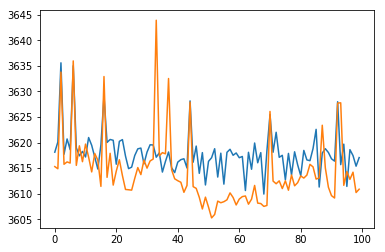

In [19]:
plt.plot(model_y[:100])
plt.plot(test_y[:100].reset_index(drop=True))

In [ ]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb = cb.CatBoostRegressor()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)